In [1]:
import os, time
import numpy as np
import pandas as pd
from tqdm.notebook import trange, tqdm
from lib import wlanlrz_loader, rtt_matrix_loader, inference_loader, solver
from entities.solver_process import SolverProcess  
from lib.common import disarrange
import powerlaw
import matplotlib.pyplot as plt
import seaborn as sns
import config.hyperparams as hp
import datetime as dt
from multiprocessing import Queue

### WLAN-LRZ AP Data Loader ####
desc = wlanlrz_loader.load_data_description(hp.AP_DESCR)
original_data, coord_dataframe_list, total_ap, original_merged_raw_ap_data = \
wlanlrz_loader.load_data_parallel(hp.BUILDING, desc, mass_load=True)

Parallel loading of APs data ...
Activating threads now


  5%|▍         | 1/21 [00:00<00:05,  3.45it/s]

 50%|█████     | 2/4 [00:00<00:00,  3.44it/s]]

File not found!


 18%|█▊        | 4/22 [00:01<00:06,  2.94it/s]

File not found!


 31%|███       | 4/13 [00:01<00:03,  2.33it/s]


File not found!


  2%|▏         | 1/53 [00:00<00:25,  2.02it/s]

File not found!


 44%|████▍     | 8/18 [00:02<00:04,  2.34it/s]

File not found!


  0%|          | 0/8 [00:00<?, ?it/s]2.18it/s]]

File not found!


 32%|███▏      | 7/22 [00:03<00:07,  1.95it/s]

File not found!


  0%|          | 0/15 [00:00<?, ?it/s]04it/s]]]

File not found!


 17%|█▋        | 2/12 [00:01<00:05,  1.73it/s]]


File not found!


 56%|█████▌    | 10/18 [00:04<00:04,  1.94it/s]

File not found!


 50%|█████     | 7/14 [00:03<00:03,  1.84it/s]

File not found!
File not found!


  0%|          | 0/15 [00:00<?, ?it/s]1.56it/s]

File not found!


 15%|█▌        | 2/13 [00:01<00:08,  1.33it/s]]

 18%|█▊        | 4/22 [00:02<00:12,  1.47it/s]]

File not found!


  7%|▋         | 1/15 [00:00<00:12,  1.15it/s]

File not found!


 18%|█▊        | 4/22 [00:02<00:13,  1.37it/s]]

 38%|███▊      | 5/13 [00:03<00:06,  1.30it/s]

File not found!
File not found!


 55%|█████▌    | 11/20 [00:06<00:06,  1.36it/s]

File not found!


 26%|██▋       | 5/19 [00:03<00:10,  1.33it/s]]

File not found!


 33%|███▎      | 5/15 [00:03<00:06,  1.47it/s]


File not found!


 85%|████████▍ | 11/13 [00:06<00:01,  1.31it/s]

File not found!


 88%|████████▊ | 7/8 [00:05<00:00,  1.20it/s]]

File not found!


  0%|          | 0/5 [00:00<?, ?it/s]1.19it/s]


 47%|████▋     | 8/17 [00:06<00:07,  1.19it/s]

File not found!


 20%|██        | 8/40 [00:05<00:26,  1.22it/s]]

File not found!


 62%|██████▏   | 8/13 [00:06<00:04,  1.16it/s]]

File not found!


100%|██████████| 4/4 [00:03<00:00,  1.15it/s]]]




File not found!


100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

File not found!


 78%|███████▊  | 7/9 [00:06<00:01,  1.08it/s]]]

File not found!


 71%|███████▏  | 15/21 [00:11<00:05,  1.06it/s]

File not found!


 31%|███       | 4/13 [00:03<00:07,  1.20it/s]]

 71%|███████▏  | 5/7 [00:04<00:01,  1.04it/s]s]

File not found!


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]

File not found!


 46%|████▌     | 18/39 [00:12<00:19,  1.07it/s]

100%|██████████| 6/6 [00:06<00:00,  1.02s/it]t]

File not found!


 42%|████▏     | 5/12 [00:05<00:07,  1.02s/it]]

File not found!


 62%|██████▎   | 10/16 [00:10<00:06,  1.06s/it]

File not found!


  7%|▋         | 1/15 [00:01<00:14,  1.04s/it]t]

 60%|██████    | 3/5 [00:03<00:02,  1.10s/it]s]

 62%|██████▏   | 18/29 [00:17<00:12,  1.12s/it]

  0%|          | 0/1 [00:00<?, ?it/s]1.05s/it]]

File not found!


 17%|█▋        | 8/47 [00:08<00:41,  1.07s/it]]

 30%|███       | 3/10 [00:03<00:07,  1.05s/it]


File not found!


  0%|          | 0/10 [00:00<?, ?it/s]09it/s]t]

 59%|█████▉    | 10/17 [00:10<00:07,  1.02s/it]

File not found!


 69%|██████▉   | 27/39 [00:22<00:11,  1.01it/s]

 29%|██▉       | 24/83 [00:21<00:56,  1.04it/s]


 67%|██████▋   | 6/9 [00:06<00:03,  1.01s/it]]

File not found!


  0%|          | 0/1 [00:00<?, ?it/s] 1.03s/it]

File not found!


 10%|▉         | 2/21 [00:01<00:15,  1.22it/s]

File not found!


 44%|████▍     | 7/16 [00:07<00:08,  1.03it/s]]

 21%|██        | 4/19 [00:03<00:12,  1.21it/s]]

100%|██████████| 8/8 [00:06<00:00,  1.33it/s]s]

File not found!


 81%|████████▏ | 26/32 [00:25<00:04,  1.27it/s]

File not found!


 96%|█████████▌| 24/25 [00:23<00:00,  1.02it/s]

File not found!


 48%|████▊     | 13/27 [00:10<00:09,  1.51it/s]]

File not found!


 67%|██████▋   | 30/45 [00:27<00:10,  1.45it/s]

File not found!


 82%|████████▏ | 18/22 [00:10<00:01,  2.31it/s]

File not found!


 38%|███▊      | 24/63 [00:15<00:14,  2.71it/s]]

File not found!


100%|██████████| 49/49 [00:27<00:00,  1.79it/s]]

100%|██████████| 152/152 [00:48<00:00,  3.13it/s]


In [2]:
# Relative node distribution as a function of the MA in the network 
T1_RATIO_VEC_REL = np.array([0.5, 0.25, 0.15, 0.05])
T2_RATIO_VEC_REL = np.array([0.25, 0.20, 0.10, 0.05])
T3_RATIO_VEC_REL = np.array([0.01, 0.0075, 0.005, 0.001])

# Absolute node distribution
T1_RATIO_VEC_ABS = 50
T2_RATIO_VEC_ABS = 20
T3_RATIO_VEC_ABS = 3

# Number of MA used in each test (roughly)
TARGET_MA = [150]

RESULTS = []

print("Total APs: {}".format(total_ap))
original_data['timestamp'] = original_data.index

for target_ma in TARGET_MA:
    
    # Filter the dataser based on the minimum amount of users we want to serve
    data = original_data[(original_data.total >= target_ma) & (original_data.total < (target_ma*1.1))].sample()
    merged_raw_ap_data = original_merged_raw_ap_data[original_merged_raw_ap_data.index.isin(data.index)]

    for experiments in range(100):    
        
        MA = int(data.total)
        print(" === Iteration {} for MA {} ===".format(experiments, MA))

        TIER_1_EN = T1_RATIO_VEC_ABS
        TIER_2_EN = T2_RATIO_VEC_ABS
        TIER_3_EN = T3_RATIO_VEC_ABS
        
        EN_RATIO = (TIER_1_EN, TIER_2_EN, TIER_3_EN)
        TOTAL_EN = int(TIER_1_EN + TIER_2_EN + TIER_3_EN)

        if hp.STORE_RESULTS:
            try:
                os.mkdir(hp.CSV_FOLDER)
            except OSError:
                print ("Creation of the directory %s failed" % hp.CSV_FOLDER)
            else:
                print ("Successfully created the directory %s " % hp.CSV_FOLDER)

        if hp.dataset_rtt and experiments == 0:
            ### LOAD LATENCY MATRIX FROM DATASET ###
            print("Loading rtt matrix from dataset")
            clf = rtt_matrix_loader.analyze_data(source=hp.dataset_rtt, drange=1000, threshold=250, k=3)
            #clf.weights_ = [0.2, 0.2, 0.6]
            rtt_matrix = rtt_matrix_loader.generate_data(clf, n=total_ap, m=TOTAL_EN)

            np.random.shuffle(rtt_matrix)
            disarrange(rtt_matrix, axis=0)
        
            # Manually setting latency for colocated AP/EN
            for i in range(round(TIER_1_EN)):
                rtt_matrix[i][i] = 1

        # print("Plotting and saving RTT matrix")
        # fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        # sns.heatmap(rtt_matrix, ax=ax)
        # fig.tight_layout(w_pad=1.5)
        # fig.savefig("../plots/rtt_matrix.pdf")

        print("Starting the solver")

        MA = int(data.total)
        env, agents, edge_nodes, convergence_time = \
            solver.algorithm(MA, EN_RATIO, 5, 4, 100, None, None, rtt_matrix, merged_raw_ap_data, suppress_output=True)

        RESULTS.append((env, agents, edge_nodes, convergence_time))

        if hp.STORE_RESULTS:
            env.episodes_tracker[:,:,episode]
            np.savetxt(hp.CSV_FOLDER + '/' + str(episode) + '.csv', env.episodes_tracker[:,:,episode], delimiter=',')


Total APs: 4371
 === Iteration 0 for MA 164 ===
Loading rtt matrix from dataset
Starting the solver
54
54
9.396158888329506
54
9.276872782053948
9.396158888329506
54
9.276872782053948
9.645348813896435
54
9.990628830645953
9.645348813896435
54
16.834830028992556
9.990628830645953
9.645348813896435
54
16.947486909128475
9.990628830645953
9.645348813896435
54
9.539021649672456
16.947486909128475
9.990628830645953
9.645348813896435
54
9.539021649672456
16.947486909128475
9.990628830645953
9.645348813896435
54
9.539021649672456
16.947486909128475
9.990628830645953
9.645348813896435
54
9.539021649672456
12.245457418865044
16.947486909128475
9.990628830645953
9.645348813896435
54
9.539021649672456
12.245457418865044
16.947486909128475
27.18551451273907
9.990628830645953
9.645348813896435
54
12.728893762247104
9.539021649672456
12.245457418865044
16.947486909128475
27.18551451273907
9.990628830645953
9.645348813896435
54
12.728893762247104
9.539021649672456
12.245457418865044
16.9474869091284

9.7344874828955
51.595553172907515
70.3348611428523
62.52909013538889
31
33.24057435125586
49.427463312982795
46.91688991671637
20.443112610471054
37.1339947981867
55.02143592058589
9.654929168187593
31.037301197726016
12.350230316159484
22.38861703234042
30.12521004386212
15.18517922186293
40.80829034496774
44.63488566882617
19.9606169157269
10.237664983757071
9.7344874828955
51.595553172907515
70.3348611428523
62.52909013538889
31
33.24057435125586
49.427463312982795
46.91688991671637
20.443112610471054
37.1339947981867
55.02143592058589
9.654929168187593
31.037301197726016
12.350230316159484
22.38861703234042
30.12521004386212
15.18517922186293
40.80829034496774
44.63488566882617
19.9606169157269
10.237664983757071
9.7344874828955
51.595553172907515
70.3348611428523
62.52909013538889
31
33.24057435125586
49.427463312982795
46.91688991671637
20.443112610471054
37.1339947981867
55.02143592058589
9.654929168187593
31.037301197726016
12.350230316159484
22.38861703234042
30.1252100438621

31
33.24057435125586
49.55885240628472
46.91688991671637
20.443112610471054
56.690041449837004
37.1339947981867
55.02143592058589
9.654929168187593
31.037301197726016
12.350230316159484
22.38861703234042
30.12521004386212
15.18517922186293
40.80829034496774
44.63488566882617
19.9606169157269
81.20726150879645
10.237664983757071
9.880658182667307
51.595553172907515
70.3348611428523
62.52909013538889
31
33.24057435125586
49.55885240628472
46.91688991671637
20.443112610471054
56.690041449837004
37.1339947981867
55.02143592058589
9.654929168187593
31.037301197726016
12.350230316159484
22.38861703234042
30.12521004386212
15.18517922186293
40.80829034496774
44.63488566882617
19.9606169157269
81.20726150879645
10.237664983757071
9.880658182667307
51.595553172907515
70.3348611428523
62.52909013538889
31
33.24057435125586
49.55885240628472
46.91688991671637
20.443112610471054
56.690041449837004
37.1339947981867
55.02143592058589
9.654929168187593
31.037301197726016
12.350230316159484
22.3886170

54
54
9.932288539903036
54
9.932288539903036
9.843002714826145
54
9.932288539903036
9.843002714826145
54
10.222317294673266
9.843002714826145
54
17.955129458537307
10.222317294673266
9.843002714826145
54
17.955129458537307
10.222317294673266
9.843002714826145
54
7.600002957562873
17.955129458537307
10.222317294673266
9.843002714826145
54
7.600002957562873
17.955129458537307
10.222317294673266
9.843002714826145
54
7.600002957562873
17.955129458537307
10.222317294673266
9.843002714826145
54
7.600002957562873
17.955129458537307
27.498682518153228
10.222317294673266
9.843002714826145
54
7.600002957562873
17.955129458537307
31.37427393961397
27.498682518153228
10.222317294673266
9.843002714826145
54
14.28414995508154
7.600002957562873
17.955129458537307
31.37427393961397
27.498682518153228
10.222317294673266
9.843002714826145
54
14.28414995508154
7.600002957562873
13.410085455893192
17.955129458537307
31.37427393961397
27.498682518153228
10.222317294673266
9.843002714826145
54
14.2841499550

37.49034248376748
8.708309633862696
31.51814984980072
13.410085455893192
23.521956128770576
30.48704584119762
16.92684256441948
39.71463818511398
44.16263758583467
19.56393631291906
10.222317294673266
9.843002714826145
51.545178328502026
62.5317638017924
31
28.554387179061717
21.105584212129685
37.49034248376748
8.708309633862696
31.51814984980072
13.410085455893192
23.521956128770576
30.48704584119762
16.92684256441948
39.71463818511398
44.16263758583467
19.56393631291906
10.222317294673266
9.843002714826145
51.545178328502026
62.5317638017924
31
29.590245767610277
21.105584212129685
37.49034248376748
8.708309633862696
31.51814984980072
13.410085455893192
23.521956128770576
30.48704584119762
16.92684256441948
39.71463818511398
44.16263758583467
19.56393631291906
10.222317294673266
9.843002714826145
51.545178328502026
62.5317638017924
31
29.590245767610277
21.105584212129685
37.49034248376748
8.708309633862696
31.51814984980072
13.410085455893192
23.521956128770576
30.48704584119762
16

37.49034248376748
54.524621615812926
9.396678469998593
31.51814984980072
13.410085455893192
23.521956128770576
30.48704584119762
16.92684256441948
39.71463818511398
44.16263758583467
19.56393631291906
10.222317294673266
9.843002714826145
51.545178328502026
70.3571145041021
62.546487945820914
31
29.590245767610277
49.80592389584623
48.524748542625915
21.105584212129685
37.49034248376748
54.524621615812926
9.396678469998593
31.51814984980072
13.410085455893192
23.521956128770576
30.48704584119762
16.92684256441948
39.71463818511398
44.16263758583467
19.56393631291906
10.222317294673266
9.843002714826145
51.545178328502026
70.3571145041021
62.546487945820914
31
29.590245767610277
49.80592389584623
48.524748542625915
21.105584212129685
37.49034248376748
54.524621615812926
9.396678469998593
31.51814984980072
13.410085455893192
23.521956128770576
30.48704584119762
16.92684256441948
39.71463818511398
44.16263758583467
19.56393631291906
10.222317294673266
9.843002714826145
51.545178328502026
7

31.51814984980072
13.410085455893192
23.521956128770576
30.48704584119762
16.92684256441948
39.71463818511398
44.16263758583467
19.586934375443416
81.24386904541375
10.222317294673266
9.843002714826145
51.545178328502026
70.3571145041021
62.567335445037706
31
29.590245767610277
49.80592389584623
48.524748542625915
21.105584212129685
56.62396288795718
37.49034248376748
54.524621615812926
9.396678469998593
31.51814984980072
13.410085455893192
23.521956128770576
30.48704584119762
16.92684256441948
39.71463818511398
44.16263758583467
19.586934375443416
81.24386904541375
10.222317294673266
9.843002714826145
51.545178328502026
70.3571145041021
62.567335445037706
31
29.590245767610277
49.80592389584623
48.524748542625915
21.105584212129685
56.62396288795718
37.49034248376748
54.524621615812926
9.396678469998593
31.51814984980072
13.410085455893192
23.521956128770576
30.48704584119762
16.92684256441948
39.71463818511398
44.16263758583467
19.586934375443416
81.24386904541375
10.222317294673266


54
54
9.71386422688505
54
9.71386422688505
9.466452967984946
54
9.71386422688505
9.466452967984946
54
9.71386422688505
9.466452967984946
54
16.67706959075059
9.71386422688505
9.466452967984946
54
17.41230790795318
9.71386422688505
9.466452967984946
54
8.602938561139931
17.41230790795318
9.71386422688505
9.466452967984946
54
8.602938561139931
17.41230790795318
9.71386422688505
9.64425188901205
54
8.602938561139931
17.41230790795318
27.090007478984795
9.71386422688505
9.64425188901205
54
8.602938561139931
17.41230790795318
27.090007478984795
10.299040706576545
9.64425188901205
54
11.437498402686913
8.602938561139931
17.41230790795318
27.090007478984795
10.299040706576545
9.64425188901205
54
11.437498402686913
8.602938561139931
12.863127835126857
17.41230790795318
27.090007478984795
10.299040706576545
9.64425188901205
54
11.437498402686913
8.602938561139931
12.863127835126857
17.41230790795318
27.090007478984795
33.62400948464237
10.299040706576545
9.64425188901205
54
11.437498402686913
8

31
32.44558205405948
21.027315697449993
34.90114890836201
9.140916544636433
29.76640264938492
12.863127835126857
22.354797922222946
29.732324359060325
14.732119750525195
42.62374127431532
44.655294295302824
19.87428007933652
10.299040706576545
9.64425188901205
51.73966383141317
62.57988347877427
31
32.44558205405948
21.027315697449993
34.90114890836201
9.140916544636433
29.76640264938492
12.863127835126857
22.354797922222946
29.732324359060325
14.732119750525195
42.62374127431532
44.655294295302824
19.87428007933652
10.299040706576545
9.64425188901205
51.73966383141317
62.57988347877427
31
32.44558205405948
21.027315697449993
34.90114890836201
9.140916544636433
29.76640264938492
12.863127835126857
22.354797922222946
29.732324359060325
14.732119750525195
42.62374127431532
44.655294295302824
19.87428007933652
10.299040706576545
9.64425188901205
51.73966383141317
62.57988347877427
31
32.44558205405948
21.027315697449993
35.51217930330678
9.140916544636433
29.76640264938492
12.863127835126

13.780156716749804
22.354797922222946
29.732324359060325
14.732119750525195
42.62374127431532
44.655294295302824
19.87428007933652
10.299040706576545
9.64425188901205
51.73966383141317
70.29295969161974
62.61127436620466
31
32.44558205405948
49.99370743895959
47.255793137694695
21.027315697449993
35.51217930330678
53.92821793204973
9.140916544636433
29.76640264938492
13.780156716749804
22.354797922222946
29.732324359060325
14.732119750525195
42.62374127431532
44.655294295302824
19.87428007933652
10.299040706576545
9.64425188901205
51.73966383141317
70.29295969161974
62.61127436620466
31
32.44558205405948
49.99370743895959
47.255793137694695
21.027315697449993
35.51217930330678
53.92821793204973
9.140916544636433
29.76640264938492
13.780156716749804
22.354797922222946
29.732324359060325
14.732119750525195
42.62374127431532
44.655294295302824
19.87428007933652
10.299040706576545
9.64425188901205
51.73966383141317
70.29295969161974
62.61127436620466
31
32.44558205405948
49.99370743895959


31
32.44558205405948
50.608382880661964
47.85240185231902
21.027315697449993
55.8680680902314
35.51217930330678
53.92821793204973
9.140916544636433
29.76640264938492
13.780156716749804
22.354797922222946
29.732324359060325
14.732119750525195
42.62374127431532
44.655294295302824
19.87428007933652
80.84719212355486
10.299040706576545
9.64425188901205
51.73966383141317
70.3033200325053
62.61127436620466
31
32.44558205405948
50.608382880661964
47.85240185231902
21.027315697449993
55.8680680902314
35.51217930330678
53.92821793204973
9.140916544636433
29.76640264938492
13.780156716749804
22.354797922222946
29.732324359060325
14.732119750525195
42.62374127431532
44.655294295302824
19.87428007933652
80.84719212355486
10.299040706576545
9.64425188901205
51.73966383141317
70.3033200325053
62.61127436620466
31
32.44558205405948
50.608382880661964
47.85240185231902
21.027315697449993
55.8680680902314
35.51217930330678
54.23278748869997
9.140916544636433
29.76640264938492
13.780156716749804
22.3547

54
17.158150791343672
9.410987446550594
9.35327922342966
54
17.158150791343672
9.410987446550594
9.35327922342966
54
17.158150791343672
9.863464346842902
9.35327922342966
54
12.167761220654503
17.158150791343672
9.863464346842902
9.35327922342966
54
9.334072533132511
12.167761220654503
17.158150791343672
9.863464346842902
9.35327922342966
54
10.768629380523759
9.334072533132511
12.167761220654503
17.158150791343672
9.863464346842902
9.35327922342966
54
10.768629380523759
9.334072533132511
12.167761220654503
17.158150791343672
27.44032200896975
9.863464346842902
9.35327922342966
54
10.768629380523759
9.334072533132511
12.167761220654503
14.058459120468875
17.158150791343672
27.44032200896975
9.863464346842902
9.35327922342966
54
10.768629380523759
9.334072533132511
12.167761220654503
14.058459120468875
17.158150791343672
31.78969458376716
27.44032200896975
9.863464346842902
9.35327922342966
31
9.334072533132511
12.167761220654503
14.058459120468875
17.158150791343672
9.863464346842902
9

50.21390397248008
46.86478995902577
19.926924556754695
36.660609684340244
9.812210660227668
30.41513484338764
12.167761220654503
23.65815111820106
29.321379547599783
16.600009990115424
40.592423777573025
44.18975869578306
19.737695568385316
9.979525508385407
9.872711613471248
51.46273505704336
62.59585988004405
31
35.81390196857596
50.21390397248008
46.86478995902577
19.926924556754695
36.660609684340244
9.812210660227668
30.41513484338764
12.167761220654503
23.65815111820106
29.321379547599783
16.600009990115424
40.592423777573025
44.18975869578306
19.737695568385316
9.979525508385407
9.872711613471248
51.46273505704336
62.59585988004405
31
35.81390196857596
50.21390397248008
46.86478995902577
19.926924556754695
36.660609684340244
9.812210660227668
30.41513484338764
12.167761220654503
23.65815111820106
29.321379547599783
16.600009990115424
40.592423777573025
44.18975869578306
19.737695568385316
9.979525508385407
9.872711613471248
51.46273505704336
62.59585988004405
31
35.8139019685759

46.86478995902577
19.926924556754695
56.34058709027026
36.660609684340244
56.449153269316525
9.812210660227668
30.41513484338764
12.952788367624768
23.65815111820106
29.321379547599783
16.600009990115424
40.592423777573025
44.18975869578306
19.737695568385316
9.979525508385407
9.872711613471248
51.46273505704336
70.32265510403958
62.59585988004405
31
35.81390196857596
50.21390397248008
46.86478995902577
19.926924556754695
56.34058709027026
36.660609684340244
56.449153269316525
9.812210660227668
30.41513484338764
12.952788367624768
23.65815111820106
29.321379547599783
16.600009990115424
40.592423777573025
44.18975869578306
19.737695568385316
9.979525508385407
9.872711613471248
51.46273505704336
70.32265510403958
62.59585988004405
31
35.81390196857596
50.21390397248008
46.86478995902577
19.926924556754695
56.34058709027026
36.660609684340244
56.449153269316525
9.812210660227668
30.41513484338764
12.952788367624768
23.65815111820106
29.321379547599783
16.600009990115424
40.592423777573025

50.37650847035184
48.11828461080802
19.926924556754695
67.72505307868984
56.34058709027026
36.660609684340244
56.449153269316525
9.812210660227668
30.41513484338764
12.952788367624768
23.65815111820106
29.321379547599783
16.600009990115424
40.592423777573025
44.18975869578306
19.737695568385316
81.37293663988996
9.979525508385407
9.872711613471248
51.46273505704336
70.3397307231472
62.59585988004405
31
35.81390196857596
68.59817621672377
50.37650847035184
48.11828461080802
19.926924556754695
67.72505307868984
56.34058709027026
36.660609684340244
56.449153269316525
9.812210660227668
30.41513484338764
12.952788367624768
23.65815111820106
29.321379547599783
16.600009990115424
40.592423777573025
44.18975869578306
19.737695568385316
81.37293663988996
9.979525508385407
9.872711613471248
51.46273505704336
70.3397307231472
62.59585988004405
31
35.81390196857596
68.59817621672377
50.37650847035184
48.11828461080802
19.926924556754695
67.72505307868984
56.34058709027026
36.660609684340244
56.449

9.524586519071
31
20.279300618184934
10.067236897651009
12.85875942911173
22.65627466490087
15.272354506111368
16.803949534973146
9.819165127567336
9.524586519071
31
20.279300618184934
10.067236897651009
12.85875942911173
22.65627466490087
15.272354506111368
16.803949534973146
9.819165127567336
9.524586519071
31
20.279300618184934
10.067236897651009
12.85875942911173
22.65627466490087
15.272354506111368
16.803949534973146
9.819165127567336
9.524586519071
31
20.279300618184934
10.067236897651009
12.85875942911173
22.65627466490087
15.272354506111368
16.803949534973146
9.819165127567336
9.524586519071
31
20.279300618184934
10.067236897651009
12.85875942911173
22.65627466490087
15.272354506111368
16.803949534973146
9.819165127567336
9.524586519071
31
20.279300618184934
10.067236897651009
12.85875942911173
22.65627466490087
15.272354506111368
19.45963074522313
9.819165127567336
9.524586519071
31
20.279300618184934
10.067236897651009
12.85875942911173
22.65627466490087
15.272354506111368
19

22.65627466490087
28.87230238548473
15.272354506111368
39.77690495756336
42.80816181294701
19.793682230527313
9.93769491662367
9.816826649457074
51.497116257903606
70.21816632493663
62.57050347700209
31
34.476018752015605
50.148872744952364
47.71636711924306
20.490907716032506
36.50743868279261
10.067236897651009
31.430645896570873
12.85875942911173
22.65627466490087
28.87230238548473
15.272354506111368
39.77690495756336
42.80816181294701
19.793682230527313
9.93769491662367
9.816826649457074
51.497116257903606
70.24966100763692
62.57050347700209
31
34.476018752015605
50.148872744952364
47.71636711924306
20.490907716032506
36.50743868279261
53.527928334584935
10.067236897651009
31.430645896570873
12.85875942911173
22.65627466490087
28.87230238548473
15.272354506111368
39.77690495756336
42.80816181294701
19.793682230527313
9.93769491662367
9.816826649457074
51.497116257903606
70.24966100763692
62.57050347700209
31
34.476018752015605
50.148872744952364
47.71636711924306
20.490907716032506

50.148872744952364
47.781076370558694
20.490907716032506
57.00154127418678
36.50743868279261
53.527928334584935
10.067236897651009
31.430645896570873
12.85875942911173
22.65627466490087
28.87230238548473
15.272354506111368
39.77690495756336
43.14225899087839
19.793682230527313
9.93769491662367
9.816826649457074
51.586478857313764
70.30680669211517
62.57725620298537
31
34.476018752015605
50.148872744952364
47.781076370558694
20.490907716032506
57.00154127418678
36.50743868279261
53.527928334584935
10.067236897651009
31.430645896570873
12.85875942911173
22.65627466490087
28.87230238548473
15.272354506111368
39.77690495756336
43.14225899087839
19.793682230527313
9.93769491662367
9.816826649457074
51.586478857313764
70.30680669211517
62.57725620298537
31
34.476018752015605
50.148872744952364
47.781076370558694
20.490907716032506
57.00154127418678
36.50743868279261
53.527928334584935
10.067236897651009
31.430645896570873
12.85875942911173
22.65627466490087
28.87230238548473
15.2723545061113

31
34.476018752015605
67.86360941222685
50.968396590508256
47.781076370558694
20.490907716032506
68.38774600888455
57.34568125324546
36.50743868279261
55.79305933956826
10.067236897651009
31.430645896570873
12.85875942911173
22.65627466490087
28.87230238548473
15.272354506111368
39.77690495756336
43.14225899087839
19.793682230527313
81.59877734973819
9.93769491662367
9.816826649457074
51.586478857313764
70.3312892379238
62.57725620298537
31
34.476018752015605
67.86360941222685
50.968396590508256
47.781076370558694
20.490907716032506
68.38774600888455
57.34568125324546
36.50743868279261
55.79305933956826
10.067236897651009
31.430645896570873
12.85875942911173
22.65627466490087
28.87230238548473
15.272354506111368
39.77690495756336
43.14225899087839
19.793682230527313
81.59877734973819
9.93769491662367
9.816826649457074
51.586478857313764
70.3312892379238
62.57725620298537
31
34.476018752015605
67.86360941222685
50.968396590508256
47.781076370558694
20.490907716032506
68.38774600888455
5

31
19.45693411406282
9.708484576536584
31.940507928229586
12.62361647963136
24.204922722038297
28.084849613748695
15.032272317082477
19.534951713052877
9.846741499347175
9.494302529118347
31
33.01756297529512
19.45693411406282
9.708484576536584
31.940507928229586
12.62361647963136
24.204922722038297
28.084849613748695
15.032272317082477
19.534951713052877
9.846741499347175
9.494302529118347
31
33.01756297529512
19.45693411406282
9.708484576536584
31.940507928229586
12.62361647963136
24.204922722038297
28.084849613748695
15.032272317082477
19.534951713052877
9.846741499347175
9.494302529118347
31
33.01756297529512
19.45693411406282
9.708484576536584
31.940507928229586
12.62361647963136
24.204922722038297
28.084849613748695
15.032272317082477
19.534951713052877
9.846741499347175
9.494302529118347
51.38927211695669
31
33.01756297529512
19.45693411406282
35.85052549732382
9.708484576536584
31.940507928229586
12.62361647963136
24.204922722038297
28.084849613748695
15.032272317082477
19.5349

31
33.01756297529512
49.71835590712775
47.7087112224342
19.45693411406282
35.85052549732382
9.708484576536584
31.940507928229586
12.62361647963136
24.204922722038297
30.802314389784662
15.032272317082477
41.29343518062101
44.26184122698022
19.978956091083006
9.964620747248333
9.494302529118347
51.634563212458254
70.19545642316955
62.54379456402988
31
33.01756297529512
49.71835590712775
47.7087112224342
19.45693411406282
35.85052549732382
9.708484576536584
31.940507928229586
12.62361647963136
24.204922722038297
30.802314389784662
15.032272317082477
41.29343518062101
44.26184122698022
19.978956091083006
9.964620747248333
9.494302529118347
51.634563212458254
70.19545642316955
62.54379456402988
31
33.01756297529512
49.71835590712775
47.7087112224342
19.45693411406282
35.85052549732382
9.708484576536584
31.940507928229586
12.62361647963136
24.204922722038297
30.802314389784662
15.032272317082477
41.29343518062101
44.26184122698022
19.978956091083006
9.964620747248333
9.494302529118347
51.63

24.204922722038297
30.802314389784662
15.032272317082477
41.29343518062101
44.26184122698022
19.978956091083006
9.964620747248333
9.494302529118347
51.634563212458254
70.32734056797312
62.54379456402988
31
33.01756297529512
49.71835590712775
47.7087112224342
19.45693411406282
55.74392406443466
35.85052549732382
53.78306400342625
9.708484576536584
31.940507928229586
13.844325374979322
24.204922722038297
30.802314389784662
15.032272317082477
41.29343518062101
44.26184122698022
19.978956091083006
9.964620747248333
9.494302529118347
51.634563212458254
70.32734056797312
62.54379456402988
31
33.01756297529512
49.71835590712775
47.7087112224342
19.45693411406282
55.74392406443466
35.85052549732382
53.78306400342625
9.708484576536584
31.940507928229586
13.844325374979322
24.204922722038297
30.802314389784662
15.032272317082477
41.29343518062101
44.26184122698022
19.978956091083006
9.964620747248333
9.494302529118347
51.634563212458254
70.32734056797312
62.54379456402988
31
33.01756297529512
49

19.45693411406282
55.74392406443466
35.85052549732382
53.78306400342625
9.708484576536584
31.940507928229586
13.844325374979322
24.204922722038297
30.802314389784662
15.032272317082477
41.29343518062101
44.26184122698022
19.978956091083006
81.5744627144956
9.964620747248333
9.494302529118347
51.634563212458254
70.32914121015051
62.57851685649203
31
33.01756297529512
49.71835590712775
47.7087112224342
19.45693411406282
55.74392406443466
35.85052549732382
53.78306400342625
9.708484576536584
31.940507928229586
13.844325374979322
24.204922722038297
30.802314389784662
15.032272317082477
41.29343518062101
44.26184122698022
19.978956091083006
81.5744627144956
9.964620747248333
9.494302529118347
51.634563212458254
70.32914121015051
62.57851685649203
31
33.01756297529512
49.71835590712775
47.7087112224342
19.45693411406282
55.74392406443466
35.85052549732382
53.78306400342625
9.708484576536584
31.940507928229586
13.844325374979322
24.204922722038297
30.802314389784662
15.032272317082477
41.2934

54
54
9.783747444894946
54
9.783747444894946
54
9.783747444894946
8.77028841407975
54
9.783747444894946
9.62863190686576
54
17.284942052316776
9.783747444894946
9.62863190686576
54
17.346583441751175
9.783747444894946
9.62863190686576
54
17.346583441751175
9.783747444894946
9.62863190686576
54
17.346583441751175
9.783747444894946
9.62863190686576
54
8.443906223511874
17.346583441751175
9.783747444894946
9.62863190686576
54
8.443906223511874
17.346583441751175
27.710093070102438
9.783747444894946
9.62863190686576
54
10.923583178941369
8.443906223511874
17.346583441751175
27.710093070102438
9.783747444894946
9.62863190686576
54
10.923583178941369
8.443906223511874
12.74510668728446
17.346583441751175
27.710093070102438
9.783747444894946
9.62863190686576
54
10.923583178941369
8.443906223511874
12.74510668728446
17.346583441751175
31.638162773340735
27.710093070102438
9.783747444894946
9.62863190686576
54
10.923583178941369
8.443906223511874
12.74510668728446
16.126939547813134
17.34658344

47.81921640149116
21.057793265799035
36.126290219776834
8.443906223511874
31.47785900951287
14.379480153995328
21.944083811233952
30.112924109846393
16.126939547813134
40.24332118057746
44.78875566585706
19.410027759016092
10.003240745402474
9.62863190686576
51.68584193347213
62.59789586020176
31
32.02768653191849
47.81921640149116
21.057793265799035
36.126290219776834
8.443906223511874
31.47785900951287
14.379480153995328
21.944083811233952
30.112924109846393
16.126939547813134
40.24332118057746
44.78875566585706
19.410027759016092
10.003240745402474
9.62863190686576
51.68584193347213
62.59789586020176
31
32.02768653191849
49.9039949133286
47.81921640149116
21.057793265799035
36.126290219776834
8.443906223511874
31.47785900951287
14.379480153995328
21.944083811233952
30.112924109846393
16.126939547813134
40.24332118057746
44.78875566585706
19.410027759016092
10.003240745402474
9.62863190686576
51.68584193347213
62.59789586020176
31
32.02768653191849
49.9039949133286
47.81921640149116


30.112924109846393
16.126939547813134
40.57930050116518
44.78875566585706
19.410027759016092
10.003240745402474
9.62863190686576
51.68584193347213
70.3086633938091
62.59789586020176
31
32.02768653191849
49.9039949133286
47.81921640149116
21.057793265799035
36.126290219776834
53.910017757076304
8.443906223511874
31.47785900951287
14.379480153995328
21.944083811233952
30.112924109846393
16.126939547813134
40.57930050116518
44.78875566585706
19.410027759016092
10.003240745402474
9.62863190686576
51.68584193347213
70.3086633938091
62.59789586020176
31
32.02768653191849
49.9039949133286
47.81921640149116
21.057793265799035
36.126290219776834
53.910017757076304
8.443906223511874
31.47785900951287
14.379480153995328
21.944083811233952
30.112924109846393
16.126939547813134
40.57930050116518
44.78875566585706
19.410027759016092
10.003240745402474
9.62863190686576
51.68584193347213
70.3086633938091
62.59789586020176
31
32.02768653191849
49.9039949133286
47.81921640149116
21.057793265799035
36.12

62.60204511402777
31
32.02768653191849
49.9039949133286
47.81921640149116
21.057793265799035
57.7198281388505
36.126290219776834
54.355776355875626
8.443906223511874
31.47785900951287
14.379480153995328
22.396646311025854
30.112924109846393
16.126939547813134
40.57930050116518
44.78875566585706
19.6926065201409
81.77055082950936
10.003240745402474
9.62863190686576
51.68584193347213
70.33788383497195
62.60204511402777
31
32.02768653191849
49.9039949133286
47.81921640149116
21.057793265799035
57.7198281388505
36.126290219776834
54.355776355875626
8.443906223511874
31.47785900951287
14.379480153995328
22.396646311025854
30.112924109846393
16.126939547813134
40.57930050116518
44.78875566585706
19.6926065201409
81.77055082950936
10.003240745402474
9.62863190686576
51.68584193347213
70.33788383497195
62.60204511402777
31
32.02768653191849
49.9039949133286
47.81921640149116
21.057793265799035
57.7198281388505
36.126290219776834
54.355776355875626
8.443906223511874
31.47785900951287
14.3794801

31
19.17781093658419
9.83360069791348
12.5159033861328
23.09167307575629
15.204897366658804
17.147287304791654
9.833364092635847
9.468286453093398
31
19.17781093658419
9.83360069791348
12.5159033861328
23.09167307575629
15.204897366658804
17.147287304791654
9.833364092635847
9.468286453093398
31
19.17781093658419
9.83360069791348
12.5159033861328
23.09167307575629
15.204897366658804
17.147287304791654
9.833364092635847
9.468286453093398
31
19.17781093658419
9.83360069791348
12.5159033861328
23.09167307575629
15.204897366658804
19.87293435042656
9.833364092635847
9.468286453093398
31
19.17781093658419
9.83360069791348
12.5159033861328
23.09167307575629
15.204897366658804
19.87293435042656
9.833364092635847
9.468286453093398
31
19.17781093658419
9.83360069791348
12.5159033861328
23.09167307575629
15.204897366658804
19.87293435042656
9.850098602343511
9.468286453093398
31
19.17781093658419
9.83360069791348
12.5159033861328
23.09167307575629
28.722498918183593
15.204897366658804
19.8729343

35.95571163722489
10.684948928774011
30.83708274681936
12.5159033861328
23.234910584614564
28.722498918183593
15.204897366658804
40.7972258911857
43.044172144940305
19.87293435042656
10.05797999074024
9.468286453093398
51.61219312442521
70.27130479160071
62.5314403064246
31
34.57292627892998
50.7710925145614
47.57097440141196
19.43879155976673
35.95571163722489
10.684948928774011
30.83708274681936
12.5159033861328
23.234910584614564
28.722498918183593
15.204897366658804
40.7972258911857
43.044172144940305
19.87293435042656
10.05797999074024
9.468286453093398
51.61219312442521
70.27130479160071
62.5314403064246
31
34.57292627892998
50.7710925145614
47.57097440141196
19.43879155976673
35.95571163722489
10.684948928774011
30.83708274681936
12.5159033861328
23.234910584614564
28.722498918183593
15.204897366658804
40.7972258911857
43.044172144940305
19.87293435042656
10.05797999074024
9.468286453093398
51.61219312442521
70.28386778125247
62.5314403064246
31
34.57292627892998
50.771092514561

50.7710925145614
47.57097440141196
19.43879155976673
57.556240766288525
35.95571163722489
55.122511977279814
10.684948928774011
30.83708274681936
12.5159033861328
23.234910584614564
28.722498918183593
15.204897366658804
40.7972258911857
43.044172144940305
19.87293435042656
10.05797999074024
9.468286453093398
51.61219312442521
70.2901760427487
62.54695620594823
31
34.57292627892998
50.7710925145614
47.57097440141196
19.43879155976673
57.556240766288525
35.95571163722489
55.122511977279814
10.684948928774011
30.83708274681936
12.5159033861328
23.234910584614564
28.722498918183593
15.204897366658804
40.7972258911857
43.044172144940305
19.87293435042656
10.05797999074024
9.468286453093398
51.61219312442521
70.2901760427487
62.54695620594823
31
34.57292627892998
50.7710925145614
47.57097440141196
19.43879155976673
57.556240766288525
35.95571163722489
55.122511977279814
10.684948928774011
30.83708274681936
12.5159033861328
23.234910584614564
28.722498918183593
15.204897366658804
40.797225891

68.81001316341475
50.7710925145614
47.57097440141196
19.43879155976673
68.9216812258561
57.556240766288525
35.95571163722489
55.122511977279814
10.684948928774011
30.83708274681936
12.5159033861328
23.234910584614564
28.722498918183593
15.204897366658804
40.7972258911857
43.044172144940305
19.87293435042656
81.41499060107871
10.05797999074024
9.468286453093398
51.61219312442521
70.34499255656998
62.61590320091082
31
34.57292627892998
68.81001316341475
50.7710925145614
47.57097440141196
19.43879155976673
68.9216812258561
57.556240766288525
35.95571163722489
55.122511977279814
10.684948928774011
30.83708274681936
12.5159033861328
23.234910584614564
28.722498918183593
15.204897366658804
40.7972258911857
43.044172144940305
19.87293435042656
81.41499060107871
10.05797999074024
9.468286453093398
51.61219312442521
70.34499255656998
62.61590320091082
31
34.57292627892998
68.81001316341475
50.7710925145614
47.57097440141196
19.43879155976673
68.9216812258561
57.556240766288525
35.95571163722489

31
33.560102208435616
19.415358106046334
37.82770025031124
9.56696673207049
31.859261017338497
12.960446200658115
24.197680736262768
28.148473050223597
15.404863928933521
40.824717755764574
19.636227585177476
10.009172064918433
9.655858059247485
51.69362161430044
31
33.560102208435616
19.415358106046334
37.82770025031124
9.56696673207049
31.859261017338497
12.960446200658115
24.197680736262768
28.148473050223597
15.404863928933521
40.824717755764574
19.636227585177476
10.009172064918433
9.655858059247485
51.69362161430044
31
33.560102208435616
19.415358106046334
37.82770025031124
9.56696673207049
31.859261017338497
12.960446200658115
24.197680736262768
28.148473050223597
15.404863928933521
40.824717755764574
42.958990744641326
19.636227585177476
10.009172064918433
9.655858059247485
51.69362161430044
31
33.560102208435616
19.415358106046334
37.82770025031124
9.56696673207049
31.859261017338497
12.960446200658115
24.197680736262768
28.148473050223597
15.404863928933521
40.824717755764574

31
33.560102208435616
50.214933247260234
47.566748789262604
19.415358106046334
37.82770025031124
52.895919021126375
9.56696673207049
31.859261017338497
12.960446200658115
24.197680736262768
28.148473050223597
15.404863928933521
40.824717755764574
42.958990744641326
19.636227585177476
10.009172064918433
9.655858059247485
52.02120611242946
70.2594287489917
62.56416093018565
31
33.560102208435616
50.214933247260234
47.566748789262604
19.415358106046334
37.82770025031124
52.895919021126375
9.56696673207049
31.859261017338497
12.960446200658115
24.197680736262768
28.148473050223597
15.404863928933521
40.824717755764574
42.958990744641326
19.636227585177476
10.009172064918433
9.655858059247485
52.02120611242946
70.2594287489917
62.56416093018565
31
33.560102208435616
50.214933247260234
47.566748789262604
19.415358106046334
37.82770025031124
52.895919021126375
9.56696673207049
31.859261017338497
12.960446200658115
24.197680736262768
28.148473050223597
15.404863928933521
40.824717755764574
42.

24.197680736262768
28.148473050223597
15.404863928933521
40.824717755764574
42.958990744641326
19.636227585177476
81.38945797235144
10.009172064918433
9.655858059247485
52.02120611242946
70.30693881164316
62.56416093018565
31
33.560102208435616
50.214933247260234
48.16753611419622
19.415358106046334
55.42768793802856
37.82770025031124
52.895919021126375
9.56696673207049
31.859261017338497
12.960446200658115
24.197680736262768
28.148473050223597
15.404863928933521
40.824717755764574
42.958990744641326
19.636227585177476
81.38945797235144
10.009172064918433
9.655858059247485
52.02120611242946
70.30693881164316
62.56416093018565
31
33.560102208435616
50.214933247260234
48.16753611419622
19.415358106046334
55.42768793802856
37.82770025031124
54.820187526732525
9.56696673207049
31.859261017338497
12.960446200658115
24.197680736262768
28.148473050223597
15.404863928933521
40.824717755764574
42.958990744641326
19.636227585177476
81.38945797235144
10.009172064918433
9.655858059247485
52.021206

54
9.415701979492717
17.262998126816115
9.407426211453636
9.570077737542773
54
9.415701979492717
17.33985515176945
9.407426211453636
9.570077737542773
54
9.415701979492717
17.33985515176945
9.407426211453636
9.570077737542773
54
9.415701979492717
17.33985515176945
9.431225337909947
9.570077737542773
54
11.660298462691399
9.415701979492717
17.33985515176945
9.431225337909947
9.570077737542773
54
11.660298462691399
9.415701979492717
11.305413525127204
17.33985515176945
9.431225337909947
9.570077737542773
54
11.660298462691399
9.415701979492717
11.305413525127204
17.33985515176945
26.96832780606351
9.431225337909947
9.570077737542773
54
11.660298462691399
9.415701979492717
11.305413525127204
13.744943985243356
17.33985515176945
26.96832780606351
9.431225337909947
9.570077737542773
54
11.660298462691399
9.415701979492717
11.305413525127204
13.744943985243356
17.33985515176945
31.885161908114462
26.96832780606351
9.431225337909947
9.570077737542773
54
11.660298462691399
9.415701979492717
11

36.4079766661166
9.415701979492717
31.236726466103264
13.676007844061491
22.936567267291814
29.46991830744586
13.862495879456183
41.170197201723894
42.59352558544068
19.662681342146758
10.235593780344914
9.733698680692726
51.459582336137274
62.57817206895279
31
33.13628212391339
46.72653779982334
19.69389878798314
36.4079766661166
9.415701979492717
31.236726466103264
13.676007844061491
22.936567267291814
29.46991830744586
13.862495879456183
41.170197201723894
42.59352558544068
19.662681342146758
10.235593780344914
9.733698680692726
51.459582336137274
62.57817206895279
31
33.13628212391339
49.00620378830568
46.72653779982334
19.69389878798314
36.4079766661166
9.415701979492717
31.236726466103264
13.676007844061491
22.936567267291814
29.46991830744586
13.862495879456183
41.170197201723894
42.59352558544068
19.662681342146758
10.235593780344914
9.733698680692726
51.459582336137274
62.57817206895279
31
33.13628212391339
49.00620378830568
46.72653779982334
19.69389878798314
36.4079766661166

13.676007844061491
22.936567267291814
29.46991830744586
13.862495879456183
41.170197201723894
43.22851556703593
19.662681342146758
10.235593780344914
9.733698680692726
51.459582336137274
70.38333998409371
62.621884496822915
31
33.13628212391339
49.00620378830568
46.72653779982334
19.69389878798314
55.52779220091316
36.4079766661166
53.62306176657378
9.716023458833831
31.236726466103264
13.676007844061491
22.936567267291814
29.46991830744586
13.862495879456183
41.170197201723894
43.22851556703593
19.662681342146758
10.235593780344914
9.733698680692726
51.459582336137274
70.38333998409371
62.621884496822915
31
33.13628212391339
49.00620378830568
46.72653779982334
19.69389878798314
55.52779220091316
36.4079766661166
53.62306176657378
9.716023458833831
31.236726466103264
13.676007844061491
22.936567267291814
29.46991830744586
13.862495879456183
41.170197201723894
43.22851556703593
19.662681342146758
10.235593780344914
9.733698680692726
51.459582336137274
70.38333998409371
62.62188449682291

13.676007844061491
22.936567267291814
29.46991830744586
15.340825775196935
41.170197201723894
43.22851556703593
19.662681342146758
81.15948414384827
10.235593780344914
9.733698680692726
51.55790234412704
70.38333998409371
62.621884496822915
31
33.13628212391339
67.95032545599821
49.471819586100516
47.546210649111
19.69389878798314
68.55129575445198
55.52779220091316
36.4079766661166
55.07386417201241
9.716023458833831
31.236726466103264
13.676007844061491
22.936567267291814
29.46991830744586
15.340825775196935
41.170197201723894
43.22851556703593
19.662681342146758
81.15948414384827
10.235593780344914
9.733698680692726
51.55790234412704
70.38333998409371
62.621884496822915
31
33.13628212391339
67.95032545599821
49.471819586100516
47.546210649111
19.69389878798314
68.55129575445198
55.52779220091316
36.4079766661166
55.07386417201241
9.716023458833831
31.236726466103264
13.676007844061491
22.936567267291814
29.46991830744586
15.340825775196935
41.170197201723894
43.22851556703593
19.662

9.303096574606668
54
11.355582671502642
9.103044087212735
13.014906312578326
14.81438141731172
17.26934861419157
31.54576614185953
36.219326018119574
27.570303539563753
33.48481296708236
9.753427622877318
9.303096574606668
54
11.355582671502642
9.103044087212735
13.014906312578326
14.81438141731172
17.26934861419157
31.54576614185953
36.219326018119574
27.570303539563753
33.48481296708236
9.865481837898907
9.303096574606668
54
11.355582671502642
9.137746940620376
13.014906312578326
14.81438141731172
17.26934861419157
31.54576614185953
36.219326018119574
27.570303539563753
33.48481296708236
9.865481837898907
9.303096574606668
31
9.137746940620376
13.014906312578326
14.81438141731172
17.26934861419157
9.865481837898907
9.303096574606668
31
19.504790525520395
9.137746940620376
13.014906312578326
14.81438141731172
17.26934861419157
9.865481837898907
9.303096574606668
31
19.504790525520395
9.137746940620376
13.014906312578326
23.629818705486727
14.81438141731172
17.26934861419157
9.86548183

49.42289406371652
48.91733732475448
19.504790525520395
36.388752169184805
9.137746940620376
31.580174098224525
13.430143563969084
23.652793151357848
29.096768824764204
14.81438141731172
40.8758908962302
43.50748729982193
19.58845070333326
9.98277416592096
9.51527427578448
52.104427217196616
62.574645648582546
31
35.23124293236268
49.42289406371652
48.91733732475448
19.504790525520395
36.388752169184805
9.137746940620376
31.580174098224525
13.430143563969084
23.652793151357848
29.096768824764204
14.81438141731172
40.8758908962302
43.50748729982193
19.58845070333326
9.98277416592096
9.51527427578448
52.104427217196616
70.23027825054719
62.574645648582546
31
35.23124293236268
49.42289406371652
48.91733732475448
19.504790525520395
36.388752169184805
9.137746940620376
31.580174098224525
13.430143563969084
23.652793151357848
29.096768824764204
14.81438141731172
40.8758908962302
43.50748729982193
19.58845070333326
9.98277416592096
9.51527427578448
52.104427217196616
70.23027825054719
62.57464

23.652793151357848
29.096768824764204
14.81438141731172
40.8758908962302
43.95741684878418
19.948135341357514
9.98277416592096
9.51527427578448
52.104427217196616
70.37924262754932
62.574645648582546
31
35.23124293236268
49.42289406371652
48.91733732475448
19.504790525520395
56.146241184346856
36.388752169184805
54.00236898626265
9.137746940620376
31.580174098224525
13.430143563969084
23.652793151357848
29.096768824764204
14.81438141731172
40.8758908962302
43.95741684878418
19.948135341357514
9.98277416592096
9.51527427578448
52.104427217196616
70.37924262754932
62.574645648582546
31
35.23124293236268
49.42289406371652
48.91733732475448
19.504790525520395
56.146241184346856
36.388752169184805
54.00236898626265
9.137746940620376
31.580174098224525
13.430143563969084
23.652793151357848
29.096768824764204
14.81438141731172
40.8758908962302
43.95741684878418
19.948135341357514
9.98277416592096
9.51527427578448
52.104427217196616
70.37924262754932
62.574645648582546
31
35.23124293236268
49.

31
35.23124293236268
68.738256418112
49.42289406371652
49.2820494173539
19.504790525520395
68.52279542513403
56.72124217002019
36.388752169184805
55.15700509234736
9.137746940620376
31.580174098224525
13.430143563969084
23.652793151357848
29.096768824764204
14.81438141731172
40.8758908962302
43.95741684878418
19.948135341357514
81.28789974682813
9.98277416592096
9.51527427578448
52.104427217196616
70.37924262754932
62.57993376985554
31
35.23124293236268
68.738256418112
49.42289406371652
49.2820494173539
19.504790525520395
68.52279542513403
56.72124217002019
36.388752169184805
55.15700509234736
9.137746940620376
31.580174098224525
13.430143563969084
23.652793151357848
29.096768824764204
14.81438141731172
40.8758908962302
43.95741684878418
19.948135341357514
81.28789974682813
9.98277416592096
9.51527427578448
52.104427217196616
70.37924262754932
62.57993376985554
31
35.23124293236268
68.738256418112
49.42289406371652
49.2820494173539
19.504790525520395
68.52279542513403
56.72124217002019

31
37.04001347186031
22.27651928705194
36.603018620555424
9.035442428105783
31.16903016703932
13.590120754937585
22.46167463139234
29.28783759087211
15.19728891937215
41.07486110133155
44.46132840800161
19.655114265323864
9.88611581495667
9.81891286722102
51.807732218940494
62.52074197259664
31
37.04001347186031
22.27651928705194
36.603018620555424
9.035442428105783
31.16903016703932
13.590120754937585
22.46167463139234
29.28783759087211
15.19728891937215
41.07486110133155
44.46132840800161
19.655114265323864
9.88611581495667
9.81891286722102
51.807732218940494
62.52074197259664
31
37.04001347186031
22.27651928705194
36.603018620555424
9.035442428105783
31.16903016703932
13.590120754937585
22.46167463139234
29.28783759087211
15.19728891937215
41.07486110133155
44.46132840800161
19.655114265323864
9.88611581495667
9.81891286722102
51.807732218940494
62.52074197259664
31
37.04001347186031
22.27651928705194
36.603018620555424
9.035442428105783
31.16903016703932
13.590120754937585
22.46167

9.035442428105783
31.16903016703932
13.590120754937585
22.46167463139234
29.28783759087211
15.19728891937215
41.07486110133155
44.46132840800161
19.655114265323864
9.899841454332288
9.81891286722102
51.807732218940494
70.29588702520617
62.552467643878884
31
37.04001347186031
52.03147682779225
45.267369401336694
22.27651928705194
36.94254930695053
54.53875909853606
9.035442428105783
31.16903016703932
13.590120754937585
22.46167463139234
29.28783759087211
15.19728891937215
41.07486110133155
44.46132840800161
19.655114265323864
9.899841454332288
9.81891286722102
51.807732218940494
70.29588702520617
62.552467643878884
31
37.04001347186031
52.03147682779225
45.267369401336694
22.27651928705194
36.94254930695053
54.53875909853606
9.035442428105783
31.16903016703932
13.590120754937585
22.46167463139234
29.28783759087211
15.19728891937215
41.07486110133155
44.46132840800161
19.655114265323864
9.899841454332288
9.81891286722102
51.807732218940494
70.29588702520617
62.552467643878884
31
37.04001

31
37.04001347186031
52.03147682779225
47.637018106442
22.27651928705194
56.6969028645923
36.94254930695053
54.53875909853606
9.035442428105783
31.16903016703932
13.590120754937585
22.46167463139234
29.28783759087211
15.19728891937215
41.07486110133155
44.46132840800161
19.655114265323864
81.20054371665076
9.899841454332288
9.81891286722102
51.807732218940494
70.34240925477893
62.552467643878884
31
37.04001347186031
52.03147682779225
47.637018106442
22.27651928705194
56.6969028645923
36.94254930695053
54.53875909853606
9.035442428105783
31.16903016703932
13.590120754937585
22.46167463139234
29.28783759087211
15.19728891937215
41.07486110133155
44.46132840800161
19.655114265323864
81.20054371665076
9.899841454332288
9.81891286722102
51.807732218940494
70.34240925477893
62.552467643878884
31
37.04001347186031
52.03147682779225
47.637018106442
22.27651928705194
56.6969028645923
36.94254930695053
54.53875909853606
9.035442428105783
31.16903016703932
13.590120754937585
22.46167463139234
29.

51.807732218940494
70.34240925477893
62.5635629094639
 === Iteration 12 for MA 164 ===
Starting the solver
54
54
9.949690957458083
54
9.949690957458083
9.580761568748166
54
9.949690957458083
9.580761568748166
54
10.096583408504793
9.580761568748166
54
16.70799516986281
10.096583408504793
9.580761568748166
54
17.06662060645813
10.096583408504793
9.580761568748166
54
17.06662060645813
10.096583408504793
9.580761568748166
54
17.06662060645813
10.096583408504793
9.580761568748166
54
9.055337352497888
17.06662060645813
10.096583408504793
9.580761568748166
54
11.655505939419337
9.055337352497888
17.06662060645813
10.096583408504793
9.580761568748166
54
11.655505939419337
9.055337352497888
17.06662060645813
31.388557938841913
10.096583408504793
9.580761568748166
54
11.655505939419337
9.055337352497888
17.06662060645813
31.388557938841913
27.45104231864685
10.096583408504793
9.580761568748166
54
11.655505939419337
9.055337352497888
13.14566623755638
17.06662060645813
31.388557938841913
27.4510

36.9678753558038
55.0326413826549
10.545341862355619
31.2229117879734
13.14566623755638
22.362329575081496
30.084611855103716
16.351732809708622
40.95845548375288
44.62911181330998
19.785572856430633
10.096583408504793
9.580761568748166
51.61627226051751
70.30978612968391
62.59701574894029
31
36.10621693766353
49.49360938480619
47.55800904994785
19.888999460117187
36.9678753558038
55.0326413826549
10.545341862355619
31.2229117879734
13.14566623755638
22.362329575081496
30.084611855103716
16.351732809708622
40.95845548375288
44.62911181330998
19.785572856430633
10.096583408504793
9.580761568748166
51.61627226051751
70.30978612968391
62.59701574894029
31
36.10621693766353
49.49360938480619
47.55800904994785
19.888999460117187
36.9678753558038
55.0326413826549
10.545341862355619
31.2229117879734
13.14566623755638
22.362329575081496
30.084611855103716
16.351732809708622
40.95845548375288
44.62911181330998
19.785572856430633
10.096583408504793
9.580761568748166
51.61627226051751
70.30978612

30.084611855103716
16.351732809708622
40.95845548375288
44.62911181330998
19.785572856430633
10.096583408504793
9.580761568748166
51.61627226051751
70.35650636525075
62.601428413167035
31
36.10621693766353
49.64427696139617
47.55800904994785
19.888999460117187
55.49339862149198
36.9678753558038
55.0326413826549
10.545341862355619
31.2229117879734
13.14566623755638
23.61947418646924
30.084611855103716
16.351732809708622
40.95845548375288
44.62911181330998
19.785572856430633
10.096583408504793
9.580761568748166
51.61627226051751
70.35650636525075
62.601428413167035
31
36.10621693766353
49.64427696139617
47.55800904994785
19.888999460117187
55.49339862149198
36.9678753558038
55.0326413826549
10.545341862355619
31.2229117879734
13.14566623755638
23.61947418646924
30.084611855103716
16.351732809708622
40.95845548375288
44.62911181330998
19.785572856430633
10.096583408504793
9.580761568748166
51.61627226051751
70.35650636525075
62.601428413167035
31
36.10621693766353
49.64427696139617
47.558

69.51651088201835
49.64427696139617
47.55800904994785
19.888999460117187
69.29362993784827
55.49339862149198
36.9678753558038
55.45574885408241
10.545341862355619
31.2229117879734
13.14566623755638
23.61947418646924
30.084611855103716
16.351732809708622
40.95845548375288
44.62911181330998
19.785572856430633
81.63442507126346
10.096583408504793
9.580761568748166
51.61627226051751
70.35650636525075
62.601428413167035
31
36.10621693766353
69.51651088201835
49.64427696139617
47.55800904994785
19.888999460117187
69.29362993784827
55.49339862149198
36.9678753558038
55.45574885408241
10.545341862355619
31.2229117879734
13.14566623755638
23.61947418646924
30.084611855103716
16.351732809708622
40.95845548375288
44.62911181330998
19.785572856430633
81.63442507126346
10.096583408504793
9.580761568748166
51.61627226051751
70.35650636525075
62.601428413167035
 === Iteration 13 for MA 164 ===
Starting the solver
54
54
9.331000063348242
54
9.460809668798372
9.331000063348242
54
9.460809668798372
9.33

31
31.853874396294355
51.17927810754071
45.989251558485364
21.245992517391468
36.713289605738865
10.210359243126929
31.77280009830816
14.08321844093774
22.91406541959951
29.175233790458748
17.45924165124142
40.36353864414181
44.36062034173625
19.49965476271328
10.394494614280047
9.82187425355034
51.89158888746655
70.35034456269287
62.57955888515732
31
31.853874396294355
51.17927810754071
45.989251558485364
21.245992517391468
36.713289605738865
10.210359243126929
31.77280009830816
14.08321844093774
22.91406541959951
29.175233790458748
17.45924165124142
40.36353864414181
44.36062034173625
19.49965476271328
10.394494614280047
9.82187425355034
51.89158888746655
70.35034456269287
62.57955888515732
31
31.853874396294355
51.17927810754071
45.989251558485364
21.245992517391468
36.713289605738865
10.210359243126929
31.77280009830816
14.08321844093774
22.91406541959951
29.175233790458748
17.45924165124142
40.36353864414181
44.36062034173625
19.49965476271328
10.394494614280047
9.82187425355034
5

51.17927810754071
46.9327793702819
21.245992517391468
56.030421706950904
36.713289605738865
55.69804346372396
10.210359243126929
31.77280009830816
14.08321844093774
22.91406541959951
29.175233790458748
17.45924165124142
40.36353864414181
44.36062034173625
19.79854430032738
10.394494614280047
9.82187425355034
51.89158888746655
70.35034456269287
62.57955888515732
31
31.853874396294355
51.17927810754071
46.9327793702819
21.245992517391468
56.030421706950904
36.713289605738865
55.69804346372396
10.210359243126929
31.77280009830816
14.08321844093774
22.91406541959951
29.175233790458748
17.45924165124142
40.36353864414181
44.36062034173625
19.79854430032738
10.394494614280047
9.82187425355034
51.89158888746655
70.35034456269287
62.57955888515732
31
31.853874396294355
51.17927810754071
46.9327793702819
21.245992517391468
56.030421706950904
36.713289605738865
55.69804346372396
10.210359243126929
31.77280009830816
14.08321844093774
22.91406541959951
29.175233790458748
17.45924165124142
40.36353

54
54
9.746313363104704
54
9.746313363104704
9.19269924938163
54
9.746313363104704
9.19269924938163
54
9.746313363104704
9.19269924938163
54
16.92450099173923
9.746313363104704
9.19269924938163
54
17.102768646514395
9.746313363104704
9.19269924938163
54
17.102768646514395
9.746313363104704
9.19269924938163
54
9.295571603787778
17.102768646514395
9.746313363104704
9.19269924938163
54
9.295571603787778
17.102768646514395
9.746313363104704
10.030063226870983
54
11.750730690386138
9.295571603787778
17.102768646514395
9.746313363104704
10.030063226870983
54
11.750730690386138
9.295571603787778
17.102768646514395
27.23800054147891
9.746313363104704
10.030063226870983
54
11.750730690386138
9.295571603787778
13.6204416278824
17.102768646514395
27.23800054147891
9.746313363104704
10.030063226870983
54
11.750730690386138
9.295571603787778
13.6204416278824
15.904975817562743
17.102768646514395
27.23800054147891
9.746313363104704
10.030063226870983
54
11.750730690386138
9.295571603787778
13.620441

42.56707115567194
19.554631552584716
10.10335951618442
10.030063226870983
51.18646732408388
62.56057087173572
31
33.29590633879358
47.10319269263341
20.953389512802968
36.613827282266335
10.61882172435375
30.474625376611645
14.295364140619842
24.073128511748216
29.947172979032644
15.904975817562743
40.6774714682874
42.56707115567194
19.554631552584716
10.10335951618442
10.030063226870983
51.18646732408388
62.56057087173572
31
33.29590633879358
47.10319269263341
20.953389512802968
36.613827282266335
10.61882172435375
30.474625376611645
14.295364140619842
24.073128511748216
29.947172979032644
15.904975817562743
40.6774714682874
42.56707115567194
19.554631552584716
10.10335951618442
10.030063226870983
51.18646732408388
62.56057087173572
31
33.29590633879358
50.23250157412649
47.10319269263341
20.953389512802968
36.613827282266335
10.61882172435375
30.474625376611645
14.295364140619842
24.073128511748216
29.947172979032644
15.904975817562743
40.6774714682874
42.56707115567194
19.5546315525

14.295364140619842
24.073128511748216
29.947172979032644
15.904975817562743
40.9561246723593
43.10193470776839
19.554631552584716
10.10335951618442
10.030063226870983
51.18646732408388
70.33040897780717
62.56057087173572
31
33.29590633879358
50.23250157412649
47.10319269263341
20.953389512802968
55.921266012032504
36.613827282266335
54.65065886031279
10.61882172435375
30.474625376611645
14.295364140619842
24.073128511748216
29.947172979032644
15.904975817562743
40.9561246723593
43.10193470776839
19.554631552584716
10.10335951618442
10.030063226870983
51.18646732408388
70.33040897780717
62.56057087173572
31
33.29590633879358
50.23250157412649
47.10319269263341
20.953389512802968
55.921266012032504
36.613827282266335
54.65065886031279
10.61882172435375
30.474625376611645
14.295364140619842
24.073128511748216
29.947172979032644
15.904975817562743
40.9561246723593
43.10193470776839
19.554631552584716
10.10335951618442
10.030063226870983
51.18646732408388
70.33040897780717
62.56057087173572

20.953389512802968
55.921266012032504
36.613827282266335
54.65065886031279
10.61882172435375
30.474625376611645
14.295364140619842
24.073128511748216
29.947172979032644
15.904975817562743
40.9561246723593
43.10193470776839
19.554631552584716
81.32923037866786
10.10335951618442
10.030063226870983
51.18646732408388
70.33040897780717
62.56653095895768
31
33.29590633879358
50.23250157412649
47.44480405481046
20.953389512802968
55.921266012032504
36.613827282266335
54.65065886031279
10.61882172435375
30.474625376611645
14.295364140619842
24.073128511748216
29.947172979032644
15.904975817562743
40.9561246723593
43.10193470776839
19.554631552584716
81.32923037866786
10.10335951618442
10.030063226870983
51.18646732408388
70.33040897780717
62.56653095895768
31
33.29590633879358
50.23250157412649
47.44480405481046
20.953389512802968
55.921266012032504
36.613827282266335
55.898645992366355
10.61882172435375
30.474625376611645
14.295364140619842
24.073128511748216
29.947172979032644
15.90497581756

54
54
9.679164369364942
54
9.679164369364942
9.360610171945849
54
9.679164369364942
9.360610171945849
54
10.075571215453781
9.360610171945849
54
16.999284730393537
10.075571215453781
9.360610171945849
54
17.19700844386052
10.075571215453781
9.360610171945849
54
17.19700844386052
10.075571215453781
9.360610171945849
54
17.19700844386052
10.09021347428253
9.360610171945849
54
17.19700844386052
27.062371853916748
10.09021347428253
9.360610171945849
54
8.066609119792972
17.19700844386052
27.062371853916748
10.09021347428253
9.360610171945849
54
11.080870357777773
8.066609119792972
17.19700844386052
27.062371853916748
10.09021347428253
9.360610171945849
54
11.080870357777773
8.066609119792972
11.868073722137474
17.19700844386052
27.062371853916748
10.09021347428253
9.360610171945849
54
11.080870357777773
8.066609119792972
11.868073722137474
17.19700844386052
31.63706499588146
27.062371853916748
10.09021347428253
9.360610171945849
54
11.080870357777773
8.066609119792972
11.868073722137474
17

47.368685524952355
20.196318035401994
36.57311357370565
10.691761601210096
30.707774970909597
13.102833510864771
23.174866417840256
30.332739289101674
14.598196586136332
40.30896178640184
43.686695220665236
19.67213349871446
10.09021347428253
9.516999503265179
51.47030161758035
62.57710153529869
31
31.347377271216008
47.368685524952355
20.196318035401994
36.57311357370565
10.691761601210096
30.707774970909597
13.102833510864771
23.174866417840256
30.332739289101674
14.598196586136332
40.30896178640184
43.686695220665236
19.67213349871446
10.09021347428253
9.516999503265179
51.47030161758035
62.57710153529869
31
31.347377271216008
47.368685524952355
20.196318035401994
36.57311357370565
10.691761601210096
30.707774970909597
13.102833510864771
23.174866417840256
30.332739289101674
14.598196586136332
40.30896178640184
43.686695220665236
19.67213349871446
10.09021347428253
9.516999503265179
51.47030161758035
62.57710153529869
31
31.347377271216008
47.368685524952355
20.196318035401994
36.57

54.644486863510394
10.691761601210096
30.707774970909597
13.102833510864771
23.174866417840256
30.332739289101674
15.399537832682526
40.30896178640184
43.686695220665236
19.67213349871446
10.09021347428253
9.516999503265179
51.47030161758035
70.30129490902684
62.57710153529869
31
31.347377271216008
50.976271991772315
47.368685524952355
20.196318035401994
57.684910702182165
36.57311357370565
54.644486863510394
10.691761601210096
30.707774970909597
13.102833510864771
23.174866417840256
30.332739289101674
15.399537832682526
40.30896178640184
43.686695220665236
19.67213349871446
10.09021347428253
9.516999503265179
51.47030161758035
70.30129490902684
62.57710153529869
31
31.347377271216008
50.976271991772315
47.368685524952355
20.196318035401994
57.684910702182165
36.57311357370565
54.644486863510394
10.691761601210096
30.707774970909597
13.102833510864771
23.174866417840256
30.332739289101674
15.399537832682526
40.30896178640184
43.686695220665236
19.67213349871446
10.09021347428253
9.5169

19.67213349871446
80.72048070544128
10.09021347428253
9.516999503265179
51.47030161758035
70.30129490902684
62.58248902137509
31
31.347377271216008
50.976271991772315
47.368685524952355
20.196318035401994
57.684910702182165
36.57311357370565
55.55535058290255
10.691761601210096
30.707774970909597
13.102833510864771
23.174866417840256
30.332739289101674
15.399537832682526
40.30896178640184
43.686695220665236
19.67213349871446
80.72048070544128
10.09021347428253
9.516999503265179
51.47030161758035
70.30129490902684
62.58248902137509
31
31.347377271216008
50.976271991772315
47.368685524952355
20.196318035401994
57.684910702182165
36.57311357370565
55.55535058290255
10.691761601210096
30.707774970909597
13.102833510864771
23.174866417840256
30.332739289101674
15.399537832682526
40.30896178640184
43.686695220665236
19.67213349871446
80.72048070544128
10.09021347428253
9.516999503265179
51.47030161758035
70.30129490902684
62.58248902137509
31
31.347377271216008
50.976271991772315
47.36868552

9.886747176266137
9.720008300198357
54
17.035992993622543
9.886747176266137
9.800857905581552
54
8.871017193798918
17.035992993622543
9.886747176266137
9.800857905581552
54
8.871017193798918
17.035992993622543
27.561397732441396
9.886747176266137
9.800857905581552
54
13.064169871450373
8.871017193798918
17.035992993622543
27.561397732441396
9.886747176266137
9.800857905581552
54
13.064169871450373
8.871017193798918
13.125762189727011
17.035992993622543
27.561397732441396
9.886747176266137
9.800857905581552
54
13.064169871450373
8.871017193798918
13.125762189727011
17.035992993622543
31.37833285360023
27.561397732441396
9.886747176266137
9.800857905581552
54
13.064169871450373
8.871017193798918
13.125762189727011
16.438474198704
17.035992993622543
31.37833285360023
27.561397732441396
9.886747176266137
9.800857905581552
54
13.064169871450373
8.871017193798918
13.125762189727011
16.438474198704
17.035992993622543
31.37833285360023
27.561397732441396
9.886747176266137
9.800857905581552
54


13.979420690364078
24.024117805652274
30.30431112112816
16.611041945399478
40.44473587918377
44.9858933711632
19.272796222978073
9.886747176266137
9.800857905581552
51.68707174585961
62.53285959771015
31
32.806140702141256
50.336043793917355
48.91187921382109
21.413364894102585
37.61482567681383
9.675091628790511
32.33828345362934
13.979420690364078
24.024117805652274
30.30431112112816
16.611041945399478
40.44473587918377
44.9858933711632
19.272796222978073
9.886747176266137
9.800857905581552
51.68707174585961
62.53285959771015
31
32.806140702141256
50.336043793917355
48.91187921382109
21.413364894102585
37.61482567681383
9.675091628790511
32.33828345362934
13.979420690364078
24.024117805652274
30.30431112112816
16.611041945399478
40.44473587918377
44.9858933711632
19.272796222978073
9.886747176266137
9.800857905581552
51.68707174585961
62.53285959771015
31
32.806140702141256
50.336043793917355
48.91187921382109
21.413364894102585
37.61482567681383
9.675091628790511
32.33828345362934
1

21.413364894102585
55.94337716034324
37.61482567681383
53.20182355806726
9.675091628790511
32.33828345362934
13.979420690364078
24.024117805652274
30.30431112112816
16.611041945399478
40.44473587918377
44.9858933711632
19.272796222978073
9.886747176266137
9.800857905581552
51.68707174585961
70.33824563530081
62.57424806912409
31
32.806140702141256
50.336043793917355
48.91187921382109
21.413364894102585
55.94337716034324
37.61482567681383
53.20182355806726
9.675091628790511
32.33828345362934
13.979420690364078
24.024117805652274
30.30431112112816
16.611041945399478
40.44473587918377
44.9858933711632
19.272796222978073
9.886747176266137
9.800857905581552
51.68707174585961
70.33824563530081
62.57424806912409
31
32.806140702141256
50.336043793917355
48.91187921382109
21.413364894102585
55.94337716034324
37.61482567681383
53.20182355806726
9.675091628790511
32.33828345362934
13.979420690364078
24.024117805652274
30.30431112112816
16.611041945399478
40.44473587918377
44.9858933711632
19.2727

68.7288043708628
50.336043793917355
49.21711474443015
21.413364894102585
55.94337716034324
37.61482567681383
54.940502987846344
9.675091628790511
32.33828345362934
13.979420690364078
24.024117805652274
30.30431112112816
16.611041945399478
40.44473587918377
44.9858933711632
19.670277882870664
81.02282972188208
9.886747176266137
9.800857905581552
51.68707174585961
70.33824563530081
62.59414032528088
31
32.806140702141256
68.7288043708628
50.336043793917355
49.21711474443015
21.413364894102585
55.94337716034324
37.61482567681383
54.940502987846344
9.675091628790511
32.33828345362934
13.979420690364078
24.024117805652274
30.30431112112816
16.611041945399478
40.44473587918377
44.9858933711632
19.670277882870664
81.02282972188208
9.886747176266137
9.800857905581552
51.68707174585961
70.33824563530081
62.59414032528088
31
32.806140702141256
68.7288043708628
50.336043793917355
49.21711474443015
21.413364894102585
68.7138953807949
55.94337716034324
37.61482567681383
54.940502987846344
9.6750916

31
8.398401763974368
10.59036290121875
15.83091480459785
17.235768490106075
9.994151149052467
9.447802818689734
31
19.89938413539756
8.398401763974368
10.59036290121875
15.83091480459785
17.235768490106075
9.994151149052467
9.447802818689734
31
19.89938413539756
8.922257709643656
10.59036290121875
15.83091480459785
17.235768490106075
9.994151149052467
9.447802818689734
31
19.89938413539756
8.922257709643656
10.59036290121875
23.176231450660367
15.83091480459785
17.235768490106075
9.994151149052467
9.447802818689734
31
19.89938413539756
8.922257709643656
13.117269396003605
23.176231450660367
15.83091480459785
17.235768490106075
9.994151149052467
9.447802818689734
31
19.89938413539756
8.922257709643656
13.117269396003605
23.176231450660367
15.83091480459785
17.235768490106075
9.994151149052467
9.447802818689734
31
19.89938413539756
8.922257709643656
13.117269396003605
23.176231450660367
15.83091480459785
17.235768490106075
9.994151149052467
9.447802818689734
31
19.89938413539756
8.922257

31
34.53113711557658
50.39201293105188
49.131484845689926
19.89938413539756
36.9449664588987
8.922257709643656
30.934042459405973
13.117269396003605
23.176231450660367
28.70034789856537
15.83091480459785
40.23937536688985
42.464960067180826
19.38938915421339
9.994151149052467
9.479777386858064
51.61378370078035
62.61040439817557
31
34.53113711557658
50.39201293105188
49.131484845689926
19.89938413539756
36.9449664588987
8.922257709643656
30.934042459405973
13.117269396003605
23.176231450660367
28.70034789856537
15.83091480459785
40.23937536688985
42.464960067180826
19.38938915421339
9.994151149052467
9.479777386858064
51.61378370078035
62.61040439817557
31
34.53113711557658
50.39201293105188
49.131484845689926
19.89938413539756
36.9449664588987
8.922257709643656
30.934042459405973
13.117269396003605
23.176231450660367
28.70034789856537
15.83091480459785
40.23937536688985
42.464960067180826
19.38938915421339
9.994151149052467
9.479777386858064
51.61378370078035
62.61040439817557
31
34.5

49.131484845689926
19.89938413539756
56.957074310984325
36.9449664588987
54.938553772654515
8.973480029072038
30.934042459405973
13.117269396003605
23.176231450660367
28.70034789856537
15.83091480459785
40.23937536688985
42.464960067180826
19.38938915421339
9.994151149052467
9.479777386858064
51.61378370078035
70.32606278107697
62.61040439817557
31
34.53113711557658
50.39201293105188
49.131484845689926
19.89938413539756
56.957074310984325
36.9449664588987
54.938553772654515
8.973480029072038
30.934042459405973
13.117269396003605
23.176231450660367
28.70034789856537
15.83091480459785
40.23937536688985
42.464960067180826
19.38938915421339
9.994151149052467
9.479777386858064
51.61378370078035
70.32606278107697
62.61040439817557
31
34.53113711557658
50.39201293105188
49.131484845689926
19.89938413539756
56.957074310984325
36.9449664588987
54.938553772654515
8.973480029072038
30.934042459405973
13.117269396003605
23.176231450660367
28.70034789856537
15.83091480459785
40.23937536688985
42.46

31
34.53113711557658
50.39201293105188
49.131484845689926
19.89938413539756
56.957074310984325
36.9449664588987
55.93982645438862
8.973480029072038
30.934042459405973
13.117269396003605
23.176231450660367
28.70034789856537
15.83091480459785
40.23937536688985
42.464960067180826
19.874297111054993
80.96745003687958
9.994151149052467
9.479777386858064
51.61378370078035
70.33109403656815
62.61040439817557
31
34.53113711557658
50.39201293105188
49.131484845689926
19.89938413539756
56.957074310984325
36.9449664588987
55.93982645438862
8.973480029072038
30.934042459405973
13.117269396003605
23.176231450660367
28.70034789856537
15.83091480459785
40.23937536688985
42.464960067180826
19.874297111054993
80.96745003687958
9.994151149052467
9.479777386858064
51.61378370078035
70.33109403656815
62.61040439817557
31
34.53113711557658
50.39201293105188
49.131484845689926
19.89938413539756
69.80250591594839
56.957074310984325
36.9449664588987
55.93982645438862
8.973480029072038
30.934042459405973
13.11

31
19.79751455307251
10.334150950728956
12.538752062998677
21.28088336590367
17.32395082152496
19.217186021397097
9.927290031916195
9.487463730016616
31
19.79751455307251
10.334150950728956
12.538752062998677
21.28088336590367
17.32395082152496
19.217186021397097
9.927290031916195
9.787608451744205
31
19.79751455307251
10.334150950728956
12.538752062998677
21.28088336590367
28.853871035745144
17.32395082152496
19.217186021397097
9.927290031916195
9.787608451744205
31
20.215779033302148
10.334150950728956
12.538752062998677
21.28088336590367
28.853871035745144
17.32395082152496
19.217186021397097
9.927290031916195
9.787608451744205
31
20.215779033302148
10.334150950728956
29.728380468851253
12.538752062998677
21.28088336590367
28.853871035745144
17.32395082152496
19.217186021397097
9.927290031916195
9.787608451744205
31
20.215779033302148
10.334150950728956
29.728380468851253
12.538752062998677
23.97289802968764
28.853871035745144
17.32395082152496
19.217186021397097
9.927290031916195
9

19.49939303629227
10.023149507634251
9.787608451744205
51.70367988552205
62.55081194649914
31
33.958115241965295
49.84054063478807
46.30952735947622
20.215779033302148
36.06499120646386
10.334150950728956
29.728380468851253
12.538752062998677
23.97289802968764
29.053446150358184
17.32395082152496
40.074859472147914
43.96603269574034
19.49939303629227
10.023149507634251
9.787608451744205
51.70367988552205
62.55081194649914
31
33.958115241965295
49.84054063478807
46.30952735947622
20.215779033302148
36.06499120646386
10.334150950728956
29.728380468851253
12.538752062998677
23.97289802968764
29.053446150358184
17.32395082152496
40.074859472147914
43.96603269574034
19.49939303629227
10.023149507634251
9.787608451744205
51.70367988552205
70.23878707363296
62.55081194649914
31
33.958115241965295
49.84054063478807
46.30952735947622
20.215779033302148
36.06499120646386
10.334150950728956
29.728380468851253
12.538752062998677
23.97289802968764
29.053446150358184
17.32395082152496
40.07485947214

10.334150950728956
29.728380468851253
12.538752062998677
23.97289802968764
29.053446150358184
17.32395082152496
40.074859472147914
43.96603269574034
19.49939303629227
10.023149507634251
9.787608451744205
51.70367988552205
70.33831227229261
62.55081194649914
31
33.958115241965295
50.28101197515644
46.682014789181956
20.215779033302148
57.26946507295801
36.06499120646386
53.92355946436099
10.334150950728956
29.728380468851253
12.538752062998677
23.97289802968764
29.053446150358184
17.32395082152496
40.074859472147914
43.96603269574034
19.49939303629227
10.023149507634251
9.787608451744205
51.70367988552205
70.33831227229261
62.55081194649914
31
33.958115241965295
50.28101197515644
46.682014789181956
20.215779033302148
57.26946507295801
36.06499120646386
53.92355946436099
10.334150950728956
29.728380468851253
12.538752062998677
23.97289802968764
29.053446150358184
17.32395082152496
40.074859472147914
43.96603269574034
19.49939303629227
10.023149507634251
9.787608451744205
51.7036798855220

54
54
9.031347580013202
54
9.25652797183029
9.031347580013202
54
9.347882179446167
9.031347580013202
54
9.347882179446167
9.298721549452127
54
16.959318253417326
9.347882179446167
9.298721549452127
54
17.111300951678604
9.347882179446167
9.298721549452127
54
17.111300951678604
9.347882179446167
9.298721549452127
54
10.057693034183783
17.111300951678604
9.347882179446167
9.298721549452127
54
10.057693034183783
17.111300951678604
27.177607111261793
9.347882179446167
9.298721549452127
54
10.057693034183783
17.111300951678604
27.177607111261793
9.368344952763557
9.298721549452127
54
10.78721483465017
10.057693034183783
17.111300951678604
27.177607111261793
9.368344952763557
9.298721549452127
54
10.78721483465017
10.057693034183783
11.76258846046414
17.111300951678604
27.177607111261793
9.368344952763557
9.298721549452127
54
10.78721483465017
10.057693034183783
11.76258846046414
17.111300951678604
31.18443046757552
27.177607111261793
9.368344952763557
9.298721549452127
54
10.78721483465017


47.71959457689001
20.241095659283104
37.20505695219716
10.21787709292369
32.11163168245259
12.428361525210365
22.543782024926454
29.70153379830877
16.676722442245982
40.02195746433106
44.21516806639549
19.687452044322253
10.304688530841489
9.503700591139154
51.718766301720294
62.54947205953083
31
33.16487675379206
47.71959457689001
20.241095659283104
37.20505695219716
10.21787709292369
32.11163168245259
12.428361525210365
22.543782024926454
29.70153379830877
16.676722442245982
40.02195746433106
44.21516806639549
19.687452044322253
10.304688530841489
9.503700591139154
51.718766301720294
62.54947205953083
31
33.16487675379206
47.71959457689001
20.241095659283104
37.20505695219716
10.21787709292369
32.11163168245259
12.428361525210365
22.543782024926454
29.70153379830877
16.676722442245982
40.02195746433106
44.21516806639549
19.687452044322253
10.304688530841489
9.503700591139154
51.718766301720294
62.54947205953083
31
33.16487675379206
47.71959457689001
20.241095659283104
37.205056952197

31
33.16487675379206
50.03693906142048
47.71959457689001
20.241095659283104
56.47022623853571
37.20505695219716
54.16388899338521
10.21787709292369
32.11163168245259
12.428361525210365
22.543782024926454
29.70153379830877
16.676722442245982
40.02195746433106
44.29906331471202
19.687452044322253
10.304688530841489
9.503700591139154
51.718766301720294
70.33549097695942
62.54947205953083
31
33.16487675379206
50.03693906142048
47.71959457689001
20.241095659283104
56.47022623853571
37.20505695219716
54.16388899338521
10.21787709292369
32.11163168245259
12.428361525210365
22.543782024926454
29.70153379830877
16.676722442245982
40.02195746433106
44.29906331471202
19.687452044322253
10.304688530841489
9.503700591139154
51.718766301720294
70.33549097695942
62.54947205953083
31
33.16487675379206
50.03693906142048
47.71959457689001
20.241095659283104
56.47022623853571
37.20505695219716
54.16388899338521
10.21787709292369
32.11163168245259
12.428361525210365
22.543782024926454
29.70153379830877
16

31
33.16487675379206
50.03693906142048
47.71959457689001
20.241095659283104
56.47022623853571
37.20505695219716
54.624846588384344
10.21787709292369
32.11163168245259
12.428361525210365
22.994667461383322
29.70153379830877
16.676722442245982
40.02195746433106
44.29906331471202
19.687452044322253
81.00864591459064
10.304688530841489
9.503700591139154
51.718766301720294
70.36963381033839
62.569506973632244
31
33.16487675379206
50.03693906142048
47.71959457689001
20.241095659283104
56.47022623853571
37.20505695219716
54.624846588384344
10.21787709292369
32.11163168245259
12.428361525210365
22.994667461383322
29.70153379830877
16.676722442245982
40.02195746433106
44.29906331471202
19.687452044322253
81.00864591459064
10.304688530841489
9.503700591139154
51.718766301720294
70.36963381033839
62.569506973632244
31
33.16487675379206
50.03693906142048
47.71959457689001
20.241095659283104
56.47022623853571
37.20505695219716
54.624846588384344
10.21787709292369
32.11163168245259
12.42836152521036

31.501197707993324
27.168173398855565
9.701782474013573
9.708377321132112
54
12.162886682961817
10.007525297953302
11.560959455739315
15.876623597929335
17.335701428548546
31.501197707993324
27.168173398855565
9.701782474013573
9.708377321132112
31
10.007525297953302
11.560959455739315
15.876623597929335
17.335701428548546
9.701782474013573
9.708377321132112
31
10.007525297953302
11.560959455739315
15.876623597929335
17.335701428548546
9.701782474013573
9.708377321132112
31
19.252964203231784
10.007525297953302
11.560959455739315
15.876623597929335
17.335701428548546
9.701782474013573
9.708377321132112
31
19.252964203231784
10.007525297953302
11.560959455739315
15.876623597929335
19.356867057978036
9.701782474013573
9.708377321132112
31
19.252964203231784
10.007525297953302
11.560959455739315
15.876623597929335
19.356867057978036
9.81904804215893
9.708377321132112
31
19.252964203231784
10.007525297953302
11.560959455739315
15.876623597929335
19.356867057978036
9.81904804215893
9.708377

37.003067044262814
10.007525297953302
29.6304941998835
12.865929543320352
22.629945306079524
30.09927748497276
15.876623597929335
40.71774860485854
42.46875655163421
19.402631955233193
9.833326230613162
9.708377321132112
51.73387177199398
62.55085125304635
31
37.83643194297082
49.24770026900794
48.21643025178676
20.159377858013116
37.003067044262814
10.007525297953302
29.6304941998835
12.865929543320352
22.629945306079524
30.09927748497276
15.876623597929335
40.71774860485854
42.46875655163421
19.402631955233193
9.833326230613162
9.708377321132112
51.73387177199398
62.55085125304635
31
37.83643194297082
49.24770026900794
48.21643025178676
20.159377858013116
37.003067044262814
10.007525297953302
29.6304941998835
12.865929543320352
22.629945306079524
30.09927748497276
15.876623597929335
40.71774860485854
42.46875655163421
19.402631955233193
9.833326230613162
9.708377321132112
51.73387177199398
70.21037521151091
62.55085125304635
31
37.83643194297082
49.24770026900794
48.21643025178676
20

48.21643025178676
20.159377858013116
57.16159987122446
37.003067044262814
56.462335630844024
10.007525297953302
29.6304941998835
12.865929543320352
22.629945306079524
30.09927748497276
15.876623597929335
41.04049414239399
43.06344334889942
19.53824707011814
9.833326230613162
9.708377321132112
51.73387177199398
70.31185501804192
62.55085125304635
31
37.83643194297082
49.24770026900794
48.21643025178676
20.159377858013116
57.16159987122446
37.003067044262814
56.462335630844024
10.007525297953302
29.6304941998835
12.865929543320352
22.629945306079524
30.09927748497276
15.876623597929335
41.04049414239399
43.06344334889942
19.53824707011814
9.833326230613162
9.708377321132112
51.73387177199398
70.31185501804192
62.55085125304635
31
37.83643194297082
49.24770026900794
48.21643025178676
20.159377858013116
57.16159987122446
37.003067044262814
56.462335630844024
10.007525297953302
29.6304941998835
12.865929543320352
22.629945306079524
30.09927748497276
15.876623597929335
41.04049414239399
43.0

31
37.83643194297082
66.94297542016537
51.61334650986099
48.21643025178676
20.159377858013116
68.65764179239157
57.16159987122446
37.003067044262814
56.462335630844024
10.007525297953302
29.6304941998835
12.865929543320352
22.629945306079524
30.09927748497276
15.876623597929335
41.04049414239399
43.06344334889942
19.539935510072446
80.99098439166593
9.833326230613162
9.708377321132112
51.73387177199398
70.33340889282042
62.55085125304635
31
37.83643194297082
66.94297542016537
51.61334650986099
48.21643025178676
20.159377858013116
68.65764179239157
57.16159987122446
37.003067044262814
56.462335630844024
10.007525297953302
29.6304941998835
12.865929543320352
22.629945306079524
30.09927748497276
15.876623597929335
41.04049414239399
43.06344334889942
19.539935510072446
80.99098439166593
9.833326230613162
9.708377321132112
51.73387177199398
70.33340889282042
62.55085125304635
31
37.83643194297082
66.94297542016537
51.61334650986099
48.21643025178676
20.159377858013116
68.65764179239157
57.1

31
34.837535475286515
20.397723055262134
35.993184424879956
9.096701381334173
29.89970548834803
14.152598551183921
22.434967872239966
28.873984345499803
15.837689693771852
39.39444219724237
19.593264300013974
10.017950460967871
9.668568502676877
51.758029237553586
31
34.837535475286515
20.397723055262134
35.993184424879956
9.096701381334173
29.89970548834803
14.152598551183921
22.434967872239966
28.873984345499803
15.837689693771852
39.39444219724237
19.593264300013974
10.017950460967871
9.668568502676877
51.758029237553586
31
34.837535475286515
20.397723055262134
35.993184424879956
9.096701381334173
29.89970548834803
14.152598551183921
22.434967872239966
28.873984345499803
15.837689693771852
39.39444219724237
42.41174460994173
19.593264300013974
10.017950460967871
9.668568502676877
51.758029237553586
31
34.837535475286515
20.397723055262134
35.993184424879956
9.096701381334173
30.974217812423632
14.152598551183921
22.434967872239966
28.873984345499803
15.837689693771852
39.39444219724

31
34.837535475286515
49.212685789423546
47.759311720517076
20.397723055262134
36.49989619487883
9.096701381334173
30.974217812423632
14.152598551183921
22.434967872239966
28.89074792584922
15.837689693771852
39.594038851629676
42.41174460994173
19.593264300013974
10.017950460967871
9.668568502676877
51.758029237553586
70.30093486216893
62.60683486909342
31
34.837535475286515
49.212685789423546
47.759311720517076
20.397723055262134
36.49989619487883
9.096701381334173
30.974217812423632
14.152598551183921
22.434967872239966
28.89074792584922
15.837689693771852
39.594038851629676
42.41174460994173
19.593264300013974
10.017950460967871
9.668568502676877
51.758029237553586
70.30093486216893
62.60683486909342
31
34.837535475286515
49.212685789423546
47.759311720517076
20.397723055262134
36.49989619487883
9.096701381334173
30.974217812423632
14.152598551183921
22.434967872239966
28.89074792584922
15.837689693771852
39.594038851629676
42.41174460994173
19.593264300013974
10.017950460967871
9.

22.434967872239966
28.89074792584922
15.837689693771852
39.594038851629676
43.405995253572684
19.593264300013974
10.017950460967871
9.668568502676877
51.758029237553586
70.35307190135849
62.60683486909342
31
34.837535475286515
50.93238823328147
47.759311720517076
20.397723055262134
56.514437565853555
36.49989619487883
54.760592104429904
9.096701381334173
30.974217812423632
14.152598551183921
22.434967872239966
28.89074792584922
15.837689693771852
39.594038851629676
43.405995253572684
19.593264300013974
10.017950460967871
9.668568502676877
51.758029237553586
70.35307190135849
62.60683486909342
31
34.837535475286515
50.93238823328147
47.759311720517076
20.397723055262134
56.514437565853555
36.49989619487883
54.760592104429904
9.096701381334173
30.974217812423632
14.152598551183921
22.434967872239966
28.89074792584922
15.837689693771852
39.594038851629676
43.405995253572684
19.593264300013974
81.06475455114219
10.017950460967871
9.668568502676877
51.758029237553586
70.35307190135849
62.60

54
54
9.288447577160259
54
9.288447577160259
8.603119464782964
54
9.288447577160259
9.30189981512124
54
9.288447577160259
9.30189981512124
54
9.288447577160259
9.30189981512124
54
16.847524836020405
9.288447577160259
9.30189981512124
54
16.85058836556112
9.288447577160259
9.30189981512124
54
16.85058836556112
9.400370943271906
9.30189981512124
54
11.624842255055619
16.85058836556112
9.400370943271906
9.30189981512124
54
11.624842255055619
16.85058836556112
27.25131788086079
9.400370943271906
9.30189981512124
54
11.624842255055619
9.580336724774535
16.85058836556112
27.25131788086079
9.400370943271906
9.30189981512124
54
11.624842255055619
9.580336724774535
13.16580378268929
16.85058836556112
27.25131788086079
9.400370943271906
9.30189981512124
54
11.624842255055619
9.580336724774535
13.16580378268929
14.103474111433114
16.85058836556112
27.25131788086079
9.400370943271906
9.30189981512124
54
11.624842255055619
9.580336724774535
13.16580378268929
14.103474111433114
16.85058836556112
31.

20.155143445656037
35.461550340831785
10.091974099246668
33.4675439276628
13.333834236805039
23.44669400113058
29.857275286610232
16.05782379494186
40.44039958207851
44.75033036108836
19.548603416865163
9.849191175424327
9.702711711726455
51.25822139251221
62.56790859520719
31
32.24285175157352
20.155143445656037
36.82751620569066
10.091974099246668
33.4675439276628
13.333834236805039
23.44669400113058
29.857275286610232
16.05782379494186
40.44039958207851
44.75033036108836
19.548603416865163
9.849191175424327
9.702711711726455
51.25822139251221
62.56790859520719
31
32.24285175157352
20.155143445656037
36.82751620569066
10.091974099246668
33.4675439276628
13.333834236805039
23.44669400113058
29.857275286610232
16.05782379494186
40.44039958207851
44.75033036108836
19.548603416865163
9.849191175424327
9.702711711726455
51.25822139251221
62.56790859520719
31
32.24285175157352
47.355042620473704
20.155143445656037
36.82751620569066
10.091974099246668
33.4675439276628
13.333834236805039
23.

23.44669400113058
29.857275286610232
16.05782379494186
40.44039958207851
44.75033036108836
19.548603416865163
9.849191175424327
9.702711711726455
51.25822139251221
70.26050604384879
62.56790859520719
31
32.24285175157352
49.253245019347816
47.355042620473704
20.155143445656037
36.82751620569066
54.33565327128368
10.45215407492157
33.4675439276628
13.333834236805039
23.44669400113058
29.857275286610232
16.05782379494186
40.44039958207851
44.75033036108836
19.548603416865163
9.849191175424327
9.702711711726455
51.25822139251221
70.26050604384879
62.56790859520719
31
32.24285175157352
49.253245019347816
47.355042620473704
20.155143445656037
36.82751620569066
54.33565327128368
10.45215407492157
33.4675439276628
13.333834236805039
23.44669400113058
29.857275286610232
16.05782379494186
40.44039958207851
44.75033036108836
19.548603416865163
9.849191175424327
9.702711711726455
51.25822139251221
70.26050604384879
62.56790859520719
31
32.24285175157352
49.253245019347816
47.355042620473704
20.15

31
32.24285175157352
49.253245019347816
47.355042620473704
20.155143445656037
55.928634878850055
36.82751620569066
54.33565327128368
10.45215407492157
33.4675439276628
13.333834236805039
23.44669400113058
29.857275286610232
16.05782379494186
40.44039958207851
44.75033036108836
19.548603416865163
80.91842307273185
9.849191175424327
9.702711711726455
51.25822139251221
70.28622703533236
62.56790859520719
31
32.24285175157352
49.253245019347816
47.355042620473704
20.155143445656037
55.928634878850055
36.82751620569066
54.33565327128368
10.45215407492157
33.4675439276628
13.333834236805039
23.44669400113058
29.857275286610232
16.05782379494186
40.44039958207851
44.75033036108836
19.548603416865163
80.91842307273185
9.849191175424327
9.702711711726455
51.25822139251221
70.28622703533236
62.56790859520719
31
32.24285175157352
49.253245019347816
47.355042620473704
20.155143445656037
55.928634878850055
36.82751620569066
54.33565327128368
10.45215407492157
33.4675439276628
13.333834236805039
23.

17.3449220858951
26.969456685552483
9.802064644351592
9.762231823177416
54
11.992867797065752
8.245424567000557
12.778225367041607
17.3449220858951
26.969456685552483
9.802064644351592
9.762231823177416
54
11.992867797065752
8.245424567000557
12.778225367041607
15.564131512839792
17.3449220858951
26.969456685552483
9.802064644351592
9.762231823177416
54
11.992867797065752
8.245424567000557
12.778225367041607
15.564131512839792
17.3449220858951
31.916742246242414
26.969456685552483
9.802064644351592
9.762231823177416
54
11.992867797065752
8.245424567000557
12.778225367041607
15.564131512839792
17.3449220858951
31.916742246242414
26.969456685552483
9.802064644351592
9.762231823177416
54
11.992867797065752
8.245424567000557
12.778225367041607
15.564131512839792
17.3449220858951
31.916742246242414
26.969456685552483
33.14987383503784
9.802064644351592
9.762231823177416
54
11.992867797065752
8.245424567000557
12.778225367041607
15.564131512839792
17.3449220858951
31.916742246242414
26.96945

21.573770574855175
28.59351232036682
15.564131512839792
40.11003897697934
42.705927155580234
19.36928714846641
9.802064644351592
9.95868056441733
51.56332096577456
62.55438380382599
31
33.60222222270374
49.183506612231334
47.717835103426395
18.777377633571238
37.31177971525375
9.60402231113185
31.704746027513316
12.778225367041607
21.573770574855175
28.59351232036682
15.564131512839792
40.11003897697934
42.705927155580234
19.36928714846641
9.802064644351592
9.95868056441733
51.56332096577456
62.55438380382599
31
33.60222222270374
49.183506612231334
47.717835103426395
18.777377633571238
37.31177971525375
9.60402231113185
31.704746027513316
12.778225367041607
21.573770574855175
28.59351232036682
15.564131512839792
40.11003897697934
42.705927155580234
19.36928714846641
9.802064644351592
9.95868056441733
51.56332096577456
62.55438380382599
31
33.60222222270374
49.183506612231334
47.717835103426395
18.777377633571238
37.31177971525375
9.60402231113185
31.704746027513316
12.778225367041607
2

55.072415456976785
37.31177971525375
54.42637014854007
9.60402231113185
31.704746027513316
12.778225367041607
21.573770574855175
28.59351232036682
15.564131512839792
40.64911138202055
43.78641175350739
19.45003139426688
9.802064644351592
9.95868056441733
51.56332096577456
70.30127390927902
62.55438380382599
31
33.60222222270374
49.183506612231334
47.717835103426395
18.777377633571238
55.072415456976785
37.31177971525375
54.42637014854007
9.60402231113185
31.704746027513316
12.778225367041607
21.573770574855175
28.59351232036682
15.564131512839792
40.64911138202055
43.78641175350739
19.45003139426688
9.802064644351592
9.95868056441733
51.56332096577456
70.30127390927902
62.55438380382599
31
33.60222222270374
49.183506612231334
47.717835103426395
18.777377633571238
55.072415456976785
37.31177971525375
54.42637014854007
9.60402231113185
31.704746027513316
12.778225367041607
21.573770574855175
28.59351232036682
15.564131512839792
40.64911138202055
43.78641175350739
19.45003139426688
9.8020

15.564131512839792
40.64911138202055
43.78641175350739
19.709148962065825
81.47446599606812
9.802064644351592
9.95868056441733
51.56332096577456
70.33039750301714
62.55438380382599
31
33.60222222270374
69.05270058994009
50.38702532704777
47.717835103426395
18.777377633571238
56.641980295627036
37.31177971525375
54.42637014854007
9.60402231113185
31.704746027513316
12.778225367041607
22.028270889782476
28.59351232036682
15.564131512839792
40.64911138202055
43.78641175350739
19.709148962065825
81.47446599606812
9.802064644351592
9.95868056441733
51.56332096577456
70.33039750301714
62.55438380382599
31
33.60222222270374
69.05270058994009
50.38702532704777
47.717835103426395
18.777377633571238
56.641980295627036
37.31177971525375
54.42637014854007
9.60402231113185
31.704746027513316
12.778225367041607
22.028270889782476
28.59351232036682
15.564131512839792
40.64911138202055
43.78641175350739
19.709148962065825
81.47446599606812
9.802064644351592
9.95868056441733
51.56332096577456
70.330397

9.37386200288038
54
11.308461786546308
7.92093684420287
14.133497197018608
15.896841470171024
17.346097291690793
31.462874276750696
27.301014413281198
10.307983339136317
9.37386200288038
54
11.308461786546308
7.92093684420287
14.133497197018608
15.896841470171024
17.346097291690793
31.462874276750696
27.301014413281198
33.619654490997405
10.307983339136317
9.37386200288038
54
11.308461786546308
7.92093684420287
14.133497197018608
15.896841470171024
17.346097291690793
31.462874276750696
27.301014413281198
33.619654490997405
10.307983339136317
9.37386200288038
54
11.308461786546308
7.92093684420287
14.133497197018608
15.896841470171024
17.346097291690793
31.462874276750696
35.70518655672903
27.301014413281198
33.619654490997405
10.307983339136317
9.37386200288038
54
11.308461786546308
7.92093684420287
14.133497197018608
15.896841470171024
17.346097291690793
31.462874276750696
35.70518655672903
27.301014413281198
33.619654490997405
10.307983339136317
9.37386200288038
54
11.308461786546308

31
33.4770095441084
49.94470714640756
46.506097306868924
21.643707903053112
37.93768622911304
9.349296432334606
30.472936600955133
14.133497197018608
23.59945367925789
27.925547631172098
15.896841470171024
39.90033597984705
43.87833111130877
19.572795055709637
10.307983339136317
9.903067378659976
51.57077835465263
62.52925720335175
31
33.4770095441084
49.94470714640756
46.506097306868924
21.643707903053112
37.93768622911304
9.349296432334606
30.472936600955133
14.133497197018608
23.59945367925789
27.925547631172098
15.896841470171024
39.90033597984705
43.87833111130877
19.572795055709637
10.307983339136317
9.903067378659976
51.57077835465263
62.52925720335175
31
33.4770095441084
49.94470714640756
46.506097306868924
21.643707903053112
37.93768622911304
9.349296432334606
30.472936600955133
14.133497197018608
23.59945367925789
27.925547631172098
15.896841470171024
39.90033597984705
43.87833111130877
19.572795055709637
10.307983339136317
9.903067378659976
51.57077835465263
62.5292572033517

49.94470714640756
46.506097306868924
21.643707903053112
56.31777209343787
37.93768622911304
55.57700910293135
9.349296432334606
30.472936600955133
14.133497197018608
23.59945367925789
27.925547631172098
15.896841470171024
41.684068054654354
43.87833111130877
19.572795055709637
10.307983339136317
9.903067378659976
51.57077835465263
70.30463258447661
62.53595844026763
31
33.4770095441084
49.94470714640756
46.506097306868924
21.643707903053112
56.31777209343787
37.93768622911304
55.57700910293135
9.349296432334606
30.472936600955133
14.133497197018608
23.59945367925789
27.925547631172098
15.896841470171024
41.684068054654354
43.87833111130877
19.572795055709637
10.307983339136317
9.903067378659976
51.57077835465263
70.30463258447661
62.53595844026763
31
33.4770095441084
49.94470714640756
46.506097306868924
21.643707903053112
56.31777209343787
37.93768622911304
55.57700910293135
9.349296432334606
30.472936600955133
14.133497197018608
23.59945367925789
27.925547631172098
15.896841470171024


21.643707903053112
69.30464714370298
56.9789319531559
37.93768622911304
55.57700910293135
9.349296432334606
30.472936600955133
14.133497197018608
23.59945367925789
28.545389073269078
15.896841470171024
41.684068054654354
43.87833111130877
19.920375293152127
81.35501091325693
10.307983339136317
9.903067378659976
51.64852674075783
70.37383846047015
62.58712129110911
31
33.4770095441084
67.14731583231764
49.94470714640756
46.506097306868924
21.643707903053112
69.30464714370298
56.9789319531559
37.93768622911304
55.57700910293135
9.349296432334606
30.472936600955133
14.133497197018608
23.59945367925789
28.545389073269078
15.896841470171024
41.684068054654354
43.87833111130877
19.920375293152127
81.35501091325693
10.307983339136317
9.903067378659976
51.64852674075783
70.37383846047015
62.58712129110911
31
33.4770095441084
67.14731583231764
49.94470714640756
46.506097306868924
21.643707903053112
69.30464714370298
56.9789319531559
37.93768622911304
55.57700910293135
9.349296432334606
30.47293

33.993528493229796
50.14745969219176
46.703822720929686
20.420179237492135
36.909883666344186
10.532060476606766
31.119913657500867
13.625474053783849
22.94002791164903
29.90240282367583
15.66848429688362
40.70506559155939
42.80227419638665
19.702907852868524
10.059312004881061
10.054313924042
51.602583099612836
70.2174911199529
62.585504967752925
31
33.993528493229796
50.14745969219176
46.703822720929686
20.420179237492135
36.909883666344186
10.532060476606766
31.119913657500867
13.625474053783849
22.94002791164903
29.90240282367583
15.66848429688362
40.70506559155939
42.80227419638665
19.702907852868524
10.059312004881061
10.054313924042
51.602583099612836
70.24664638740073
62.585504967752925
31
33.993528493229796
50.14745969219176
46.703822720929686
20.420179237492135
36.909883666344186
10.532060476606766
31.119913657500867
13.625474053783849
22.94002791164903
29.90240282367583
15.66848429688362
40.70506559155939
42.80227419638665
19.702907852868524
10.059312004881061
10.05431392404

31
33.993528493229796
50.14745969219176
46.86426321472101
20.420179237492135
57.167376524066505
36.909883666344186
56.43074552094747
10.532060476606766
31.119913657500867
13.817397196682673
22.94002791164903
29.90240282367583
15.66848429688362
40.70506559155939
43.37744732046592
19.702907852868524
10.059312004881061
10.054313924042
51.602583099612836
70.40101560930371
62.585504967752925
31
33.993528493229796
50.14745969219176
46.86426321472101
20.420179237492135
57.167376524066505
36.909883666344186
56.43074552094747
10.532060476606766
31.119913657500867
13.817397196682673
22.94002791164903
29.90240282367583
15.66848429688362
40.70506559155939
43.37744732046592
19.702907852868524
10.059312004881061
10.054313924042
51.602583099612836
70.40101560930371
62.585504967752925
31
33.993528493229796
50.14745969219176
46.86426321472101
20.60762091792255
57.167376524066505
36.909883666344186
56.43074552094747
10.532060476606766
31.119913657500867
13.817397196682673
22.94002791164903
29.9024028236

70.40101560930371
62.585504967752925
31
33.993528493229796
67.82512167136812
50.14745969219176
46.86426321472101
20.60762091792255
69.39977721505541
57.67419994640497
36.909883666344186
56.43074552094747
10.532060476606766
31.227457735117355
13.817397196682673
22.94002791164903
29.90240282367583
15.66848429688362
40.70506559155939
43.37744732046592
19.702907852868524
81.3862977895806
10.059312004881061
10.054313924042
51.602583099612836
70.40101560930371
62.585504967752925
31
33.993528493229796
67.82512167136812
50.14745969219176
46.86426321472101
20.60762091792255
69.39977721505541
57.67419994640497
36.909883666344186
56.43074552094747
10.532060476606766
31.227457735117355
13.817397196682673
22.94002791164903
29.90240282367583
15.66848429688362
40.70506559155939
43.37744732046592
19.702907852868524
81.3862977895806
10.059312004881061
10.054313924042
51.602583099612836
70.40101560930371
62.585504967752925
 === Iteration 26 for MA 164 ===
Starting the solver
54
54
9.626006354512224
54
9

31
33.767384031730586
19.86410919174113
35.23373212928167
11.139843573242372
31.833956581655467
13.365482642725667
23.59294200576587
28.082312004534057
15.937841202510288
40.47365248071651
43.056343914942815
19.561569950431505
10.272597439898332
9.626006354512224
51.84846268564541
62.53142667833976
31
33.767384031730586
19.86410919174113
35.23373212928167
11.139843573242372
31.833956581655467
13.365482642725667
23.59294200576587
28.082312004534057
15.937841202510288
40.47365248071651
43.056343914942815
19.561569950431505
10.272597439898332
9.626006354512224
51.84846268564541
62.53917972083678
31
34.92447681955884
19.86410919174113
35.23373212928167
11.139843573242372
31.833956581655467
13.365482642725667
23.59294200576587
28.082312004534057
15.937841202510288
40.47365248071651
43.056343914942815
19.561569950431505
10.272597439898332
9.626006354512224
51.84846268564541
62.53917972083678
31
34.92447681955884
19.86410919174113
35.23373212928167
11.139843573242372
31.833956581655467
13.365

31
34.92447681955884
49.67773910822019
46.694891953318326
19.86410919174113
35.60620484515454
54.33813372723644
11.139843573242372
31.833956581655467
13.365482642725667
23.59294200576587
28.082312004534057
15.937841202510288
40.47365248071651
43.77259420368834
19.561569950431505
10.272597439898332
9.626006354512224
51.84846268564541
70.32797053757145
62.53917972083678
31
34.92447681955884
49.67773910822019
46.694891953318326
19.86410919174113
35.60620484515454
54.33813372723644
11.139843573242372
31.833956581655467
13.365482642725667
23.59294200576587
28.082312004534057
15.937841202510288
40.47365248071651
43.77259420368834
19.561569950431505
10.272597439898332
9.626006354512224
51.84846268564541
70.32797053757145
62.53917972083678
31
34.92447681955884
49.67773910822019
46.694891953318326
19.86410919174113
35.60620484515454
54.33813372723644
11.139843573242372
31.833956581655467
13.365482642725667
23.59294200576587
28.082312004534057
15.937841202510288
40.47365248071651
43.772594203688

54.33813372723644
11.139843573242372
31.833956581655467
13.365482642725667
23.59294200576587
28.082312004534057
15.937841202510288
40.47365248071651
43.77259420368834
19.561569950431505
81.2079206643453
10.272597439898332
9.626006354512224
51.84846268564541
70.32797053757145
62.55354645674905
31
34.92447681955884
50.23986791470599
47.083020585194625
19.86410919174113
56.40828848062381
35.60620484515454
54.33813372723644
11.139843573242372
31.833956581655467
13.365482642725667
23.59294200576587
28.082312004534057
15.937841202510288
40.47365248071651
43.77259420368834
19.561569950431505
81.2079206643453
10.272597439898332
9.626006354512224
51.84846268564541
70.32797053757145
62.55354645674905
31
34.92447681955884
50.23986791470599
47.083020585194625
19.86410919174113
56.40828848062381
35.60620484515454
54.33813372723644
11.139843573242372
31.833956581655467
13.365482642725667
23.59294200576587
28.082312004534057
15.937841202510288
40.47365248071651
43.77259420368834
19.561569950431505
81

54
54
9.627273945928856
54
9.715406854847606
9.627273945928856
54
17.225123377936217
9.715406854847606
9.627273945928856
54
17.225123377936217
9.715406854847606
9.627273945928856
54
17.225123377936217
9.715406854847606
9.627273945928856
54
17.225123377936217
9.715406854847606
9.627273945928856
54
17.225123377936217
9.715406854847606
9.627273945928856
54
17.225123377936217
9.778842912415008
9.627273945928856
54
8.207080483979803
17.225123377936217
9.778842912415008
9.627273945928856
54
8.207080483979803
17.225123377936217
27.75710776424044
9.778842912415008
9.627273945928856
54
8.207080483979803
17.225123377936217
27.75710776424044
9.778842912415008
9.627273945928856
54
13.583963323618665
8.207080483979803
17.225123377936217
27.75710776424044
9.778842912415008
9.627273945928856
54
13.583963323618665
8.207080483979803
17.225123377936217
27.86247700937315
9.778842912415008
9.627273945928856
54
13.583963323618665
8.207080483979803
13.72810256296766
17.225123377936217
27.86247700937315
9.77

9.16415099058366
31.656745735020596
14.142357498935098
24.11831711854949
28.859144520925767
15.769758026348246
40.861718960037024
43.82410072197438
19.49939875708897
9.855014628664481
9.690313281529331
51.51793260514921
62.5472124977764
31
30.55183614316345
47.99125960526558
20.887704534055686
36.71888427600067
9.16415099058366
31.656745735020596
14.142357498935098
24.11831711854949
28.859144520925767
15.769758026348246
40.861718960037024
43.82410072197438
19.49939875708897
9.855014628664481
9.690313281529331
51.51793260514921
62.5472124977764
31
30.55183614316345
47.99125960526558
20.887704534055686
36.71888427600067
9.16415099058366
31.656745735020596
14.142357498935098
24.11831711854949
28.859144520925767
15.769758026348246
40.861718960037024
43.82410072197438
19.512530223806493
9.855014628664481
9.690313281529331
51.51793260514921
62.5472124977764
31
30.55183614316345
47.99125960526558
20.887704534055686
36.71888427600067
9.16415099058366
31.656745735020596
14.142357498935098
24.11

31
30.55183614316345
49.78300935768501
47.99125960526558
20.887704534055686
56.05387668545856
36.71888427600067
54.18310488595619
9.205397258649745
31.656745735020596
14.142357498935098
24.11831711854949
28.859144520925767
15.769758026348246
40.861718960037024
43.82410072197438
19.512530223806493
9.855014628664481
9.690313281529331
51.51793260514921
70.30573498208398
62.5472124977764
31
30.55183614316345
49.78300935768501
47.99125960526558
20.887704534055686
56.05387668545856
36.71888427600067
54.18310488595619
9.205397258649745
31.656745735020596
14.142357498935098
24.11831711854949
28.859144520925767
15.769758026348246
40.861718960037024
43.82410072197438
19.512530223806493
9.855014628664481
9.690313281529331
51.51793260514921
70.30573498208398
62.5472124977764
31
30.55183614316345
49.78300935768501
47.99125960526558
20.887704534055686
56.05387668545856
36.71888427600067
54.18310488595619
9.205397258649745
31.656745735020596
14.142357498935098
24.11831711854949
28.859144520925767
15.

31
30.55183614316345
49.78300935768501
47.99125960526558
20.887704534055686
56.05387668545856
36.71888427600067
54.18310488595619
9.205397258649745
31.656745735020596
14.142357498935098
24.11831711854949
28.859144520925767
16.010484895808233
40.861718960037024
43.82410072197438
19.512530223806493
81.405204923998
9.855014628664481
9.690313281529331
51.51793260514921
70.30573498208398
62.5472124977764
31
30.55183614316345
49.78300935768501
47.99125960526558
20.887704534055686
56.05387668545856
36.71888427600067
54.18310488595619
9.205397258649745
31.656745735020596
14.142357498935098
24.11831711854949
28.859144520925767
16.010484895808233
40.861718960037024
43.82410072197438
19.512530223806493
81.405204923998
9.855014628664481
9.690313281529331
51.51793260514921
70.30573498208398
62.5472124977764
31
30.55183614316345
49.78300935768501
47.99125960526558
20.887704534055686
56.05387668545856
36.71888427600067
54.18310488595619
9.205397258649745
31.656745735020596
14.142357498935098
24.11831

54
17.141643551013853
9.265896040282978
9.400055948820803
54
17.141643551013853
9.265896040282978
9.795012574718363
54
17.141643551013853
9.549344167195912
9.795012574718363
54
17.141643551013853
9.549344167195912
9.795012574718363
54
17.141643551013853
9.874922690492898
9.795012574718363
54
17.141643551013853
9.874922690492898
9.795012574718363
54
10.60503761866917
17.141643551013853
9.874922690492898
9.795012574718363
54
12.471852648549216
10.60503761866917
17.141643551013853
9.874922690492898
9.795012574718363
54
12.471852648549216
10.60503761866917
17.141643551013853
26.96883199284425
9.874922690492898
9.795012574718363
54
12.471852648549216
10.60503761866917
12.424096703835167
17.141643551013853
26.96883199284425
9.874922690492898
9.795012574718363
54
12.471852648549216
10.60503761866917
12.424096703835167
16.030280227106452
17.141643551013853
26.96883199284425
9.874922690492898
9.795012574718363
54
12.471852648549216
10.60503761866917
12.424096703835167
16.030280227106452
17.1416

19.304138174641203
10.381274786073199
9.795012574718363
51.63533208144802
62.52878351197879
31
32.44120134993322
46.51033210170201
20.180840603352927
37.85987651563236
10.60503761866917
31.394529503479724
12.424096703835167
23.34068383413726
29.03454182661626
16.030280227106452
41.50351849047111
44.29277752400948
19.304138174641203
10.381274786073199
9.795012574718363
51.63533208144802
62.52878351197879
31
32.44120134993322
46.51033210170201
20.180840603352927
37.85987651563236
10.60503761866917
31.394529503479724
12.424096703835167
23.34068383413726
29.03454182661626
16.030280227106452
41.50351849047111
44.29277752400948
19.304138174641203
10.381274786073199
9.795012574718363
51.63533208144802
62.52878351197879
31
32.44120134993322
46.51033210170201
20.180840603352927
37.85987651563236
10.60503761866917
31.394529503479724
12.424096703835167
23.34068383413726
29.03454182661626
16.030280227106452
41.50351849047111
44.29277752400948
19.304138174641203
10.381274786073199
9.795012574718363

31
32.44120134993322
50.584720723762736
46.51033210170201
20.180840603352927
37.85987651563236
54.51219358247117
10.60503761866917
31.394529503479724
12.424096703835167
23.34068383413726
29.03454182661626
16.030280227106452
41.50351849047111
44.53076022125615
19.304138174641203
10.381274786073199
9.795012574718363
51.63533208144802
70.33611737167864
62.552162815795576
31
32.44120134993322
50.584720723762736
46.51033210170201
20.180840603352927
56.20819998409853
37.85987651563236
54.51219358247117
10.60503761866917
31.394529503479724
12.424096703835167
23.34068383413726
29.03454182661626
16.030280227106452
41.50351849047111
44.53076022125615
19.304138174641203
10.381274786073199
9.795012574718363
51.63533208144802
70.33611737167864
62.552162815795576
31
32.44120134993322
50.584720723762736
46.51033210170201
20.180840603352927
56.20819998409853
37.85987651563236
54.51219358247117
10.60503761866917
31.394529503479724
12.424096703835167
23.34068383413726
29.03454182661626
16.03028022710645

32.44120134993322
50.584720723762736
47.5313280804502
20.180840603352927
56.20819998409853
37.85987651563236
54.51219358247117
10.60503761866917
31.394529503479724
12.424096703835167
23.34068383413726
29.03454182661626
16.030280227106452
41.50351849047111
44.53076022125615
19.619480569307804
81.35871749092072
10.381274786073199
9.795012574718363
51.83774072579358
70.33611737167864
62.56322974642537
31
32.44120134993322
50.584720723762736
47.5313280804502
20.180840603352927
56.20819998409853
37.85987651563236
54.51219358247117
10.60503761866917
31.394529503479724
12.424096703835167
23.34068383413726
29.03454182661626
16.030280227106452
41.50351849047111
44.53076022125615
19.619480569307804
81.35871749092072
10.381274786073199
9.795012574718363
51.83774072579358
70.33611737167864
62.56322974642537
31
32.44120134993322
50.584720723762736
47.5313280804502
20.180840603352927
56.20819998409853
37.85987651563236
54.51219358247117
10.60503761866917
31.394529503479724
12.424096703835167
23.3406

54
54
8.883649290617972
54
9.185966001424635
8.883649290617972
54
9.185966001424635
9.610984870937326
54
9.8902689389436
9.610984870937326
54
17.217458047257487
9.8902689389436
9.610984870937326
54
17.353926353444383
9.8902689389436
9.610984870937326
54
17.353926353444383
9.8902689389436
9.610984870937326
54
17.353926353444383
27.521700193092205
9.8902689389436
9.610984870937326
54
17.353926353444383
27.521700193092205
9.8902689389436
9.610984870937326
54
6.989391788619076
17.353926353444383
27.521700193092205
9.8902689389436
9.610984870937326
54
11.90338603800436
6.989391788619076
17.353926353444383
27.521700193092205
9.8902689389436
9.610984870937326
54
11.90338603800436
6.989391788619076
11.683540543405684
17.353926353444383
27.521700193092205
9.8902689389436
9.610984870937326
54
11.90338603800436
6.989391788619076
11.683540543405684
17.353926353444383
27.521700193092205
9.8902689389436
9.610984870937326
54
11.90338603800436
6.989391788619076
11.683540543405684
15.784902172223871
17

62.526863275463
31
35.19805056078293
48.32776032448885
19.76248149117604
36.077294977433326
8.592250241569683
30.751567269983585
14.144569361209392
22.812433456863193
29.525994938073698
15.889951964475417
40.08239416024168
43.13539559747505
19.752855889365797
9.8902689389436
9.610984870937326
51.618244464236454
62.526863275463
31
35.19805056078293
48.32776032448885
19.76248149117604
36.077294977433326
8.592250241569683
30.751567269983585
14.144569361209392
22.812433456863193
29.525994938073698
15.889951964475417
40.08239416024168
43.13539559747505
19.752855889365797
9.8902689389436
9.610984870937326
51.618244464236454
62.526863275463
31
35.19805056078293
48.32776032448885
19.76248149117604
36.077294977433326
8.592250241569683
30.751567269983585
14.144569361209392
22.812433456863193
29.525994938073698
15.889951964475417
40.08239416024168
43.13539559747505
19.752855889365797
9.8902689389436
9.610984870937326
51.618244464236454
62.526863275463
31
35.19805056078293
48.0361330806675
48.3277

31
35.19805056078293
48.0361330806675
48.32776032448885
19.76248149117604
55.43446985995979
36.077294977433326
53.5614884508322
8.592250241569683
30.751567269983585
14.144569361209392
22.812433456863193
29.525994938073698
15.889951964475417
40.08239416024168
43.13539559747505
19.752855889365797
9.8902689389436
9.610984870937326
51.618244464236454
70.29401590472548
62.526863275463
31
35.19805056078293
48.0361330806675
48.32776032448885
19.76248149117604
55.43446985995979
36.077294977433326
53.5614884508322
8.592250241569683
30.751567269983585
14.144569361209392
22.812433456863193
29.525994938073698
15.889951964475417
40.08239416024168
43.13539559747505
19.752855889365797
9.8902689389436
9.610984870937326
51.618244464236454
70.29401590472548
62.526863275463
31
35.19805056078293
48.0361330806675
48.32776032448885
19.76248149117604
55.43446985995979
36.077294977433326
53.5614884508322
8.592250241569683
30.751567269983585
14.144569361209392
22.812433456863193
29.525994938073698
15.889951964

19.752855889365797
81.30163156760199
9.8902689389436
9.610984870937326
51.618244464236454
70.32947017247064
62.59020939874145
31
35.19805056078293
49.91436325396124
48.32776032448885
19.76248149117604
55.43446985995979
36.077294977433326
55.017801546036836
8.592250241569683
30.751567269983585
14.144569361209392
22.812433456863193
29.525994938073698
15.91195733572257
40.08239416024168
43.13539559747505
19.752855889365797
81.30163156760199
9.8902689389436
9.610984870937326
51.618244464236454
70.32947017247064
62.59020939874145
31
35.19805056078293
49.91436325396124
48.32776032448885
19.76248149117604
55.43446985995979
36.077294977433326
55.017801546036836
8.592250241569683
30.751567269983585
14.144569361209392
22.812433456863193
29.525994938073698
15.91195733572257
40.08239416024168
43.13539559747505
19.752855889365797
81.30163156760199
9.8902689389436
9.610984870937326
51.618244464236454
70.32947017247064
62.59020939874145
31
35.19805056078293
49.91436325396124
48.32776032448885
19.7624

27.493620127474287
9.98847565153908
9.42749608303223
54
13.418789304555174
9.409870934302035
13.270408467903723
17.07840274915977
27.493620127474287
9.98847565153908
9.42749608303223
54
13.418789304555174
9.409870934302035
13.270408467903723
13.509342230096872
17.07840274915977
27.493620127474287
9.98847565153908
9.42749608303223
54
13.418789304555174
9.409870934302035
13.270408467903723
13.509342230096872
17.317946102460926
27.493620127474287
9.98847565153908
9.42749608303223
54
13.418789304555174
9.409870934302035
13.270408467903723
13.509342230096872
17.317946102460926
31.494381887923396
27.493620127474287
9.98847565153908
9.42749608303223
54
13.418789304555174
9.409870934302035
13.270408467903723
13.509342230096872
17.317946102460926
31.494381887923396
27.493620127474287
9.98847565153908
9.42749608303223
54
13.418789304555174
9.409870934302035
13.270408467903723
13.509342230096872
17.317946102460926
31.494381887923396
27.493620127474287
33.70637746250933
9.98847565153908
9.42749608

31
35.78066780931675
48.6686978298314
46.688048097751505
19.05009435689451
37.33747907451168
9.409870934302035
32.187973713295825
13.270408467903723
22.74418510131769
28.83310615572871
16.1264333429759
40.70051029389371
44.142680697152045
19.59007514600135
9.98847565153908
9.533021586205756
51.58505806330617
62.52822843804507
31
35.78066780931675
48.6686978298314
46.688048097751505
19.05009435689451
37.33747907451168
9.409870934302035
32.187973713295825
13.270408467903723
22.74418510131769
28.83310615572871
16.1264333429759
40.70051029389371
44.142680697152045
19.59007514600135
9.98847565153908
9.533021586205756
51.58505806330617
62.52822843804507
31
35.78066780931675
48.6686978298314
46.688048097751505
19.05009435689451
37.33747907451168
9.409870934302035
32.187973713295825
13.270408467903723
22.74418510131769
28.83310615572871
16.1264333429759
40.70051029389371
44.142680697152045
19.59007514600135
9.98847565153908
9.533021586205756
51.58505806330617
62.52822843804507
31
35.7806678093

32.187973713295825
13.270408467903723
22.74418510131769
28.83310615572871
16.1264333429759
40.70051029389371
44.142680697152045
19.59007514600135
9.98847565153908
9.533021586205756
51.58505806330617
70.30815784981546
62.52822843804507
31
35.78066780931675
48.6686978298314
46.688048097751505
19.05009435689451
56.02790372974579
37.33747907451168
54.15842434366387
9.409870934302035
32.187973713295825
13.270408467903723
22.74418510131769
28.83310615572871
16.1264333429759
40.70051029389371
44.142680697152045
19.59007514600135
9.98847565153908
9.533021586205756
51.58505806330617
70.30815784981546
62.52822843804507
31
35.78066780931675
48.6686978298314
46.688048097751505
19.05009435689451
56.02790372974579
37.33747907451168
54.15842434366387
9.409870934302035
32.187973713295825
13.270408467903723
22.74418510131769
28.83310615572871
16.1264333429759
40.70051029389371
44.142680697152045
19.59007514600135
9.98847565153908
9.533021586205756
51.58505806330617
70.30815784981546
62.52822843804507
3

62.553179124661376
31
35.78066780931675
68.42991445174275
48.6686978298314
48.829304977607336
19.05009435689451
68.48054129587734
56.02790372974579
37.33747907451168
54.15842434366387
9.409870934302035
32.187973713295825
13.270408467903723
22.74418510131769
28.83310615572871
16.1264333429759
40.70051029389371
44.142680697152045
19.59007514600135
81.85930402260651
9.98847565153908
9.702911395570936
51.65454932372747
70.37368110053401
62.553179124661376
31
35.78066780931675
68.42991445174275
48.6686978298314
48.829304977607336
19.05009435689451
68.48054129587734
56.02790372974579
37.33747907451168
54.15842434366387
9.409870934302035
32.187973713295825
13.270408467903723
22.74418510131769
28.83310615572871
16.1264333429759
40.70051029389371
44.142680697152045
19.59007514600135
81.85930402260651
9.98847565153908
9.702911395570936
51.65454932372747
70.37368110053401
62.553179124661376
31
35.78066780931675
68.42991445174275
48.6686978298314
48.829304977607336
19.05009435689451
68.48054129587

31
27.419997021991346
19.767759895027076
35.88435887044119
9.627719673082161
31.379903908079307
12.601206534109167
21.547303757689285
29.58715266615766
14.431215812483616
39.95445488334233
45.74734220048818
20.01721342255421
9.81318261629421
9.794275895382107
51.28839912899121
31
27.419997021991346
19.767759895027076
35.88435887044119
9.627719673082161
31.379903908079307
12.601206534109167
21.547303757689285
29.58715266615766
14.431215812483616
39.95445488334233
45.74734220048818
20.01721342255421
9.81318261629421
9.794275895382107
51.28839912899121
62.44872677741533
31
27.419997021991346
19.767759895027076
35.88435887044119
9.627719673082161
31.379903908079307
12.601206534109167
21.547303757689285
29.58715266615766
14.431215812483616
39.95445488334233
45.74734220048818
20.01721342255421
9.81318261629421
9.794275895382107
51.28839912899121
62.467574395428066
31
32.58861586841119
19.767759895027076
35.88435887044119
9.627719673082161
31.379903908079307
12.601206534109167
21.547303757689

31
32.58861586841119
49.83188996385738
46.98336586512098
19.767759895027076
36.212459560384104
54.86665283549897
9.627719673082161
31.379903908079307
12.601206534109167
21.547303757689285
29.58715266615766
14.431215812483616
39.95445488334233
45.74734220048818
20.01721342255421
9.81318261629421
9.794275895382107
51.719154867849525
70.28580176135782
62.573932574069
31
32.58861586841119
49.83188996385738
46.98336586512098
19.767759895027076
36.212459560384104
54.86665283549897
9.627719673082161
31.379903908079307
12.601206534109167
21.547303757689285
29.58715266615766
14.431215812483616
39.95445488334233
45.74734220048818
20.01721342255421
9.81318261629421
9.794275895382107
51.719154867849525
70.28580176135782
62.573932574069
31
32.58861586841119
49.83188996385738
46.98336586512098
19.767759895027076
36.212459560384104
54.86665283549897
9.627719673082161
31.379903908079307
12.601206534109167
21.547303757689285
29.58715266615766
14.431215812483616
39.95445488334233
45.74734220048818
20.01

31
32.58861586841119
49.83188996385738
47.988109726339516
19.767759895027076
56.48070155703636
36.212459560384104
54.86665283549897
9.627719673082161
31.379903908079307
12.601206534109167
21.689151894169484
29.58715266615766
14.431215812483616
39.95445488334233
45.74734220048818
20.01721342255421
80.8119348419418
10.002255514680058
9.794275895382107
51.719154867849525
70.32109523506406
62.573932574069
31
32.58861586841119
49.83188996385738
47.988109726339516
19.767759895027076
56.48070155703636
36.212459560384104
54.86665283549897
9.627719673082161
31.379903908079307
12.601206534109167
21.689151894169484
29.58715266615766
14.431215812483616
39.95445488334233
45.74734220048818
20.01721342255421
80.8119348419418
10.002255514680058
9.794275895382107
51.719154867849525
70.32109523506406
62.573932574069
31
32.58861586841119
49.83188996385738
47.988109726339516
19.767759895027076
56.48070155703636
36.212459560384104
54.86665283549897
9.627719673082161
31.379903908079307
12.601206534109167
21

54
54
9.84658831353564
54
9.84658831353564
8.977338590772764
54
9.84658831353564
8.977338590772764
54
9.84658831353564
9.489741307632457
54
16.968796954323608
9.84658831353564
9.489741307632457
54
17.055304210497432
9.84658831353564
9.489741307632457
54
17.055304210497432
9.84658831353564
9.489741307632457
54
17.055304210497432
9.84658831353564
9.489741307632457
54
8.947417901473706
17.055304210497432
9.84658831353564
9.489741307632457
54
8.947417901473706
11.251311828034936
17.055304210497432
9.84658831353564
9.489741307632457
54
12.952594626412996
8.947417901473706
11.251311828034936
17.055304210497432
9.84658831353564
9.489741307632457
54
12.952594626412996
8.947417901473706
11.251311828034936
17.055304210497432
31.44300591762954
9.84658831353564
9.489741307632457
54
12.952594626412996
8.947417901473706
11.251311828034936
17.055304210497432
31.44300591762954
27.239452900903302
9.84658831353564
9.489741307632457
54
12.952594626412996
8.947417901473706
11.251311828034936
15.2179915386

31
33.423040039253436
47.72294679329341
20.99152937900684
36.71455147882373
10.370169184573562
30.991013315142673
13.462167644828636
23.428540714648896
29.760795949063322
16.22535115760803
39.21116636396678
43.53418470670033
19.704002943891407
9.84658831353564
9.489741307632457
51.86116139918186
62.547367237083364
31
33.423040039253436
47.72294679329341
20.99152937900684
36.71455147882373
10.370169184573562
30.991013315142673
13.462167644828636
23.428540714648896
29.760795949063322
16.22535115760803
39.21116636396678
43.53418470670033
19.704002943891407
9.84658831353564
9.489741307632457
51.86116139918186
62.547367237083364
31
33.423040039253436
47.72294679329341
20.99152937900684
36.71455147882373
10.370169184573562
30.991013315142673
13.462167644828636
23.428540714648896
29.760795949063322
16.22535115760803
39.21116636396678
43.53418470670033
19.704002943891407
9.84658831353564
9.489741307632457
51.86116139918186
62.547367237083364
31
33.423040039253436
47.72294679329341
20.991529379

70.32248091579699
62.56401986701441
31
33.423040039253436
48.741943636124496
47.72294679329341
20.99152937900684
55.55203005411826
36.71455147882373
54.109932078124814
10.370169184573562
30.991013315142673
13.462167644828636
23.428540714648896
29.760795949063322
16.22535115760803
40.04243391717039
43.53418470670033
19.704002943891407
9.84658831353564
9.489741307632457
51.86116139918186
70.32248091579699
62.56401986701441
31
33.423040039253436
48.741943636124496
47.72294679329341
20.99152937900684
55.55203005411826
36.71455147882373
54.109932078124814
10.370169184573562
30.991013315142673
13.462167644828636
23.428540714648896
29.760795949063322
16.22535115760803
40.04243391717039
43.53418470670033
19.704002943891407
9.84658831353564
9.489741307632457
51.86116139918186
70.32248091579699
62.56401986701441
31
33.423040039253436
48.741943636124496
47.72294679329341
20.99152937900684
55.55203005411826
36.71455147882373
54.109932078124814
10.370169184573562
30.991013315142673
13.4621676448286

69.26763279425919
56.80123337946359
36.71455147882373
55.20128729252529
10.370169184573562
30.991013315142673
13.462167644828636
23.428540714648896
29.760795949063322
16.22535115760803
40.04243391717039
43.53418470670033
19.704002943891407
81.34341458424801
9.84658831353564
9.656112267709384
51.86116139918186
70.33725410085239
62.60856183307942
31
33.423040039253436
68.25234051557223
49.548775003837946
47.72294679329341
20.99152937900684
69.26763279425919
56.80123337946359
36.71455147882373
55.20128729252529
10.370169184573562
30.991013315142673
13.462167644828636
23.428540714648896
29.760795949063322
16.22535115760803
40.04243391717039
43.53418470670033
19.704002943891407
81.34341458424801
9.84658831353564
9.656112267709384
51.86116139918186
70.33725410085239
62.60856183307942
31
33.423040039253436
68.25234051557223
49.548775003837946
47.72294679329341
20.99152937900684
69.26763279425919
56.80123337946359
36.71455147882373
55.20128729252529
10.370169184573562
30.991013315142673
13.462

9.988412107131994
9.916594059692692
31
18.464517884215944
9.974506985337142
14.384324904399355
22.07556918515192
16.219895187496633
16.924682588337028
9.988412107131994
9.916594059692692
31
18.464517884215944
9.974506985337142
14.384324904399355
22.07556918515192
16.219895187496633
16.924682588337028
9.988412107131994
9.916594059692692
31
18.464517884215944
9.974506985337142
14.384324904399355
22.07556918515192
16.219895187496633
16.924682588337028
9.988412107131994
9.916594059692692
31
18.464517884215944
9.974506985337142
14.384324904399355
22.07556918515192
16.219895187496633
16.924682588337028
9.988412107131994
9.916594059692692
31
18.464517884215944
9.974506985337142
14.384324904399355
22.07556918515192
16.219895187496633
19.372719396013217
9.988412107131994
9.916594059692692
31
18.464517884215944
9.974506985337142
14.384324904399355
22.07556918515192
30.49683334142221
16.219895187496633
19.372719396013217
9.988412107131994
9.916594059692692
31
18.464517884215944
9.974506985337142


31
35.981569008300156
50.26068374237493
46.21247680566827
19.13909792355461
36.4149390739485
9.974506985337142
30.489085031474765
14.384324904399355
22.22009178129645
30.49683334142221
16.219895187496633
40.62384785577461
43.581590107442075
19.439136423046378
10.105333639290597
9.916594059692692
51.67989751421332
62.57855238088965
31
35.981569008300156
50.26068374237493
46.21247680566827
19.13909792355461
36.4149390739485
9.974506985337142
30.489085031474765
14.384324904399355
22.22009178129645
30.49683334142221
16.219895187496633
40.62384785577461
43.581590107442075
19.439136423046378
10.105333639290597
9.916594059692692
51.67989751421332
62.57855238088965
31
35.981569008300156
50.26068374237493
46.21247680566827
19.13909792355461
36.4149390739485
9.974506985337142
30.489085031474765
14.384324904399355
22.22009178129645
30.49683334142221
16.219895187496633
40.62384785577461
43.581590107442075
19.439136423046378
10.105333639290597
9.916594059692692
51.67989751421332
62.57855238088965
3

70.30261762832573
62.57855238088965
31
35.981569008300156
50.26068374237493
47.80602911097544
19.13909792355461
56.36831212014121
36.4149390739485
54.86556382355893
9.974506985337142
30.489085031474765
14.384324904399355
22.22009178129645
30.49683334142221
16.219895187496633
40.62384785577461
43.581590107442075
19.695500195203337
10.105333639290597
9.916594059692692
51.67989751421332
70.30261762832573
62.57855238088965
31
35.981569008300156
50.26068374237493
47.80602911097544
19.13909792355461
56.36831212014121
36.4149390739485
54.86556382355893
9.974506985337142
30.489085031474765
14.384324904399355
22.22009178129645
30.49683334142221
16.219895187496633
40.62384785577461
43.581590107442075
19.695500195203337
10.105333639290597
9.916594059692692
51.67989751421332
70.30261762832573
62.57855238088965
31
35.981569008300156
50.26068374237493
47.80602911097544
19.13909792355461
56.36831212014121
36.4149390739485
54.86556382355893
9.974506985337142
30.489085031474765
14.384324904399355
22.22

16.219895187496633
40.62384785577461
43.581590107442075
19.695500195203337
81.01053948156577
10.105333639290597
9.916594059692692
51.67989751421332
70.3229307605177
62.57855238088965
31
35.981569008300156
68.25393574565697
50.43258261088989
47.80602911097544
19.183665331368957
68.40348222570996
56.36831212014121
36.4149390739485
54.86556382355893
9.974506985337142
30.489085031474765
14.384324904399355
22.28526065266127
30.49683334142221
16.219895187496633
40.62384785577461
43.581590107442075
19.695500195203337
81.01053948156577
10.105333639290597
9.916594059692692
51.67989751421332
70.3229307605177
62.57855238088965
31
35.981569008300156
68.25393574565697
50.43258261088989
47.80602911097544
19.183665331368957
68.40348222570996
56.36831212014121
36.4149390739485
54.86556382355893
9.974506985337142
30.489085031474765
14.384324904399355
22.28526065266127
30.49683334142221
16.219895187496633
40.62384785577461
43.581590107442075
19.695500195203337
81.01053948156577
10.105333639290597
9.9165

24.034815626619746
15.247708253385243
17.040811191472976
10.131132482707708
9.414847938649633
31
19.655910787038373
9.346220599001517
13.309402388281656
24.034815626619746
15.247708253385243
19.710516421474722
10.131132482707708
9.414847938649633
31
19.655910787038373
9.346220599001517
13.309402388281656
24.034815626619746
29.905237916881056
15.247708253385243
19.710516421474722
10.131132482707708
9.414847938649633
31
20.72114681101232
9.346220599001517
13.309402388281656
24.034815626619746
29.905237916881056
15.247708253385243
19.710516421474722
10.131132482707708
9.414847938649633
31
20.72114681101232
9.346220599001517
31.33483682962224
13.309402388281656
24.034815626619746
29.905237916881056
15.247708253385243
19.710516421474722
10.131132482707708
9.414847938649633
31
20.72114681101232
9.346220599001517
31.33483682962224
13.309402388281656
24.034815626619746
29.905237916881056
15.247708253385243
19.710516421474722
10.131132482707708
9.414847938649633
31
34.49821648890788
20.72114681

38.659911450649744
44.297731728848596
19.710516421474722
10.131132482707708
9.512285868486142
51.657374216459914
62.580099811268326
31
34.49821648890788
48.830274401413845
47.839691644377915
20.72114681101232
36.01542309696555
10.026861952334468
31.33483682962224
13.309402388281656
24.034815626619746
29.905237916881056
15.247708253385243
38.659911450649744
44.297731728848596
19.710516421474722
10.131132482707708
9.512285868486142
51.657374216459914
62.580099811268326
31
34.49821648890788
48.830274401413845
47.839691644377915
20.72114681101232
36.01542309696555
10.026861952334468
31.33483682962224
13.309402388281656
24.034815626619746
29.905237916881056
15.247708253385243
40.506981866241716
44.297731728848596
19.710516421474722
10.131132482707708
9.512285868486142
51.657374216459914
62.580099811268326
31
34.49821648890788
48.830274401413845
47.839691644377915
20.72114681101232
36.01542309696555
10.026861952334468
31.33483682962224
13.309402388281656
24.034815626619746
29.905237916881056

31
34.49821648890788
48.830274401413845
47.839691644377915
20.72114681101232
57.281989170036965
36.01542309696555
52.82655990515342
10.026861952334468
31.33483682962224
13.309402388281656
24.034815626619746
29.905237916881056
15.247708253385243
40.506981866241716
44.297731728848596
19.710516421474722
10.131132482707708
9.512285868486142
51.657374216459914
70.33644215411641
62.580099811268326
31
34.49821648890788
48.830274401413845
47.839691644377915
20.72114681101232
57.281989170036965
36.01542309696555
52.82655990515342
10.026861952334468
31.33483682962224
13.309402388281656
24.034815626619746
29.905237916881056
15.247708253385243
40.506981866241716
44.297731728848596
19.710516421474722
10.131132482707708
9.512285868486142
51.657374216459914
70.33644215411641
62.580099811268326
31
34.49821648890788
48.830274401413845
47.839691644377915
20.72114681101232
57.281989170036965
36.01542309696555
52.82655990515342
10.026861952334468
31.33483682962224
13.309402388281656
24.034815626619746
29.

31
34.49821648890788
67.95562076237927
49.67220033862704
47.839691644377915
20.95479853201272
70.35206088107334
57.281989170036965
36.01542309696555
55.33777461274853
10.026861952334468
31.33483682962224
13.309402388281656
24.034815626619746
29.905237916881056
15.247708253385243
40.506981866241716
44.297731728848596
19.710516421474722
81.10431569760317
10.131132482707708
9.512285868486142
51.657374216459914
70.33644215411641
62.580099811268326
31
34.49821648890788
67.95562076237927
49.67220033862704
47.839691644377915
20.95479853201272
70.35206088107334
57.281989170036965
36.01542309696555
55.33777461274853
10.026861952334468
31.33483682962224
13.309402388281656
24.034815626619746
29.905237916881056
15.247708253385243
40.506981866241716
44.297731728848596
19.710516421474722
81.10431569760317
10.131132482707708
9.512285868486142
51.657374216459914
70.33644215411641
62.580099811268326
31
34.49821648890788
67.95562076237927
49.67220033862704
47.839691644377915
20.95479853201272
70.3520608

62.45354051589831
31
31.849455649510112
20.416486680899744
35.18557790837089
10.160984831210984
32.33055888477547
14.452539458744672
21.760607631094786
29.39884350664784
15.759381719200485
40.494206906622836
44.642368659478194
19.515147529879496
10.290228173710425
9.534026990479838
51.89754997326389
62.46329570930383
31
31.849455649510112
20.416486680899744
35.18557790837089
10.160984831210984
32.33055888477547
14.452539458744672
21.760607631094786
29.39884350664784
15.759381719200485
40.494206906622836
44.642368659478194
19.515147529879496
10.290228173710425
9.534026990479838
51.89754997326389
62.468160204164505
31
31.849455649510112
20.416486680899744
35.18557790837089
10.160984831210984
32.33055888477547
14.452539458744672
21.760607631094786
29.39884350664784
15.759381719200485
40.494206906622836
44.642368659478194
19.515147529879496
10.290228173710425
9.534026990479838
51.89754997326389
62.468160204164505
31
31.849455649510112
20.416486680899744
35.18557790837089
10.160984831210984

31
31.849455649510112
49.92855286359122
47.19337683225364
20.416486680899744
35.18557790837089
54.5866790147259
10.160984831210984
32.33055888477547
14.452539458744672
21.760607631094786
29.39884350664784
15.759381719200485
40.494206906622836
44.642368659478194
19.515147529879496
10.290228173710425
9.534026990479838
51.89754997326389
70.32922990499131
62.55484715977022
31
31.849455649510112
49.92855286359122
47.19337683225364
20.416486680899744
35.18557790837089
54.5866790147259
10.160984831210984
32.33055888477547
14.452539458744672
21.760607631094786
29.39884350664784
15.759381719200485
40.494206906622836
44.642368659478194
19.515147529879496
10.290228173710425
9.534026990479838
51.89754997326389
70.32922990499131
62.55484715977022
31
31.849455649510112
49.92855286359122
47.19337683225364
20.416486680899744
35.18557790837089
54.5866790147259
10.160984831210984
32.33055888477547
14.452539458744672
21.760607631094786
29.39884350664784
15.759381719200485
40.494206906622836
44.6423686594

51.89754997326389
70.32922990499131
62.55484715977022
31
31.849455649510112
49.92855286359122
47.204323188428404
20.416486680899744
56.867121464669765
35.18557790837089
54.5866790147259
10.160984831210984
32.33055888477547
14.452539458744672
21.760607631094786
29.39884350664784
15.759381719200485
40.494206906622836
44.642368659478194
19.68394253121899
81.38853564067499
10.290228173710425
9.534026990479838
51.89754997326389
70.32922990499131
62.55484715977022
31
31.849455649510112
49.92855286359122
47.204323188428404
20.416486680899744
56.867121464669765
35.18557790837089
54.5866790147259
10.160984831210984
32.33055888477547
14.452539458744672
21.760607631094786
29.39884350664784
15.759381719200485
40.494206906622836
44.642368659478194
19.68394253121899
81.38853564067499
10.290228173710425
9.534026990479838
51.89754997326389
70.32922990499131
62.55484715977022
31
31.849455649510112
49.92855286359122
47.204323188428404
20.416486680899744
56.867121464669765
35.18557790837089
54.5866790147

47.204323188428404
20.416486680899744
69.86722821818209
57.075044560517334
35.18557790837089
55.223306478191994
10.160984831210984
32.33055888477547
14.452539458744672
21.760607631094786
29.421557456926593
15.759381719200485
40.494206906622836
44.642368659478194
19.68394253121899
81.38853564067499
10.290228173710425
9.534026990479838
51.89754997326389
70.32922990499131
62.55484715977022
 === Iteration 36 for MA 164 ===
Starting the solver
54
54
17.056110236751444
54
17.056110236751444
9.581300374034598
54
17.056110236751444
9.581300374034598
8.75086041322797
54
17.056110236751444
9.581300374034598
8.919884854711666
54
17.056110236751444
9.581300374034598
8.919884854711666
54
17.056110236751444
9.581300374034598
8.919884854711666
54
17.056110236751444
9.706049761221298
8.919884854711666
54
7.706732280012069
17.056110236751444
9.706049761221298
8.919884854711666
54
7.706732280012069
17.056110236751444
9.706049761221298
9.266322211501294
54
11.13856500132976
7.706732280012069
17.056110236

31
34.913812300267715
48.9363627964238
48.6001125367663
20.222946535964844
36.22811858667841
8.385141146249962
32.170150368432886
12.819216877494654
22.68199508838736
30.131157953394236
16.219260727060785
41.212595230084645
42.17622595990514
19.630415279325458
9.918004669482343
9.65189132348589
51.76585049655085
70.2803660690694
62.56101841673585
31
34.913812300267715
48.9363627964238
48.6001125367663
20.222946535964844
36.22811858667841
8.385141146249962
32.170150368432886
12.819216877494654
22.68199508838736
30.131157953394236
16.219260727060785
41.212595230084645
42.17622595990514
19.630415279325458
9.918004669482343
9.65189132348589
51.76585049655085
70.2803660690694
62.56101841673585
31
34.913812300267715
48.9363627964238
48.6001125367663
20.222946535964844
36.22811858667841
8.385141146249962
32.170150368432886
12.880481156549193
22.68199508838736
30.131157953394236
16.219260727060785
41.212595230084645
42.17622595990514
19.630415279325458
9.918004669482343
9.65189132348589
51.765

31
34.913812300267715
48.9363627964238
48.6001125367663
20.222946535964844
56.52004969063257
36.22811858667841
54.41593210789907
8.385141146249962
32.170150368432886
12.880481156549193
22.68199508838736
30.131157953394236
16.219260727060785
41.212595230084645
42.40074603182191
19.630415279325458
9.918004669482343
9.65189132348589
51.76585049655085
70.32758069530266
62.61118846075743
31
34.913812300267715
48.9363627964238
48.6001125367663
20.222946535964844
56.52004969063257
36.22811858667841
54.41593210789907
8.385141146249962
32.170150368432886
12.880481156549193
22.68199508838736
30.131157953394236
16.219260727060785
41.212595230084645
42.40074603182191
19.630415279325458
9.918004669482343
9.65189132348589
51.76585049655085
70.32758069530266
62.61118846075743
31
34.913812300267715
48.9363627964238
48.6001125367663
20.222946535964844
56.52004969063257
36.22811858667841
54.41593210789907
8.385141146249962
32.170150368432886
12.880481156549193
22.68199508838736
30.131157953394236
16.219

31
34.913812300267715
68.88576565021242
48.9363627964238
48.6001125367663
20.222946535964844
68.30523218419994
57.11616883395089
36.22811858667841
55.255557302024144
8.385141146249962
32.170150368432886
12.880481156549193
22.68199508838736
30.131157953394236
16.219260727060785
41.212595230084645
42.40074603182191
19.630415279325458
81.17895527565682
9.918004669482343
9.65189132348589
51.76585049655085
70.32758069530266
62.61118846075743
31
34.913812300267715
68.88576565021242
48.9363627964238
48.6001125367663
20.222946535964844
68.30523218419994
57.11616883395089
36.22811858667841
55.255557302024144
8.385141146249962
32.170150368432886
12.880481156549193
22.68199508838736
30.131157953394236
16.219260727060785
41.212595230084645
42.40074603182191
19.630415279325458
81.17895527565682
9.918004669482343
9.65189132348589
51.76585049655085
70.32758069530266
62.61118846075743
31
34.913812300267715
68.88576565021242
48.9363627964238
48.6001125367663
20.222946535964844
68.30523218419994
57.1161

31
35.82525874282674
49.194434601051995
47.00750350658385
19.9322020503738
36.22062274813725
54.89303157238701
9.301670776336115
32.41494895833342
12.323451002486696
22.994660220625285
27.783602954301365
15.26992640894167
41.217678493360395
44.220785795191745
19.519862943404608
10.067338034710714
9.514769553404928
51.60231631159779
70.27017186817135
62.5759867931133
31
35.82525874282674
49.194434601051995
47.00750350658385
19.9322020503738
36.22062274813725
54.89303157238701
9.301670776336115
32.41494895833342
12.323451002486696
22.994660220625285
27.783602954301365
15.26992640894167
41.217678493360395
44.220785795191745
19.519862943404608
10.067338034710714
9.514769553404928
51.60231631159779
70.27017186817135
62.5759867931133
31
35.82525874282674
49.194434601051995
47.00750350658385
19.9322020503738
36.22062274813725
54.89303157238701
9.301670776336115
32.41494895833342
12.323451002486696
22.994660220625285
27.783602954301365
15.26992640894167
41.217678493360395
44.220785795191745
19

19.9322020503738
57.093307696195964
36.22062274813725
54.89303157238701
9.301670776336115
32.41494895833342
12.323451002486696
22.994660220625285
27.783602954301365
15.26992640894167
41.217678493360395
44.220785795191745
19.519862943404608
81.31612602228134
10.067338034710714
9.514769553404928
51.60231631159779
70.28407871899847
62.5759867931133
31
35.82525874282674
49.79982714616573
47.16662219986332
19.9322020503738
57.093307696195964
36.22062274813725
54.89303157238701
9.301670776336115
32.41494895833342
12.323451002486696
22.994660220625285
27.783602954301365
15.26992640894167
41.217678493360395
44.220785795191745
19.519862943404608
81.31612602228134
10.067338034710714
9.514769553404928
51.60231631159779
70.28407871899847
62.5759867931133
31
35.82525874282674
49.79982714616573
47.16662219986332
19.9322020503738
57.093307696195964
36.22062274813725
54.89303157238701
9.301670776336115
32.41494895833342
12.323451002486696
22.994660220625285
27.783602954301365
15.26992640894167
41.2176

54
54
9.090340128850134
54
9.63309930577306
9.090340128850134
54
17.348168385631674
9.63309930577306
9.090340128850134
54
9.993663716316648
17.348168385631674
9.63309930577306
9.090340128850134
54
9.993663716316648
17.348168385631674
9.63309930577306
9.210905682538787
54
9.993663716316648
17.348168385631674
9.860899874835862
9.210905682538787
54
9.993663716316648
17.503642154273557
9.860899874835862
9.210905682538787
54
9.993663716316648
17.503642154273557
9.860899874835862
9.210905682538787
54
9.993663716316648
17.503642154273557
9.860899874835862
9.886905707639855
54
9.993663716316648
17.503642154273557
27.037005747409566
9.860899874835862
9.886905707639855
54
12.093925344265276
9.993663716316648
17.503642154273557
27.037005747409566
9.860899874835862
9.886905707639855
54
12.093925344265276
9.993663716316648
13.20135950406976
17.503642154273557
27.037005747409566
9.860899874835862
9.886905707639855
54
12.093925344265276
9.993663716316648
13.20135950406976
14.366729377072964
17.503642

48.150043484933704
20.01461893649686
36.36887565038765
9.993663716316648
31.303526264574252
13.634078826048224
23.35177342096759
29.990532557511465
14.78350723277421
40.09635848794321
44.55745248445143
19.681357759858525
9.860899874835862
9.886905707639855
51.57808627071509
62.57558184770393
31
30.20487182885793
48.150043484933704
20.01461893649686
36.36887565038765
9.993663716316648
31.303526264574252
13.634078826048224
23.35177342096759
29.990532557511465
14.78350723277421
40.09635848794321
44.55745248445143
19.681357759858525
9.860899874835862
9.886905707639855
51.57808627071509
62.57558184770393
31
30.20487182885793
48.150043484933704
20.01461893649686
36.36887565038765
9.993663716316648
31.303526264574252
13.634078826048224
23.35177342096759
29.990532557511465
14.78350723277421
40.09635848794321
44.55745248445143
19.681357759858525
9.860899874835862
9.886905707639855
51.57808627071509
62.57558184770393
31
30.20487182885793
48.150043484933704
20.01461893649686
36.36887565038765
9.9

70.32629345605271
62.57558184770393
31
30.20487182885793
50.1893545751722
48.150043484933704
20.01461893649686
57.09970057713099
36.36887565038765
53.87067339831371
9.993663716316648
31.303526264574252
13.634078826048224
23.35177342096759
29.990532557511465
14.78350723277421
40.40636184604726
44.55745248445143
19.681357759858525
9.860899874835862
9.886905707639855
51.57808627071509
70.32629345605271
62.57558184770393
31
30.20487182885793
50.1893545751722
48.150043484933704
20.01461893649686
57.09970057713099
36.36887565038765
53.87067339831371
9.993663716316648
31.303526264574252
13.634078826048224
23.35177342096759
29.990532557511465
14.78350723277421
40.40636184604726
44.55745248445143
19.681357759858525
9.860899874835862
9.886905707639855
51.57808627071509
70.32629345605271
62.57558184770393
31
30.20487182885793
50.1893545751722
48.150043484933704
20.01461893649686
57.09970057713099
36.36887565038765
53.87067339831371
9.993663716316648
31.303526264574252
13.634078826048224
23.351773

31
30.20487182885793
50.1893545751722
48.150043484933704
20.01461893649686
57.09970057713099
36.36887565038765
54.646700225758025
9.993663716316648
31.303526264574252
13.634078826048224
23.35177342096759
29.990532557511465
14.78350723277421
40.40636184604726
44.55745248445143
19.681357759858525
81.55398777550482
9.860899874835862
9.937931036559192
51.57808627071509
70.38378795589577
62.59578833918474
31
30.20487182885793
50.1893545751722
48.150043484933704
20.01461893649686
57.09970057713099
36.36887565038765
54.646700225758025
9.993663716316648
31.303526264574252
13.634078826048224
23.35177342096759
29.990532557511465
14.78350723277421
40.40636184604726
44.55745248445143
19.681357759858525
81.55398777550482
9.860899874835862
9.937931036559192
51.57808627071509
70.38378795589577
62.59578833918474
31
30.20487182885793
68.31304646766627
50.1893545751722
48.150043484933704
20.01461893649686
57.09970057713099
36.36887565038765
54.646700225758025
9.993663716316648
31.303526264574252
13.6340

17.012644363909786
10.0644497452971
9.324133860779204
54
11.85561025790667
9.43038784717462
17.012644363909786
10.0644497452971
9.324133860779204
54
11.85561025790667
9.43038784717462
17.012644363909786
27.44052082836735
10.0644497452971
9.324133860779204
54
11.85561025790667
9.43038784717462
12.717877449467482
17.012644363909786
27.44052082836735
10.0644497452971
9.324133860779204
54
11.85561025790667
9.43038784717462
12.717877449467482
17.012644363909786
31.646211910036147
27.44052082836735
10.0644497452971
9.324133860779204
54
11.85561025790667
9.43038784717462
12.717877449467482
17.012644363909786
31.646211910036147
27.44052082836735
10.0644497452971
9.324133860779204
54
11.85561025790667
9.43038784717462
12.717877449467482
14.684561176760935
17.012644363909786
31.646211910036147
27.44052082836735
10.0644497452971
9.324133860779204
54
11.85561025790667
9.43038784717462
12.717877449467482
14.684561176760935
17.012644363909786
31.646211910036147
27.44052082836735
10.0644497452971
9.3

32.09929659343873
12.920440604090448
23.31765194436553
30.60730395980255
16.206058941715888
39.12816699277398
44.24783706740665
19.529145452786032
10.0644497452971
9.75734131576845
51.45101952654814
62.57255972402226
31
33.83591808933731
49.81651437200992
46.127326082831615
19.06592502480565
36.04928951019317
9.43038784717462
32.09929659343873
12.920440604090448
23.31765194436553
30.60730395980255
16.206058941715888
39.12816699277398
44.24783706740665
19.529145452786032
10.0644497452971
9.75734131576845
51.45101952654814
62.57255972402226
31
33.83591808933731
49.81651437200992
46.127326082831615
19.06592502480565
36.04928951019317
9.43038784717462
32.09929659343873
12.920440604090448
23.31765194436553
30.60730395980255
16.206058941715888
39.12816699277398
44.24783706740665
19.529145452786032
10.0644497452971
9.75734131576845
51.45101952654814
62.57255972402226
31
33.83591808933731
49.81651437200992
46.127326082831615
19.06592502480565
36.04928951019317
9.43038784717462
32.0992965934387

31
33.83591808933731
49.81651437200992
46.127326082831615
19.06592502480565
36.04928951019317
54.67308297798418
9.43038784717462
32.09929659343873
12.920440604090448
23.31765194436553
30.60730395980255
16.206058941715888
39.87602464521451
44.24783706740665
19.529145452786032
10.0644497452971
9.75734131576845
51.45101952654814
70.294964917778
62.57255972402226
31
33.83591808933731
49.81651437200992
46.127326082831615
19.06592502480565
57.529302367543764
36.04928951019317
54.67308297798418
9.43038784717462
32.09929659343873
12.920440604090448
23.31765194436553
30.60730395980255
16.206058941715888
39.87602464521451
44.24783706740665
19.529145452786032
10.0644497452971
9.75734131576845
51.45101952654814
70.294964917778
62.57255972402226
31
33.83591808933731
49.81651437200992
46.127326082831615
19.06592502480565
57.529302367543764
36.04928951019317
54.67308297798418
9.43038784717462
32.09929659343873
12.920440604090448
23.31765194436553
30.60730395980255
16.206058941715888
39.87602464521451

31
33.83591808933731
49.81651437200992
46.127326082831615
19.06592502480565
57.529302367543764
36.04928951019317
54.67308297798418
9.43038784717462
32.09929659343873
12.920440604090448
23.31765194436553
30.60730395980255
16.206058941715888
39.87602464521451
44.24783706740665
19.529145452786032
81.4177732356324
10.0644497452971
9.75734131576845
51.45101952654814
70.32268764702819
62.57255972402226
31
33.83591808933731
67.73702727997278
49.81651437200992
46.127326082831615
19.06592502480565
57.529302367543764
36.04928951019317
54.67308297798418
9.43038784717462
32.09929659343873
12.920440604090448
23.31765194436553
30.60730395980255
16.206058941715888
39.87602464521451
44.24783706740665
19.529145452786032
81.4177732356324
10.0644497452971
9.75734131576845
51.45101952654814
70.32268764702819
62.57255972402226
31
33.83591808933731
67.73702727997278
49.81651437200992
46.127326082831615
19.06592502480565
57.529302367543764
36.04928951019317
54.67308297798418
9.43038784717462
32.0992965934387

15.746313506317591
40.835850255219626
43.34536344553687
19.287195420931678
9.832716838580923
9.789996874520295
51.53596650854698
62.567249309194814
31
32.138345417030095
48.20676258742113
47.755929164713734
19.04293435976806
36.35235325879225
9.590563182071126
30.48642171646369
14.362202078778791
23.703422550815887
29.921254564540426
15.746313506317591
40.835850255219626
43.34536344553687
19.287195420931678
9.832716838580923
9.789996874520295
51.53596650854698
62.567249309194814
31
32.138345417030095
48.20676258742113
47.755929164713734
19.04293435976806
36.35235325879225
9.590563182071126
30.48642171646369
14.362202078778791
23.703422550815887
29.921254564540426
15.746313506317591
40.835850255219626
43.34536344553687
19.287195420931678
9.832716838580923
9.789996874520295
51.53596650854698
62.567249309194814
31
32.138345417030095
48.20676258742113
47.755929164713734
19.04293435976806
36.35235325879225
9.590563182071126
30.48642171646369
14.362202078778791
23.703422550815887
29.92125456

31
32.138345417030095
48.20676258742113
47.755929164713734
19.04293435976806
55.78311675006937
36.35235325879225
54.30293255315348
9.590563182071126
30.48642171646369
14.362202078778791
23.703422550815887
29.921254564540426
15.746313506317591
40.835850255219626
43.34536344553687
19.287195420931678
9.832716838580923
9.789996874520295
51.53596650854698
70.34867499727407
62.567249309194814
31
32.138345417030095
48.20676258742113
47.755929164713734
19.04293435976806
55.78311675006937
36.35235325879225
54.30293255315348
9.590563182071126
30.48642171646369
14.362202078778791
23.703422550815887
29.921254564540426
15.746313506317591
40.835850255219626
43.34536344553687
19.287195420931678
9.832716838580923
9.789996874520295
51.53596650854698
70.34867499727407
62.567249309194814
31
32.138345417030095
48.20676258742113
47.755929164713734
19.04293435976806
55.78311675006937
36.35235325879225
54.30293255315348
9.590563182071126
30.48642171646369
14.362202078778791
23.703422550815887
29.921254564540

9.590563182071126
31.526305965995046
14.362202078778791
23.703422550815887
29.921254564540426
15.746313506317591
40.835850255219626
43.34536344553687
19.342185348458905
81.40277788741864
9.832716838580923
9.789996874520295
51.53596650854698
70.34867499727407
62.567249309194814
31
32.138345417030095
68.06631138692696
50.37443003634564
47.755929164713734
19.04293435976806
68.60349461361314
57.31564230045973
36.35235325879225
54.662906292983266
9.590563182071126
31.526305965995046
14.362202078778791
23.703422550815887
29.921254564540426
15.746313506317591
40.835850255219626
43.34536344553687
19.342185348458905
81.40277788741864
9.832716838580923
9.789996874520295
51.53596650854698
70.34867499727407
62.567249309194814
31
32.138345417030095
68.06631138692696
50.37443003634564
47.755929164713734
19.04293435976806
68.60349461361314
57.31564230045973
36.35235325879225
54.662906292983266
9.590563182071126
31.526305965995046
14.362202078778791
23.703422550815887
29.921254564540426
15.74631350631

50.15241252688528
47.51793638580449
19.810039145895708
36.41527757801134
55.34626799855668
9.728152635477702
31.465512105212245
13.850132902920466
21.856040316399415
29.40887928315093
13.71573143646652
39.50668550976103
43.19142465590131
19.94661965433526
10.092433751991564
9.815924105928557
51.41003794194395
70.30390638572224
62.576430980393106
31
30.737317627526775
50.15241252688528
47.51793638580449
19.810039145895708
36.41527757801134
55.34626799855668
9.728152635477702
31.465512105212245
13.850132902920466
21.856040316399415
29.40887928315093
13.71573143646652
39.50668550976103
43.19142465590131
19.94661965433526
10.092433751991564
9.815924105928557
51.41003794194395
70.30390638572224
62.576430980393106
31
30.737317627526775
50.15241252688528
47.51793638580449
19.810039145895708
36.41527757801134
55.34626799855668
9.728152635477702
31.465512105212245
13.850132902920466
21.856040316399415
29.40887928315093
13.71573143646652
39.50668550976103
43.19142465590131
19.94661965433526
10.0

31.465512105212245
13.850132902920466
21.856040316399415
29.40887928315093
15.422346673267578
39.50668550976103
43.19142465590131
19.94661965433526
81.10332306248155
10.092433751991564
9.815924105928557
51.41003794194395
70.31662829204119
62.576430980393106
31
30.737317627526775
50.15241252688528
47.836269911111714
19.810039145895708
55.61387080904764
36.41527757801134
55.34626799855668
9.728152635477702
31.465512105212245
13.850132902920466
21.856040316399415
29.40887928315093
15.422346673267578
39.50668550976103
43.19142465590131
19.94661965433526
81.10332306248155
10.092433751991564
9.815924105928557
51.41003794194395
70.31662829204119
62.576430980393106
31
30.737317627526775
50.15241252688528
47.836269911111714
19.810039145895708
55.61387080904764
36.41527757801134
55.34626799855668
9.728152635477702
31.465512105212245
13.850132902920466
21.856040316399415
29.40887928315093
15.422346673267578
39.50668550976103
43.19142465590131
19.94661965433526
81.10332306248155
10.092433751991564

54
54
9.538854711209197
54
9.538854711209197
9.065647338566023
54
9.538854711209197
9.065647338566023
54
9.538854711209197
9.343109669183951
54
17.249153591339756
9.538854711209197
9.343109669183951
54
17.249153591339756
9.538854711209197
9.343109669183951
54
17.249153591339756
9.538854711209197
9.343109669183951
54
8.737459476158403
17.249153591339756
9.538854711209197
9.343109669183951
54
8.737459476158403
17.249153591339756
9.538854711209197
9.359854693402886
54
8.737459476158403
17.249153591339756
27.20783876166213
9.538854711209197
9.359854693402886
54
8.737459476158403
12.737956633953582
17.249153591339756
27.20783876166213
9.538854711209197
9.359854693402886
54
12.311149204528244
8.737459476158403
12.737956633953582
17.249153591339756
27.20783876166213
9.538854711209197
9.359854693402886
54
12.311149204528244
8.737459476158403
12.737956633953582
17.249153591339756
31.309468342475128
27.20783876166213
9.538854711209197
9.359854693402886
54
12.311149204528244
8.737459476158403
12.

22.55314391444651
30.2875961324792
15.622597323152272
40.40545871427457
44.84838747415346
20.1277488441358
9.721368718837159
9.636137539978884
51.641814667282375
62.55134155214572
31
32.42164165646359
46.781410646732155
21.87607613573722
37.84708812311512
8.903561868748191
30.60505838822889
12.737956633953582
22.55314391444651
30.2875961324792
15.622597323152272
40.40545871427457
44.84838747415346
20.1277488441358
9.721368718837159
9.636137539978884
51.641814667282375
62.55134155214572
31
32.42164165646359
46.781410646732155
21.87607613573722
37.84708812311512
8.903561868748191
30.60505838822889
12.737956633953582
22.55314391444651
30.2875961324792
15.622597323152272
40.40545871427457
44.84838747415346
20.1277488441358
9.721368718837159
9.636137539978884
51.641814667282375
62.55134155214572
31
32.42164165646359
50.55318905695383
46.781410646732155
21.87607613573722
37.84708812311512
8.903561868748191
30.60505838822889
12.737956633953582
22.55314391444651
30.2875961324792
15.62259732315

46.781410646732155
21.87607613573722
56.40627205981427
37.84708812311512
53.38501711411058
9.405894413929534
30.60505838822889
12.737956633953582
22.55314391444651
30.2875961324792
15.622597323152272
40.40545871427457
44.84838747415346
20.1277488441358
9.721368718837159
9.636137539978884
51.641814667282375
70.30775632659272
62.55134155214572
31
32.42164165646359
50.55318905695383
46.781410646732155
21.87607613573722
56.40627205981427
37.84708812311512
53.38501711411058
9.405894413929534
30.60505838822889
12.737956633953582
22.55314391444651
30.2875961324792
15.622597323152272
40.40545871427457
44.84838747415346
20.1277488441358
9.721368718837159
9.636137539978884
51.641814667282375
70.30775632659272
62.55134155214572
31
32.42164165646359
50.55318905695383
46.781410646732155
21.87607613573722
56.40627205981427
37.84708812311512
53.38501711411058
9.405894413929534
30.60505838822889
12.737956633953582
22.55314391444651
30.2875961324792
15.622597323152272
40.40545871427457
44.8483874741534

31
32.42164165646359
68.23494536656528
51.12084724505887
46.781410646732155
21.87607613573722
56.40627205981427
37.84708812311512
54.3124204425223
9.405894413929534
30.60505838822889
12.737956633953582
22.55314391444651
30.2875961324792
15.622597323152272
40.40545871427457
44.84838747415346
20.1277488441358
81.45339281932817
10.029090638041522
9.636137539978884
51.641814667282375
70.33290742548827
62.567709874077785
31
32.42164165646359
68.23494536656528
51.12084724505887
46.781410646732155
21.87607613573722
56.40627205981427
37.84708812311512
54.3124204425223
9.405894413929534
30.60505838822889
12.737956633953582
22.55314391444651
30.2875961324792
15.622597323152272
40.40545871427457
44.84838747415346
20.1277488441358
81.45339281932817
10.029090638041522
9.636137539978884
51.641814667282375
70.33290742548827
62.567709874077785
31
32.42164165646359
68.23494536656528
51.12084724505887
46.781410646732155
21.87607613573722
56.40627205981427
37.84708812311512
54.3124204425223
9.40589441392

13.985952109660047
22.106272725584844
15.200647875251768
16.926008243607498
9.951651169325622
9.405318122816784
31
18.295829467603443
9.634601007951693
13.985952109660047
22.106272725584844
15.229778816089203
16.926008243607498
9.951651169325622
9.405318122816784
31
18.295829467603443
9.634601007951693
13.985952109660047
22.106272725584844
15.229778816089203
19.061072406219527
9.951651169325622
9.405318122816784
31
18.295829467603443
9.634601007951693
13.985952109660047
22.106272725584844
15.229778816089203
19.061072406219527
9.951651169325622
9.405318122816784
31
18.295829467603443
9.634601007951693
13.985952109660047
22.106272725584844
15.229778816089203
19.061072406219527
9.951651169325622
9.420441388094595
31
18.295829467603443
9.634601007951693
13.985952109660047
22.106272725584844
28.73476855444254
15.229778816089203
19.061072406219527
9.951651169325622
9.420441388094595
31
19.704894328407217
9.634601007951693
13.985952109660047
22.106272725584844
28.73476855444254
15.22977881608

41.733364108486185
43.25652027788755
19.6868823751705
9.951651169325622
9.501992987851674
51.80902661287695
70.2989293136043
62.59183593959706
31
32.842887869362045
49.01794771774364
45.22458742255582
19.704894328407217
37.7313101533602
10.327235878434191
33.18054112237297
13.985952109660047
22.106272725584844
29.351476795200334
15.229778816089203
41.733364108486185
43.25652027788755
19.6868823751705
9.951651169325622
9.501992987851674
51.80902661287695
70.2989293136043
62.59183593959706
31
32.842887869362045
49.01794771774364
45.22458742255582
19.704894328407217
37.7313101533602
10.327235878434191
33.18054112237297
13.985952109660047
22.106272725584844
29.351476795200334
15.229778816089203
41.733364108486185
43.25652027788755
19.6868823751705
9.951651169325622
9.501992987851674
51.80902661287695
70.2989293136043
62.59183593959706
31
32.842887869362045
49.01794771774364
45.22458742255582
19.704894328407217
37.7313101533602
10.327235878434191
33.18054112237297
13.985952109660047
22.1062

31
32.842887869362045
49.01794771774364
48.592551283724596
19.704894328407217
56.897925495431316
37.7313101533602
55.32924866201894
10.327235878434191
33.18054112237297
13.985952109660047
22.106272725584844
29.351476795200334
15.432314956919653
41.733364108486185
43.25652027788755
19.6868823751705
9.951651169325622
9.501992987851674
51.80902661287695
70.31858380315379
62.59183593959706
31
32.842887869362045
49.82037163005212
48.592551283724596
19.704894328407217
56.897925495431316
37.7313101533602
55.32924866201894
10.327235878434191
33.18054112237297
13.985952109660047
22.106272725584844
29.351476795200334
15.432314956919653
41.733364108486185
43.25652027788755
19.6868823751705
9.951651169325622
9.501992987851674
51.80902661287695
70.31858380315379
62.59183593959706
31
32.842887869362045
49.82037163005212
48.592551283724596
19.704894328407217
56.897925495431316
37.7313101533602
55.32924866201894
10.327235878434191
33.18054112237297
13.985952109660047
22.106272725584844
29.351476795200

55.45691708840536
10.327235878434191
33.18054112237297
13.985952109660047
22.106272725584844
29.351476795200334
15.432314956919653
41.733364108486185
43.25652027788755
19.6868823751705
81.46880137634435
9.951651169325622
9.501992987851674
51.80902661287695
70.32948297496398
62.59183593959706
31
32.842887869362045
67.7693651417728
49.82037163005212
48.592551283724596
19.704894328407217
68.85865222807347
56.897925495431316
37.7313101533602
55.45691708840536
10.327235878434191
33.18054112237297
13.985952109660047
22.106272725584844
29.351476795200334
15.432314956919653
41.733364108486185
43.25652027788755
19.6868823751705
81.46880137634435
9.951651169325622
9.501992987851674
51.80902661287695
70.32948297496398
62.59183593959706
31
32.842887869362045
67.7693651417728
49.82037163005212
48.592551283724596
19.704894328407217
68.85865222807347
56.897925495431316
37.7313101533602
55.45691708840536
10.327235878434191
33.18054112237297
13.985952109660047
22.106272725584844
29.351476795200334
15.4

31
36.4890440537044
49.659951131169436
46.95956907654214
20.896079918050628
36.1184599439454
9.677610145644731
33.11503464285571
12.757336460932692
24.574217365867938
28.801877036907406
16.30541120076896
41.452136737887315
43.753258804137964
19.2684305530193
10.02382166010483
9.662827324718172
51.53824256075448
70.21164658505057
62.54752231018593
31
36.4890440537044
49.659951131169436
46.95956907654214
20.896079918050628
36.1184599439454
9.677610145644731
33.11503464285571
12.757336460932692
24.574217365867938
28.801877036907406
16.30541120076896
41.452136737887315
43.753258804137964
19.2684305530193
10.02382166010483
9.662827324718172
51.53824256075448
70.28921172001874
62.54752231018593
31
36.4890440537044
49.659951131169436
46.95956907654214
20.896079918050628
36.1184599439454
9.677610145644731
33.11503464285571
12.757336460932692
24.574217365867938
28.801877036907406
16.30541120076896
41.452136737887315
43.753258804137964
19.2684305530193
10.02382166010483
9.662827324718172
51.5382

31
36.4890440537044
49.659951131169436
46.95956907654214
20.896079918050628
54.822608722056685
36.1184599439454
53.95189176549173
9.677610145644731
33.11503464285571
12.757336460932692
24.574217365867938
28.801877036907406
16.30541120076896
41.452136737887315
43.753258804137964
19.46412672804324
10.02382166010483
9.662827324718172
51.53824256075448
70.33354565105434
62.552833266882615
31
36.4890440537044
49.659951131169436
46.95956907654214
20.896079918050628
54.822608722056685
36.1184599439454
53.95189176549173
9.677610145644731
33.11503464285571
12.757336460932692
24.574217365867938
28.801877036907406
16.30541120076896
41.452136737887315
43.753258804137964
19.46412672804324
10.02382166010483
9.662827324718172
51.53824256075448
70.33354565105434
62.552833266882615
31
36.4890440537044
50.52900089576522
46.95956907654214
20.896079918050628
54.822608722056685
36.1184599439454
53.95189176549173
9.677610145644731
33.11503464285571
12.757336460932692
24.574217365867938
28.801877036907406
16

54.59891301477664
9.677610145644731
33.11503464285571
12.757336460932692
24.574217365867938
28.801877036907406
16.30541120076896
41.452136737887315
43.753258804137964
19.570416800749868
81.69002349427036
10.02382166010483
9.662827324718172
51.53824256075448
70.33354565105434
62.559253250359
31
36.4890440537044
67.58271078736102
50.52900089576522
46.95956907654214
20.896079918050628
67.63165643308926
55.736766988934995
36.1184599439454
54.59891301477664
9.677610145644731
33.11503464285571
12.757336460932692
24.574217365867938
28.801877036907406
16.30541120076896
41.452136737887315
43.753258804137964
19.570416800749868
81.69002349427036
10.02382166010483
9.662827324718172
51.53824256075448
70.33354565105434
62.559253250359
31
36.4890440537044
67.58271078736102
50.52900089576522
46.95956907654214
20.896079918050628
67.63165643308926
55.736766988934995
36.1184599439454
54.59891301477664
9.677610145644731
33.11503464285571
12.757336460932692
24.574217365867938
28.801877036907406
16.30541120

23.023725388738008
28.55389774308973
15.577314502949303
40.950802897642745
19.529648904567793
9.8407094576794
9.628428449785705
51.32582762864591
31
27.25026513928
18.741381177193723
35.330837001107
8.776091559155077
32.279666798816535
13.973023987902572
23.023725388738008
28.55389774308973
15.577314502949303
40.950802897642745
19.529648904567793
9.8407094576794
9.628428449785705
51.44711085263193
31
27.25026513928
18.741381177193723
35.330837001107
8.776091559155077
32.279666798816535
13.973023987902572
23.023725388738008
28.55389774308973
15.577314502949303
40.950802897642745
19.529648904567793
9.8407094576794
9.628428449785705
51.44711085263193
31
27.25026513928
18.741381177193723
35.330837001107
8.776091559155077
32.279666798816535
13.973023987902572
23.023725388738008
28.55389774308973
15.577314502949303
40.950802897642745
19.529648904567793
9.8407094576794
9.628428449785705
51.44711085263193
62.515916190539734
31
27.25026513928
18.741381177193723
35.330837001107
8.776091559155077

15.577314502949303
40.950802897642745
43.0067681460152
19.986476163099564
9.8407094576794
9.628428449785705
51.44711085263193
70.30005218732948
62.55580740784043
31
34.859696245466374
49.58424613283342
47.31644402110086
18.741381177193723
35.330837001107
8.776091559155077
32.279666798816535
13.973023987902572
23.023725388738008
28.55389774308973
15.577314502949303
40.950802897642745
43.0067681460152
19.986476163099564
9.8407094576794
9.628428449785705
51.44711085263193
70.30005218732948
62.55580740784043
31
34.859696245466374
49.58424613283342
47.31644402110086
18.741381177193723
35.330837001107
8.776091559155077
32.279666798816535
13.973023987902572
23.023725388738008
28.55389774308973
15.577314502949303
40.950802897642745
43.0067681460152
19.986476163099564
9.8407094576794
9.628428449785705
51.44711085263193
70.30005218732948
62.55580740784043
31
34.859696245466374
49.58424613283342
47.31644402110086
18.741381177193723
35.330837001107
8.776091559155077
32.279666798816535
13.973023987

70.35389211938593
62.55580740784043
31
34.859696245466374
49.6996400014893
49.03348846782983
18.741381177193723
56.537842726018425
35.330837001107
54.928192721311895
8.776091559155077
32.279666798816535
13.973023987902572
23.023725388738008
28.55389774308973
15.758235095016857
40.950802897642745
44.39481986484451
19.986476163099564
9.8407094576794
9.628428449785705
51.44711085263193
70.35389211938593
62.55580740784043
31
34.859696245466374
49.6996400014893
49.03348846782983
18.741381177193723
56.537842726018425
35.330837001107
54.928192721311895
8.776091559155077
32.279666798816535
13.973023987902572
23.023725388738008
28.55389774308973
15.758235095016857
40.950802897642745
44.39481986484451
19.986476163099564
9.8407094576794
9.628428449785705
51.44711085263193
70.35389211938593
62.55580740784043
31
34.859696245466374
49.6996400014893
49.03348846782983
18.741381177193723
56.537842726018425
35.330837001107
54.928192721311895
8.776091559155077
32.279666798816535
13.973023987902572
23.023

27.015124572794328
9.824955268215708
9.637919243365252
54
11.90973916767102
9.97004622544824
11.02708158769307
17.453798061673098
27.015124572794328
9.824955268215708
9.637919243365252
54
11.90973916767102
9.97004622544824
11.02708158769307
15.219174397597964
17.453798061673098
27.015124572794328
9.824955268215708
9.637919243365252
54
11.90973916767102
9.97004622544824
11.02708158769307
15.219174397597964
17.453798061673098
31.191116845493813
27.015124572794328
9.824955268215708
9.637919243365252
54
11.90973916767102
9.97004622544824
11.02708158769307
15.219174397597964
17.57864948729887
31.191116845493813
27.015124572794328
9.824955268215708
9.637919243365252
54
11.90973916767102
9.97004622544824
11.02708158769307
15.219174397597964
17.57864948729887
31.191116845493813
27.015124572794328
33.25268682393465
9.824955268215708
9.637919243365252
54
11.90973916767102
9.97004622544824
11.02708158769307
15.219174397597964
17.57864948729887
31.191116845493813
27.015124572794328
33.252686823934

31
34.87644491358498
47.6652881042758
20.443387796383362
35.873111977551254
9.97004622544824
32.300447365850346
12.255069964271797
23.237912510557607
29.00098704738108
15.718696640411386
39.27388770136233
44.91630778937198
19.477968097878733
10.008164937189294
9.637919243365252
51.527088212816885
62.532361757819096
31
34.87644491358498
47.6652881042758
20.443387796383362
35.873111977551254
9.97004622544824
32.300447365850346
12.255069964271797
23.237912510557607
29.00098704738108
15.718696640411386
39.27388770136233
44.91630778937198
19.477968097878733
10.008164937189294
9.637919243365252
51.527088212816885
62.532361757819096
31
34.87644491358498
47.6652881042758
20.443387796383362
35.873111977551254
9.97004622544824
32.300447365850346
12.255069964271797
23.237912510557607
29.00098704738108
15.718696640411386
39.27388770136233
44.91630778937198
19.477968097878733
10.008164937189294
9.637919243365252
51.527088212816885
62.56131183978473
31
34.87644491358498
47.6652881042758
20.443387796

10.008164937189294
9.637919243365252
51.527088212816885
70.32371230824339
62.56131183978473
31
34.87644491358498
48.008509403986054
47.6652881042758
20.443387796383362
56.752091504183596
35.873111977551254
53.13013527581564
9.97004622544824
32.300447365850346
13.624406276514497
23.237912510557607
29.00098704738108
15.718696640411386
39.69825095296825
44.91630778937198
19.54535346237297
10.008164937189294
9.637919243365252
51.527088212816885
70.32371230824339
62.56131183978473
31
34.87644491358498
48.008509403986054
47.6652881042758
20.443387796383362
56.752091504183596
35.873111977551254
53.13013527581564
9.97004622544824
32.300447365850346
13.624406276514497
23.237912510557607
29.00098704738108
15.718696640411386
39.69825095296825
44.91630778937198
19.54535346237297
10.008164937189294
9.637919243365252
51.527088212816885
70.32371230824339
62.56131183978473
31
34.87644491358498
48.008509403986054
47.6652881042758
20.443387796383362
56.752091504183596
35.873111977551254
53.1301352758156

19.54535346237297
80.90521104201952
10.008164937189294
9.637919243365252
51.527088212816885
70.32855229612363
62.56131183978473
31
34.87644491358498
50.506749953665434
47.6652881042758
20.443387796383362
56.752091504183596
35.873111977551254
54.6411907881257
9.97004622544824
32.300447365850346
13.624406276514497
23.237912510557607
29.00098704738108
15.718696640411386
39.69825095296825
44.91630778937198
19.54535346237297
80.90521104201952
10.008164937189294
9.637919243365252
51.527088212816885
70.32855229612363
62.56131183978473
31
34.87644491358498
50.506749953665434
47.6652881042758
20.443387796383362
56.752091504183596
35.873111977551254
54.6411907881257
9.97004622544824
32.300447365850346
13.624406276514497
23.237912510557607
29.00098704738108
15.718696640411386
39.69825095296825
44.91630778937198
19.54535346237297
80.90521104201952
10.008164937189294
9.637919243365252
51.527088212816885
70.32855229612363
62.56131183978473
31
34.87644491358498
68.51259345055615
50.506749953665434
47

31
18.485846890431755
10.971478300164335
12.411710724867762
23.265326774377414
14.803824738494695
17.307546898591614
10.03217343056836
9.604146760683813
31
18.485846890431755
10.971478300164335
12.645383234285308
23.265326774377414
14.803824738494695
17.307546898591614
10.03217343056836
9.604146760683813
31
18.485846890431755
10.971478300164335
12.645383234285308
23.265326774377414
14.990474067013713
17.307546898591614
10.03217343056836
9.604146760683813
31
18.485846890431755
10.971478300164335
12.645383234285308
23.265326774377414
28.49323986493235
14.990474067013713
17.307546898591614
10.03217343056836
9.604146760683813
31
18.485846890431755
10.971478300164335
12.645383234285308
23.265326774377414
28.49323986493235
14.990474067013713
17.307546898591614
10.03217343056836
9.604146760683813
31
18.485846890431755
10.971478300164335
12.645383234285308
23.265326774377414
28.49323986493235
14.990474067013713
17.307546898591614
10.03217343056836
9.604146760683813
31
18.485846890431755
10.971

14.990474067013713
42.325971138134534
44.33138621869937
19.70347002418768
10.03217343056836
9.975657237554941
51.73215858348257
62.568460077766744
31
35.59662052163777
49.80335127730934
47.31682565181403
21.56419134838535
36.82696755548423
10.971478300164335
31.146458265988066
12.645383234285308
23.265326774377414
28.647663230334228
14.990474067013713
42.325971138134534
44.33138621869937
19.70347002418768
10.03217343056836
9.975657237554941
51.73215858348257
62.568460077766744
31
35.59662052163777
49.80335127730934
47.31682565181403
21.56419134838535
36.82696755548423
10.971478300164335
31.146458265988066
12.645383234285308
23.265326774377414
28.647663230334228
14.990474067013713
42.325971138134534
44.33138621869937
19.70347002418768
10.03217343056836
9.975657237554941
51.73215858348257
62.568460077766744
31
35.59662052163777
49.80335127730934
47.31682565181403
21.56419134838535
36.82696755548423
10.971478300164335
31.146458265988066
12.645383234285308
23.265326774377414
28.64766323033

12.645383234285308
23.265326774377414
28.647663230334228
15.833965306384306
42.325971138134534
44.33138621869937
19.70347002418768
10.03217343056836
9.975657237554941
51.73215858348257
70.29354028154381
62.568460077766744
31
35.59662052163777
49.80335127730934
47.31682565181403
21.56419134838535
56.36363649393557
36.82696755548423
52.44385852934103
10.971478300164335
31.146458265988066
12.645383234285308
23.265326774377414
28.647663230334228
15.833965306384306
42.325971138134534
44.33138621869937
19.70347002418768
10.03217343056836
9.975657237554941
51.73215858348257
70.29354028154381
62.568460077766744
31
35.59662052163777
49.80335127730934
47.31682565181403
21.56419134838535
56.36363649393557
36.82696755548423
52.44385852934103
10.971478300164335
31.146458265988066
12.645383234285308
23.265326774377414
28.647663230334228
15.833965306384306
42.325971138134534
44.33138621869937
19.70347002418768
10.03217343056836
9.975657237554941
51.73215858348257
70.29354028154381
62.568460077766744


62.568460077766744
31
35.59662052163777
68.24293707175612
49.80335127730934
47.31682565181403
21.56419134838535
67.6290563605953
56.946346087421674
36.82696755548423
54.60305998604353
10.971478300164335
31.146458265988066
12.645383234285308
23.265326774377414
28.647663230334228
15.833965306384306
42.325971138134534
44.33138621869937
19.70347002418768
81.53387543525083
10.03217343056836
9.975657237554941
51.73215858348257
70.32043915439594
62.568460077766744
31
35.59662052163777
68.24293707175612
49.80335127730934
47.31682565181403
21.56419134838535
67.6290563605953
56.946346087421674
36.82696755548423
54.60305998604353
10.971478300164335
31.146458265988066
12.645383234285308
23.265326774377414
28.647663230334228
15.833965306384306
42.325971138134534
44.33138621869937
19.70347002418768
81.53387543525083
10.03217343056836
9.975657237554941
51.73215858348257
70.32043915439594
62.568460077766744
31
35.59662052163777
68.24293707175612
49.80335127730934
47.31682565181403
21.56419134838535
67

30.032524647099372
13.240553744910073
21.076077207942824
28.666463899009933
15.060769018973211
19.63675327965982
9.78433323581445
9.687840192239403
31
20.398666936382725
10.157382617732182
30.032524647099372
13.240553744910073
21.076077207942824
28.666463899009933
15.060769018973211
19.63675327965982
9.78433323581445
9.687840192239403
31
20.398666936382725
10.157382617732182
30.032524647099372
13.240553744910073
21.076077207942824
28.666463899009933
15.060769018973211
19.63675327965982
9.78433323581445
9.687840192239403
51.46218936600994
31
20.398666936382725
10.157382617732182
30.032524647099372
13.240553744910073
21.076077207942824
28.666463899009933
15.060769018973211
19.63675327965982
9.970451152887046
9.687840192239403
51.46218936600994
31
20.398666936382725
10.157382617732182
30.032524647099372
13.240553744910073
23.030351174921215
28.666463899009933
15.060769018973211
19.63675327965982
9.970451152887046
9.687840192239403
51.46218936600994
31
20.398666936382725
37.774474436549895

15.060769018973211
39.88427129878618
43.34341549760859
19.855743996118356
9.970451152887046
9.823156965730462
51.46218936600994
70.28976374756178
62.55176869929579
31
34.472178670873944
49.222547183895415
47.90682056923024
20.398666936382725
37.774474436549895
54.71031882529126
10.157382617732182
30.5967487872311
13.240553744910073
23.030351174921215
28.666463899009933
15.060769018973211
39.88427129878618
43.34341549760859
19.855743996118356
9.970451152887046
9.823156965730462
51.46218936600994
70.28976374756178
62.55176869929579
31
34.472178670873944
49.222547183895415
47.90682056923024
20.398666936382725
37.774474436549895
54.71031882529126
10.157382617732182
30.5967487872311
13.240553744910073
23.030351174921215
28.666463899009933
15.060769018973211
39.88427129878618
43.34341549760859
19.855743996118356
9.970451152887046
9.823156965730462
51.46218936600994
70.28976374756178
62.55176869929579
31
34.472178670873944
49.222547183895415
47.90682056923024
20.398666936382725
37.77447443654

31
34.472178670873944
50.586510328230375
47.90682056923024
21.01368027806168
55.973373128962365
37.774474436549895
54.71031882529126
10.157382617732182
30.5967487872311
13.240553744910073
23.030351174921215
28.666463899009933
15.060769018973211
39.88427129878618
43.97981486119343
19.855743996118356
9.970451152887046
9.823156965730462
51.491975591071565
70.36454442888098
62.55176869929579
31
34.472178670873944
50.586510328230375
47.90682056923024
21.01368027806168
55.973373128962365
37.774474436549895
54.71031882529126
10.157382617732182
30.5967487872311
13.240553744910073
23.030351174921215
28.666463899009933
15.060769018973211
39.88427129878618
43.97981486119343
19.855743996118356
9.970451152887046
9.823156965730462
51.491975591071565
70.36454442888098
62.55176869929579
31
34.472178670873944
50.586510328230375
47.90682056923024
21.01368027806168
55.973373128962365
37.774474436549895
54.71031882529126
10.157382617732182
30.5967487872311
13.240553744910073
23.030351174921215
28.66646389

54
54
9.280698954417865
54
9.861580485016823
9.280698954417865
54
9.861580485016823
9.280698954417865
54
9.861580485016823
9.280698954417865
54
9.861580485016823
9.280698954417865
54
9.861580485016823
9.614021139680734
54
17.124739905350953
9.861580485016823
9.614021139680734
54
17.512492039640023
9.861580485016823
9.614021139680734
54
17.512492039640023
27.265581989030725
9.861580485016823
9.614021139680734
54
9.271171078541387
17.512492039640023
27.265581989030725
9.861580485016823
9.614021139680734
54
9.271171078541387
12.752399679250008
17.512492039640023
27.265581989030725
9.861580485016823
9.614021139680734
54
12.640447998027874
9.271171078541387
12.752399679250008
17.512492039640023
27.265581989030725
9.861580485016823
9.614021139680734
54
12.640447998027874
9.271171078541387
12.752399679250008
15.558236252392488
17.512492039640023
27.265581989030725
9.861580485016823
9.614021139680734
54
12.640447998027874
9.271171078541387
12.752399679250008
15.558236252392488
17.5124920396400

30.35958978963399
12.752399679250008
23.04133451193689
29.467726689636265
15.558236252392488
39.364446969817514
44.09530815533648
19.559342101021045
9.91060197429022
9.722829148009263
51.33756174381177
62.50735200070088
31
34.811671198144815
21.59235636038485
35.51903348423899
9.45329064991188
30.35958978963399
12.752399679250008
23.04133451193689
29.467726689636265
15.558236252392488
39.364446969817514
44.09530815533648
19.559342101021045
9.91060197429022
9.722829148009263
51.33756174381177
62.50735200070088
31
34.811671198144815
21.59235636038485
35.51903348423899
9.45329064991188
30.35958978963399
12.752399679250008
23.04133451193689
29.467726689636265
15.558236252392488
39.364446969817514
44.09530815533648
19.559342101021045
9.91060197429022
9.722829148009263
51.33756174381177
62.563209523527576
31
34.811671198144815
21.59235636038485
35.72936718289492
9.45329064991188
30.35958978963399
12.752399679250008
23.04133451193689
29.467726689636265
15.558236252392488
39.364446969817514
44

31
34.811671198144815
50.153010069348646
48.27932688178975
21.59235636038485
35.72936718289492
54.58353819030597
9.45329064991188
30.35958978963399
12.752399679250008
23.04133451193689
29.467726689636265
15.558236252392488
40.79540990382224
44.09530815533648
19.559342101021045
9.91060197429022
9.722829148009263
51.73099332214374
70.36831609039768
62.563209523527576
31
34.811671198144815
50.153010069348646
48.27932688178975
21.59235636038485
35.72936718289492
54.58353819030597
9.45329064991188
30.35958978963399
12.752399679250008
23.04133451193689
29.467726689636265
15.558236252392488
40.79540990382224
44.09530815533648
19.559342101021045
9.91060197429022
9.722829148009263
51.73099332214374
70.36831609039768
62.563209523527576
31
34.811671198144815
50.153010069348646
48.27932688178975
21.59235636038485
35.72936718289492
54.58353819030597
9.45329064991188
30.35958978963399
12.752399679250008
23.04133451193689
29.467726689636265
15.558236252392488
40.79540990382224
44.09530815533648
19.55

31
34.811671198144815
67.88856791303228
50.153010069348646
48.27932688178975
21.59235636038485
57.68906938045667
35.72936718289492
55.068888574841125
9.45329064991188
30.35958978963399
12.752399679250008
23.04133451193689
29.467726689636265
15.558236252392488
40.79540990382224
44.09530815533648
19.559342101021045
81.24227972042019
9.980219289730783
9.72822177686506
51.73099332214374
70.36831609039768
62.566904592748315
31
34.811671198144815
67.88856791303228
50.153010069348646
48.27932688178975
21.59235636038485
57.68906938045667
35.72936718289492
55.068888574841125
9.45329064991188
30.35958978963399
12.752399679250008
23.04133451193689
29.467726689636265
15.558236252392488
40.79540990382224
44.09530815533648
19.559342101021045
81.24227972042019
9.980219289730783
9.72822177686506
51.73099332214374
70.36831609039768
62.566904592748315
31
34.811671198144815
67.88856791303228
50.153010069348646
48.27932688178975
21.59235636038485
57.68906938045667
35.72936718289492
55.068888574841125
9.45

54
54
9.670700694902214
54
9.670700694902214
9.408535537779894
54
9.670700694902214
9.408535537779894
54
9.670700694902214
9.408535537779894
54
17.296923022194303
9.670700694902214
9.408535537779894
54
17.296923022194303
9.925006831391393
9.408535537779894
54
17.296923022194303
9.925006831391393
9.408535537779894
54
17.296923022194303
9.925006831391393
9.408535537779894
54
9.739514150571825
17.296923022194303
9.925006831391393
9.408535537779894
54
11.274522056942926
9.739514150571825
17.296923022194303
9.925006831391393
9.408535537779894
54
11.274522056942926
9.739514150571825
12.097608231926035
17.296923022194303
9.925006831391393
9.408535537779894
54
11.274522056942926
9.739514150571825
12.097608231926035
14.531570504336884
17.296923022194303
9.925006831391393
9.408535537779894
54
11.274522056942926
9.739514150571825
12.097608231926035
14.531570504336884
17.296923022194303
27.192459572559695
9.925006831391393
9.408535537779894
54
11.274522056942926
9.739514150571825
12.09760823192603

19.173923678158097
36.94402510701945
9.739514150571825
30.38860098347114
12.097608231926035
23.936930647567433
30.278903072044237
15.605028533690263
41.09964663989963
44.21424377182264
19.519337126571212
10.030100015906468
9.684790529818573
51.88594989427211
62.561896009141535
31
38.93096631239067
47.402688226757704
19.173923678158097
37.28769002071469
9.739514150571825
30.38860098347114
12.097608231926035
23.936930647567433
30.278903072044237
15.605028533690263
41.09964663989963
44.21424377182264
19.519337126571212
10.030100015906468
9.684790529818573
51.88594989427211
62.561896009141535
31
38.93096631239067
47.402688226757704
19.173923678158097
37.28769002071469
9.739514150571825
30.38860098347114
12.097608231926035
23.936930647567433
30.278903072044237
15.605028533690263
41.09964663989963
44.21424377182264
19.519337126571212
10.030100015906468
9.684790529818573
51.88594989427211
62.561896009141535
31
38.93096631239067
47.402688226757704
19.173923678158097
37.28769002071469
9.7395141

30.38860098347114
12.489214852341284
23.936930647567433
30.278903072044237
15.605028533690263
41.09964663989963
44.21424377182264
19.641976579109123
10.030100015906468
9.684790529818573
51.88594989427211
70.31789606297478
62.56755860705453
31
38.93096631239067
48.69974518691039
47.402688226757704
19.173923678158097
56.71090145259717
37.28769002071469
54.05258283232773
9.739514150571825
30.38860098347114
12.489214852341284
23.936930647567433
30.278903072044237
15.605028533690263
41.09964663989963
44.21424377182264
19.641976579109123
10.030100015906468
9.684790529818573
51.88594989427211
70.31789606297478
62.56755860705453
31
38.93096631239067
48.69974518691039
47.402688226757704
19.173923678158097
56.71090145259717
37.28769002071469
54.05258283232773
9.739514150571825
30.38860098347114
12.489214852341284
23.936930647567433
30.278903072044237
15.605028533690263
41.09964663989963
44.21424377182264
19.641976579109123
10.030100015906468
9.684790529818573
51.88594989427211
70.31789606297478


31
38.93096631239067
68.55854120123055
50.65966873657713
47.656179628799926
19.173923678158097
56.71090145259717
37.28769002071469
54.49627715046036
9.739514150571825
30.38860098347114
12.489214852341284
23.936930647567433
30.278903072044237
15.605028533690263
41.09964663989963
44.21424377182264
19.641976579109123
81.11038176188339
10.030100015906468
9.684790529818573
51.88594989427211
70.31789606297478
62.56755860705453
31
38.93096631239067
68.55854120123055
50.65966873657713
47.656179628799926
19.173923678158097
56.71090145259717
37.28769002071469
54.49627715046036
9.739514150571825
30.38860098347114
12.489214852341284
23.936930647567433
30.278903072044237
15.605028533690263
41.09964663989963
44.21424377182264
19.641976579109123
81.11038176188339
10.030100015906468
9.684790529818573
51.88594989427211
70.31789606297478
62.56755860705453
31
38.93096631239067
68.55854120123055
50.65966873657713
47.656179628799926
19.173923678158097
56.71090145259717
37.28769002071469
54.49627715046036
9

54
11.887132380937718
9.226487691936214
10.352036998205833
14.38103061829904
17.548618166296084
27.669070752681048
9.944663526607396
9.5275814636638
54
11.887132380937718
9.226487691936214
10.352036998205833
14.38103061829904
17.548618166296084
31.77650199954044
27.669070752681048
9.944663526607396
9.5275814636638
54
11.887132380937718
9.226487691936214
10.352036998205833
14.38103061829904
17.548618166296084
31.77650199954044
27.669070752681048
33.23522231054635
9.944663526607396
9.5275814636638
54
11.887132380937718
9.226487691936214
10.352036998205833
14.38103061829904
17.548618166296084
31.77650199954044
27.669070752681048
33.23522231054635
9.944663526607396
9.5275814636638
31
9.226487691936214
10.352036998205833
14.38103061829904
17.548618166296084
9.944663526607396
9.5275814636638
31
9.226487691936214
10.352036998205833
14.38103061829904
17.548618166296084
9.944663526607396
9.5275814636638
31
9.226487691936214
10.352036998205833
14.38103061829904
17.548618166296084
9.9446635266073

9.952087223343966
9.649842786801422
51.91454993240988
62.52075893865289
31
37.16402611022811
49.495114218679845
46.834440264774656
21.140549223948064
36.44116093984594
9.226487691936214
30.716311994866402
14.085968727469766
22.85403444359278
29.784647116591707
15.7335731819965
39.53167465473144
43.91996971907076
19.59396965456449
9.952087223343966
9.649842786801422
51.91454993240988
62.52075893865289
31
37.16402611022811
49.495114218679845
46.834440264774656
21.140549223948064
36.44116093984594
9.226487691936214
30.716311994866402
14.085968727469766
22.85403444359278
29.784647116591707
15.7335731819965
39.53167465473144
43.91996971907076
19.59396965456449
9.952087223343966
9.649842786801422
51.91454993240988
62.52075893865289
31
37.16402611022811
49.495114218679845
46.834440264774656
21.140549223948064
36.44116093984594
9.226487691936214
30.716311994866402
14.085968727469766
22.85403444359278
29.784647116591707
15.7335731819965
39.53167465473144
43.91996971907076
19.59396965456449
9.95

46.834440264774656
21.140549223948064
55.91661497056634
36.44116093984594
53.36710247370921
9.226487691936214
30.716311994866402
14.085968727469766
22.85403444359278
29.784647116591707
15.7335731819965
39.53167465473144
43.91996971907076
19.59396965456449
9.952087223343966
9.649842786801422
51.91454993240988
70.30073750723322
62.52075893865289
31
37.16402611022811
49.495114218679845
46.834440264774656
21.140549223948064
55.91661497056634
36.44116093984594
53.36710247370921
9.226487691936214
30.716311994866402
14.085968727469766
22.85403444359278
29.784647116591707
15.7335731819965
39.53167465473144
43.91996971907076
19.59396965456449
9.952087223343966
9.649842786801422
51.91454993240988
70.30073750723322
62.52075893865289
31
37.16402611022811
49.495114218679845
46.834440264774656
21.140549223948064
55.91661497056634
36.44116093984594
53.36710247370921
9.226487691936214
30.716311994866402
14.085968727469766
22.85403444359278
29.784647116591707
15.7335731819965
39.53167465473144
43.91996

69.68277883819951
50.32107988034709
46.834440264774656
21.140549223948064
70.13659213351497
56.573516052780406
36.44116093984594
53.36710247370921
9.226487691936214
30.716311994866402
14.085968727469766
22.85403444359278
29.784647116591707
15.7335731819965
39.53167465473144
43.91996971907076
19.59396965456449
81.32712845688442
9.952087223343966
9.649842786801422
51.91454993240988
70.3324297841036
62.56226396609451
31
37.16402611022811
69.68277883819951
50.32107988034709
46.834440264774656
21.140549223948064
70.13659213351497
56.573516052780406
36.44116093984594
53.36710247370921
9.226487691936214
30.716311994866402
14.085968727469766
22.85403444359278
29.784647116591707
15.7335731819965
39.53167465473144
43.91996971907076
19.59396965456449
81.32712845688442
9.952087223343966
9.649842786801422
51.91454993240988
70.3324297841036
62.56226396609451
31
37.16402611022811
69.68277883819951
50.32107988034709
46.834440264774656
21.140549223948064
70.13659213351497
56.573516052780406
36.44116093

10.31510117828409
12.098177567116217
16.57150975651049
17.54193350674106
31.653600826814767
35.66512154930917
27.654725997099817
33.77775888435488
9.786760694982602
9.639756361936431
54
12.88954467494784
10.31510117828409
12.098177567116217
16.57150975651049
17.54193350674106
31.653600826814767
35.66512154930917
27.654725997099817
33.77775888435488
9.786760694982602
9.639756361936431
31
10.31510117828409
12.098177567116217
16.57150975651049
17.54193350674106
9.786760694982602
9.639756361936431
31
17.68571793215004
10.31510117828409
12.098177567116217
16.57150975651049
17.54193350674106
9.786760694982602
9.639756361936431
31
17.68571793215004
10.31510117828409
12.098177567116217
21.977044575837212
16.57150975651049
17.54193350674106
9.786760694982602
9.639756361936431
31
17.68571793215004
10.31510117828409
12.098177567116217
21.977044575837212
16.57150975651049
17.54193350674106
9.786760694982602
9.639756361936431
31
17.68571793215004
10.31510117828409
12.098177567116217
21.977044575837

31
32.78058689119986
49.1577912691006
46.33524619783658
20.00898142924488
37.015824753121166
10.31510117828409
31.205787028422424
12.098177567116217
23.78069799537721
29.537290370158072
17.162620932608647
42.03524526284903
44.97551675591986
19.769267776183042
9.786760694982602
9.639756361936431
51.947866095791696
62.527566253352894
31
32.78058689119986
49.1577912691006
46.33524619783658
20.00898142924488
37.015824753121166
10.31510117828409
31.205787028422424
12.098177567116217
23.78069799537721
29.537290370158072
17.162620932608647
42.03524526284903
44.97551675591986
19.769267776183042
9.786760694982602
9.639756361936431
51.947866095791696
62.527566253352894
31
32.78058689119986
49.1577912691006
46.33524619783658
20.00898142924488
37.015824753121166
10.31510117828409
31.205787028422424
12.098177567116217
23.78069799537721
29.537290370158072
17.162620932608647
42.03524526284903
44.97551675591986
19.769267776183042
9.786760694982602
9.639756361936431
51.947866095791696
62.52756625335289

31
32.78058689119986
49.1577912691006
46.33524619783658
20.00898142924488
57.830188157254604
37.015824753121166
54.37541330137546
10.31510117828409
31.205787028422424
12.431356626769768
23.78069799537721
29.537290370158072
17.162620932608647
42.03524526284903
44.97551675591986
19.769267776183042
9.786760694982602
9.639756361936431
51.947866095791696
70.34789047494044
62.54705414439226
31
32.78058689119986
49.1577912691006
46.33524619783658
20.00898142924488
57.830188157254604
37.015824753121166
54.37541330137546
10.31510117828409
31.205787028422424
12.431356626769768
23.78069799537721
29.537290370158072
17.162620932608647
42.03524526284903
44.97551675591986
19.769267776183042
9.786760694982602
9.639756361936431
51.947866095791696
70.34789047494044
62.54705414439226
31
32.78058689119986
49.1577912691006
46.33524619783658
20.00898142924488
57.830188157254604
37.015824753121166
54.37541330137546
10.31510117828409
31.205787028422424
12.431356626769768
23.78069799537721
29.537290370158072
1

49.70847491447797
46.33524619783658
20.00898142924488
68.17185300028558
57.830188157254604
37.015824753121166
54.37541330137546
10.31510117828409
31.205787028422424
12.431356626769768
23.78069799537721
29.537290370158072
17.162620932608647
42.03524526284903
44.97551675591986
19.769267776183042
80.91592415768139
9.786760694982602
9.639756361936431
51.947866095791696
70.34789047494044
62.58976139570841
31
32.78058689119986
67.7892315350689
49.70847491447797
46.33524619783658
20.00898142924488
68.17185300028558
57.830188157254604
37.015824753121166
54.37541330137546
10.31510117828409
31.205787028422424
12.431356626769768
23.78069799537721
29.537290370158072
17.162620932608647
42.03524526284903
44.97551675591986
19.769267776183042
80.91592415768139
9.786760694982602
9.639756361936431
51.947866095791696
70.34789047494044
62.58976139570841
31
32.78058689119986
67.7892315350689
49.70847491447797
46.33524619783658
20.00898142924488
68.17185300028558
57.830188157254604
37.015824753121166
54.375

49.88607190007094
47.07325265315849
19.88805862049393
37.006326995311696
53.94610221214154
10.486710027525145
30.396941248839433
13.92248780801938
22.075968136131138
29.513001244585034
16.174341039306263
39.903168754121054
44.54321708172398
19.613107483446086
10.248247720362778
9.670896708704479
52.088864822112185
70.33225565835372
62.57895770946986
31
34.853710765981255
49.88607190007094
47.07325265315849
19.88805862049393
37.006326995311696
53.94610221214154
10.486710027525145
30.396941248839433
13.92248780801938
22.075968136131138
29.513001244585034
16.174341039306263
39.903168754121054
44.54321708172398
19.613107483446086
10.248247720362778
9.670896708704479
52.088864822112185
70.33225565835372
62.57895770946986
31
34.853710765981255
49.88607190007094
47.07325265315849
19.88805862049393
37.006326995311696
53.94610221214154
10.486710027525145
30.396941248839433
13.92248780801938
22.075968136131138
29.513001244585034
16.174341039306263
39.903168754121054
44.54321708172398
19.61310748

16.174341039306263
39.903168754121054
44.54321708172398
19.66526507628904
80.93321308754204
10.248247720362778
9.670896708704479
52.088864822112185
70.33844413914406
62.58531078744555
31
34.853710765981255
49.88607190007094
47.56169874451261
19.88805862049393
56.443786751979445
37.006326995311696
53.94610221214154
10.486710027525145
30.396941248839433
13.92248780801938
22.075968136131138
29.513001244585034
16.174341039306263
39.903168754121054
44.54321708172398
19.66526507628904
80.93321308754204
10.248247720362778
9.670896708704479
52.088864822112185
70.33844413914406
62.58531078744555
31
34.853710765981255
49.88607190007094
47.56169874451261
19.88805862049393
56.443786751979445
37.006326995311696
53.94610221214154
10.486710027525145
30.396941248839433
13.92248780801938
22.075968136131138
29.513001244585034
16.174341039306263
39.903168754121054
44.54321708172398
19.66526507628904
80.93321308754204
10.248247720362778
9.670896708704479
52.088864822112185
70.33844413914406
62.58531078744

54
54
10.260085263871431
54
10.260085263871431
9.85813731567663
54
10.260085263871431
9.85813731567663
54
10.260085263871431
9.85813731567663
54
17.21039711516339
10.260085263871431
9.85813731567663
54
17.21039711516339
10.260085263871431
9.85813731567663
54
17.21039711516339
10.260085263871431
9.85813731567663
54
17.21039711516339
10.260085263871431
9.85813731567663
54
9.391549527143969
17.21039711516339
10.260085263871431
9.85813731567663
54
11.26908010066742
9.391549527143969
17.21039711516339
10.260085263871431
9.85813731567663
54
11.26908010066742
9.391549527143969
17.21039711516339
27.420480704447748
10.260085263871431
9.85813731567663
54
11.26908010066742
9.391549527143969
12.224682846858444
17.21039711516339
27.420480704447748
10.260085263871431
9.85813731567663
54
11.26908010066742
9.391549527143969
12.224682846858444
15.15523036118784
17.21039711516339
27.420480704447748
10.260085263871431
9.85813731567663
54
11.26908010066742
9.391549527143969
12.224682846858444
15.155230361

9.391549527143969
29.547315275746474
12.224682846858444
23.8075126407471
30.804578586513742
15.15523036118784
41.36254483173789
43.82127499198879
19.780017718950077
10.260085263871431
9.85813731567663
51.66611369597339
62.596368778718286
31
34.46547323819496
47.04304653443175
21.156177756123824
35.55041431179782
9.391549527143969
29.547315275746474
12.224682846858444
23.8075126407471
30.804578586513742
15.15523036118784
41.36254483173789
43.82127499198879
19.780017718950077
10.260085263871431
9.85813731567663
51.66611369597339
62.596368778718286
31
34.46547323819496
47.04304653443175
21.156177756123824
35.55041431179782
9.391549527143969
29.547315275746474
12.224682846858444
23.8075126407471
30.804578586513742
15.15523036118784
41.36254483173789
43.82127499198879
19.780017718950077
10.260085263871431
9.85813731567663
51.66611369597339
62.596368778718286
31
34.46547323819496
47.04304653443175
21.156177756123824
35.55041431179782
9.391549527143969
29.547315275746474
12.224682846858444
23

31
34.46547323819496
48.99008890761312
47.04304653443175
21.156177756123824
35.55041431179782
53.789900416966766
9.391549527143969
29.547315275746474
12.224682846858444
23.8075126407471
30.804578586513742
15.15523036118784
41.36254483173789
43.82127499198879
19.780017718950077
10.260085263871431
9.85813731567663
51.66611369597339
70.33971880675519
62.596368778718286
31
34.46547323819496
48.99008890761312
47.04304653443175
21.156177756123824
35.55041431179782
53.789900416966766
9.391549527143969
29.547315275746474
12.224682846858444
23.8075126407471
30.804578586513742
15.15523036118784
41.36254483173789
43.82127499198879
19.780017718950077
10.260085263871431
9.85813731567663
51.66611369597339
70.33971880675519
62.596368778718286
31
34.46547323819496
48.99008890761312
47.04304653443175
21.156177756123824
35.55041431179782
53.789900416966766
9.391549527143969
29.547315275746474
12.224682846858444
23.8075126407471
30.804578586513742
15.15523036118784
41.36254483173789
43.82127499198879
19.

31
34.46547323819496
50.00543601107774
47.92132143246353
21.156177756123824
57.29883382404023
35.55041431179782
54.16174392973764
9.391549527143969
29.547315275746474
12.224682846858444
23.8075126407471
30.804578586513742
15.15523036118784
41.36254483173789
43.82127499198879
19.780017718950077
81.2277374208716
10.260085263871431
9.85813731567663
51.69417820299791
70.33971880675519
62.596368778718286
31
34.46547323819496
50.00543601107774
47.92132143246353
21.156177756123824
67.27263433998208
57.29883382404023
35.55041431179782
54.16174392973764
9.391549527143969
29.547315275746474
12.224682846858444
23.8075126407471
30.804578586513742
15.15523036118784
41.36254483173789
43.82127499198879
19.780017718950077
81.2277374208716
10.260085263871431
9.85813731567663
51.69417820299791
70.33971880675519
62.596368778718286
31
34.46547323819496
50.00543601107774
47.92132143246353
21.156177756123824
67.27263433998208
57.29883382404023
35.55041431179782
54.16174392973764
9.391549527143969
29.5473152

31
19.900619936277423
10.821158430044726
13.764764265290776
21.914612161938194
14.976625839431456
17.299020671102657
9.993080529414803
9.404327152697995
31
19.900619936277423
10.821158430044726
13.764764265290776
21.914612161938194
14.976625839431456
17.299020671102657
9.993080529414803
9.404327152697995
31
19.900619936277423
10.821158430044726
13.764764265290776
21.914612161938194
14.976625839431456
17.299020671102657
9.993080529414803
9.404327152697995
31
19.900619936277423
10.821158430044726
13.764764265290776
21.914612161938194
14.976625839431456
19.35647586723514
9.993080529414803
9.404327152697995
31
19.900619936277423
10.821158430044726
13.764764265290776
21.914612161938194
28.26196255714403
14.976625839431456
19.35647586723514
9.993080529414803
9.404327152697995
31
19.900619936277423
10.821158430044726
30.539909588386774
13.764764265290776
21.914612161938194
28.26196255714403
14.976625839431456
19.35647586723514
9.993080529414803
9.404327152697995
31
27.949010674551975
19.90061

31
30.073436040313325
48.37947569815548
47.737866929590005
20.064983809587932
35.76312080044743
10.821158430044726
31.039583067627515
13.764764265290776
21.914612161938194
28.26196255714403
14.976625839431456
40.663410325584664
44.65121679873574
19.52717266799802
9.993080529414803
9.404327152697995
51.577983134220545
70.23924260335328
62.62997988247034
31
30.073436040313325
48.37947569815548
47.737866929590005
20.064983809587932
35.76312080044743
10.821158430044726
31.039583067627515
13.764764265290776
21.914612161938194
28.26196255714403
14.976625839431456
40.663410325584664
44.65121679873574
19.52717266799802
9.993080529414803
9.404327152697995
51.577983134220545
70.26071333380695
62.62997988247034
31
30.073436040313325
48.37947569815548
47.737866929590005
20.064983809587932
35.76312080044743
10.821158430044726
31.039583067627515
13.764764265290776
21.914612161938194
28.26196255714403
14.976625839431456
40.663410325584664
44.65121679873574
19.52717266799802
9.993080529414803
9.404327

31
30.073436040313325
48.37947569815548
47.737866929590005
20.064983809587932
55.570289350795065
35.76312080044743
55.035821637903425
10.821158430044726
31.039583067627515
13.764764265290776
21.914612161938194
28.26196255714403
14.976625839431456
40.663410325584664
44.65121679873574
19.52717266799802
9.993080529414803
9.404327152697995
51.87943564211167
70.34129546437461
62.62997988247034
31
30.073436040313325
48.37947569815548
47.737866929590005
20.064983809587932
55.570289350795065
35.76312080044743
55.035821637903425
10.821158430044726
31.039583067627515
13.764764265290776
21.914612161938194
28.26196255714403
14.976625839431456
40.663410325584664
44.65121679873574
19.52717266799802
9.993080529414803
9.404327152697995
51.87943564211167
70.34129546437461
62.62997988247034
31
30.073436040313325
48.37947569815548
49.055448314719996
20.064983809587932
55.570289350795065
35.76312080044743
55.035821637903425
10.821158430044726
31.039583067627515
13.764764265290776
21.914612161938194
28.261

31
30.073436040313325
68.19153578691301
49.50404529543104
49.055448314719996
20.064983809587932
69.51595435714664
58.08410835510534
35.76312080044743
55.8262693468227
10.821158430044726
31.039583067627515
13.764764265290776
22.10681049422779
28.26196255714403
14.976625839431456
40.663410325584664
44.65121679873574
19.662392989249355
81.11990976520694
9.993080529414803
9.404327152697995
51.87943564211167
70.34129546437461
62.62997988247034
31
30.073436040313325
68.19153578691301
49.50404529543104
49.055448314719996
20.064983809587932
69.51595435714664
58.08410835510534
35.76312080044743
55.8262693468227
10.821158430044726
31.039583067627515
13.764764265290776
22.10681049422779
28.26196255714403
14.976625839431456
40.663410325584664
44.65121679873574
19.662392989249355
81.11990976520694
9.993080529414803
9.404327152697995
51.87943564211167
70.34129546437461
62.62997988247034
31
30.073436040313325
68.19153578691301
49.50404529543104
49.055448314719996
20.064983809587932
69.51595435714664


9.627955856089045
51.553017839959765
31
35.55057183541243
20.077319189642424
8.590839917450461
32.18667397318022
12.962563708296184
24.232164821442243
28.356993917616407
15.09190248987568
19.69913464186043
10.318683845321534
9.627955856089045
51.553017839959765
31
35.55057183541243
20.077319189642424
37.75621556642858
8.590839917450461
32.18667397318022
12.962563708296184
24.232164821442243
28.356993917616407
15.09190248987568
19.69913464186043
10.318683845321534
9.627955856089045
51.553017839959765
31
35.55057183541243
20.077319189642424
37.75621556642858
8.590839917450461
32.18667397318022
12.962563708296184
24.232164821442243
28.356993917616407
15.09190248987568
19.69913464186043
10.318683845321534
9.627955856089045
51.553017839959765
31
35.55057183541243
20.077319189642424
37.75621556642858
8.590839917450461
32.18667397318022
12.962563708296184
24.232164821442243
28.356993917616407
15.09190248987568
19.69913464186043
10.318683845321534
9.627955856089045
51.553017839959765
31
35.550

31
36.09241020832855
49.53263933547139
48.36145711216733
20.077319189642424
37.75621556642858
9.420154082049647
32.18667397318022
12.962563708296184
24.232164821442243
28.728425269653144
15.09190248987568
40.97742735386791
44.08252520947533
19.69913464186043
10.318683845321534
9.627955856089045
51.882783666623055
70.31085670121462
62.55369734095721
31
36.09241020832855
49.53263933547139
48.36145711216733
20.077319189642424
37.75621556642858
9.420154082049647
32.18667397318022
12.962563708296184
24.232164821442243
28.728425269653144
15.09190248987568
40.97742735386791
44.08252520947533
19.69913464186043
10.318683845321534
9.627955856089045
51.882783666623055
70.31085670121462
62.55369734095721
31
36.09241020832855
49.53263933547139
48.36145711216733
20.077319189642424
37.75621556642858
9.420154082049647
32.18667397318022
12.962563708296184
24.232164821442243
28.728425269653144
15.09190248987568
40.97742735386791
44.08252520947533
19.69913464186043
10.318683845321534
9.627955856089045
51

31
36.09241020832855
49.59106536251598
48.36145711216733
20.077319189642424
56.32289555836635
37.75621556642858
54.774304909646986
9.420154082049647
32.18667397318022
12.962563708296184
24.232164821442243
28.728425269653144
15.288603511777103
40.97742735386791
44.08252520947533
19.69913464186043
10.318683845321534
9.627955856089045
51.882783666623055
70.32572487929005
62.56764904788244
31
36.09241020832855
49.59106536251598
48.36145711216733
20.077319189642424
56.32289555836635
37.75621556642858
54.774304909646986
9.420154082049647
32.18667397318022
12.962563708296184
24.232164821442243
28.728425269653144
15.288603511777103
40.97742735386791
44.08252520947533
19.69913464186043
10.318683845321534
9.627955856089045
51.882783666623055
70.32572487929005
62.56764904788244
31
36.09241020832855
49.59106536251598
48.36145711216733
20.077319189642424
56.32289555836635
37.75621556642858
54.774304909646986
9.420154082049647
32.18667397318022
12.962563708296184
24.232164821442243
28.72842526965314

54
54
10.067480767123442
54
10.067480767123442
9.259746795155472
54
10.067480767123442
9.541444662788907
54
10.067480767123442
9.541444662788907
54
16.69416996701281
10.067480767123442
9.541444662788907
54
17.105634228498218
10.067480767123442
9.541444662788907
54
7.988313241832839
17.105634228498218
10.067480767123442
9.541444662788907
54
7.988313241832839
17.105634228498218
10.067480767123442
9.541444662788907
54
7.988313241832839
17.105634228498218
10.067480767123442
9.541444662788907
54
7.988313241832839
17.105634228498218
28.025037375022517
10.067480767123442
9.541444662788907
54
11.330159795998524
7.988313241832839
17.105634228498218
28.025037375022517
10.067480767123442
9.541444662788907
54
11.330159795998524
7.988313241832839
12.436532948297257
17.105634228498218
28.025037375022517
10.067480767123442
9.541444662788907
54
11.330159795998524
7.988313241832839
12.436532948297257
13.525039763610565
17.105634228498218
28.025037375022517
10.067480767123442
9.541444662788907
54
11.330

31
33.505973529359835
48.04104999895227
21.1116404354462
36.488665667614015
8.373524373533074
30.91971523371398
12.436532948297257
23.83890646228869
27.87689307610478
14.790248295761776
42.130201394008694
45.523000822586724
19.66608749625257
10.067480767123442
9.547269161816896
51.37045625623271
62.52721862378831
31
33.505973529359835
48.04104999895227
21.1116404354462
36.488665667614015
8.373524373533074
30.91971523371398
12.436532948297257
23.83890646228869
27.87689307610478
14.790248295761776
42.130201394008694
45.523000822586724
19.66608749625257
10.067480767123442
9.547269161816896
51.37045625623271
62.52721862378831
31
33.505973529359835
48.04104999895227
21.1116404354462
36.488665667614015
8.373524373533074
30.91971523371398
12.436532948297257
23.83890646228869
27.87689307610478
14.790248295761776
42.130201394008694
45.523000822586724
19.66608749625257
10.067480767123442
9.547269161816896
51.37045625623271
62.52721862378831
31
33.505973529359835
48.04104999895227
21.111640435446

56.46271367096512
8.373524373533074
30.91971523371398
12.436532948297257
23.83890646228869
27.87689307610478
14.790248295761776
42.130201394008694
45.523000822586724
19.66608749625257
10.067480767123442
9.547269161816896
51.37045625623271
70.33647972737232
62.53080260289989
31
33.505973529359835
50.72010809579204
48.04104999895227
21.1116404354462
56.2452582657726
36.488665667614015
56.46271367096512
8.373524373533074
30.91971523371398
12.436532948297257
23.83890646228869
27.87689307610478
14.790248295761776
42.130201394008694
45.523000822586724
19.66608749625257
10.067480767123442
9.547269161816896
51.37045625623271
70.33647972737232
62.53080260289989
31
33.505973529359835
50.72010809579204
48.04104999895227
21.1116404354462
56.2452582657726
36.488665667614015
56.46271367096512
8.373524373533074
30.91971523371398
12.436532948297257
23.83890646228869
27.87689307610478
14.790248295761776
42.130201394008694
45.523000822586724
19.66608749625257
10.067480767123442
9.547269161816896
51.3704

31
33.505973529359835
50.794077696263564
48.04104999895227
21.1116404354462
56.2452582657726
36.488665667614015
56.46271367096512
8.373524373533074
30.91971523371398
12.436532948297257
23.83890646228869
27.87689307610478
14.790248295761776
42.130201394008694
45.523000822586724
19.66608749625257
81.07548760643265
10.067480767123442
9.660582774618986
51.51906033226843
70.38415995816086
62.5598949314309
31
33.505973529359835
50.794077696263564
48.04104999895227
21.1116404354462
56.2452582657726
36.488665667614015
56.46271367096512
8.373524373533074
30.91971523371398
12.436532948297257
23.83890646228869
27.87689307610478
14.790248295761776
42.130201394008694
45.523000822586724
19.66608749625257
81.07548760643265
10.067480767123442
9.660582774618986
51.51906033226843
70.38415995816086
62.5598949314309
31
33.505973529359835
50.794077696263564
48.04104999895227
21.1116404354462
69.07269652291801
56.2452582657726
36.488665667614015
56.46271367096512
8.373524373533074
30.91971523371398
12.43653

19.36849861789092
10.195541109323623
9.532867998607323
31
19.224573300720255
9.316983385748637
13.480114874934449
15.417896393403144
19.36849861789092
10.195541109323623
9.532867998607323
31
19.224573300720255
9.316983385748637
13.480114874934449
15.417896393403144
19.36849861789092
10.195541109323623
9.532867998607323
31
19.224573300720255
9.316983385748637
13.480114874934449
15.417896393403144
19.36849861789092
10.195541109323623
9.532867998607323
31
19.224573300720255
9.420682174053045
13.480114874934449
15.417896393403144
19.36849861789092
10.195541109323623
9.532867998607323
31
19.224573300720255
9.420682174053045
13.480114874934449
21.889101356920825
15.417896393403144
19.36849861789092
10.195541109323623
9.532867998607323
31
19.224573300720255
9.420682174053045
13.480114874934449
21.889101356920825
15.417896393403144
19.36849861789092
10.195541109323623
9.532867998607323
31
19.224573300720255
9.420682174053045
13.480114874934449
21.889101356920825
15.417896393403144
19.368498617

49.91646650335068
47.10647018176367
20.138894366785117
35.52391666915827
9.420682174053045
32.04220269683342
13.480114874934449
21.889101356920825
30.56688720958254
15.417896393403144
41.756816132825996
44.978994946003446
19.434665236054588
10.195541109323623
9.532867998607323
51.505498337862406
70.3626695465783
62.549044362184496
31
32.921144657287186
49.91646650335068
47.10647018176367
20.138894366785117
35.52391666915827
9.420682174053045
32.04220269683342
13.480114874934449
21.889101356920825
30.56688720958254
15.417896393403144
41.756816132825996
44.978994946003446
19.434665236054588
10.195541109323623
9.532867998607323
51.505498337862406
70.3626695465783
62.549044362184496
31
32.921144657287186
49.91646650335068
47.10647018176367
20.138894366785117
35.52391666915827
9.420682174053045
32.04220269683342
13.480114874934449
21.889101356920825
30.56688720958254
15.417896393403144
41.756816132825996
44.978994946003446
19.434665236054588
10.195541109323623
9.532867998607323
51.505498337

31
32.921144657287186
49.91646650335068
47.10647018176367
20.138894366785117
56.48522959336007
35.52391666915827
55.36778205708133
9.420682174053045
32.04220269683342
13.480114874934449
21.889101356920825
30.56688720958254
15.417896393403144
41.756816132825996
44.978994946003446
19.73590389190112
10.195541109323623
9.65403021772989
51.505498337862406
70.3626695465783
62.549044362184496
31
32.921144657287186
49.91646650335068
47.10647018176367
20.138894366785117
56.48522959336007
35.52391666915827
55.36778205708133
9.420682174053045
32.04220269683342
13.480114874934449
21.889101356920825
30.56688720958254
15.417896393403144
41.756816132825996
44.978994946003446
19.73590389190112
10.195541109323623
9.65403021772989
51.505498337862406
70.3626695465783
62.549044362184496
31
32.921144657287186
49.91646650335068
47.10647018176367
20.138894366785117
56.48522959336007
35.52391666915827
55.36778205708133
9.420682174053045
32.04220269683342
13.480114874934449
21.889101356920825
30.56688720958254

54
54
9.885325841431536
54
9.885325841431536
9.076135803795463
54
9.885325841431536
9.076135803795463
54
9.885325841431536
9.308505960681236
54
17.433336764841272
9.885325841431536
9.308505960681236
54
17.433336764841272
9.885325841431536
9.308505960681236
54
17.433336764841272
9.885325841431536
9.824690008028767
54
8.776708312703962
17.433336764841272
9.885325841431536
9.824690008028767
54
8.776708312703962
17.433336764841272
10.03514065419985
9.824690008028767
54
8.776708312703962
17.433336764841272
26.927965798346747
10.03514065419985
9.824690008028767
54
12.208045276038826
8.776708312703962
17.433336764841272
26.927965798346747
10.03514065419985
9.824690008028767
54
12.208045276038826
8.776708312703962
13.008370194728776
17.433336764841272
26.927965798346747
10.03514065419985
9.824690008028767
54
12.208045276038826
8.776708312703962
13.008370194728776
17.433336764841272
31.362725842434966
26.927965798346747
10.03514065419985
9.824690008028767
54
12.208045276038826
8.776708312703962

47.10818348915215
20.618468022375264
35.03768412618673
10.26673957968285
32.31412415376071
13.008370194728776
23.738173063478634
29.84250151827543
15.934757832981417
40.683767337081164
44.15611148055182
19.60173498004328
10.151604501120026
9.824690008028767
51.78412746684387
62.56986630267657
31
32.876268466024825
47.10818348915215
20.618468022375264
35.03768412618673
10.26673957968285
32.31412415376071
13.008370194728776
23.738173063478634
29.84250151827543
15.934757832981417
40.683767337081164
44.15611148055182
19.74234772736142
10.151604501120026
9.824690008028767
51.78412746684387
62.56986630267657
31
32.876268466024825
47.10818348915215
20.618468022375264
35.03768412618673
10.26673957968285
32.31412415376071
13.008370194728776
23.738173063478634
29.84250151827543
15.934757832981417
40.683767337081164
44.15611148055182
19.74234772736142
10.151604501120026
9.824690008028767
51.78412746684387
62.56986630267657
31
32.876268466024825
47.10818348915215
20.618468022375264
35.037684126186

31
32.876268466024825
47.44416509301368
47.10818348915215
20.618468022375264
55.96563441636822
35.03768412618673
55.63418306499212
10.26673957968285
32.31412415376071
13.008370194728776
23.738173063478634
29.84250151827543
15.934757832981417
40.683767337081164
44.15611148055182
19.74234772736142
10.151604501120026
9.824690008028767
51.78412746684387
70.29665988323461
62.56986630267657
31
32.876268466024825
47.44416509301368
47.10818348915215
20.618468022375264
55.96563441636822
35.03768412618673
55.63418306499212
10.26673957968285
32.31412415376071
13.008370194728776
23.738173063478634
29.84250151827543
15.934757832981417
40.683767337081164
44.15611148055182
19.74234772736142
10.151604501120026
9.824690008028767
51.78412746684387
70.29665988323461
62.56986630267657
31
32.876268466024825
47.44416509301368
47.10818348915215
20.618468022375264
55.96563441636822
35.03768412618673
55.63418306499212
10.26673957968285
32.31412415376071
13.008370194728776
23.738173063478634
29.84250151827543
1

35.03768412618673
55.63418306499212
10.26673957968285
32.31412415376071
13.008370194728776
23.738173063478634
29.84250151827543
15.934757832981417
40.683767337081164
44.15611148055182
19.74234772736142
81.12037377628471
10.151604501120026
9.824690008028767
51.78412746684387
70.3338473537096
62.56986630267657
31
32.876268466024825
49.74079018605488
48.5507268644676
20.618468022375264
55.96563441636822
35.03768412618673
55.63418306499212
10.26673957968285
32.31412415376071
13.008370194728776
23.738173063478634
29.84250151827543
15.934757832981417
40.683767337081164
44.15611148055182
19.74234772736142
81.12037377628471
10.151604501120026
9.824690008028767
51.78412746684387
70.3338473537096
62.56986630267657
31
32.876268466024825
49.74079018605488
48.5507268644676
20.618468022375264
55.96563441636822
35.03768412618673
55.63418306499212
10.26673957968285
32.31412415376071
13.008370194728776
23.738173063478634
29.84250151827543
15.934757832981417
40.683767337081164
44.15611148055182
19.74234

31
19.58088637404719
9.561061580485239
12.688301103820903
22.65909146026062
28.167588880041183
15.016606300933653
19.290165771325157
9.914445501260232
9.556269719858728
31
19.58088637404719
9.561061580485239
12.688301103820903
22.65909146026062
28.167588880041183
15.016606300933653
19.290165771325157
9.914445501260232
9.556269719858728
31
19.58088637404719
9.561061580485239
12.688301103820903
22.65909146026062
28.167588880041183
15.016606300933653
19.290165771325157
9.914445501260232
9.556269719858728
31
19.58088637404719
9.561061580485239
30.222567665056054
12.688301103820903
22.65909146026062
28.167588880041183
15.016606300933653
19.290165771325157
9.914445501260232
9.556269719858728
31
20.446581113559446
9.561061580485239
30.222567665056054
12.688301103820903
22.65909146026062
28.167588880041183
15.016606300933653
19.290165771325157
9.914445501260232
9.556269719858728
31
20.446581113559446
9.561061580485239
30.222567665056054
12.688301103820903
22.65909146026062
28.167588880041183
1

9.561061580485239
31.351747799564407
12.688301103820903
22.65909146026062
29.523807229013784
15.016606300933653
40.17908297079197
43.91438380999693
19.58311901869752
9.914445501260232
9.556269719858728
51.82592060387388
70.23511755222042
62.56043681701635
31
33.86989933651325
48.32184774682366
47.94703845219916
20.446581113559446
36.00131367223702
9.561061580485239
31.351747799564407
12.688301103820903
22.65909146026062
29.523807229013784
15.016606300933653
40.17908297079197
43.91438380999693
19.58311901869752
9.914445501260232
9.556269719858728
51.82592060387388
70.23511755222042
62.56043681701635
31
33.86989933651325
48.32184774682366
47.94703845219916
20.446581113559446
36.00131367223702
9.561061580485239
31.351747799564407
12.688301103820903
22.65909146026062
29.523807229013784
15.016606300933653
40.17908297079197
43.91438380999693
19.58311901869752
9.914445501260232
9.556269719858728
51.82592060387388
70.23511755222042
62.56043681701635
31
33.86989933651325
48.32184774682366
47.94

48.32184774682366
47.94703845219916
20.446581113559446
57.302233121345424
36.00131367223702
53.79529232373484
9.561061580485239
31.351747799564407
12.688301103820903
22.65909146026062
29.523807229013784
15.016606300933653
40.17908297079197
43.91438380999693
19.58311901869752
9.914445501260232
9.556269719858728
51.82592060387388
70.3266274687146
62.58629904035895
31
33.86989933651325
48.32184774682366
47.94703845219916
20.446581113559446
57.302233121345424
36.00131367223702
53.79529232373484
9.561061580485239
31.351747799564407
12.688301103820903
22.65909146026062
29.523807229013784
15.016606300933653
40.17908297079197
43.91438380999693
19.58311901869752
9.914445501260232
9.556269719858728
51.82592060387388
70.3266274687146
62.58629904035895
31
33.86989933651325
48.32184774682366
47.94703845219916
20.446581113559446
57.302233121345424
36.00131367223702
53.79529232373484
9.561061580485239
31.351747799564407
12.688301103820903
22.65909146026062
29.523807229013784
15.016606300933653
40.179

31
33.86989933651325
68.89250678274863
48.32184774682366
47.94703845219916
20.446581113559446
68.92713072199251
57.302233121345424
36.00131367223702
53.79529232373484
9.561061580485239
31.351747799564407
12.688301103820903
22.65909146026062
29.523807229013784
15.016606300933653
40.17908297079197
43.91438380999693
19.58311901869752
81.35261403538598
9.914445501260232
9.556269719858728
51.82592060387388
70.3266274687146
62.58629904035895
31
33.86989933651325
68.89250678274863
48.32184774682366
47.94703845219916
20.446581113559446
68.92713072199251
57.302233121345424
36.00131367223702
53.79529232373484
9.561061580485239
31.351747799564407
12.688301103820903
22.65909146026062
29.523807229013784
15.016606300933653
40.17908297079197
43.91438380999693
19.58311901869752
81.35261403538598
9.914445501260232
9.556269719858728
51.82592060387388
70.3266274687146
62.58629904035895
31
33.86989933651325
68.89250678274863
48.32184774682366
47.94703845219916
20.446581113559446
68.92713072199251
57.30223

31
33.80125092466495
21.574024632014048
36.57098032449753
7.762362726854704
31.099106285445806
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
19.57355103708708
9.86755089475151
9.279656172056878
51.55394209802271
31
33.80125092466495
21.574024632014048
36.57098032449753
7.762362726854704
31.099106285445806
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
40.77312042930882
19.57355103708708
9.86755089475151
9.279656172056878
51.55394209802271
31
33.80125092466495
21.574024632014048
36.57098032449753
7.762362726854704
31.099106285445806
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
40.77312042930882
19.57355103708708
9.86755089475151
9.279656172056878
51.819324214415495
31
33.80125092466495
21.574024632014048
36.57098032449753
7.762362726854704
31.099106285445806
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
40.77312042930882
19.57355103708708
9.86755089475151
9.279656172056878

44.98653891276214
19.57355103708708
9.86755089475151
9.293727213682859
51.819324214415495
70.3572087332527
62.55104090948402
31
33.80125092466495
49.23414507412848
45.928954539127275
21.574024632014048
36.57098032449753
8.746296253838178
31.510680930742332
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
40.77312042930882
44.98653891276214
19.57355103708708
9.86755089475151
9.293727213682859
51.819324214415495
70.3572087332527
62.55104090948402
31
33.80125092466495
49.23414507412848
45.928954539127275
21.574024632014048
36.57098032449753
54.095748642231634
8.746296253838178
31.510680930742332
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
40.77312042930882
44.98653891276214
19.57355103708708
9.86755089475151
9.293727213682859
51.819324214415495
70.3572087332527
62.55104090948402
31
33.80125092466495
49.23414507412848
45.928954539127275
21.574024632014048
36.57098032449753
54.095748642231634
8.746296253838178
31.510680930742332
13.25

36.57098032449753
54.095748642231634
8.746296253838178
31.510680930742332
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
40.77312042930882
44.98653891276214
19.57355103708708
9.86755089475151
9.293727213682859
51.819324214415495
70.3572087332527
62.61277579692509
31
33.80125092466495
49.23414507412848
46.615373057673
21.574024632014048
56.64800258322996
36.57098032449753
54.095748642231634
8.746296253838178
31.510680930742332
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
40.77312042930882
44.98653891276214
19.57355103708708
9.86755089475151
9.293727213682859
51.819324214415495
70.3572087332527
62.61277579692509
31
33.80125092466495
49.23414507412848
46.615373057673
21.574024632014048
56.64800258322996
36.57098032449753
54.095748642231634
8.746296253838178
31.510680930742332
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
40.77312042930882
44.98653891276214
19.57355103708708
9.86755089475151
9.2937272136

31
33.80125092466495
67.82208775984725
49.23414507412848
46.615373057673
21.574024632014048
67.890176876591
56.64800258322996
36.57098032449753
54.33298945155814
8.746296253838178
31.510680930742332
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
40.77312042930882
44.98653891276214
19.57355103708708
81.54863435067557
9.86755089475151
9.293727213682859
51.819324214415495
70.3572087332527
62.61277579692509
31
33.80125092466495
67.82208775984725
49.23414507412848
46.615373057673
21.574024632014048
67.890176876591
56.64800258322996
36.57098032449753
54.33298945155814
8.746296253838178
31.510680930742332
13.252791482457823
22.414816250466465
29.595777697350755
15.12242995082311
40.77312042930882
44.98653891276214
19.57355103708708
81.54863435067557
9.86755089475151
9.293727213682859
51.819324214415495
70.3572087332527
62.61277579692509
31
33.80125092466495
67.82208775984725
49.23414507412848
46.615373057673
21.574024632014048
67.890176876591
56.64800258322996
36.5

21.929256275679855
28.246799025076044
14.872754195021415
19.270095290005756
10.00042377047536
9.923574410753112
51.42741764717526
31
29.108831692122344
20.23622703226622
9.185299979447587
30.91432521910742
13.412940300092535
21.929256275679855
28.246799025076044
14.872754195021415
19.270095290005756
10.00042377047536
9.923574410753112
51.42741764717526
31
29.108831692122344
21.650700193048188
9.185299979447587
30.91432521910742
13.412940300092535
21.929256275679855
28.246799025076044
14.872754195021415
19.270095290005756
10.00042377047536
9.923574410753112
51.42741764717526
31
29.108831692122344
21.650700193048188
9.185299979447587
30.91432521910742
13.412940300092535
22.92866488409655
28.246799025076044
14.872754195021415
19.270095290005756
10.00042377047536
9.923574410753112
51.42741764717526
31
29.108831692122344
21.650700193048188
35.03516580379653
9.185299979447587
30.91432521910742
13.412940300092535
22.92866488409655
28.246799025076044
14.872754195021415
19.270095290005756
10.00

31
34.02206881544093
49.376999589144745
48.245604104468185
21.650700193048188
35.82491971233334
9.185299979447587
30.91432521910742
13.412940300092535
22.92866488409655
28.246799025076044
14.872754195021415
42.11374750390167
42.3670453668864
19.518377711773788
10.135615696282887
9.923574410753112
51.42741764717526
70.24610094984679
62.604676665501785
31
34.02206881544093
49.376999589144745
48.245604104468185
21.650700193048188
35.82491971233334
9.185299979447587
30.91432521910742
13.412940300092535
22.92866488409655
28.246799025076044
14.872754195021415
42.11374750390167
42.3670453668864
19.518377711773788
10.135615696282887
9.923574410753112
51.42741764717526
70.24610094984679
62.604676665501785
31
34.02206881544093
49.376999589144745
48.245604104468185
21.650700193048188
35.82491971233334
9.185299979447587
30.91432521910742
13.412940300092535
22.92866488409655
28.246799025076044
14.872754195021415
42.11374750390167
42.3670453668864
19.518377711773788
10.135615696282887
9.923574410753

42.11374750390167
43.23920690362765
19.67797498662638
10.135615696282887
9.923574410753112
51.42741764717526
70.30204580710236
62.604676665501785
31
34.02206881544093
50.346240714165944
48.245604104468185
21.650700193048188
58.620738013926506
35.82491971233334
54.94697843653589
9.185299979447587
30.91432521910742
13.412940300092535
22.92866488409655
28.246799025076044
14.872754195021415
42.11374750390167
43.23920690362765
19.67797498662638
10.135615696282887
9.923574410753112
51.42741764717526
70.30204580710236
62.604676665501785
31
34.02206881544093
50.346240714165944
48.245604104468185
21.650700193048188
58.620738013926506
35.82491971233334
54.94697843653589
9.185299979447587
30.91432521910742
13.412940300092535
22.92866488409655
28.246799025076044
14.872754195021415
42.11374750390167
43.23920690362765
19.67797498662638
10.135615696282887
9.923574410753112
51.42741764717526
70.30204580710236
62.604676665501785
31
34.02206881544093
50.346240714165944
48.245604104468185
21.650700193048

31
34.02206881544093
68.45224449811296
50.346240714165944
48.245604104468185
21.650700193048188
68.87553273550908
58.620738013926506
35.82491971233334
54.94697843653589
9.185299979447587
30.91432521910742
13.412940300092535
22.92866488409655
28.986221612963668
14.872754195021415
42.11374750390167
43.23920690362765
19.67797498662638
81.52486984794533
10.135615696282887
9.923574410753112
51.522730063779484
70.30204580710236
62.604676665501785
31
34.02206881544093
68.45224449811296
50.346240714165944
48.245604104468185
21.650700193048188
68.87553273550908
58.620738013926506
35.82491971233334
54.94697843653589
9.185299979447587
30.91432521910742
13.412940300092535
22.92866488409655
28.986221612963668
14.872754195021415
42.11374750390167
43.23920690362765
19.67797498662638
81.52486984794533
10.135615696282887
9.923574410753112
51.522730063779484
70.30204580710236
62.604676665501785
31
34.02206881544093
68.45224449811296
50.346240714165944
48.245604104468185
21.650700193048188
68.87553273550

31
33.72631268559474
20.78916102557036
35.94755994479459
9.304470798620416
30.971782608848272
14.703141063921795
23.168725939660124
28.562074102709907
17.4264163066549
38.3498939700424
19.266913151872462
10.116587205818462
9.63167731686071
51.02413473248045
31
33.72631268559474
20.78916102557036
35.94755994479459
9.304470798620416
30.971782608848272
14.703141063921795
23.168725939660124
28.562074102709907
17.4264163066549
38.3498939700424
19.266913151872462
10.116587205818462
9.63167731686071
51.02413473248045
31
33.72631268559474
20.78916102557036
35.94755994479459
9.304470798620416
30.971782608848272
14.703141063921795
23.168725939660124
28.562074102709907
17.4264163066549
38.3498939700424
19.266913151872462
10.116587205818462
9.63167731686071
51.52717873603305
31
33.72631268559474
20.78916102557036
35.94755994479459
9.304470798620416
30.971782608848272
14.703141063921795
23.168725939660124
29.957117160292267
17.4264163066549
38.3498939700424
19.266913151872462
10.116587205818462
9.6

31
33.72631268559474
49.99210388536163
48.980569132584826
20.78916102557036
35.95174516542236
9.45378033749762
30.971782608848272
14.703141063921795
23.168725939660124
29.957117160292267
17.4264163066549
40.24827240682853
42.14473225488607
19.574835660091455
10.116587205818462
9.63167731686071
51.52717873603305
70.33705594375166
62.58189107540266
31
33.72631268559474
49.99210388536163
48.980569132584826
20.78916102557036
35.95174516542236
9.45378033749762
30.971782608848272
14.703141063921795
23.168725939660124
29.957117160292267
17.4264163066549
40.24827240682853
42.14473225488607
19.574835660091455
10.116587205818462
9.63167731686071
51.52717873603305
70.33705594375166
62.58189107540266
31
33.72631268559474
49.99210388536163
48.980569132584826
20.78916102557036
35.95174516542236
54.910405717587686
9.45378033749762
30.971782608848272
14.703141063921795
23.168725939660124
29.957117160292267
17.4264163066549
40.24827240682853
42.14473225488607
19.574835660091455
10.116587205818462
9.631

33.72631268559474
49.99210388536163
48.980569132584826
20.78916102557036
56.13461325763794
35.95174516542236
54.910405717587686
9.45378033749762
30.971782608848272
14.703141063921795
23.168725939660124
29.957117160292267
17.4264163066549
40.24827240682853
42.827896891098256
19.574835660091455
10.116587205818462
9.63167731686071
51.52717873603305
70.35657670702221
62.58189107540266
31
33.72631268559474
49.99210388536163
48.980569132584826
20.78916102557036
56.13461325763794
35.95174516542236
54.910405717587686
9.45378033749762
30.971782608848272
14.703141063921795
23.168725939660124
29.957117160292267
17.4264163066549
40.24827240682853
42.827896891098256
19.574835660091455
10.116587205818462
9.63167731686071
51.52717873603305
70.35657670702221
62.58189107540266
31
33.72631268559474
49.99210388536163
48.980569132584826
20.78916102557036
56.13461325763794
35.95174516542236
54.910405717587686
9.45378033749762
30.971782608848272
14.703141063921795
23.168725939660124
29.957117160292267
17.42

31
33.72631268559474
67.53425796087404
49.99210388536163
48.980569132584826
20.78916102557036
69.27726189023159
56.13461325763794
35.95174516542236
54.910405717587686
9.45378033749762
30.971782608848272
14.703141063921795
23.168725939660124
29.957117160292267
17.4264163066549
40.24827240682853
42.827896891098256
19.574835660091455
81.573355318419
10.116587205818462
9.63167731686071
51.52717873603305
70.35657670702221
62.58189107540266
31
33.72631268559474
67.53425796087404
49.99210388536163
48.980569132584826
20.78916102557036
69.27726189023159
56.13461325763794
35.95174516542236
54.910405717587686
9.45378033749762
30.971782608848272
14.703141063921795
23.168725939660124
29.957117160292267
17.4264163066549
40.24827240682853
42.827896891098256
19.574835660091455
81.573355318419
10.116587205818462
9.63167731686071
51.52717873603305
70.35657670702221
62.58189107540266
31
33.72631268559474
67.53425796087404
49.99210388536163
48.980569132584826
20.78916102557036
69.27726189023159
56.1346132

10.075308455918258
29.994558684320197
12.999708654191318
23.190185402177168
28.58679124731716
16.93843364712
19.579068527339647
10.001812575055157
9.472717257013695
51.38894980805705
31
32.058901516596656
19.583394198268806
10.075308455918258
29.994558684320197
12.999708654191318
23.190185402177168
28.58679124731716
16.93843364712
19.579068527339647
10.001812575055157
9.472717257013695
51.38894980805705
31
32.058901516596656
19.583394198268806
37.866329579883725
10.075308455918258
29.994558684320197
12.999708654191318
23.190185402177168
28.58679124731716
16.93843364712
19.579068527339647
10.001812575055157
9.472717257013695
51.38894980805705
31
32.058901516596656
19.583394198268806
37.866329579883725
10.075308455918258
29.994558684320197
12.999708654191318
23.190185402177168
28.58679124731716
16.93843364712
19.579068527339647
10.001812575055157
9.472717257013695
51.38894980805705
31
32.058901516596656
19.583394198268806
37.866329579883725
10.075308455918258
29.994558684320197
12.999708

31
32.058901516596656
49.25445685685328
47.860134696193334
19.583394198268806
37.866329579883725
10.075308455918258
30.101023341684492
12.999708654191318
23.190185402177168
29.636505483584486
16.93843364712
41.30704101724913
44.32755065456227
19.579068527339647
10.08911272827321
9.472717257013695
52.01127934589619
70.2301057307702
62.60330618478274
31
32.058901516596656
49.25445685685328
47.860134696193334
19.583394198268806
37.866329579883725
10.075308455918258
30.101023341684492
12.999708654191318
23.190185402177168
29.636505483584486
16.93843364712
41.30704101724913
44.32755065456227
19.579068527339647
10.08911272827321
9.472717257013695
52.01127934589619
70.2301057307702
62.60330618478274
31
32.058901516596656
49.25445685685328
47.860134696193334
19.583394198268806
37.866329579883725
10.075308455918258
30.101023341684492
12.999708654191318
23.190185402177168
29.636505483584486
16.93843364712
41.30704101724913
44.32755065456227
19.579068527339647
10.08911272827321
9.472717257013695


31
32.058901516596656
50.05844777747485
47.860134696193334
19.583394198268806
56.03547966493285
37.866329579883725
54.14788626871664
10.075308455918258
30.101023341684492
12.999708654191318
23.190185402177168
29.636505483584486
16.93843364712
41.30704101724913
44.32755065456227
19.579068527339647
10.08911272827321
9.472717257013695
52.01127934589619
70.3246774970672
62.60330618478274
31
32.058901516596656
50.05844777747485
47.860134696193334
19.583394198268806
56.03547966493285
37.866329579883725
54.14788626871664
10.075308455918258
30.101023341684492
12.999708654191318
23.190185402177168
29.636505483584486
16.93843364712
41.30704101724913
44.32755065456227
19.579068527339647
10.08911272827321
9.472717257013695
52.01127934589619
70.3246774970672
62.60330618478274
31
32.058901516596656
50.05844777747485
47.860134696193334
19.583394198268806
56.03547966493285
37.866329579883725
54.14788626871664
10.075308455918258
30.101023341684492
12.999708654191318
23.190185402177168
29.63650548358448

47.860134696193334
19.583394198268806
67.61488656868546
56.10180684459539
37.866329579883725
54.89207909228446
10.075308455918258
30.101023341684492
12.999708654191318
23.190185402177168
29.636505483584486
16.93843364712
41.30704101724913
44.32755065456227
19.579068527339647
81.75229793008562
10.08911272827321
9.472717257013695
52.01127934589619
70.3246774970672
62.60330618478274
31
32.058901516596656
67.98489083930455
50.05844777747485
47.860134696193334
19.583394198268806
67.61488656868546
56.10180684459539
37.866329579883725
54.89207909228446
10.075308455918258
30.101023341684492
12.999708654191318
23.190185402177168
29.636505483584486
16.93843364712
41.30704101724913
44.32755065456227
19.579068527339647
81.75229793008562
10.08911272827321
9.472717257013695
52.01127934589619
70.3246774970672
62.60330618478274
31
32.058901516596656
67.98489083930455
50.05844777747485
47.860134696193334
19.583394198268806
67.61488656868546
56.10180684459539
37.866329579883725
54.89207909228446
10.0753

13.133028621142827
23.647323331062537
30.313485254507107
15.96201055135887
19.344680601925695
9.782976502925795
9.96935442708072
31
26.500705661559863
20.616906734496027
9.062390393642183
13.133028621142827
23.647323331062537
30.313485254507107
15.96201055135887
19.344680601925695
9.782976502925795
9.96935442708072
31
26.500705661559863
20.616906734496027
9.062390393642183
32.211319017679514
13.133028621142827
23.647323331062537
30.313485254507107
15.96201055135887
19.344680601925695
9.782976502925795
9.96935442708072
31
26.500705661559863
21.209342658611746
9.062390393642183
32.211319017679514
13.133028621142827
23.647323331062537
30.313485254507107
15.96201055135887
19.344680601925695
9.782976502925795
9.96935442708072
31
26.500705661559863
21.209342658611746
9.062390393642183
32.211319017679514
13.133028621142827
23.647323331062537
30.313485254507107
15.96201055135887
19.344680601925695
9.782976502925795
9.96935442708072
51.4232628559235
31
26.500705661559863
21.209342658611746
9.06

23.647323331062537
31.130234818653975
15.96201055135887
39.83283371395174
42.971323487686334
19.344680601925695
9.782976502925795
9.96935442708072
51.439068854937915
70.32458063096415
62.59279378897876
31
35.08574462680826
48.85690391611765
47.039714291753086
21.209342658611746
35.84098382596732
53.54019307506848
9.554401837913005
32.211319017679514
13.133028621142827
23.647323331062537
31.130234818653975
15.96201055135887
39.83283371395174
42.971323487686334
19.344680601925695
9.782976502925795
9.96935442708072
51.439068854937915
70.32458063096415
62.59279378897876
31
35.08574462680826
48.85690391611765
47.039714291753086
21.209342658611746
35.84098382596732
53.54019307506848
9.554401837913005
32.211319017679514
13.133028621142827
23.647323331062537
31.130234818653975
15.96201055135887
39.83283371395174
42.971323487686334
19.344680601925695
9.782976502925795
9.96935442708072
51.439068854937915
70.35472448127618
62.59279378897876
31
35.08574462680826
48.85690391611765
47.03971429175308

35.84098382596732
53.54019307506848
9.554401837913005
32.211319017679514
13.906826807383942
23.647323331062537
31.130234818653975
15.96201055135887
39.83283371395174
42.971323487686334
19.51363983827946
81.48787709221781
9.782976502925795
9.96935442708072
51.439068854937915
70.35472448127618
62.59279378897876
31
35.08574462680826
49.721903389538156
47.039714291753086
21.209342658611746
55.85842191154257
35.84098382596732
53.54019307506848
9.554401837913005
32.211319017679514
13.906826807383942
23.647323331062537
31.130234818653975
15.96201055135887
39.83283371395174
42.971323487686334
19.51363983827946
81.48787709221781
9.782976502925795
9.96935442708072
51.439068854937915
70.35472448127618
62.59279378897876
31
35.08574462680826
49.721903389538156
47.039714291753086
21.209342658611746
55.85842191154257
35.84098382596732
53.54019307506848
9.554401837913005
32.211319017679514
13.906826807383942
23.647323331062537
31.130234818653975
15.96201055135887
39.83283371395174
42.971323487686334
1

54
54
9.73846977136322
54
9.73846977136322
9.080651636179809
54
9.73846977136322
9.080651636179809
54
9.73846977136322
9.686609283932698
54
8.402221416932072
9.73846977136322
9.686609283932698
54
8.402221416932072
17.02745050751556
9.73846977136322
9.686609283932698
54
8.402221416932072
17.02745050751556
9.73846977136322
9.686609283932698
54
8.402221416932072
17.21927860628957
9.73846977136322
9.686609283932698
54
8.402221416932072
17.21927860628957
9.846312810252003
9.686609283932698
54
8.402221416932072
17.21927860628957
27.71339582133507
9.846312810252003
9.686609283932698
54
12.90008596553398
8.402221416932072
17.21927860628957
27.71339582133507
9.846312810252003
9.686609283932698
54
12.90008596553398
8.402221416932072
13.232470026330903
17.21927860628957
27.71339582133507
9.846312810252003
9.686609283932698
54
12.90008596553398
8.402221416932072
13.232470026330903
17.21927860628957
27.71339582133507
9.846312810252003
9.686609283932698
54
12.90008596553398
8.402221416932072
13.2324

31
33.51823272754352
20.263604744833234
34.570047994361204
8.752109062156173
32.198568339001305
13.232470026330903
23.847079049515933
29.237153989724778
15.879868623523063
38.733625128961194
42.81384597497043
19.616187551808768
9.980977625851148
9.991804482587375
51.706255451756896
62.58475942676016
31
33.51823272754352
20.263604744833234
34.570047994361204
8.752109062156173
32.198568339001305
13.232470026330903
23.847079049515933
29.237153989724778
15.879868623523063
38.733625128961194
42.81384597497043
19.616187551808768
9.980977625851148
9.991804482587375
51.706255451756896
62.58475942676016
31
33.51823272754352
20.263604744833234
34.570047994361204
8.752109062156173
32.198568339001305
13.232470026330903
23.847079049515933
29.237153989724778
15.879868623523063
38.733625128961194
42.81384597497043
19.616187551808768
9.980977625851148
9.991804482587375
51.706255451756896
62.58475942676016
31
33.51823272754352
47.812861511777754
20.263604744833234
34.570047994361204
8.752109062156173
3

49.452149119575516
47.812861511777754
20.263604744833234
55.562969069973576
36.337864168896
55.2357384340079
8.96662707625377
32.198568339001305
13.232470026330903
23.847079049515933
29.237153989724778
15.879868623523063
39.4654527998882
42.85548932373649
19.616187551808768
9.980977625851148
9.991804482587375
51.706255451756896
70.28927579912063
62.58475942676016
31
33.51823272754352
49.452149119575516
47.812861511777754
20.263604744833234
55.562969069973576
36.337864168896
55.2357384340079
8.96662707625377
32.198568339001305
13.232470026330903
23.847079049515933
29.237153989724778
15.879868623523063
39.4654527998882
42.85548932373649
19.616187551808768
9.980977625851148
9.991804482587375
51.706255451756896
70.28927579912063
62.58475942676016
31
33.51823272754352
49.452149119575516
47.812861511777754
20.263604744833234
55.562969069973576
36.337864168896
55.2357384340079
8.96662707625377
32.198568339001305
13.232470026330903
23.847079049515933
29.237153989724778
15.879868623523063
39.46

15.879868623523063
39.4654527998882
42.85548932373649
19.72914562650622
81.21692041241471
10.047556537130887
9.991804482587375
51.706255451756896
70.32024706944351
62.58475942676016
31
33.51823272754352
49.59023677256034
47.812861511777754
20.5593030224764
55.562969069973576
36.337864168896
55.2357384340079
8.96662707625377
32.198568339001305
13.232470026330903
23.847079049515933
29.237153989724778
15.879868623523063
39.4654527998882
42.85548932373649
19.72914562650622
81.21692041241471
10.047556537130887
9.991804482587375
51.706255451756896
70.32024706944351
62.58475942676016
31
33.51823272754352
49.59023677256034
47.812861511777754
20.5593030224764
55.562969069973576
36.337864168896
55.2357384340079
8.96662707625377
32.198568339001305
13.232470026330903
23.847079049515933
29.237153989724778
15.879868623523063
39.4654527998882
42.85548932373649
19.72914562650622
81.21692041241471
10.047556537130887
9.991804482587375
51.706255451756896
70.32024706944351
62.58475942676016
31
33.51823272

8.853377273082103
13.31252938811579
17.015465505967207
27.475293688293295
9.765695898586076
9.634194423060059
54
11.933399191427508
8.853377273082103
13.31252938811579
16.557687653993653
17.015465505967207
27.475293688293295
9.765695898586076
9.634194423060059
54
11.933399191427508
8.853377273082103
13.31252938811579
16.557687653993653
17.015465505967207
27.475293688293295
9.765695898586076
9.634194423060059
54
11.933399191427508
8.853377273082103
13.31252938811579
16.557687653993653
17.015465505967207
31.67517950627891
27.475293688293295
9.765695898586076
9.634194423060059
54
11.933399191427508
8.853377273082103
13.31252938811579
16.557687653993653
17.015465505967207
31.67517950627891
27.475293688293295
33.30146156218562
9.765695898586076
9.634194423060059
54
11.933399191427508
8.853377273082103
13.31252938811579
16.557687653993653
17.015465505967207
31.67517950627891
27.475293688293295
33.30146156218562
9.765695898586076
9.634194423060059
54
11.933399191427508
8.853377273082103
13.31

13.31252938811579
23.48586118704596
28.608670227413064
16.557687653993653
40.970546816744225
44.405371057149694
19.435733987753174
9.992305262957597
9.634194423060059
51.529311827414524
62.555153318450245
31
34.97389573643778
50.403177155971505
47.727184585099536
22.03034207797444
36.30509568867879
11.119000761656213
32.66311610093845
13.31252938811579
23.48586118704596
28.608670227413064
16.557687653993653
40.970546816744225
44.405371057149694
19.435733987753174
9.992305262957597
9.634194423060059
51.529311827414524
62.555153318450245
31
34.97389573643778
50.403177155971505
47.727184585099536
22.03034207797444
36.30509568867879
11.119000761656213
32.66311610093845
13.31252938811579
23.48586118704596
28.608670227413064
16.557687653993653
40.970546816744225
44.405371057149694
19.435733987753174
9.992305262957597
9.634194423060059
51.529311827414524
62.555153318450245
31
34.97389573643778
50.403177155971505
47.727184585099536
22.03034207797444
36.30509568867879
11.119000761656213
32.6631

54.869859065315005
11.119000761656213
32.66311610093845
13.31252938811579
23.48586118704596
28.608670227413064
16.557687653993653
40.970546816744225
44.405371057149694
19.456234842361983
9.992305262957597
9.634194423060059
51.529311827414524
70.3425195258919
62.555153318450245
31
34.97389573643778
50.403177155971505
47.727184585099536
22.03034207797444
56.628402326009486
36.30509568867879
54.869859065315005
11.119000761656213
32.66311610093845
13.31252938811579
23.48586118704596
28.608670227413064
16.557687653993653
40.970546816744225
44.405371057149694
19.456234842361983
9.992305262957597
9.634194423060059
51.529311827414524
70.3425195258919
62.555153318450245
31
34.97389573643778
50.403177155971505
47.727184585099536
22.03034207797444
56.628402326009486
36.30509568867879
54.869859065315005
11.119000761656213
32.66311610093845
13.31252938811579
23.48586118704596
28.608670227413064
16.557687653993653
40.970546816744225
44.405371057149694
19.456234842361983
9.992305262957597
9.634194423

47.727184585099536
22.03034207797444
69.07312498591516
56.628402326009486
36.30509568867879
54.869859065315005
11.119000761656213
32.66311610093845
13.31252938811579
23.48586118704596
28.608670227413064
16.557687653993653
40.970546816744225
44.405371057149694
19.456234842361983
81.31005010235585
9.992305262957597
9.634194423060059
51.65988077522383
70.3425195258919
62.57730910148404
31
34.97389573643778
67.11077266497895
50.768126968364854
47.727184585099536
22.03034207797444
69.07312498591516
56.628402326009486
36.30509568867879
54.869859065315005
11.119000761656213
32.66311610093845
13.31252938811579
23.48586118704596
28.608670227413064
16.557687653993653
40.970546816744225
44.405371057149694
19.456234842361983
81.31005010235585
9.992305262957597
9.634194423060059
51.65988077522383
70.3425195258919
62.57730910148404
31
34.97389573643778
67.11077266497895
50.768126968364854
47.727184585099536
22.03034207797444
69.07312498591516
56.628402326009486
36.30509568867879
54.869859065315005
1

12.291905053883214
22.838585951228154
15.004097538667425
17.254180164602168
9.827152137969978
9.645113870621003
31
19.61013272474294
10.1292432198918
12.291905053883214
22.838585951228154
15.004097538667425
19.730772611176633
9.827152137969978
9.645113870621003
31
19.61013272474294
10.1292432198918
12.291905053883214
22.838585951228154
15.004097538667425
19.730772611176633
9.827152137969978
9.645113870621003
31
19.61013272474294
10.1292432198918
12.291905053883214
22.838585951228154
29.688443249625177
15.004097538667425
19.730772611176633
9.827152137969978
9.645113870621003
31
19.61013272474294
10.1292432198918
29.990762597866677
12.291905053883214
22.838585951228154
29.688443249625177
15.004097538667425
19.730772611176633
9.827152137969978
9.645113870621003
31
21.365333920053963
10.1292432198918
29.990762597866677
12.291905053883214
22.838585951228154
29.688443249625177
15.004097538667425
19.730772611176633
9.827152137969978
9.645113870621003
31
30.283869839764066
21.365333920053963
1

47.285438521887656
48.33232957018886
21.365333920053963
35.83189890031349
10.1292432198918
29.990762597866677
12.291905053883214
22.838585951228154
29.688443249625177
15.004097538667425
40.26744649309654
42.816934862327074
19.730772611176633
9.827152137969978
9.751668353941467
51.637072148
70.29773521953777
62.58894298320067
31
32.50303923229909
47.285438521887656
48.33232957018886
21.365333920053963
35.83189890031349
10.1292432198918
29.990762597866677
12.291905053883214
22.838585951228154
29.688443249625177
15.004097538667425
40.26744649309654
42.816934862327074
19.730772611176633
9.827152137969978
9.751668353941467
51.637072148
70.29773521953777
62.58894298320067
31
32.50303923229909
47.285438521887656
48.33232957018886
21.365333920053963
35.83189890031349
54.59087103748084
10.1292432198918
29.990762597866677
12.291905053883214
22.838585951228154
29.688443249625177
15.004097538667425
40.26744649309654
42.816934862327074
19.730772611176633
9.827152137969978
9.751668353941467
51.63707

50.805674216709
48.33232957018886
21.365333920053963
57.26964266945776
35.83189890031349
54.59087103748084
10.1292432198918
29.990762597866677
13.7613275626973
22.838585951228154
29.688443249625177
15.004097538667425
40.26744649309654
43.245732422269974
19.730772611176633
9.827152137969978
9.751668353941467
51.637072148
70.31092461182938
62.58894298320067
31
32.50303923229909
50.805674216709
48.33232957018886
21.365333920053963
57.26964266945776
35.83189890031349
54.59087103748084
10.1292432198918
29.990762597866677
13.7613275626973
22.838585951228154
29.688443249625177
15.004097538667425
40.26744649309654
43.245732422269974
19.730772611176633
9.827152137969978
9.751668353941467
51.637072148
70.31092461182938
62.58894298320067
31
32.50303923229909
50.805674216709
48.33232957018886
21.365333920053963
57.26964266945776
35.83189890031349
54.59087103748084
10.1292432198918
29.990762597866677
13.7613275626973
22.838585951228154
29.688443249625177
15.004097538667425
40.26744649309654
43.2457

68.99174682509128
57.26964266945776
35.83189890031349
54.59087103748084
10.1292432198918
30.502144761676398
13.7613275626973
22.838585951228154
29.688443249625177
15.004097538667425
40.26744649309654
43.245732422269974
19.730772611176633
81.52646325929497
9.827152137969978
9.751668353941467
51.637072148
70.31307778726932
62.58894298320067
0
0
0
0
0
0
 === Iteration 69 for MA 164 ===
Starting the solver
54
54
9.669983613025028
54
9.821588675168545
9.669983613025028
54
9.821588675168545
9.669983613025028
54
9.821588675168545
9.669983613025028
54
9.821588675168545
9.669983613025028
54
16.801348973074177
9.821588675168545
9.669983613025028
54
16.801348973074177
9.821588675168545
9.669983613025028
54
16.801348973074177
10.094397920960251
9.669983613025028
54
9.97409628523381
16.801348973074177
10.094397920960251
9.669983613025028
54
9.97409628523381
16.801348973074177
27.791053804693085
10.094397920960251
9.669983613025028
54
12.60608203438369
9.97409628523381
16.801348973074177
27.79105380

54.31327120126485
9.97409628523381
31.403272509630852
14.677415216389338
22.245301060277626
28.257764642637103
14.498088691611082
39.25222032086897
42.23166998540194
19.478314102205964
10.094397920960251
9.669983613025028
51.61017670859968
70.33248252375576
62.61763539257304
31
29.08988757700971
49.49179923869908
46.45165231141303
20.94326821739834
35.81376865937553
54.31327120126485
9.97409628523381
31.403272509630852
14.677415216389338
22.245301060277626
28.257764642637103
14.498088691611082
39.25222032086897
42.23166998540194
19.478314102205964
10.094397920960251
9.669983613025028
51.61017670859968
70.33248252375576
62.61763539257304
31
29.08988757700971
49.49179923869908
46.45165231141303
20.94326821739834
35.81376865937553
54.31327120126485
9.97409628523381
31.403272509630852
14.677415216389338
22.245301060277626
28.257764642637103
14.498088691611082
39.25222032086897
43.26571300947706
19.478314102205964
10.094397920960251
9.669983613025028
51.61017670859968
70.33248252375576
62.6

56.47054979997391
35.81376865937553
54.31327120126485
9.97409628523381
31.403272509630852
14.677415216389338
22.245301060277626
28.257764642637103
14.894290202405797
39.25222032086897
43.26571300947706
19.478314102205964
81.44770942445976
10.094397920960251
9.669983613025028
51.61017670859968
70.33402191477415
62.61763539257304
31
29.08988757700971
49.8715500892535
47.922334633775435
20.94326821739834
56.47054979997391
35.81376865937553
54.31327120126485
9.97409628523381
31.403272509630852
14.677415216389338
22.245301060277626
28.257764642637103
14.894290202405797
39.25222032086897
43.26571300947706
19.478314102205964
81.44770942445976
10.094397920960251
9.669983613025028
51.61017670859968
70.33402191477415
62.61763539257304
31
29.08988757700971
49.8715500892535
47.922334633775435
20.94326821739834
56.47054979997391
35.81376865937553
54.31327120126485
9.97409628523381
31.403272509630852
14.677415216389338
22.245301060277626
28.257764642637103
14.894290202405797
39.25222032086897
43.265

54
54
9.045314421820828
54
9.557435638794775
9.045314421820828
54
9.578679511012664
9.045314421820828
54
9.578679511012664
9.264991412724564
54
17.314696905974394
9.578679511012664
9.264991412724564
54
17.314696905974394
9.578679511012664
9.264991412724564
54
8.01543347864001
17.314696905974394
9.578679511012664
9.264991412724564
54
8.01543347864001
17.314696905974394
9.578679511012664
9.352643185861545
54
8.01543347864001
17.314696905974394
9.823924016143474
9.352643185861545
54
8.01543347864001
13.103769054688744
17.314696905974394
9.823924016143474
9.352643185861545
54
8.01543347864001
13.103769054688744
17.314696905974394
27.192944575194318
9.823924016143474
9.352643185861545
54
11.176019251067496
8.01543347864001
13.103769054688744
17.314696905974394
27.192944575194318
9.823924016143474
9.352643185861545
54
11.176019251067496
8.01543347864001
13.103769054688744
17.314696905974394
30.709674594422857
27.192944575194318
9.823924016143474
9.352643185861545
54
11.176019251067496
8.0154

19.993672868824653
36.37965561502374
9.735346066889482
32.23707450262153
13.66457641786906
22.731397903633237
28.063957520095475
14.91063554018637
39.50667379181764
43.90960516707887
19.667965774718994
10.228961812460858
9.663065811235732
51.717745399729836
62.56037141288664
31
35.86103066830699
47.19050921143492
19.993672868824653
36.37965561502374
9.735346066889482
32.23707450262153
13.66457641786906
22.731397903633237
28.063957520095475
14.91063554018637
39.50667379181764
43.90960516707887
19.667965774718994
10.228961812460858
9.663065811235732
51.717745399729836
62.56037141288664
31
35.86103066830699
47.19050921143492
19.993672868824653
36.37965561502374
9.735346066889482
32.23707450262153
13.66457641786906
22.731397903633237
28.063957520095475
14.91063554018637
39.50667379181764
43.90960516707887
19.667965774718994
10.228961812460858
9.663065811235732
51.717745399729836
62.56037141288664
31
35.86103066830699
48.62450496186463
47.19050921143492
19.993672868824653
36.37965561502374


56.15388791547799
36.37965561502374
54.295304674066536
9.735346066889482
32.23707450262153
13.66457641786906
22.731397903633237
28.063957520095475
14.91063554018637
39.50667379181764
43.90960516707887
19.667965774718994
10.228961812460858
9.663065811235732
51.717745399729836
70.31059694665812
62.56037141288664
31
35.86103066830699
48.62450496186463
47.19050921143492
19.993672868824653
56.15388791547799
36.37965561502374
54.295304674066536
9.735346066889482
32.23707450262153
13.66457641786906
22.731397903633237
28.063957520095475
14.91063554018637
39.50667379181764
43.90960516707887
19.667965774718994
10.228961812460858
9.663065811235732
51.717745399729836
70.31059694665812
62.56037141288664
31
35.86103066830699
48.62450496186463
47.19050921143492
19.993672868824653
56.15388791547799
36.37965561502374
54.295304674066536
9.735346066889482
32.23707450262153
13.66457641786906
22.731397903633237
28.063957520095475
14.91063554018637
39.50667379181764
43.90960516707887
19.667965774718994
10.2

31
35.86103066830699
68.10495322041994
49.33486166680852
47.19050921143492
19.993672868824653
68.49063290255305
56.15388791547799
36.37965561502374
55.49504858911972
9.735346066889482
32.23707450262153
13.66457641786906
22.731397903633237
28.063957520095475
14.91063554018637
39.50667379181764
43.90960516707887
19.667965774718994
81.50142701326183
10.228961812460858
9.663065811235732
51.717745399729836
70.34369460639383
62.56037141288664
31
35.86103066830699
68.10495322041994
49.33486166680852
47.19050921143492
19.993672868824653
68.49063290255305
58.83948313123974
36.37965561502374
55.49504858911972
9.735346066889482
32.23707450262153
13.66457641786906
22.731397903633237
28.063957520095475
14.91063554018637
39.50667379181764
43.90960516707887
19.667965774718994
81.50142701326183
10.228961812460858
9.663065811235732
51.717745399729836
70.34369460639383
62.56037141288664
31
35.86103066830699
68.10495322041994
49.33486166680852
47.19050921143492
19.993672868824653
68.49063290255305
58.839

31
9.543980367506773
13.275091658668735
14.643812570709484
17.03223283145019
9.831081174089286
9.297477866030711
31
19.71104354023345
9.543980367506773
13.275091658668735
14.643812570709484
17.03223283145019
9.831081174089286
9.297477866030711
31
19.71104354023345
9.543980367506773
13.275091658668735
14.643812570709484
17.03223283145019
9.831081174089286
9.297477866030711
31
19.71104354023345
9.543980367506773
13.275091658668735
22.30376231095109
14.643812570709484
17.03223283145019
9.831081174089286
9.297477866030711
31
19.71104354023345
9.543980367506773
14.705901184056529
22.30376231095109
14.643812570709484
17.03223283145019
9.831081174089286
9.297477866030711
31
19.71104354023345
9.543980367506773
14.705901184056529
22.30376231095109
16.19922389415771
17.03223283145019
9.831081174089286
9.297477866030711
31
19.71104354023345
9.543980367506773
14.705901184056529
22.30376231095109
16.19922389415771
17.03223283145019
9.831081174089286
9.564414987912897
31
19.71104354023345
9.54398036

31
32.05650046597299
50.139564357797866
47.98556552872855
20.974336672656158
36.537095411481445
9.680446602864196
30.776211156932902
14.705901184056529
22.30376231095109
30.42141003328802
16.19922389415771
41.09898445597307
43.057962600608604
19.553425267237433
10.079278770359762
9.701791916740813
51.4557668553218
70.30786964748947
62.60583699825977
31
32.05650046597299
50.139564357797866
47.98556552872855
20.974336672656158
36.537095411481445
54.62494982241127
9.680446602864196
30.776211156932902
14.705901184056529
22.30376231095109
30.42141003328802
16.19922389415771
41.09898445597307
43.057962600608604
19.553425267237433
10.079278770359762
9.701791916740813
51.4557668553218
70.30786964748947
62.60583699825977
31
32.05650046597299
50.139564357797866
47.98556552872855
20.974336672656158
36.537095411481445
54.62494982241127
9.680446602864196
30.776211156932902
14.705901184056529
22.30376231095109
30.42141003328802
16.19922389415771
41.09898445597307
43.057962600608604
19.55342526723743

20.974336672656158
55.17616451705609
36.537095411481445
54.62494982241127
9.680446602864196
30.776211156932902
14.705901184056529
22.30376231095109
30.42141003328802
16.19922389415771
41.09898445597307
43.087400769206454
19.701660759376363
10.079278770359762
9.701791916740813
51.4557668553218
70.36116139207716
62.60583699825977
31
32.05650046597299
50.37470252563075
47.98556552872855
20.974336672656158
55.17616451705609
36.537095411481445
54.62494982241127
9.680446602864196
30.776211156932902
14.705901184056529
22.30376231095109
30.42141003328802
16.19922389415771
41.09898445597307
43.087400769206454
19.701660759376363
10.079278770359762
9.701791916740813
51.4557668553218
70.36116139207716
62.60583699825977
31
32.05650046597299
50.37470252563075
47.98556552872855
20.974336672656158
55.17616451705609
36.537095411481445
54.62494982241127
9.680446602864196
30.776211156932902
14.705901184056529
22.30376231095109
30.42141003328802
16.19922389415771
41.09898445597307
43.087400769206454
19.70

67.44051829172754
50.37470252563075
47.98556552872855
20.974336672656158
68.14897413155921
56.78253448782323
36.537095411481445
54.62494982241127
9.680446602864196
30.776211156932902
14.705901184056529
22.30376231095109
30.42141003328802
16.19922389415771
41.09898445597307
43.087400769206454
19.701660759376363
81.35731991568358
10.079278770359762
9.701791916740813
51.4557668553218
70.36116139207716
62.60583699825977
31
32.05650046597299
67.44051829172754
50.37470252563075
47.98556552872855
20.974336672656158
68.14897413155921
56.78253448782323
36.537095411481445
54.62494982241127
9.680446602864196
30.776211156932902
14.705901184056529
22.30376231095109
30.42141003328802
16.19922389415771
41.09898445597307
43.087400769206454
19.701660759376363
81.35731991568358
10.079278770359762
9.701791916740813
51.4557668553218
70.36116139207716
62.60583699825977
31
32.05650046597299
67.44051829172754
50.37470252563075
47.98556552872855
20.974336672656158
68.14897413155921
56.78253448782323
36.537095

31
33.050232253210545
46.93660109157955
19.589917718513306
36.568745228172645
10.438988771709113
32.58007428552102
12.517350381069344
22.73663811927578
29.08077218777373
15.687192241236597
40.130370798068554
42.244550723446324
19.80876681920573
10.049815419876795
9.608870547088774
52.04797496581565
62.59479707329836
31
33.050232253210545
48.80689987647825
46.93660109157955
19.589917718513306
36.568745228172645
10.438988771709113
32.58007428552102
12.517350381069344
22.73663811927578
29.08077218777373
15.687192241236597
40.130370798068554
42.244550723446324
19.80876681920573
10.049815419876795
9.608870547088774
52.04797496581565
62.59479707329836
31
33.050232253210545
48.80689987647825
46.93660109157955
19.589917718513306
36.568745228172645
10.438988771709113
32.58007428552102
12.517350381069344
22.73663811927578
29.08077218777373
15.687192241236597
40.130370798068554
42.244550723446324
19.80876681920573
10.049815419876795
9.608870547088774
52.04797496581565
62.59479707329836
31
33.0502

31
33.050232253210545
48.80689987647825
46.93660109157955
19.589917718513306
56.69296861585009
36.568745228172645
54.489937189233
10.438988771709113
32.58007428552102
12.517350381069344
22.73663811927578
29.08077218777373
15.687192241236597
40.130370798068554
42.56251079935689
19.80876681920573
10.049815419876795
9.608870547088774
52.04797496581565
70.34689498115182
62.59479707329836
31
33.050232253210545
48.80689987647825
46.93660109157955
19.589917718513306
56.69296861585009
36.568745228172645
54.489937189233
10.438988771709113
32.58007428552102
12.517350381069344
22.73663811927578
29.08077218777373
15.687192241236597
40.130370798068554
42.56251079935689
19.80876681920573
10.049815419876795
9.608870547088774
52.04797496581565
70.34689498115182
62.59479707329836
31
33.050232253210545
48.80689987647825
46.93660109157955
19.589917718513306
56.69296861585009
36.568745228172645
54.489937189233
10.438988771709113
32.58007428552102
12.517350381069344
22.73663811927578
29.08077218777373
15.6

31
33.050232253210545
67.9398205467195
49.42212957921586
46.93660109157955
20.12726816134373
68.00197926994964
57.402597206568096
36.568745228172645
54.489937189233
10.438988771709113
32.58007428552102
12.517350381069344
22.73663811927578
29.08077218777373
15.687192241236597
40.130370798068554
42.56251079935689
19.80876681920573
81.25857869370631
10.049815419876795
9.608870547088774
52.04797496581565
70.34689498115182
62.59479707329836
31
33.050232253210545
67.9398205467195
49.42212957921586
46.93660109157955
20.12726816134373
68.00197926994964
57.402597206568096
36.568745228172645
54.489937189233
10.438988771709113
32.58007428552102
12.517350381069344
22.73663811927578
29.08077218777373
15.687192241236597
40.130370798068554
42.56251079935689
19.80876681920573
81.33909537037661
10.049815419876795
9.608870547088774
52.04797496581565
70.34689498115182
62.59479707329836
31
33.050232253210545
67.9398205467195
49.42212957921586
46.93660109157955
20.12726816134373
68.00197926994964
57.402597

13.273815714954203
23.234181962295736
15.38718549432769
17.346427241151684
9.869106480898186
9.755542077651985
31
20.25146190904941
9.006892569792871
13.273815714954203
23.234181962295736
15.38718549432769
17.346427241151684
9.869106480898186
9.755542077651985
31
20.25146190904941
9.006892569792871
13.273815714954203
23.234181962295736
15.38718549432769
17.346427241151684
9.869106480898186
9.755542077651985
31
20.25146190904941
9.006892569792871
13.273815714954203
23.234181962295736
15.38718549432769
19.310733926391887
9.869106480898186
9.755542077651985
31
20.25146190904941
9.006892569792871
13.273815714954203
23.234181962295736
29.08725649701681
15.38718549432769
19.310733926391887
9.869106480898186
9.755542077651985
31
20.25146190904941
9.006892569792871
30.44076518038885
13.273815714954203
23.234181962295736
29.08725649701681
15.38718549432769
19.310733926391887
9.869106480898186
9.755542077651985
31
26.192207961207167
20.25146190904941
9.006892569792871
30.44076518038885
13.273815

49.48904187475173
46.41184847362412
20.25146190904941
35.186556475769564
9.006892569792871
31.93138557473386
13.273815714954203
23.234181962295736
29.08725649701681
15.38718549432769
40.066349688669646
43.09779262422907
19.310733926391887
9.869106480898186
9.791187329539774
51.27973898131118
62.53952967587248
31
27.735171981514988
49.48904187475173
46.41184847362412
20.25146190904941
35.186556475769564
9.006892569792871
31.93138557473386
13.273815714954203
23.234181962295736
29.08725649701681
15.38718549432769
40.066349688669646
43.09779262422907
19.310733926391887
9.869106480898186
9.791187329539774
51.27973898131118
62.53952967587248
31
27.735171981514988
49.48904187475173
46.41184847362412
20.25146190904941
35.186556475769564
9.006892569792871
31.93138557473386
13.273815714954203
23.234181962295736
29.08725649701681
15.38718549432769
40.066349688669646
43.09779262422907
19.310733926391887
9.869106480898186
9.791187329539774
51.27973898131118
62.561309585922515
31
27.735171981514988


31
27.735171981514988
49.48904187475173
46.41184847362412
20.25146190904941
56.66727488437244
35.186556475769564
53.088425317941144
10.421074665502807
31.93138557473386
13.273815714954203
23.234181962295736
29.08725649701681
15.38718549432769
40.066349688669646
43.09779262422907
19.310733926391887
9.869106480898186
9.791187329539774
51.27973898131118
70.35224671200712
62.56229285790993
31
27.735171981514988
49.48904187475173
46.41184847362412
20.25146190904941
56.66727488437244
35.186556475769564
53.088425317941144
10.421074665502807
31.93138557473386
13.273815714954203
23.234181962295736
29.08725649701681
15.38718549432769
40.066349688669646
43.09779262422907
19.310733926391887
9.869106480898186
9.791187329539774
51.27973898131118
70.35224671200712
62.56229285790993
31
27.735171981514988
49.48904187475173
46.41184847362412
20.25146190904941
56.66727488437244
35.186556475769564
53.088425317941144
10.421074665502807
31.93138557473386
13.273815714954203
23.234181962295736
29.087256497016

31
27.735171981514988
68.13553805659132
49.48904187475173
46.41184847362412
20.381215073562856
68.63064266422815
57.0482480448102
35.186556475769564
53.41839574510714
10.421074665502807
31.93138557473386
13.273815714954203
23.234181962295736
29.08725649701681
15.38718549432769
40.066349688669646
43.09779262422907
19.310733926391887
81.76493654100771
9.869106480898186
9.791187329539774
51.62299451823796
70.35224671200712
62.58375700837654
0
0
0
0
0
0
0
0
0
0
0
 === Iteration 74 for MA 164 ===
Starting the solver
54
54
9.530341973813233
54
9.433932110284461
9.530341973813233
54
9.433932110284461
9.530341973813233
54
9.433932110284461
9.530341973813233
54
16.89921768896495
9.433932110284461
9.530341973813233
54
16.89921768896495
9.433932110284461
9.530341973813233
54
9.196853469471503
16.89921768896495
9.433932110284461
9.530341973813233
54
9.196853469471503
16.89921768896495
9.433932110284461
9.530341973813233
54
9.196853469471503
16.89921768896495
27.23033488757015
9.433932110284461
9.5

19.332673716591913
10.067485249985126
9.530341973813233
51.52010395563645
70.27500828922682
62.54893505251785
31
35.43384226207055
49.36035885780566
47.64088450291788
22.29227791016792
36.25697842780475
54.72995352705098
9.39362554596544
32.43209589418642
12.817959798926038
23.3278593562001
29.507629584721535
15.917916697035334
40.007640715259605
44.19552691924976
19.332673716591913
10.067485249985126
9.530341973813233
51.52010395563645
70.27500828922682
62.54893505251785
31
35.43384226207055
49.36035885780566
47.64088450291788
22.29227791016792
36.25697842780475
54.72995352705098
9.39362554596544
32.43209589418642
12.817959798926038
23.3278593562001
29.507629584721535
15.917916697035334
40.007640715259605
44.19552691924976
19.332673716591913
10.067485249985126
9.530341973813233
51.52010395563645
70.27570741542043
62.54893505251785
31
35.43384226207055
49.36035885780566
47.64088450291788
22.29227791016792
36.25697842780475
54.72995352705098
9.39362554596544
32.43209589418642
12.8179597

31
35.43384226207055
49.36035885780566
47.64088450291788
22.29227791016792
55.876285686778814
36.25697842780475
54.72995352705098
9.39362554596544
32.43209589418642
12.817959798926038
23.3278593562001
29.507629584721535
15.917916697035334
40.007640715259605
44.19552691924976
19.332673716591913
10.067485249985126
9.530341973813233
51.52010395563645
70.2932945650954
62.56716150218564
31
35.43384226207055
49.36035885780566
47.64088450291788
22.29227791016792
55.876285686778814
36.25697842780475
54.72995352705098
9.39362554596544
32.43209589418642
12.817959798926038
23.3278593562001
29.507629584721535
15.917916697035334
40.007640715259605
44.19552691924976
19.332673716591913
10.067485249985126
9.530341973813233
51.52010395563645
70.2932945650954
62.56716150218564
31
35.43384226207055
49.36035885780566
47.64088450291788
22.29227791016792
55.876285686778814
36.25697842780475
54.72995352705098
9.39362554596544
32.43209589418642
12.817959798926038
23.3278593562001
29.507629584721535
15.9179166

31
35.43384226207055
68.17599319629663
49.36035885780566
47.64088450291788
22.29227791016792
67.59330411655137
56.25914674324519
36.25697842780475
76.35362298036831
54.72995352705098
9.39362554596544
32.43209589418642
12.817959798926038
23.3278593562001
29.507629584721535
15.917916697035334
40.007640715259605
44.19552691924976
19.332673716591913
81.59902752340415
10.067485249985126
9.530341973813233
51.61460331666216
70.34503260633554
62.60119421554855
31
35.43384226207055
68.17599319629663
49.36035885780566
47.64088450291788
22.29227791016792
67.59330411655137
56.25914674324519
36.25697842780475
76.35362298036831
54.72995352705098
9.39362554596544
32.43209589418642
12.817959798926038
23.3278593562001
29.507629584721535
15.917916697035334
40.007640715259605
44.19552691924976
19.332673716591913
81.59902752340415
10.067485249985126
9.530341973813233
51.61460331666216
70.34503260633554
62.60119421554855
 === Iteration 75 for MA 164 ===
Starting the solver
54
54
9.621008948597234
54
8.9566

10.252012382831431
9.753084483756707
51.621333456469486
62.52813484287685
31
30.301047745909642
19.109046255011762
36.24221205066034
9.956022613077623
31.460623949012394
12.729575388839713
23.510002851709245
28.71502731065837
15.432078279837791
40.10689478564398
42.36263419568327
19.42616703623054
10.252012382831431
9.753084483756707
51.621333456469486
62.52813484287685
31
30.301047745909642
19.109046255011762
36.24221205066034
9.956022613077623
31.460623949012394
12.729575388839713
23.510002851709245
28.71502731065837
15.432078279837791
40.10689478564398
42.36263419568327
19.42616703623054
10.252012382831431
9.753084483756707
51.621333456469486
62.52813484287685
31
30.301047745909642
47.312013361586885
19.109046255011762
36.24221205066034
9.956022613077623
31.460623949012394
12.729575388839713
23.510002851709245
28.71502731065837
15.432078279837791
40.10689478564398
42.36263419568327
19.42616703623054
10.252012382831431
9.753084483756707
51.621333456469486
62.52813484287685
31
30.3010

28.71502731065837
15.432078279837791
40.10738272702781
43.2905769992218
19.45098647330545
10.252012382831431
9.753084483756707
51.621333456469486
70.30137588939952
62.56836957191366
31
30.301047745909642
50.231373759007276
47.312013361586885
19.109046255011762
36.24221205066034
54.2992017477759
9.956022613077623
31.460623949012394
13.077008838364614
23.510002851709245
28.71502731065837
15.432078279837791
40.10738272702781
43.2905769992218
19.45098647330545
10.252012382831431
9.753084483756707
51.621333456469486
70.30824844235023
62.56836957191366
31
30.301047745909642
50.231373759007276
47.312013361586885
19.109046255011762
36.24221205066034
54.2992017477759
9.956022613077623
31.460623949012394
13.077008838364614
23.510002851709245
28.71502731065837
15.432078279837791
40.10738272702781
43.2905769992218
19.45098647330545
10.252012382831431
9.753084483756707
51.621333456469486
70.30824844235023
62.56836957191366
31
30.301047745909642
50.231373759007276
47.312013361586885
19.1090462550117

55.380651643889415
9.956022613077623
31.460623949012394
13.077008838364614
23.510002851709245
28.71502731065837
15.432078279837791
40.10738272702781
43.2905769992218
19.45098647330545
81.25194035398663
10.252012382831431
9.753084483756707
51.621333456469486
70.32661881230382
62.57257541565151
31
30.301047745909642
50.231373759007276
48.27464427503956
19.109046255011762
68.19100060170935
56.238668453311455
36.24221205066034
55.380651643889415
9.956022613077623
31.460623949012394
13.077008838364614
23.510002851709245
28.71502731065837
15.432078279837791
40.10738272702781
43.2905769992218
19.45098647330545
81.25194035398663
10.252012382831431
9.753084483756707
51.621333456469486
70.32661881230382
62.57257541565151
31
30.301047745909642
68.93336445182617
50.231373759007276
48.27464427503956
19.109046255011762
68.19100060170935
56.238668453311455
36.24221205066034
55.380651643889415
9.956022613077623
31.460623949012394
13.077008838364614
23.510002851709245
28.71502731065837
15.4320782798377

9.457891172174431
54
17.396903320604252
9.67488170277308
9.457891172174431
54
17.396903320604252
9.826565473224221
9.457891172174431
54
6.836126085694678
17.396903320604252
9.826565473224221
9.457891172174431
54
12.183310904830845
6.836126085694678
17.396903320604252
9.826565473224221
9.457891172174431
54
12.183310904830845
6.836126085694678
17.396903320604252
27.514843323877514
9.826565473224221
9.457891172174431
54
12.183310904830845
6.836126085694678
14.742470526299025
17.396903320604252
27.514843323877514
9.826565473224221
9.457891172174431
54
12.183310904830845
6.836126085694678
12.085888113499283
14.742470526299025
17.396903320604252
27.514843323877514
9.826565473224221
9.457891172174431
54
12.183310904830845
6.836126085694678
12.085888113499283
14.742470526299025
17.396903320604252
27.514843323877514
9.826565473224221
9.457891172174431
54
12.183310904830845
6.836126085694678
12.085888113499283
14.742470526299025
17.396903320604252
31.53387572229044
27.514843323877514
9.826565473

9.902883673159387
51.56528825101907
62.538404376903515
31
32.61524732139868
46.94047497071438
21.603828839932284
35.60836627695493
9.83641715377718
32.32587538928805
12.398507796485116
23.075379109923535
29.83767519072738
15.871906983201576
41.42065302712965
43.954134740144305
19.75117648354454
10.06019798369844
9.902883673159387
51.56528825101907
62.538404376903515
31
32.61524732139868
46.94047497071438
21.603828839932284
35.60836627695493
9.83641715377718
32.32587538928805
12.398507796485116
23.075379109923535
29.83767519072738
15.871906983201576
41.42065302712965
43.954134740144305
19.75117648354454
10.06019798369844
9.902883673159387
51.56528825101907
62.538404376903515
31
32.61524732139868
46.94047497071438
21.603828839932284
35.60836627695493
9.83641715377718
32.32587538928805
12.398507796485116
23.075379109923535
29.83767519072738
15.871906983201576
41.42065302712965
43.954134740144305
19.75117648354454
10.06019798369844
9.902883673159387
51.56528825101907
62.538404376903515
31


56.40513764657275
35.60836627695493
54.35456989571852
9.83641715377718
32.32587538928805
12.613138290438483
23.075379109923535
29.83767519072738
15.871906983201576
41.42065302712965
43.954134740144305
19.75117648354454
10.06019798369844
9.902883673159387
51.56528825101907
70.31828585988839
62.5494350976874
31
32.61524732139868
51.06612412492385
46.94047497071438
21.603828839932284
56.40513764657275
35.60836627695493
54.35456989571852
9.83641715377718
32.32587538928805
12.613138290438483
23.075379109923535
29.83767519072738
15.871906983201576
41.42065302712965
43.954134740144305
19.75117648354454
10.06019798369844
9.902883673159387
51.56528825101907
70.31828585988839
62.5494350976874
31
32.61524732139868
51.06612412492385
46.94047497071438
21.603828839932284
56.40513764657275
35.60836627695493
54.35456989571852
9.83641715377718
32.32587538928805
12.613138290438483
23.075379109923535
29.83767519072738
15.871906983201576
41.42065302712965
43.954134740144305
19.75117648354454
10.0601979836

12.613138290438483
23.075379109923535
29.83767519072738
15.871906983201576
41.42065302712965
43.954134740144305
19.75117648354454
81.07664058552278
10.06019798369844
9.902883673159387
51.8092390513379
70.31828585988839
62.5494350976874
31
32.61524732139868
67.99273145514134
51.06612412492385
46.94047497071438
21.603828839932284
69.20073179537809
56.40513764657275
35.60836627695493
54.848785321474345
9.83641715377718
32.32587538928805
12.613138290438483
23.075379109923535
29.83767519072738
15.871906983201576
41.42065302712965
43.954134740144305
19.75117648354454
81.07664058552278
10.06019798369844
9.902883673159387
51.8092390513379
70.31828585988839
62.5494350976874
31
32.61524732139868
67.99273145514134
51.06612412492385
46.94047497071438
21.603828839932284
69.20073179537809
57.52336664592088
35.60836627695493
54.848785321474345
9.83641715377718
32.32587538928805
12.613138290438483
23.075379109923535
29.83767519072738
15.871906983201576
41.42065302712965
43.954134740144305
19.751176483

54
11.574730302676935
8.14510077376396
13.336508536047619
17.365709396664187
27.772375828168443
10.046063711174876
9.49234804704195
54
11.574730302676935
8.14510077376396
13.336508536047619
15.511842300080811
17.365709396664187
27.772375828168443
10.046063711174876
9.49234804704195
54
11.574730302676935
8.14510077376396
13.336508536047619
15.511842300080811
17.365709396664187
27.772375828168443
10.046063711174876
9.49234804704195
54
11.574730302676935
8.14510077376396
13.336508536047619
15.511842300080811
17.365709396664187
31.60035428185937
27.772375828168443
10.046063711174876
9.49234804704195
31
8.14510077376396
13.336508536047619
15.511842300080811
17.365709396664187
10.046063711174876
9.49234804704195
31
8.14510077376396
13.336508536047619
15.511842300080811
17.365709396664187
10.046063711174876
9.49234804704195
31
8.14510077376396
13.336508536047619
15.511842300080811
19.56266758725144
10.046063711174876
9.49234804704195
31
8.14510077376396
13.336508536047619
15.511842300080811
1

31
33.79370108115808
48.55676874106366
46.747538207272065
19.667033279184942
37.730019934477866
9.923102801212861
30.558210244952456
14.13211344332206
23.547572698719932
31.473749404735365
15.511842300080811
40.15665580191629
44.279167189333876
19.643778773058187
10.046063711174876
9.765376948854191
51.52617850502057
62.586596486052784
31
33.79370108115808
48.55676874106366
46.747538207272065
19.667033279184942
37.730019934477866
9.923102801212861
30.558210244952456
14.13211344332206
23.547572698719932
31.473749404735365
15.511842300080811
40.15665580191629
44.279167189333876
19.643778773058187
10.046063711174876
9.765376948854191
51.52617850502057
62.586596486052784
31
33.79370108115808
48.55676874106366
46.747538207272065
19.667033279184942
37.730019934477866
9.923102801212861
30.558210244952456
14.13211344332206
23.547572698719932
31.473749404735365
15.511842300080811
40.15665580191629
44.279167189333876
19.643778773058187
10.046063711174876
9.765376948854191
51.52617850502057
62.62

54.86800573303418
9.923102801212861
30.558210244952456
14.13211344332206
23.547572698719932
31.473749404735365
15.511842300080811
40.75347500857527
44.279167189333876
19.643778773058187
10.046063711174876
9.765376948854191
51.52617850502057
70.31425273675919
62.62470860605395
31
33.79370108115808
48.55676874106366
47.90067795352624
19.667033279184942
56.21628365706191
37.730019934477866
54.86800573303418
9.923102801212861
30.558210244952456
14.13211344332206
23.547572698719932
31.473749404735365
15.511842300080811
40.75347500857527
44.279167189333876
19.643778773058187
10.046063711174876
9.765376948854191
51.52617850502057
70.31425273675919
62.62470860605395
31
33.79370108115808
48.55676874106366
47.90067795352624
19.667033279184942
56.21628365706191
37.730019934477866
54.86800573303418
9.923102801212861
30.558210244952456
14.13211344332206
23.547572698719932
31.473749404735365
15.511842300080811
40.75347500857527
44.279167189333876
19.643778773058187
10.046063711174876
9.7653769488541

31
33.79370108115808
67.59655545507678
49.07673279161061
47.90067795352624
19.667033279184942
68.57253254081238
56.220685862225125
37.730019934477866
55.140387945208694
9.923102801212861
30.558210244952456
14.13211344332206
23.547572698719932
31.473749404735365
15.511842300080811
40.75347500857527
44.279167189333876
19.643778773058187
81.25517304292283
10.046063711174876
9.765376948854191
51.52617850502057
70.31425273675919
62.62470860605395
31
33.79370108115808
67.59655545507678
49.07673279161061
47.90067795352624
19.667033279184942
68.57253254081238
56.220685862225125
37.730019934477866
55.140387945208694
9.923102801212861
30.558210244952456
14.13211344332206
23.547572698719932
31.473749404735365
15.511842300080811
40.75347500857527
44.279167189333876
19.643778773058187
81.25517304292283
10.046063711174876
9.765376948854191
51.52617850502057
70.31425273675919
62.62470860605395
31
33.79370108115808
67.59655545507678
49.07673279161061
47.90067795352624
19.667033279184942
68.57253254081

54
12.355226104146409
19.800867414932878
8.30444885656982
11.926249913310976
16.077990793893054
17.281107536123184
31.79299970169645
27.732980105736363
33.881781107988864
9.930416645189261
10.063607877009439
54
12.355226104146409
19.800867414932878
8.30444885656982
11.926249913310976
16.077990793893054
17.281107536123184
31.79299970169645
35.41644127214447
27.732980105736363
33.881781107988864
9.930416645189261
10.063607877009439
54
12.355226104146409
19.800867414932878
8.30444885656982
11.926249913310976
16.077990793893054
17.281107536123184
31.79299970169645
35.41644127214447
27.732980105736363
33.881781107988864
9.930416645189261
10.063607877009439
31
19.800867414932878
8.30444885656982
11.926249913310976
16.077990793893054
17.281107536123184
9.930416645189261
10.063607877009439
31
19.800867414932878
9.38530709178127
11.926249913310976
16.077990793893054
17.281107536123184
9.930416645189261
10.063607877009439
31
19.800867414932878
9.38530709178127
11.926249913310976
22.9817800643517

10.063607877009439
51.86284476734398
70.30710040617198
62.51943257140791
31
33.376015471828836
49.45382480586705
45.476594888986895
21.62054604592469
35.833168607192995
9.718891078873613
31.294573552461586
11.929650490722135
22.98178006435173
29.139289350757508
16.077990793893054
40.0084312741305
42.965745211147045
19.484586996355823
9.930416645189261
10.063607877009439
51.86284476734398
70.30710040617198
62.51943257140791
31
33.376015471828836
49.45382480586705
45.476594888986895
21.62054604592469
35.833168607192995
9.718891078873613
31.294573552461586
11.929650490722135
22.98178006435173
29.139289350757508
16.077990793893054
40.0084312741305
42.965745211147045
19.484586996355823
9.930416645189261
10.063607877009439
51.86284476734398
70.30710040617198
62.51943257140791
31
33.376015471828836
49.45382480586705
45.476594888986895
21.62054604592469
35.833168607192995
9.718891078873613
31.294573552461586
11.929650490722135
22.98178006435173
29.139289350757508
16.077990793893054
40.00843127

47.50001171217222
21.62054604592469
56.40511218567594
35.833168607192995
54.76311527812088
9.718891078873613
31.294573552461586
11.929650490722135
22.98178006435173
29.139289350757508
16.077990793893054
40.0084312741305
42.965745211147045
19.484586996355823
9.930416645189261
10.063607877009439
51.86284476734398
70.31241235879868
62.64393835686509
31
33.376015471828836
49.45382480586705
47.50001171217222
21.62054604592469
56.40511218567594
35.833168607192995
54.76311527812088
9.718891078873613
31.294573552461586
11.929650490722135
22.98178006435173
29.139289350757508
16.077990793893054
40.0084312741305
42.965745211147045
19.484586996355823
9.930416645189261
10.063607877009439
51.86284476734398
70.31241235879868
62.64393835686509
31
33.376015471828836
49.45382480586705
47.50001171217222
21.62054604592469
56.40511218567594
35.833168607192995
54.76311527812088
9.718891078873613
31.294573552461586
11.929650490722135
22.98178006435173
29.139289350757508
16.077990793893054
40.0084312741305
42

31
33.376015471828836
69.62466804263627
49.45382480586705
47.50001171217222
21.62054604592469
68.63894770892165
57.27187638521718
35.833168607192995
54.76311527812088
9.718891078873613
31.294573552461586
11.929650490722135
22.98178006435173
29.139289350757508
16.077990793893054
40.0084312741305
42.965745211147045
19.484586996355823
81.4906779071253
9.930416645189261
10.063607877009439
51.86284476734398
70.31241235879868
62.64393835686509
31
33.376015471828836
69.62466804263627
49.45382480586705
47.50001171217222
21.62054604592469
68.63894770892165
57.27187638521718
35.833168607192995
54.76311527812088
9.718891078873613
31.294573552461586
11.929650490722135
22.98178006435173
29.139289350757508
16.077990793893054
40.0084312741305
42.965745211147045
19.484586996355823
81.4906779071253
9.930416645189261
10.063607877009439
51.86284476734398
70.35143613539717
62.64393835686509
31
33.376015471828836
69.62466804263627
49.45382480586705
47.50001171217222
21.62054604592469
68.63894770892165
57.2

31
20.01986847514285
8.92634803894855
12.347746480459444
22.947531384527508
28.614613391373837
16.304126561205678
17.210285304424808
9.864862890994086
9.411777701663024
31
20.01986847514285
8.92634803894855
30.8829622250177
12.347746480459444
22.947531384527508
28.614613391373837
16.304126561205678
17.210285304424808
9.864862890994086
9.411777701663024
31
20.01986847514285
8.92634803894855
30.8829622250177
12.347746480459444
22.947531384527508
28.614613391373837
16.304126561205678
19.09972030182174
9.864862890994086
9.411777701663024
31
20.54059132910729
8.92634803894855
30.8829622250177
12.347746480459444
22.947531384527508
28.614613391373837
16.304126561205678
19.09972030182174
9.864862890994086
9.411777701663024
31
34.79042852739098
20.54059132910729
8.92634803894855
30.8829622250177
12.347746480459444
22.947531384527508
28.614613391373837
16.304126561205678
19.09972030182174
9.864862890994086
9.411777701663024
31
34.79042852739098
20.54059132910729
8.92634803894855
30.8829622250177

46.128635251765374
20.54059132910729
35.05594869449776
8.92634803894855
31.034621874249623
12.347746480459444
22.947531384527508
28.650541007638367
16.304126561205678
38.64368713478395
43.698164794549065
19.283725551935465
9.86997381814604
9.9302297922673
51.72907515455475
62.5905185559925
31
34.79042852739098
50.540252294627074
46.128635251765374
20.54059132910729
35.05594869449776
8.92634803894855
31.034621874249623
12.347746480459444
22.947531384527508
28.650541007638367
16.304126561205678
38.64368713478395
43.698164794549065
19.283725551935465
9.86997381814604
9.9302297922673
51.72907515455475
62.5905185559925
31
34.79042852739098
50.540252294627074
46.128635251765374
20.54059132910729
35.05594869449776
8.92634803894855
31.034621874249623
12.347746480459444
22.947531384527508
28.650541007638367
16.304126561205678
40.19915548490266
43.698164794549065
19.283725551935465
9.86997381814604
9.9302297922673
51.72907515455475
62.5905185559925
31
34.79042852739098
50.540252294627074
46.1286

31
34.79042852739098
50.540252294627074
47.60830863903848
20.54059132910729
56.27784380525148
35.05594869449776
53.84479163247525
9.032812461837644
31.034621874249623
12.347746480459444
22.947531384527508
28.650541007638367
16.304126561205678
40.19915548490266
43.93027123320354
19.283725551935465
9.86997381814604
9.9302297922673
51.72907515455475
70.33677396027284
62.5905185559925
31
34.79042852739098
50.540252294627074
47.60830863903848
20.54059132910729
56.27784380525148
35.05594869449776
53.84479163247525
9.032812461837644
31.034621874249623
12.347746480459444
22.947531384527508
28.650541007638367
16.304126561205678
40.19915548490266
43.93027123320354
19.283725551935465
9.86997381814604
9.9302297922673
51.72907515455475
70.33677396027284
62.5905185559925
31
34.79042852739098
50.540252294627074
47.60830863903848
20.54059132910729
56.27784380525148
35.05594869449776
53.84479163247525
9.032812461837644
31.034621874249623
12.347746480459444
22.947531384527508
28.650541007638367
16.30412

9.032812461837644
31.034621874249623
12.347746480459444
22.947531384527508
28.650541007638367
16.304126561205678
40.19915548490266
43.93027123320354
19.283725551935465
81.33048218075807
9.86997381814604
9.9302297922673
51.72907515455475
70.33677396027284
62.5905185559925
31
34.79042852739098
68.44460375560068
50.540252294627074
47.60830863903848
20.54059132910729
68.20660476678022
56.66262533095591
35.05594869449776
54.14360144836978
9.032812461837644
31.034621874249623
12.347746480459444
22.947531384527508
28.650541007638367
16.304126561205678
40.19915548490266
43.93027123320354
19.283725551935465
81.33048218075807
9.86997381814604
9.9302297922673
51.72907515455475
70.33677396027284
62.5905185559925
31
34.79042852739098
68.44460375560068
50.540252294627074
47.60830863903848
20.54059132910729
68.20660476678022
56.66262533095591
35.05594869449776
54.14360144836978
9.032812461837644
31.034621874249623
12.347746480459444
22.947531384527508
28.650541007638367
16.304126561205678
40.19915548

7.848552618430246
31.247528747866077
12.797950244181155
22.808631194040764
27.768094799866724
14.915294171009073
19.73870042900331
9.94479596080106
9.684431991925022
31
20.44230069377076
7.848552618430246
31.247528747866077
12.797950244181155
22.808631194040764
27.768094799866724
14.915294171009073
19.73870042900331
9.94479596080106
9.684431991925022
51.74646970917171
31
20.44230069377076
36.768393307287965
7.848552618430246
31.247528747866077
12.797950244181155
22.808631194040764
27.768094799866724
14.915294171009073
19.73870042900331
9.94479596080106
9.684431991925022
51.74646970917171
31
36.50591868194917
20.44230069377076
36.768393307287965
7.848552618430246
31.247528747866077
12.797950244181155
22.808631194040764
27.768094799866724
14.915294171009073
19.73870042900331
9.94479596080106
9.684431991925022
51.74646970917171
31
36.50591868194917
20.44230069377076
36.768393307287965
7.848552618430246
31.247528747866077
12.797950244181155
22.808631194040764
27.768094799866724
14.91529417

31
36.50591868194917
49.72118876073465
47.408868777656814
20.44230069377076
36.768393307287965
9.61117232748079
31.247528747866077
12.797950244181155
22.808631194040764
27.89262579276779
14.915294171009073
41.557200907046564
43.3467389121816
19.73870042900331
9.94479596080106
9.684431991925022
51.74646970917171
70.21713687029981
62.57923939171619
31
36.50591868194917
49.72118876073465
47.408868777656814
20.44230069377076
36.768393307287965
9.61117232748079
31.247528747866077
12.797950244181155
22.808631194040764
27.89262579276779
14.915294171009073
41.557200907046564
43.3467389121816
19.73870042900331
9.94479596080106
9.684431991925022
51.74646970917171
70.23104438436215
62.57923939171619
31
36.50591868194917
49.72118876073465
47.408868777656814
20.44230069377076
36.768393307287965
9.61117232748079
31.247528747866077
12.797950244181155
22.808631194040764
27.89262579276779
14.915294171009073
41.557200907046564
43.3467389121816
19.73870042900331
9.94479596080106
9.684431991925022
51.7464

20.44230069377076
56.45207043604888
36.768393307287965
54.76845511727288
9.61117232748079
31.247528747866077
12.797950244181155
22.808631194040764
27.89262579276779
14.915294171009073
41.557200907046564
43.3467389121816
19.73870042900331
9.94479596080106
9.684431991925022
51.74646970917171
70.33790569960858
62.57923939171619
31
36.50591868194917
49.72118876073465
47.408868777656814
20.44230069377076
56.45207043604888
36.768393307287965
54.76845511727288
9.61117232748079
31.247528747866077
12.797950244181155
22.808631194040764
27.89262579276779
14.915294171009073
41.557200907046564
43.3467389121816
19.73870042900331
9.94479596080106
9.684431991925022
51.74646970917171
70.33790569960858
62.57923939171619
31
36.50591868194917
49.72118876073465
47.408868777656814
20.44230069377076
56.45207043604888
36.768393307287965
54.76845511727288
9.61117232748079
31.247528747866077
12.797950244181155
22.808631194040764
27.89262579276779
14.915294171009073
41.557200907046564
43.3467389121816
19.7387004

31
36.50591868194917
68.9450000878856
49.75390834120244
47.408868777656814
20.44230069377076
68.11061469584871
57.21610005654651
36.768393307287965
54.76845511727288
9.61117232748079
31.247528747866077
12.797950244181155
22.808631194040764
27.89262579276779
14.915294171009073
41.557200907046564
43.3467389121816
19.73870042900331
81.36170686709227
9.94479596080106
9.684431991925022
51.74646970917171
70.33790569960858
62.57923939171619
31
36.50591868194917
68.9450000878856
49.75390834120244
47.408868777656814
20.44230069377076
68.11061469584871
57.21610005654651
36.768393307287965
54.76845511727288
9.61117232748079
31.247528747866077
12.797950244181155
22.808631194040764
27.89262579276779
14.915294171009073
41.557200907046564
43.3467389121816
19.73870042900331
81.36170686709227
9.94479596080106
9.684431991925022
51.74646970917171
70.33790569960858
62.57923939171619
31
36.50591868194917
68.9450000878856
49.75390834120244
47.408868777656814
20.44230069377076
68.11061469584871
57.2161000565

31
20.42802983752159
9.114746427913282
12.482856655394494
15.394070148814903
17.075011050978635
9.982098480035324
9.4753305912174
31
20.42802983752159
9.114746427913282
12.482856655394494
23.57750211257396
15.394070148814903
17.075011050978635
9.982098480035324
9.4753305912174
31
20.42802983752159
9.114746427913282
12.772942948057697
23.57750211257396
15.394070148814903
17.075011050978635
9.982098480035324
9.4753305912174
31
20.42802983752159
9.114746427913282
12.772942948057697
23.57750211257396
15.394070148814903
17.075011050978635
9.982098480035324
9.622433970165396
31
20.42802983752159
9.114746427913282
12.772942948057697
23.57750211257396
15.394070148814903
17.075011050978635
9.982098480035324
9.622433970165396
31
20.42802983752159
9.114746427913282
12.772942948057697
23.57750211257396
15.394070148814903
17.075011050978635
9.982098480035324
9.622433970165396
31
20.42802983752159
9.114746427913282
12.772942948057697
23.57750211257396
15.394070148814903
20.058945053669863
9.98209848

32.801449825861134
50.56359926265524
47.680775433273745
20.654930225360456
36.71077711489581
10.20263450760357
30.27302978885566
12.772942948057697
23.57750211257396
28.4488875137989
15.394070148814903
40.56865673363019
43.85848076223722
20.058945053669863
10.085897284690203
9.622433970165396
51.81384537896895
62.62175018122447
31
32.801449825861134
50.56359926265524
47.680775433273745
20.654930225360456
36.71077711489581
10.20263450760357
30.27302978885566
12.772942948057697
23.57750211257396
28.4488875137989
15.394070148814903
40.56865673363019
43.85848076223722
20.058945053669863
10.085897284690203
9.622433970165396
51.81384537896895
62.62175018122447
31
32.801449825861134
50.56359926265524
47.680775433273745
20.654930225360456
36.71077711489581
10.20263450760357
30.27302978885566
12.772942948057697
23.57750211257396
28.4488875137989
15.394070148814903
40.56865673363019
43.85848076223722
20.058945053669863
10.085897284690203
9.622433970165396
51.81384537896895
62.62175018122447
31
3

31
32.801449825861134
50.56359926265524
47.680775433273745
20.654930225360456
55.83184857032349
36.71077711489581
55.197468488298554
10.20263450760357
30.27302978885566
12.772942948057697
23.57750211257396
28.4488875137989
15.394070148814903
40.56865673363019
43.85848076223722
20.058945053669863
10.085897284690203
9.622433970165396
51.81384537896895
70.37963876705503
62.62175018122447
31
32.801449825861134
50.56359926265524
47.680775433273745
20.654930225360456
55.83184857032349
36.71077711489581
55.197468488298554
10.20263450760357
30.27302978885566
12.772942948057697
23.57750211257396
28.4488875137989
15.394070148814903
40.56865673363019
43.85848076223722
20.058945053669863
10.085897284690203
9.622433970165396
51.81384537896895
70.37963876705503
62.62175018122447
31
32.801449825861134
50.56359926265524
47.680775433273745
20.654930225360456
55.83184857032349
36.71077711489581
55.197468488298554
10.20263450760357
30.27302978885566
12.772942948057697
23.57750211257396
28.4488875137989
1

23.57750211257396
28.4488875137989
15.394070148814903
40.56865673363019
43.85848076223722
20.058945053669863
81.35785189762134
10.085897284690203
9.622433970165396
51.81384537896895
70.37963876705503
62.62175018122447
31
32.801449825861134
50.56359926265524
47.680775433273745
20.654930225360456
55.83184857032349
36.71077711489581
55.197468488298554
10.20263450760357
30.27302978885566
12.772942948057697
23.57750211257396
28.4488875137989
15.394070148814903
40.56865673363019
43.85848076223722
20.058945053669863
81.35785189762134
10.085897284690203
9.622433970165396
51.81384537896895
70.37963876705503
62.62175018122447
31
32.801449825861134
50.56359926265524
47.680775433273745
20.654930225360456
55.83184857032349
36.71077711489581
55.33579560473534
10.20263450760357
30.27302978885566
12.772942948057697
23.57750211257396
28.4488875137989
15.394070148814903
40.56865673363019
43.85848076223722
20.058945053669863
81.35785189762134
10.085897284690203
9.622433970165396
51.81384537896895
70.3796

54
54
9.415829034311958
54
9.415829034311958
9.114370984696743
54
17.268984672743624
9.415829034311958
9.114370984696743
54
17.268984672743624
9.415829034311958
9.57581100235333
54
17.268984672743624
9.807535916211936
9.57581100235333
54
17.268984672743624
9.807535916211936
9.57581100235333
54
17.268984672743624
9.807535916211936
9.57581100235333
54
17.268984672743624
9.807535916211936
9.57581100235333
54
8.915224415901834
17.268984672743624
9.807535916211936
9.57581100235333
54
8.915224415901834
17.268984672743624
27.45614058566321
9.807535916211936
9.57581100235333
54
8.915224415901834
12.757629551920258
17.268984672743624
27.45614058566321
9.807535916211936
9.57581100235333
54
11.974709259832109
8.915224415901834
12.757629551920258
17.268984672743624
27.45614058566321
9.807535916211936
9.57581100235333
54
11.974709259832109
8.915224415901834
12.757629551920258
15.981176938309755
17.268984672743624
27.45614058566321
9.807535916211936
9.57581100235333
54
11.974709259832109
8.915224415

31
31.80577490742111
47.36314577130193
47.688112573333385
20.261653279726183
35.395849446845325
8.960372614070094
32.17894800640995
12.757629551920258
22.75401564503761
28.96851057213668
15.981176938309755
38.88709992293879
43.48968888079717
19.580302452551052
9.972087433235599
9.57581100235333
51.586126420248384
62.583172162415984
31
31.80577490742111
47.36314577130193
47.688112573333385
20.261653279726183
35.395849446845325
8.960372614070094
32.17894800640995
12.757629551920258
22.75401564503761
28.96851057213668
15.981176938309755
38.88709992293879
43.48968888079717
19.580302452551052
9.972087433235599
9.57581100235333
51.586126420248384
62.583172162415984
31
31.80577490742111
47.36314577130193
47.688112573333385
20.261653279726183
35.395849446845325
8.960372614070094
32.17894800640995
12.757629551920258
22.75401564503761
28.96851057213668
15.981176938309755
38.88709992293879
43.48968888079717
19.580302452551052
9.972087433235599
9.57581100235333
51.586126420248384
62.58317216241598

31
31.80577490742111
47.36314577130193
47.688112573333385
20.261653279726183
55.65404497976557
35.395849446845325
54.25322521858144
9.306146479390296
32.17894800640995
12.757629551920258
22.75401564503761
28.96851057213668
15.981176938309755
40.54689694951291
43.48968888079717
19.580302452551052
9.972087433235599
9.57581100235333
51.586126420248384
70.30294152561615
62.583172162415984
31
31.80577490742111
47.36314577130193
47.688112573333385
20.261653279726183
55.65404497976557
35.395849446845325
54.25322521858144
9.306146479390296
32.17894800640995
12.757629551920258
22.75401564503761
28.96851057213668
15.981176938309755
40.54689694951291
43.48968888079717
19.580302452551052
9.972087433235599
9.57581100235333
51.586126420248384
70.30294152561615
62.583172162415984
31
31.80577490742111
47.36314577130193
47.688112573333385
20.261653279726183
55.65404497976557
35.395849446845325
54.25322521858144
9.306146479390296
32.17894800640995
12.757629551920258
22.75401564503761
28.96851057213668
1

20.261653279726183
55.65404497976557
35.395849446845325
54.54109084371461
9.306146479390296
32.17894800640995
12.757629551920258
23.176502448325877
28.96851057213668
16.261163892614242
40.54689694951291
43.48968888079717
19.580302452551052
81.67720249426326
9.972087433235599
9.57581100235333
51.586126420248384
70.30294152561615
62.583172162415984
31
31.80577490742111
50.70104274039594
47.688112573333385
20.261653279726183
55.65404497976557
35.395849446845325
54.54109084371461
9.306146479390296
32.17894800640995
12.757629551920258
23.176502448325877
28.96851057213668
16.261163892614242
40.54689694951291
43.48968888079717
19.580302452551052
81.67720249426326
9.972087433235599
9.57581100235333
51.586126420248384
70.30294152561615
62.583172162415984
31
31.80577490742111
50.70104274039594
47.688112573333385
20.261653279726183
55.65404497976557
35.395849446845325
54.54109084371461
9.306146479390296
32.17894800640995
12.757629551920258
23.176502448325877
28.96851057213668
16.261163892614242
4

54
54
9.116009973147614
54
9.66061512343188
9.116009973147614
54
9.66061512343188
9.116009973147614
54
9.66061512343188
9.116009973147614
54
16.59039595655208
9.66061512343188
9.116009973147614
54
16.66685164634011
9.66061512343188
9.116009973147614
54
16.66685164634011
10.089687857581112
9.116009973147614
54
16.66685164634011
10.089687857581112
9.286158305101257
54
16.66685164634011
27.394574881026593
10.089687857581112
9.286158305101257
54
9.123535196574485
16.66685164634011
27.394574881026593
10.089687857581112
9.286158305101257
54
12.53779967423153
9.123535196574485
16.66685164634011
27.394574881026593
10.089687857581112
9.286158305101257
54
12.53779967423153
9.123535196574485
13.44295451342149
16.66685164634011
27.394574881026593
10.089687857581112
9.286158305101257
54
12.53779967423153
9.123535196574485
13.44295451342149
16.66685164634011
31.371848333921815
27.394574881026593
10.089687857581112
9.286158305101257
54
12.53779967423153
9.123535196574485
13.44295451342149
14.92206851

37.16110701069467
9.123535196574485
33.122414203110125
13.44295451342149
22.707853087202324
28.915498300058218
17.289510444709105
40.70072357135409
43.50867561071397
19.828031874221892
10.091410285293641
9.483005478463529
51.389709172203666
62.579019413637724
31
30.970157381117364
48.78667042603456
46.97154688273473
20.098731505496367
37.16110701069467
9.123535196574485
33.122414203110125
13.44295451342149
22.707853087202324
28.915498300058218
17.289510444709105
40.70072357135409
43.50867561071397
19.828031874221892
10.091410285293641
9.483005478463529
51.389709172203666
62.579019413637724
31
30.970157381117364
48.78667042603456
46.97154688273473
20.098731505496367
37.16110701069467
9.123535196574485
33.122414203110125
13.44295451342149
22.707853087202324
28.915498300058218
17.289510444709105
40.70072357135409
43.50867561071397
19.828031874221892
10.091410285293641
9.483005478463529
51.389709172203666
62.579019413637724
31
30.970157381117364
48.78667042603456
46.97154688273473
20.09873

37.16110701069467
55.32821337164446
9.123535196574485
33.122414203110125
13.44295451342149
22.707853087202324
28.915498300058218
17.289510444709105
40.70072357135409
43.50867561071397
19.828031874221892
10.091410285293641
9.483005478463529
51.389709172203666
70.31815336838774
62.579019413637724
31
30.970157381117364
48.78667042603456
46.97154688273473
20.098731505496367
37.16110701069467
55.32821337164446
9.123535196574485
33.122414203110125
13.44295451342149
22.707853087202324
28.915498300058218
17.289510444709105
40.70072357135409
43.50867561071397
19.828031874221892
10.091410285293641
9.483005478463529
51.389709172203666
70.31815336838774
62.579019413637724
31
30.970157381117364
48.78667042603456
46.97154688273473
20.098731505496367
37.16110701069467
55.32821337164446
9.123535196574485
33.122414203110125
13.44295451342149
22.707853087202324
28.915498300058218
17.289510444709105
40.70072357135409
43.50867561071397
19.828031874221892
10.091410285293641
9.483005478463529
51.38970917220

37.16110701069467
55.32821337164446
9.123535196574485
33.122414203110125
13.44295451342149
22.707853087202324
28.915498300058218
17.289510444709105
40.70072357135409
43.50867561071397
19.828031874221892
81.35113449629087
10.091410285293641
9.802258531709011
51.389709172203666
70.31815336838774
62.579019413637724
31
30.970157381117364
49.54962585501316
47.61904597919806
20.098731505496367
57.35618344770989
37.16110701069467
55.32821337164446
9.123535196574485
33.122414203110125
13.44295451342149
22.707853087202324
28.915498300058218
17.289510444709105
40.70072357135409
43.50867561071397
19.828031874221892
81.35113449629087
10.091410285293641
9.802258531709011
51.389709172203666
70.31815336838774
62.579019413637724
31
30.970157381117364
49.54962585501316
47.61904597919806
20.098731505496367
57.35618344770989
37.16110701069467
55.32821337164446
9.123535196574485
33.122414203110125
13.44295451342149
22.707853087202324
28.915498300058218
17.289510444709105
40.70072357135409
43.5086756107139

16.128684634463088
40.14774718506558
19.537516521966403
10.035257276396903
9.600265672048543
51.66789523687936
31
30.4254377733488
22.34322198489902
37.1811618789636
11.376742268133972
30.704640464480306
12.804905504798551
24.392130970844214
29.50773382489405
16.128684634463088
40.14774718506558
44.788158164933876
19.537516521966403
10.035257276396903
9.600265672048543
51.66789523687936
31
30.4254377733488
22.34322198489902
37.1811618789636
11.376742268133972
32.08418613059303
12.804905504798551
24.392130970844214
29.50773382489405
16.128684634463088
40.14774718506558
44.788158164933876
19.537516521966403
10.035257276396903
9.600265672048543
51.66789523687936
31
30.4254377733488
22.34322198489902
37.1811618789636
11.376742268133972
32.08418613059303
12.804905504798551
24.392130970844214
29.50773382489405
16.128684634463088
40.14774718506558
44.788158164933876
19.537516521966403
10.035257276396903
9.600265672048543
51.66789523687936
62.584311801487644
31
30.4254377733488
22.343221984899

31
32.599252695678395
49.94041112092827
46.64334209213432
22.34322198489902
37.1811618789636
54.36440638890665
11.376742268133972
32.08418613059303
12.804905504798551
24.392130970844214
29.50773382489405
16.128684634463088
40.14774718506558
44.788158164933876
19.776187569000836
10.035257276396903
9.600265672048543
51.66789523687936
70.29748963186073
62.584311801487644
31
32.599252695678395
49.94041112092827
46.64334209213432
22.34322198489902
37.1811618789636
54.36440638890665
11.376742268133972
32.08418613059303
12.826380628555022
24.392130970844214
29.50773382489405
16.128684634463088
40.14774718506558
44.788158164933876
19.776187569000836
10.035257276396903
9.600265672048543
51.66789523687936
70.29748963186073
62.584311801487644
31
32.599252695678395
49.94041112092827
46.64334209213432
22.34322198489902
37.1811618789636
54.36440638890665
11.376742268133972
32.08418613059303
12.826380628555022
24.392130970844214
29.50773382489405
16.128684634463088
40.14774718506558
44.78815816493387

31
32.599252695678395
49.94041112092827
47.54095344863462
22.34322198489902
56.645416859325685
37.1811618789636
54.36440638890665
11.376742268133972
32.08418613059303
12.826380628555022
24.392130970844214
29.50773382489405
16.128684634463088
40.14774718506558
44.788158164933876
19.776187569000836
10.035257276396903
9.600265672048543
51.66789523687936
70.3323788724066
62.584311801487644
31
32.599252695678395
49.94041112092827
47.54095344863462
22.34322198489902
56.645416859325685
37.1811618789636
54.36440638890665
11.376742268133972
32.08418613059303
12.826380628555022
24.392130970844214
29.50773382489405
16.128684634463088
40.14774718506558
44.788158164933876
19.776187569000836
10.035257276396903
9.600265672048543
51.66789523687936
70.3323788724066
62.584311801487644
31
32.599252695678395
49.94041112092827
47.54095344863462
22.34322198489902
56.645416859325685
37.1811618789636
54.36440638890665
11.376742268133972
32.08418613059303
12.826380628555022
24.392130970844214
29.50773382489405

54
54
9.736929806741632
54
9.736929806741632
8.93229271448293
54
9.736929806741632
8.93229271448293
54
9.736929806741632
8.93229271448293
54
17.029960697546045
9.736929806741632
8.93229271448293
54
17.029960697546045
9.736929806741632
8.93229271448293
54
9.16628152266891
17.029960697546045
9.736929806741632
8.93229271448293
54
9.16628152266891
17.029960697546045
9.736929806741632
8.93229271448293
54
9.16628152266891
17.029960697546045
9.736929806741632
9.337984207287308
54
9.16628152266891
17.029960697546045
26.969717029185997
9.736929806741632
9.337984207287308
54
13.518004907746159
9.16628152266891
17.029960697546045
26.969717029185997
9.736929806741632
9.337984207287308
54
13.518004907746159
9.16628152266891
14.766445119169857
17.029960697546045
26.969717029185997
9.736929806741632
9.337984207287308
54
13.518004907746159
9.16628152266891
14.766445119169857
15.366228378283072
17.029960697546045
26.969717029185997
9.736929806741632
9.337984207287308
54
13.518004907746159
9.16628152266

31
36.28457629303043
20.92572987139794
36.304708002628814
9.52669396861014
31.98745403788491
14.766445119169857
24.186447779081917
29.857986024024655
16.133465973712553
41.2525861118993
42.66241223660398
19.699752912136862
10.193015893401615
9.365883252619776
51.60654129108506
62.5467656082974
31
36.28457629303043
20.92572987139794
36.304708002628814
9.52669396861014
31.98745403788491
14.766445119169857
24.186447779081917
29.857986024024655
16.133465973712553
41.2525861118993
42.66241223660398
19.699752912136862
10.193015893401615
9.365883252619776
51.60654129108506
62.5467656082974
31
36.28457629303043
47.75925365416897
20.92572987139794
36.304708002628814
9.52669396861014
31.98745403788491
14.766445119169857
24.186447779081917
29.857986024024655
16.133465973712553
41.2525861118993
42.66241223660398
19.699752912136862
10.193015893401615
9.365883252619776
51.60654129108506
62.5467656082974
31
36.28457629303043
47.75925365416897
20.92572987139794
36.304708002628814
9.52669396861014
31.9

31.98745403788491
14.766445119169857
24.186447779081917
29.857986024024655
16.133465973712553
41.2525861118993
43.87193017094655
19.699752912136862
10.193015893401615
9.365883252619776
51.84937600750828
70.28667314151747
62.574561037827614
31
36.28457629303043
49.5527997874558
47.75925365416897
20.92572987139794
56.25623328366649
36.304708002628814
55.00740214900061
9.52669396861014
31.98745403788491
14.766445119169857
24.186447779081917
29.857986024024655
16.133465973712553
41.2525861118993
43.87193017094655
19.699752912136862
10.193015893401615
9.365883252619776
51.84937600750828
70.28667314151747
62.574561037827614
31
36.28457629303043
49.5527997874558
47.75925365416897
20.92572987139794
56.25623328366649
36.304708002628814
55.00740214900061
9.52669396861014
31.98745403788491
14.766445119169857
24.186447779081917
29.857986024024655
16.133465973712553
41.2525861118993
43.87193017094655
19.699752912136862
10.193015893401615
9.365883252619776
51.84937600750828
70.28667314151747
62.5745

49.99594708930966
48.20758429287992
20.92572987139794
56.25623328366649
36.304708002628814
55.00740214900061
9.52669396861014
31.98745403788491
14.766445119169857
24.186447779081917
29.857986024024655
16.133465973712553
41.2525861118993
43.87193017094655
19.699752912136862
81.84184038980213
10.193015893401615
9.545366291529223
51.84937600750828
70.35739149621737
62.574561037827614
31
36.28457629303043
49.99594708930966
48.20758429287992
20.92572987139794
56.25623328366649
36.304708002628814
55.00740214900061
9.52669396861014
31.98745403788491
14.766445119169857
24.186447779081917
29.857986024024655
16.133465973712553
41.2525861118993
43.87193017094655
19.699752912136862
81.84184038980213
10.193015893401615
9.545366291529223
51.84937600750828
70.35739149621737
62.574561037827614
31
36.28457629303043
49.99594708930966
48.20758429287992
20.92572987139794
56.25623328366649
36.304708002628814
55.09550113535663
9.52669396861014
31.98745403788491
14.766445119169857
24.186447779081917
29.85798

54
12.673952272083724
8.310954345145646
13.854225725436939
15.249796707855165
17.078955533373612
30.9862979619018
27.522770165355062
33.829922436219626
9.95937264621302
9.711656963440422
31
8.310954345145646
13.854225725436939
15.249796707855165
17.078955533373612
9.95937264621302
9.711656963440422
31
8.310954345145646
13.854225725436939
15.249796707855165
17.078955533373612
9.95937264621302
9.711656963440422
31
20.45176857900809
8.310954345145646
13.854225725436939
15.249796707855165
17.078955533373612
9.95937264621302
9.711656963440422
31
20.45176857900809
9.326699914766506
13.854225725436939
15.249796707855165
17.078955533373612
9.95937264621302
9.711656963440422
31
20.45176857900809
9.326699914766506
13.854225725436939
23.609645487002062
15.249796707855165
17.078955533373612
9.95937264621302
9.711656963440422
31
20.45176857900809
9.326699914766506
13.854225725436939
23.609645487002062
15.249796707855165
17.078955533373612
9.95937264621302
9.711656963440422
31
20.45176857900809
9.32

31
36.80478872549701
48.56036195165273
48.525119806093755
20.45176857900809
35.11037165088943
9.326699914766506
31.554938839005885
13.854225725436939
24.026768090610705
30.451187186609417
15.249796707855165
40.43921379164213
42.888602852240986
19.66062487863362
9.95937264621302
9.711656963440422
51.62134579454056
62.53951365896123
31
36.80478872549701
48.56036195165273
48.525119806093755
20.45176857900809
35.11037165088943
9.326699914766506
31.554938839005885
13.854225725436939
24.026768090610705
30.451187186609417
15.249796707855165
40.43921379164213
42.888602852240986
19.66062487863362
9.95937264621302
9.711656963440422
51.62134579454056
62.53951365896123
31
36.80478872549701
48.56036195165273
48.525119806093755
20.45176857900809
35.11037165088943
9.326699914766506
31.554938839005885
13.854225725436939
24.026768090610705
30.451187186609417
15.249796707855165
40.43921379164213
42.888602852240986
19.66062487863362
9.95937264621302
9.711656963440422
51.62134579454056
70.26965711511484
6

31
36.80478872549701
48.56036195165273
48.525119806093755
20.45176857900809
56.89012325969733
35.11037165088943
54.97247746658607
9.326699914766506
31.554938839005885
13.854225725436939
24.026768090610705
30.451187186609417
15.249796707855165
40.43921379164213
43.40167372474588
19.66062487863362
9.95937264621302
9.711656963440422
51.62134579454056
70.32626724798337
62.56837547520851
31
36.80478872549701
48.56036195165273
48.525119806093755
20.45176857900809
56.89012325969733
35.11037165088943
54.97247746658607
9.326699914766506
31.554938839005885
13.854225725436939
24.026768090610705
30.451187186609417
15.249796707855165
40.43921379164213
43.40167372474588
19.66062487863362
9.95937264621302
9.711656963440422
51.62134579454056
70.32626724798337
62.56837547520851
31
36.80478872549701
48.56036195165273
48.525119806093755
20.45176857900809
56.89012325969733
35.11037165088943
54.97247746658607
9.326699914766506
31.554938839005885
13.854225725436939
24.026768090610705
30.451187186609417
15.2

48.525119806093755
20.45176857900809
68.86336180886548
57.12270112473603
35.11037165088943
55.558013349519754
9.326699914766506
31.554938839005885
13.854225725436939
24.026768090610705
30.451187186609417
15.249796707855165
40.43921379164213
43.40167372474588
19.66062487863362
81.25644647727154
10.00373360146679
9.711656963440422
51.62134579454056
70.32626724798337
62.56837547520851
31
36.80478872549701
68.77907361184623
50.55953532702227
48.525119806093755
20.45176857900809
68.86336180886548
57.12270112473603
35.11037165088943
55.558013349519754
9.326699914766506
31.554938839005885
13.854225725436939
24.026768090610705
30.451187186609417
15.249796707855165
40.43921379164213
43.40167372474588
19.66062487863362
81.25644647727154
10.00373360146679
9.711656963440422
51.62134579454056
70.32626724798337
62.56837547520851
31
36.80478872549701
68.77907361184623
50.55953532702227
48.525119806093755
20.45176857900809
68.86336180886548
57.12270112473603
35.11037165088943
55.558013349519754
9.3266

23.593734862372777
15.365908546720409
19.309397662734995
10.004631551573569
9.837867758114378
31
20.104074611793983
10.018518550686467
13.867781117577533
23.593734862372777
15.365908546720409
19.309397662734995
10.004631551573569
9.837867758114378
31
20.104074611793983
10.018518550686467
13.867781117577533
23.593734862372777
28.286798956811896
15.365908546720409
19.309397662734995
10.004631551573569
9.837867758114378
31
20.104074611793983
10.018518550686467
29.342987332279453
13.867781117577533
23.593734862372777
28.286798956811896
15.365908546720409
19.309397662734995
10.004631551573569
9.837867758114378
31
20.292830865875462
10.018518550686467
29.342987332279453
13.867781117577533
23.593734862372777
28.286798956811896
15.365908546720409
19.309397662734995
10.004631551573569
9.837867758114378
31
20.292830865875462
10.018518550686467
29.342987332279453
13.867781117577533
23.593734862372777
28.286798956811896
15.365908546720409
19.309397662734995
10.004631551573569
9.837867758114378
31


30.470556099280017
13.867781117577533
23.596499209698997
29.43020030837676
15.365908546720409
41.11116480048918
43.63639590681652
19.833643746162572
10.004631551573569
9.837867758114378
51.71593805023183
70.28423689094737
62.56480028504772
31
35.411101777995604
50.10113402122766
47.271258296190645
20.292830865875462
36.79178934853229
10.018518550686467
30.470556099280017
13.867781117577533
23.596499209698997
29.43020030837676
15.365908546720409
41.11116480048918
43.63639590681652
19.833643746162572
10.004631551573569
9.837867758114378
51.71593805023183
70.28423689094737
62.56480028504772
31
35.411101777995604
50.10113402122766
47.271258296190645
20.292830865875462
36.79178934853229
10.018518550686467
30.470556099280017
13.867781117577533
23.596499209698997
29.43020030837676
15.365908546720409
41.11116480048918
43.63639590681652
19.833643746162572
10.004631551573569
9.837867758114378
51.71593805023183
70.28423689094737
62.56480028504772
31
35.411101777995604
50.10113402122766
47.2712582

47.271258296190645
20.292830865875462
55.65631102191225
36.79178934853229
55.00353845847945
10.018518550686467
30.470556099280017
13.867781117577533
23.596499209698997
29.43020030837676
15.365908546720409
41.11116480048918
43.63639590681652
19.833643746162572
10.004631551573569
9.837867758114378
51.71593805023183
70.34804546568091
62.56480028504772
31
35.411101777995604
50.304238054629344
47.271258296190645
20.292830865875462
55.65631102191225
36.79178934853229
55.00353845847945
10.018518550686467
30.470556099280017
13.867781117577533
23.596499209698997
29.43020030837676
15.365908546720409
41.11116480048918
43.63639590681652
19.833643746162572
10.004631551573569
9.837867758114378
51.71593805023183
70.34804546568091
62.56480028504772
31
35.411101777995604
50.304238054629344
47.271258296190645
20.292830865875462
55.65631102191225
36.79178934853229
55.00353845847945
10.018518550686467
30.470556099280017
13.867781117577533
23.596499209698997
29.43020030837676
15.365908546720409
41.11116480

31
35.411101777995604
68.7943161255322
50.304238054629344
47.271258296190645
20.292830865875462
69.05404893883843
57.170202915589265
36.79178934853229
55.00353845847945
10.018518550686467
30.470556099280017
13.867781117577533
23.596499209698997
29.43020030837676
15.365908546720409
41.11116480048918
43.63639590681652
19.833643746162572
81.3953021283548
10.004631551573569
9.837867758114378
51.71593805023183
70.34804546568091
62.59105654711897
0
0
0
0
 === Iteration 88 for MA 164 ===
Starting the solver
54
54
9.112760114493963
54
9.5401582745213
9.112760114493963
54
9.5401582745213
9.112760114493963
54
9.705911355036141
9.112760114493963
54
17.290669035682473
9.705911355036141
9.112760114493963
54
17.290669035682473
9.705911355036141
9.112760114493963
54
17.290669035682473
10.062927345909376
9.112760114493963
54
17.290669035682473
27.420913008806867
10.062927345909376
9.112760114493963
54
17.290669035682473
27.420913008806867
10.062927345909376
9.196982713653144
54
7.689221115528532
17.29

24.912425399897167
30.02098754391104
15.519444338232466
39.84123532614012
43.36706065636023
19.25358560231524
10.231352138371344
9.334273336863088
51.907528507283295
70.30696393662294
62.57709632776257
31
35.192501237816735
48.86659314076219
47.519445840415315
19.908356541909953
55.36084590356129
37.26589807361127
54.49746335632634
9.627377932534955
30.654854980579504
12.206484027099433
24.912425399897167
30.02098754391104
15.519444338232466
39.84123532614012
43.36706065636023
19.25358560231524
10.231352138371344
9.334273336863088
51.907528507283295
70.30696393662294
62.57709632776257
31
35.192501237816735
48.86659314076219
47.519445840415315
19.908356541909953
55.36084590356129
37.26589807361127
54.49746335632634
9.627377932534955
30.654854980579504
12.206484027099433
24.912425399897167
30.02098754391104
15.519444338232466
39.84123532614012
43.36706065636023
19.25358560231524
10.231352138371344
9.334273336863088
51.907528507283295
70.30696393662294
62.57709632776257
31
35.192501237816

19.908356541909953
55.36084590356129
37.26589807361127
54.49746335632634
9.627377932534955
30.654854980579504
12.206484027099433
24.912425399897167
30.02098754391104
15.519444338232466
39.84123532614012
43.36706065636023
19.25358560231524
81.41521978086072
10.231352138371344
9.778241499144226
51.907528507283295
70.39138557279786
62.57709632776257
31
35.192501237816735
49.18869811064337
47.519445840415315
19.908356541909953
55.36084590356129
37.26589807361127
54.49746335632634
9.627377932534955
30.654854980579504
12.206484027099433
24.912425399897167
30.02098754391104
15.519444338232466
39.84123532614012
43.36706065636023
19.25358560231524
81.41521978086072
10.231352138371344
9.778241499144226
51.907528507283295
70.39138557279786
62.57709632776257
31
35.192501237816735
49.18869811064337
47.519445840415315
19.908356541909953
55.36084590356129
37.26589807361127
54.49746335632634
9.627377932534955
30.654854980579504
12.206484027099433
24.912425399897167
30.02098754391104
15.519444338232466

31
35.192501237816735
68.02228111809721
49.18869811064337
47.519445840415315
19.908356541909953
69.17840338196063
57.1685177212152
37.26589807361127
54.49746335632634
9.627377932534955
30.654854980579504
12.206484027099433
24.912425399897167
30.02098754391104
15.519444338232466
39.84123532614012
43.36706065636023
19.25358560231524
81.41521978086072
10.231352138371344
9.778241499144226
51.907528507283295
70.39138557279786
62.57709632776257
31
35.192501237816735
68.02228111809721
49.18869811064337
47.519445840415315
19.908356541909953
69.17840338196063
57.1685177212152
37.26589807361127
54.49746335632634
9.627377932534955
30.654854980579504
12.206484027099433
24.912425399897167
30.02098754391104
15.519444338232466
39.84123532614012
43.36706065636023
19.25358560231524
81.41521978086072
10.231352138371344
9.778241499144226
51.907528507283295
70.39138557279786
62.57709632776257
31
35.192501237816735
68.02228111809721
49.18869811064337
47.519445840415315
19.908356541909953
69.17840338196063


35.498665573053586
9.858258968427364
32.101759004357156
13.243290992959903
21.913205179905823
29.37513314002203
15.338421073653915
40.314484536657844
43.47322671800079
19.236506298381972
10.021303825933582
9.898058256185488
51.83292652085715
62.51345431802573
31
34.01491286524469
21.259854243915058
35.68880111098528
9.858258968427364
32.101759004357156
13.243290992959903
21.913205179905823
29.37513314002203
15.338421073653915
40.314484536657844
43.47322671800079
19.236506298381972
10.021303825933582
9.898058256185488
51.83292652085715
62.51345431802573
31
34.01491286524469
21.259854243915058
35.68880111098528
9.858258968427364
32.101759004357156
13.243290992959903
21.913205179905823
29.37513314002203
15.338421073653915
40.314484536657844
43.47322671800079
19.236506298381972
10.021303825933582
9.898058256185488
51.83292652085715
62.51345431802573
31
34.01491286524469
21.259854243915058
35.68880111098528
9.858258968427364
32.101759004357156
13.243290992959903
21.913205179905823
29.375133

31
34.01491286524469
49.81113055518663
47.75290354986035
21.259854243915058
35.68880111098528
54.48632290835843
9.858258968427364
32.101759004357156
13.243290992959903
21.913205179905823
29.37513314002203
15.338421073653915
40.314484536657844
43.47322671800079
19.38980844645543
10.021303825933582
9.898058256185488
51.83292652085715
70.28244410938824
62.71077147537124
31
34.01491286524469
49.81113055518663
47.75290354986035
21.259854243915058
35.68880111098528
54.48632290835843
9.858258968427364
32.101759004357156
13.243290992959903
21.913205179905823
29.37513314002203
15.338421073653915
40.314484536657844
43.47322671800079
19.38980844645543
10.021303825933582
9.898058256185488
51.83292652085715
70.28244410938824
62.71077147537124
31
34.01491286524469
49.81113055518663
47.75290354986035
21.259854243915058
35.68880111098528
54.48632290835843
9.858258968427364
32.101759004357156
13.243290992959903
21.913205179905823
29.37513314002203
15.338421073653915
40.314484536657844
43.47322671800079

31
34.01491286524469
49.81113055518663
47.90702469509025
21.259854243915058
56.36722868951497
35.68880111098528
54.48632290835843
9.858258968427364
32.101759004357156
13.243290992959903
21.913205179905823
29.37513314002203
15.338421073653915
40.314484536657844
43.47322671800079
19.38980844645543
10.021303825933582
9.898058256185488
51.83292652085715
70.3565010646689
62.71077147537124
31
34.01491286524469
49.81113055518663
47.90702469509025
21.259854243915058
56.36722868951497
35.68880111098528
54.48632290835843
9.858258968427364
32.101759004357156
13.243290992959903
21.913205179905823
29.37513314002203
15.338421073653915
40.314484536657844
43.47322671800079
19.38980844645543
10.021303825933582
9.898058256185488
51.83292652085715
70.3565010646689
62.71077147537124
31
34.01491286524469
49.81113055518663
47.90702469509025
21.259854243915058
56.36722868951497
35.68880111098528
54.48632290835843
9.858258968427364
32.101759004357156
13.243290992959903
21.913205179905823
29.37513314002203
15.

54
54
9.408145797668308
54
9.408145797668308
9.159165608165479
54
9.651921317509732
9.159165608165479
54
9.651921317509732
9.85352956038712
54
8.972041274569037
9.651921317509732
9.85352956038712
54
8.972041274569037
16.814644222843757
9.651921317509732
9.85352956038712
54
8.972041274569037
17.14053693260743
9.651921317509732
9.85352956038712
54
8.972041274569037
17.14053693260743
9.651921317509732
9.85352956038712
54
8.972041274569037
17.14053693260743
9.759552807659304
9.85352956038712
54
8.972041274569037
17.14053693260743
27.221698103512818
9.759552807659304
9.85352956038712
54
11.774218308171507
8.972041274569037
17.14053693260743
27.221698103512818
9.759552807659304
9.85352956038712
54
11.774218308171507
8.972041274569037
13.880451071128414
17.14053693260743
27.221698103512818
9.759552807659304
9.85352956038712
54
11.774218308171507
8.972041274569037
13.880451071128414
16.357743236554562
17.14053693260743
27.221698103512818
9.759552807659304
9.85352956038712
54
11.774218308171507

13.880451071128414
23.233201454115502
30.406812713355208
16.357743236554562
40.68495140866483
43.276933502574266
19.637061168809815
9.823263255338636
9.85352956038712
51.465193325071986
70.34964383861953
62.598254877828204
31
30.675899077036682
49.462446384193775
47.41988091362414
19.888144446271998
55.98930559570935
36.74683772574606
54.98752633430024
10.62299571849582
31.00734690772061
13.880451071128414
23.233201454115502
30.406812713355208
16.357743236554562
40.68495140866483
43.276933502574266
19.637061168809815
9.823263255338636
9.85352956038712
51.465193325071986
70.34964383861953
62.598254877828204
31
30.675899077036682
49.462446384193775
47.41988091362414
19.888144446271998
55.98930559570935
36.74683772574606
54.98752633430024
10.62299571849582
31.00734690772061
13.880451071128414
23.233201454115502
30.406812713355208
16.357743236554562
40.68495140866483
43.276933502574266
19.637061168809815
9.823263255338636
9.85352956038712
51.465193325071986
70.34964383861953
62.59825487782

50.18062447466202
47.41988091362414
19.888144446271998
55.98930559570935
36.74683772574606
54.98752633430024
10.62299571849582
31.00734690772061
13.880451071128414
23.233201454115502
30.406812713355208
16.357743236554562
40.68495140866483
43.276933502574266
19.75805739145006
80.97560407860851
9.823263255338636
9.85352956038712
51.536137743869375
70.34964383861953
62.598254877828204
31
30.675899077036682
50.18062447466202
47.41988091362414
19.888144446271998
55.98930559570935
36.74683772574606
54.98752633430024
10.62299571849582
31.00734690772061
13.880451071128414
23.233201454115502
30.406812713355208
16.357743236554562
40.68495140866483
43.276933502574266
19.75805739145006
80.97560407860851
9.823263255338636
9.85352956038712
51.536137743869375
70.34964383861953
62.598254877828204
31
30.675899077036682
50.18062447466202
47.41988091362414
19.888144446271998
67.51012346266006
55.98930559570935
36.74683772574606
54.98752633430024
10.62299571849582
31.00734690772061
13.880451071128414
23.2

54
54
9.703112879673142
54
9.703112879673142
9.532677513165927
54
9.703112879673142
9.532677513165927
54
16.79789750376942
9.703112879673142
9.532677513165927
54
16.79789750376942
9.87007050296277
9.532677513165927
54
17.025738670394027
9.87007050296277
9.532677513165927
54
17.025738670394027
9.87007050296277
9.532677513165927
54
11.296579046528985
17.025738670394027
9.87007050296277
9.532677513165927
54
11.296579046528985
8.557564083598223
17.025738670394027
9.87007050296277
9.532677513165927
54
11.296579046528985
8.557564083598223
17.025738670394027
9.87007050296277
9.711153754456559
54
11.296579046528985
8.557564083598223
12.060574238707618
17.025738670394027
9.87007050296277
9.711153754456559
54
11.296579046528985
8.557564083598223
12.060574238707618
17.025738670394027
27.13136325470323
9.87007050296277
9.711153754456559
54
11.296579046528985
8.557564083598223
12.060574238707618
14.201827442435107
17.025738670394027
27.13136325470323
9.87007050296277
9.711153754456559
54
11.2965790

9.711153754456559
52.16833292461858
62.51921615039823
31
35.745661085935645
46.63224498568208
19.155110212776947
35.263212243155174
8.557564083598223
30.24533185457337
12.060574238707618
23.048354261976463
32.06860077062114
15.76138951420323
38.77891098107316
43.854868579259296
19.646156926761233
9.896209671660296
9.711153754456559
52.16833292461858
62.51921615039823
31
35.745661085935645
46.63224498568208
19.155110212776947
35.263212243155174
8.557564083598223
30.24533185457337
12.060574238707618
23.048354261976463
32.06860077062114
15.76138951420323
38.77891098107316
43.854868579259296
19.646156926761233
9.896209671660296
9.711153754456559
52.16833292461858
62.51921615039823
31
35.745661085935645
46.63224498568208
19.155110212776947
35.27278824474715
8.557564083598223
30.24533185457337
12.060574238707618
23.048354261976463
32.06860077062114
15.76138951420323
38.77891098107316
43.854868579259296
19.646156926761233
9.896209671660296
9.711153754456559
52.16833292461858
62.51921615039823

43.854868579259296
19.646156926761233
9.896209671660296
9.711153754456559
52.16833292461858
70.32071609879102
62.53186863303755
31
35.745661085935645
49.32708211749661
46.63224498568208
19.155110212776947
35.27278824474715
55.18908022581113
8.557564083598223
30.24533185457337
12.060574238707618
23.048354261976463
32.06860077062114
15.76138951420323
40.00950782927373
43.854868579259296
19.646156926761233
9.896209671660296
9.711153754456559
52.16833292461858
70.32071609879102
62.53186863303755
31
35.745661085935645
49.32708211749661
46.63224498568208
19.155110212776947
35.27278824474715
55.18908022581113
8.557564083598223
30.24533185457337
12.060574238707618
23.048354261976463
32.06860077062114
15.76138951420323
40.00950782927373
43.854868579259296
19.646156926761233
9.896209671660296
9.711153754456559
52.16833292461858
70.32071609879102
62.53186863303755
31
35.745661085935645
49.32708211749661
46.63224498568208
19.155110212776947
35.27278824474715
55.18908022581113
8.557564083598223
30.

19.812694299779828
57.54808940328303
35.27278824474715
55.18908022581113
8.557564083598223
30.24533185457337
12.060574238707618
23.048354261976463
32.06860077062114
16.046182241713613
40.00950782927373
43.854868579259296
19.646156926761233
81.64788463772489
9.896209671660296
9.711153754456559
52.16833292461858
70.3904918127734
62.541792654147585
31
35.745661085935645
49.32708211749661
46.63224498568208
19.812694299779828
57.54808940328303
35.27278824474715
55.18908022581113
8.557564083598223
30.24533185457337
12.060574238707618
23.048354261976463
32.06860077062114
16.046182241713613
40.00950782927373
43.854868579259296
19.646156926761233
81.64788463772489
9.896209671660296
9.711153754456559
52.16833292461858
70.3904918127734
62.541792654147585
31
35.745661085935645
49.32708211749661
46.63224498568208
19.812694299779828
57.54808940328303
35.27278824474715
55.18908022581113
8.557564083598223
30.24533185457337
12.060574238707618
23.048354261976463
32.06860077062114
16.046182241713613
40.0

54
54
9.59724716338455
54
9.188553467178892
9.59724716338455
54
9.188553467178892
9.59724716338455
54
17.009966969774098
9.188553467178892
9.59724716338455
54
17.009966969774098
9.392243573176437
9.59724716338455
54
17.556151300992667
9.392243573176437
9.59724716338455
54
17.556151300992667
9.547373710300255
9.59724716338455
54
17.556151300992667
9.547373710300255
9.59724716338455
54
9.430519266646927
17.556151300992667
9.547373710300255
9.59724716338455
54
9.430519266646927
13.566365242001513
17.556151300992667
9.547373710300255
9.59724716338455
54
10.345488572163434
9.430519266646927
13.566365242001513
17.556151300992667
9.547373710300255
9.59724716338455
54
10.345488572163434
9.430519266646927
13.566365242001513
17.556151300992667
27.066115494255587
9.547373710300255
9.59724716338455
54
10.345488572163434
9.430519266646927
13.566365242001513
17.556151300992667
31.542844879111595
27.066115494255587
9.547373710300255
9.59724716338455
54
10.345488572163434
9.430519266646927
13.56636524

46.20522249332733
20.139568851390692
36.15318694763496
9.430519266646927
30.122210643248675
14.657019057903401
22.964380050225657
28.153336626012617
14.740473660863703
38.80928240731679
43.91505520554291
19.87537239157249
9.917607906341846
9.59724716338455
51.31882481386223
62.62960000375079
31
36.92840821717468
46.20522249332733
20.139568851390692
36.15318694763496
9.430519266646927
30.122210643248675
14.657019057903401
22.964380050225657
28.153336626012617
14.740473660863703
38.80928240731679
43.91505520554291
19.87537239157249
9.917607906341846
9.59724716338455
51.31882481386223
62.62960000375079
31
36.92840821717468
46.20522249332733
20.139568851390692
36.15318694763496
9.430519266646927
30.122210643248675
14.657019057903401
22.964380050225657
28.153336626012617
14.740473660863703
38.80928240731679
43.91505520554291
19.87537239157249
9.917607906341846
9.59724716338455
51.31882481386223
62.62960000375079
31
36.92840821717468
46.20522249332733
20.139568851390692
36.15318694763496
9.4

31
36.92840821717468
51.706569667706574
46.20522249332733
20.139568851390692
36.15318694763496
56.33073393027488
9.430519266646927
30.122210643248675
14.657019057903401
22.964380050225657
28.153336626012617
14.740473660863703
39.525668912017785
43.91505520554291
19.87537239157249
9.917607906341846
9.59724716338455
51.50648089622818
70.39243538626636
62.62960000375079
31
36.92840821717468
51.706569667706574
46.20522249332733
20.139568851390692
36.15318694763496
56.33073393027488
9.430519266646927
30.122210643248675
14.657019057903401
22.964380050225657
28.153336626012617
14.740473660863703
39.525668912017785
43.91505520554291
19.87537239157249
9.917607906341846
9.59724716338455
51.50648089622818
70.39243538626636
62.62960000375079
31
36.92840821717468
51.706569667706574
46.20522249332733
20.139568851390692
36.15318694763496
56.33073393027488
9.430519266646927
30.122210643248675
14.657019057903401
22.964380050225657
28.153336626012617
14.740473660863703
39.525668912017785
43.915055205542

20.139568851390692
57.314769968482764
36.15318694763496
56.33073393027488
9.430519266646927
30.122210643248675
14.657019057903401
22.964380050225657
28.153336626012617
15.976041717457251
39.525668912017785
43.91505520554291
19.87537239157249
81.72864302284297
9.917607906341846
9.59724716338455
51.50648089622818
70.39243538626636
62.62960000375079
31
36.92840821717468
51.706569667706574
46.21177118125122
20.139568851390692
57.314769968482764
36.15318694763496
56.33073393027488
9.430519266646927
30.122210643248675
14.657019057903401
22.964380050225657
28.153336626012617
15.976041717457251
39.525668912017785
43.91505520554291
19.87537239157249
81.72864302284297
9.917607906341846
9.59724716338455
51.50648089622818
70.39243538626636
62.62960000375079
31
36.92840821717468
51.706569667706574
46.21177118125122
20.139568851390692
57.314769968482764
36.15318694763496
56.33073393027488
9.430519266646927
30.122210643248675
14.657019057903401
22.964380050225657
28.153336626012617
15.976041717457251

11.631406701227867
13.911025615048402
17.264501894858284
27.014762667945224
9.96427612723488
9.58636636551823
54
12.62056299460988
8.171903905367165
11.631406701227867
13.911025615048402
17.264501894858284
31.12861459305391
27.014762667945224
9.96427612723488
9.58636636551823
54
12.62056299460988
8.171903905367165
11.631406701227867
13.911025615048402
17.264501894858284
31.12861459305391
27.677547169908316
9.96427612723488
9.58636636551823
31
8.171903905367165
11.631406701227867
13.911025615048402
17.264501894858284
9.96427612723488
9.58636636551823
31
8.171903905367165
11.631406701227867
13.911025615048402
17.264501894858284
9.96427612723488
9.58636636551823
31
8.171903905367165
11.631406701227867
13.911025615048402
17.264501894858284
9.96427612723488
9.58636636551823
31
9.91780086400245
11.631406701227867
13.911025615048402
17.264501894858284
9.96427612723488
9.58636636551823
31
21.261871987452523
9.91780086400245
11.631406701227867
13.911025615048402
17.264501894858284
9.96427612723

62.5636923968515
31
33.53187209713206
49.74696701532796
46.512185050838745
21.261871987452523
36.59373380079811
9.91780086400245
32.52597918462614
13.466075719690423
22.71111994422443
29.214226124247737
14.986134770394981
41.09481805848742
42.03992596015627
19.75435848735562
9.96427612723488
9.58636636551823
52.12542738567105
62.5636923968515
31
33.53187209713206
49.74696701532796
46.512185050838745
21.261871987452523
36.59373380079811
9.91780086400245
32.52597918462614
13.466075719690423
22.71111994422443
29.214226124247737
14.986134770394981
41.09481805848742
42.03992596015627
19.75435848735562
9.96427612723488
9.58636636551823
52.12542738567105
62.5636923968515
31
33.53187209713206
49.74696701532796
46.512185050838745
21.261871987452523
36.59373380079811
53.423524338297774
9.91780086400245
32.52597918462614
13.466075719690423
22.71111994422443
29.214226124247737
14.986134770394981
41.09481805848742
42.03992596015627
19.75435848735562
9.96427612723488
9.58636636551823
52.125427385671

41.09481805848742
42.29491491526451
19.75435848735562
9.96427612723488
9.58636636551823
52.12542738567105
70.35813871474298
62.5636923968515
31
33.53187209713206
49.74696701532796
47.63458554403158
21.261871987452523
56.84474063294165
36.59373380079811
53.423524338297774
9.91780086400245
32.52597918462614
13.466075719690423
22.71111994422443
29.214226124247737
14.986134770394981
41.09481805848742
42.29491491526451
19.75435848735562
9.96427612723488
9.58636636551823
52.12542738567105
70.35813871474298
62.5636923968515
31
33.53187209713206
49.74696701532796
47.63458554403158
21.261871987452523
56.84474063294165
36.59373380079811
53.423524338297774
9.91780086400245
32.52597918462614
13.466075719690423
22.71111994422443
29.214226124247737
14.986134770394981
41.09481805848742
42.29491491526451
19.75435848735562
9.96427612723488
9.58636636551823
52.12542738567105
70.35813871474298
62.5636923968515
31
33.53187209713206
49.74696701532796
47.63458554403158
21.261871987452523
56.84474063294165
3

31
33.53187209713206
67.41355168306544
49.74696701532796
47.63458554403158
21.261871987452523
69.0805887099029
56.84474063294165
36.59373380079811
53.454672596880435
9.91780086400245
32.52597918462614
13.466075719690423
22.71111994422443
29.214226124247737
14.986134770394981
41.09481805848742
42.29491491526451
19.75435848735562
81.06656928124107
9.96427612723488
9.58636636551823
52.12542738567105
70.35813871474298
62.5636923968515
31
33.53187209713206
67.41355168306544
49.74696701532796
47.63458554403158
21.261871987452523
69.0805887099029
56.84474063294165
36.59373380079811
53.454672596880435
9.91780086400245
32.52597918462614
13.466075719690423
22.71111994422443
29.214226124247737
14.986134770394981
41.09481805848742
42.29491491526451
19.75435848735562
81.06656928124107
9.96427612723488
9.58636636551823
52.12542738567105
70.35813871474298
62.5636923968515
31
33.53187209713206
67.41355168306544
49.74696701532796
47.63458554403158
21.261871987452523
69.0805887099029
56.84474063294165
3

54
11.59391282822146
9.380496896985896
12.728789860206001
14.227940957317987
16.97634252717481
31.41940169372367
26.883165108750838
9.726572594317796
9.547876373671524
54
11.59391282822146
9.380496896985896
12.728789860206001
14.227940957317987
16.97634252717481
31.41940169372367
27.079544322919347
9.726572594317796
9.547876373671524
54
11.59391282822146
9.380496896985896
12.728789860206001
14.227940957317987
16.97634252717481
31.41940169372367
27.079544322919347
32.96868794585364
9.726572594317796
9.547876373671524
54
11.59391282822146
9.380496896985896
12.728789860206001
14.227940957317987
16.97634252717481
31.41940169372367
27.079544322919347
32.96868794585364
9.726572594317796
9.547876373671524
54
11.59391282822146
9.380496896985896
12.728789860206001
14.227940957317987
16.97634252717481
31.458665038746688
27.079544322919347
32.96868794585364
9.726572594317796
9.547876373671524
54
11.59391282822146
20.45218572765382
9.380496896985896
12.728789860206001
14.227940957317987
16.9763425

30.776534164364506
12.999286715307514
24.118386027336033
28.924972709285353
14.435480275859144
40.072418895198126
42.977450501235055
19.899262639735102
10.327250215014962
9.61425014402333
51.78693091439085
62.58412565459272
31
32.96750359461977
49.021281078874146
48.50028580006112
20.45218572765382
36.77730837633098
9.380496896985896
30.776534164364506
12.999286715307514
24.118386027336033
28.924972709285353
14.435480275859144
40.072418895198126
42.977450501235055
19.899262639735102
10.327250215014962
9.61425014402333
51.78693091439085
62.58412565459272
31
32.96750359461977
49.021281078874146
48.50028580006112
20.45218572765382
36.77730837633098
9.380496896985896
30.776534164364506
12.999286715307514
24.118386027336033
28.924972709285353
14.435480275859144
40.072418895198126
42.977450501235055
19.899262639735102
10.327250215014962
9.61425014402333
51.78693091439085
62.58412565459272
31
32.96750359461977
49.021281078874146
48.50028580006112
20.45218572765382
36.77730837633098
9.38049689

49.021281078874146
48.50028580006112
20.45218572765382
55.4089053072031
36.77730837633098
53.51470918620321
9.380496896985896
30.776534164364506
12.999286715307514
24.118386027336033
28.924972709285353
14.435480275859144
40.072418895198126
42.977450501235055
19.899262639735102
10.327250215014962
9.61425014402333
51.78693091439085
70.33329595226002
62.59539878535544
31
32.96750359461977
49.021281078874146
48.50028580006112
20.45218572765382
55.4089053072031
36.77730837633098
53.51470918620321
9.380496896985896
30.776534164364506
12.999286715307514
24.118386027336033
28.924972709285353
14.435480275859144
40.072418895198126
42.977450501235055
19.899262639735102
10.327250215014962
9.61425014402333
51.78693091439085
70.33329595226002
62.59539878535544
31
32.96750359461977
49.021281078874146
48.957125579339916
20.45218572765382
55.4089053072031
36.77730837633098
53.51470918620321
9.380496896985896
30.776534164364506
12.999286715307514
24.118386027336033
28.924972709285353
14.435480275859144


67.9424548326634
49.385669105436
48.957125579339916
20.45218572765382
69.38716115640608
56.64351900211145
36.77730837633098
53.51470918620321
9.380496896985896
30.776534164364506
12.999286715307514
24.118386027336033
28.924972709285353
14.435480275859144
40.072418895198126
42.977450501235055
19.899262639735102
81.43071848312626
10.327250215014962
9.61425014402333
51.78693091439085
70.33329595226002
62.59539878535544
31
32.96750359461977
67.9424548326634
49.385669105436
48.957125579339916
20.45218572765382
69.38716115640608
56.64351900211145
36.77730837633098
53.51470918620321
9.380496896985896
30.776534164364506
12.999286715307514
24.118386027336033
28.924972709285353
14.435480275859144
40.072418895198126
42.977450501235055
19.899262639735102
81.43071848312626
10.327250215014962
9.61425014402333
51.78693091439085
70.33329595226002
62.59539878535544
31
32.96750359461977
67.9424548326634
49.385669105436
48.957125579339916
20.45218572765382
69.38716115640608
56.64351900211145
36.777308376

9.698440496469871
13.49528094454805
24.66997759434055
15.238404828076572
19.206422235762524
9.901813102968948
9.315867862273805
31
20.01264526982682
9.698440496469871
13.49528094454805
24.66997759434055
28.381156192272925
15.238404828076572
19.206422235762524
9.901813102968948
9.315867862273805
31
20.01264526982682
9.698440496469871
13.49528094454805
24.66997759434055
28.381156192272925
15.238404828076572
19.206422235762524
9.901813102968948
9.315867862273805
31
20.01264526982682
9.698440496469871
31.677081661999424
13.49528094454805
24.66997759434055
28.381156192272925
15.238404828076572
19.206422235762524
9.901813102968948
9.315867862273805
31
20.01264526982682
9.698440496469871
31.677081661999424
13.49528094454805
24.66997759434055
28.381156192272925
15.238404828076572
19.206422235762524
9.901813102968948
9.315867862273805
31
20.01264526982682
9.698440496469871
31.677081661999424
13.49528094454805
24.66997759434055
28.381156192272925
15.238404828076572
19.206422235762524
9.901813102

10.044605283648647
9.40289253494564
51.54156504877759
70.33169370820123
62.585582454565134
31
31.5122563695286
49.23607058327455
46.09019757542508
20.01264526982682
36.49778844711784
54.33751875297081
10.342444327966382
31.677081661999424
13.49528094454805
24.66997759434055
28.785706168032732
15.238404828076572
41.66322783394059
44.74882673132706
19.456265934766456
10.044605283648647
9.40289253494564
51.54156504877759
70.33169370820123
62.585582454565134
31
31.5122563695286
49.23607058327455
46.09019757542508
20.01264526982682
36.49778844711784
54.33751875297081
10.342444327966382
31.677081661999424
13.49528094454805
24.66997759434055
28.785706168032732
15.238404828076572
41.66322783394059
44.74882673132706
19.456265934766456
10.044605283648647
9.40289253494564
51.54156504877759
70.33169370820123
62.585582454565134
31
31.5122563695286
49.23607058327455
46.09019757542508
20.01264526982682
36.49778844711784
54.33751875297081
10.342444327966382
31.677081661999424
13.49528094454805
24.6699

49.23607058327455
48.30411838983029
20.01264526982682
57.29757684888464
36.49778844711784
54.33751875297081
10.342444327966382
31.677081661999424
13.49528094454805
24.66997759434055
28.785706168032732
15.238404828076572
41.66322783394059
44.74882673132706
19.456265934766456
10.044605283648647
9.40289253494564
51.54156504877759
70.33169370820123
62.585582454565134
31
31.5122563695286
49.23607058327455
48.30411838983029
20.01264526982682
57.29757684888464
36.49778844711784
54.33751875297081
10.342444327966382
31.677081661999424
13.49528094454805
24.66997759434055
28.785706168032732
15.238404828076572
41.66322783394059
44.74882673132706
19.456265934766456
10.044605283648647
9.40289253494564
51.54156504877759
70.33169370820123
62.585582454565134
31
31.5122563695286
49.23607058327455
48.30411838983029
20.01264526982682
57.29757684888464
36.49778844711784
54.33751875297081
10.342444327966382
31.677081661999424
13.49528094454805
24.66997759434055
28.785706168032732
15.238404828076572
41.66322

49.23607058327455
48.30411838983029
20.01264526982682
69.6025162175284
57.29757684888464
36.49778844711784
54.33751875297081
10.342444327966382
31.677081661999424
13.49528094454805
24.66997759434055
29.321777266070374
15.238404828076572
41.66322783394059
44.74882673132706
19.72269329608792
81.47235690754057
10.044605283648647
9.605239860083358
51.54156504877759
70.33169370820123
62.585582454565134
31
31.5122563695286
67.47512198699651
49.23607058327455
48.30411838983029
20.01264526982682
69.6025162175284
57.29757684888464
36.49778844711784
54.33751875297081
10.342444327966382
31.677081661999424
13.49528094454805
24.66997759434055
29.321777266070374
15.238404828076572
41.66322783394059
44.74882673132706
19.72269329608792
81.47235690754057
10.044605283648647
9.605239860083358
51.54156504877759
70.33169370820123
62.585582454565134
31
31.5122563695286
67.47512198699651
49.23607058327455
48.30411838983029
20.01264526982682
69.6025162175284
57.29757684888464
36.49778844711784
54.337518752970

31
34.215039574958304
19.502011965837973
36.40348336937063
8.338479086871155
32.336633879289934
12.222421877859622
23.541042535082184
28.977186936437498
16.224296224214964
19.411778902832175
10.06031460673783
9.562130461185491
51.55022536565791
31
34.215039574958304
19.502011965837973
36.40348336937063
8.338479086871155
32.336633879289934
12.222421877859622
23.541042535082184
28.977186936437498
16.224296224214964
41.77748890594852
19.411778902832175
10.06031460673783
9.562130461185491
51.55022536565791
31
34.215039574958304
19.502011965837973
36.40348336937063
8.338479086871155
32.336633879289934
12.222421877859622
23.541042535082184
28.979861082011332
16.224296224214964
41.77748890594852
19.411778902832175
10.06031460673783
9.562130461185491
51.55022536565791
31
34.215039574958304
19.502011965837973
36.40348336937063
8.338479086871155
32.336633879289934
12.222421877859622
23.541042535082184
28.979861082011332
16.224296224214964
41.77748890594852
19.411778902832175
10.06031460673783
9.

70.27989323183029
62.56124461919882
31
34.215039574958304
48.59621044881145
46.39481489287575
19.502011965837973
36.40348336937063
53.75292562828954
8.95201672748328
32.336633879289934
12.222421877859622
23.541042535082184
28.979861082011332
16.224296224214964
41.77748890594852
43.660288295326964
19.411778902832175
10.06031460673783
9.562130461185491
51.61368820726642
70.27989323183029
62.56124461919882
31
34.215039574958304
48.59621044881145
46.39481489287575
19.502011965837973
36.40348336937063
53.75292562828954
8.95201672748328
32.336633879289934
12.222421877859622
23.541042535082184
28.979861082011332
16.224296224214964
41.77748890594852
43.660288295326964
19.411778902832175
10.06031460673783
9.562130461185491
51.61368820726642
70.27989323183029
62.56124461919882
31
34.215039574958304
48.59621044881145
46.39481489287575
19.502011965837973
36.40348336937063
53.75292562828954
8.95201672748328
32.336633879289934
12.222421877859622
23.541042535082184
28.979861082011332
16.2242962242149

32.336633879289934
12.222421877859622
23.541042535082184
28.979861082011332
16.224296224214964
41.77748890594852
43.660288295326964
19.4143549525852
10.06031460673783
9.562130461185491
51.61368820726642
70.31270901112138
62.56124461919882
31
34.215039574958304
49.12430510563835
47.61693324260474
19.502011965837973
56.28570368701503
36.40348336937063
53.75292562828954
8.95201672748328
32.336633879289934
12.222421877859622
23.541042535082184
28.979861082011332
16.224296224214964
41.77748890594852
43.660288295326964
19.4143549525852
81.46047546590272
10.06031460673783
9.562130461185491
51.61368820726642
70.31270901112138
62.56124461919882
31
34.215039574958304
49.12430510563835
47.61693324260474
19.502011965837973
56.28570368701503
36.40348336937063
53.75292562828954
8.95201672748328
32.336633879289934
12.222421877859622
23.541042535082184
28.979861082011332
16.224296224214964
41.77748890594852
43.660288295326964
19.4143549525852
81.46047546590272
10.06031460673783
9.562130461185491
51.61

0
0
0
 === Iteration 97 for MA 164 ===
Starting the solver
54
54
9.666026739844334
54
9.666026739844334
8.918204284627945
54
9.666026739844334
9.386362673351776
54
9.666026739844334
9.386362673351776
54
17.129786490196473
9.666026739844334
9.386362673351776
54
17.129786490196473
9.666026739844334
9.386362673351776
54
9.974047450243242
17.129786490196473
9.666026739844334
9.386362673351776
54
9.974047450243242
17.129786490196473
9.867480515937775
9.386362673351776
54
9.974047450243242
17.129786490196473
9.867480515937775
9.386362673351776
54
10.588834885109842
9.974047450243242
17.129786490196473
9.867480515937775
9.386362673351776
54
10.588834885109842
9.974047450243242
17.129786490196473
27.495098368923987
9.867480515937775
9.386362673351776
54
10.588834885109842
9.974047450243242
12.657390288270673
17.129786490196473
27.495098368923987
9.867480515937775
9.386362673351776
54
10.588834885109842
9.974047450243242
12.657390288270673
17.129786490196473
31.204907297109386
27.49509836892398

37.477203931063215
10.25583680733716
30.992859172389203
12.865965031202059
22.74436971543012
29.334692473467257
15.986932009177337
39.469810927582124
42.60642237036247
19.711571363512974
10.217695652991381
9.757101267248153
52.00138630708408
62.57436474308824
31
29.322290938244198
45.67490381849676
21.650845146201725
37.477203931063215
10.25583680733716
30.992859172389203
12.865965031202059
22.74436971543012
29.334692473467257
15.986932009177337
39.469810927582124
42.60642237036247
19.711571363512974
10.217695652991381
9.757101267248153
52.00138630708408
62.57436474308824
31
29.322290938244198
45.67490381849676
21.650845146201725
37.477203931063215
10.25583680733716
30.992859172389203
12.865965031202059
22.74436971543012
29.334692473467257
15.986932009177337
39.469810927582124
42.60642237036247
19.711571363512974
10.217695652991381
9.757101267248153
52.00138630708408
62.57436474308824
31
29.322290938244198
45.67490381849676
21.650845146201725
37.477203931063215
10.25583680733716
30.992

31
29.322290938244198
49.40083758862624
45.67490381849676
21.650845146201725
37.477203931063215
53.383120039791436
10.25583680733716
30.992859172389203
12.865965031202059
22.74436971543012
29.334692473467257
15.986932009177337
39.672794893645566
42.60642237036247
19.711571363512974
10.217695652991381
9.757101267248153
52.00138630708408
70.33330836839023
62.60322177848832
31
29.322290938244198
49.40083758862624
45.67490381849676
21.650845146201725
37.477203931063215
53.383120039791436
10.25583680733716
30.992859172389203
12.865965031202059
22.74436971543012
29.334692473467257
15.986932009177337
39.672794893645566
42.60642237036247
19.711571363512974
10.217695652991381
9.757101267248153
52.00138630708408
70.33330836839023
62.60322177848832
31
29.322290938244198
49.40083758862624
45.67490381849676
21.650845146201725
37.477203931063215
53.383120039791436
10.25583680733716
30.992859172389203
12.865965031202059
22.74436971543012
29.334692473467257
15.986932009177337
39.672794893645566
42.606

15.986932009177337
39.672794893645566
42.60642237036247
19.711571363512974
81.2570708114168
10.217695652991381
9.757101267248153
52.00138630708408
70.33330836839023
62.60322177848832
31
29.322290938244198
50.72304051422748
46.63656406616272
21.650845146201725
57.46862242755513
37.477203931063215
53.383120039791436
10.25583680733716
30.992859172389203
12.865965031202059
22.74436971543012
29.334692473467257
15.986932009177337
39.672794893645566
42.60642237036247
19.711571363512974
81.2570708114168
10.217695652991381
9.757101267248153
52.00138630708408
70.33330836839023
62.60322177848832
31
29.322290938244198
50.72304051422748
46.63656406616272
21.650845146201725
57.46862242755513
37.477203931063215
53.383120039791436
10.25583680733716
30.992859172389203
12.865965031202059
22.74436971543012
29.334692473467257
15.986932009177337
39.672794893645566
42.60642237036247
19.711571363512974
81.2570708114168
10.217695652991381
9.757101267248153
52.00138630708408
70.33330836839023
62.60322177848832

54
9.45703255200154
54
9.506718568494598
9.45703255200154
54
9.506718568494598
9.581072630525437
54
9.506718568494598
9.581072630525437
54
17.273119684896333
9.506718568494598
9.581072630525437
54
17.273119684896333
9.506718568494598
9.581072630525437
54
8.190337447429998
17.273119684896333
9.506718568494598
9.581072630525437
54
8.190337447429998
17.273119684896333
9.506718568494598
9.581072630525437
54
8.190337447429998
17.273119684896333
27.101995438548244
9.506718568494598
9.581072630525437
54
8.190337447429998
17.273119684896333
27.101995438548244
9.506718568494598
9.581072630525437
54
12.636951949874225
8.190337447429998
17.273119684896333
27.101995438548244
9.506718568494598
9.581072630525437
54
12.636951949874225
8.190337447429998
13.114827494019465
17.273119684896333
27.101995438548244
9.506718568494598
9.581072630525437
54
12.636951949874225
8.190337447429998
13.114827494019465
14.853719781408008
17.273119684896333
27.101995438548244
9.506718568494598
9.581072630525437
54
12.6

47.8244510111804
47.751904230374485
20.568909773489104
37.42405170564957
8.57581382488138
31.392087171282245
13.757229670925854
22.04762883389096
30.099689326964963
14.853719781408008
40.59656557355656
43.51738794226468
19.847741554315643
9.64926991230278
9.581072630525437
51.22995197417055
62.54989535888102
31
36.07623029638809
47.8244510111804
47.751904230374485
20.568909773489104
37.42405170564957
8.57581382488138
31.392087171282245
13.757229670925854
22.04762883389096
30.099689326964963
14.853719781408008
40.59656557355656
43.51738794226468
19.847741554315643
9.64926991230278
9.581072630525437
51.22995197417055
62.54989535888102
31
36.07623029638809
47.8244510111804
47.751904230374485
20.568909773489104
37.42405170564957
8.57581382488138
31.392087171282245
13.757229670925854
22.04762883389096
30.099689326964963
14.853719781408008
40.59656557355656
43.51738794226468
19.847741554315643
9.64926991230278
9.581072630525437
51.22995197417055
62.54989535888102
31
36.07623029638809
47.8244

31
36.07623029638809
47.8244510111804
47.751904230374485
20.568909773489104
55.952602699484636
37.42405170564957
54.35138837893364
8.57581382488138
31.392087171282245
13.757229670925854
22.04762883389096
30.099689326964963
14.853719781408008
40.61560547340423
43.51738794226468
19.847741554315643
9.64926991230278
9.581072630525437
51.315334805206525
70.3326015237554
62.54989535888102
31
36.07623029638809
47.8244510111804
47.751904230374485
20.568909773489104
55.952602699484636
37.42405170564957
54.35138837893364
8.57581382488138
31.392087171282245
13.757229670925854
22.04762883389096
30.099689326964963
14.853719781408008
40.61560547340423
43.51738794226468
19.847741554315643
9.64926991230278
9.581072630525437
51.315334805206525
70.3326015237554
62.54989535888102
31
36.07623029638809
47.8244510111804
47.751904230374485
20.568909773489104
55.952602699484636
37.42405170564957
54.35138837893364
8.57581382488138
31.392087171282245
13.757229670925854
22.04762883389096
30.099689326964963
14.85

31
36.07623029638809
50.84771386708169
48.54671481193391
20.568909773489104
56.30764427621794
37.42405170564957
54.35138837893364
8.57581382488138
31.392087171282245
13.757229670925854
22.04762883389096
30.099689326964963
14.989860985186569
40.61560547340423
43.51738794226468
19.847741554315643
81.19025868520981
9.83055907014837
9.581072630525437
51.500607858515224
70.34126797984723
62.572316689312004
31
36.07623029638809
50.84771386708169
48.54671481193391
20.568909773489104
56.30764427621794
37.42405170564957
54.35138837893364
8.57581382488138
31.392087171282245
13.757229670925854
22.04762883389096
30.099689326964963
14.989860985186569
40.61560547340423
43.51738794226468
19.847741554315643
81.19025868520981
9.83055907014837
9.581072630525437
51.500607858515224
70.34126797984723
62.572316689312004
31
36.07623029638809
68.65265943214156
50.84771386708169
48.54671481193391
20.568909773489104
56.30764427621794
37.42405170564957
54.35138837893364
8.57581382488138
31.392087171282245
13.757

31
31.918984698736658
48.59181282482037
46.79772396808169
21.157031898459465
36.09433487777598
10.014928031529985
31.703900703792375
14.040411584831412
22.698447263903777
28.797457168595518
15.916743873479492
40.62006803442771
42.62885619909943
19.982319798284426
9.870978844136948
9.730179714495067
51.63307259972878
70.09960018293634
62.567961747227216
31
31.918984698736658
48.59181282482037
46.79772396808169
21.157031898459465
36.09433487777598
10.014928031529985
31.703900703792375
14.040411584831412
22.698447263903777
28.797457168595518
15.916743873479492
40.62006803442771
42.62885619909943
19.982319798284426
9.870978844136948
9.730179714495067
51.63307259972878
70.09960018293634
62.567961747227216
31
31.918984698736658
48.59181282482037
46.79772396808169
21.157031898459465
36.09433487777598
10.014928031529985
31.703900703792375
14.040411584831412
22.698447263903777
28.797457168595518
15.916743873479492
40.62006803442771
42.62885619909943
19.982319798284426
9.870978844136948
9.730179

48.59181282482037
48.03349913507839
21.157031898459465
56.65960858224619
36.09433487777598
56.495180310564656
10.014928031529985
31.703900703792375
14.040411584831412
22.698447263903777
28.797457168595518
15.916743873479492
40.62006803442771
42.62885619909943
19.982319798284426
9.870978844136948
9.730179714495067
51.63307259972878
70.30973096563105
62.567961747227216
31
31.918984698736658
48.59181282482037
48.03349913507839
21.157031898459465
56.65960858224619
36.09433487777598
56.495180310564656
10.014928031529985
31.703900703792375
14.040411584831412
22.698447263903777
28.797457168595518
15.916743873479492
40.62006803442771
42.62885619909943
19.982319798284426
9.870978844136948
9.730179714495067
51.63307259972878
70.30973096563105
62.567961747227216
31
31.918984698736658
48.59181282482037
48.03349913507839
21.157031898459465
56.65960858224619
36.09433487777598
56.495180310564656
10.014928031529985
31.703900703792375
14.040411584831412
22.698447263903777
28.797457168595518
15.91674387

48.03349913507839
21.157031898459465
68.19526246488168
56.65960858224619
36.09433487777598
56.495180310564656
10.014928031529985
31.703900703792375
14.040411584831412
22.698447263903777
28.797457168595518
15.916743873479492
40.62006803442771
42.62885619909943
19.982319798284426
81.32178951492266
9.870978844136948
9.730179714495067
51.63307259972878
70.32411698670865
62.573610657756795
31
31.918984698736658
69.36051809502759
50.092617587265586
48.03349913507839
21.157031898459465
68.19526246488168
56.65960858224619
36.09433487777598
56.495180310564656
10.014928031529985
31.703900703792375
14.040411584831412
22.698447263903777
28.797457168595518
15.916743873479492
40.62006803442771
42.62885619909943
19.982319798284426
81.32178951492266
9.870978844136948
9.730179714495067
51.63307259972878
70.32411698670865
62.573610657756795
31
31.918984698736658
69.36051809502759
50.092617587265586
48.03349913507839
21.157031898459465
68.19526246488168
56.65960858224619
36.09433487777598
56.495180310564

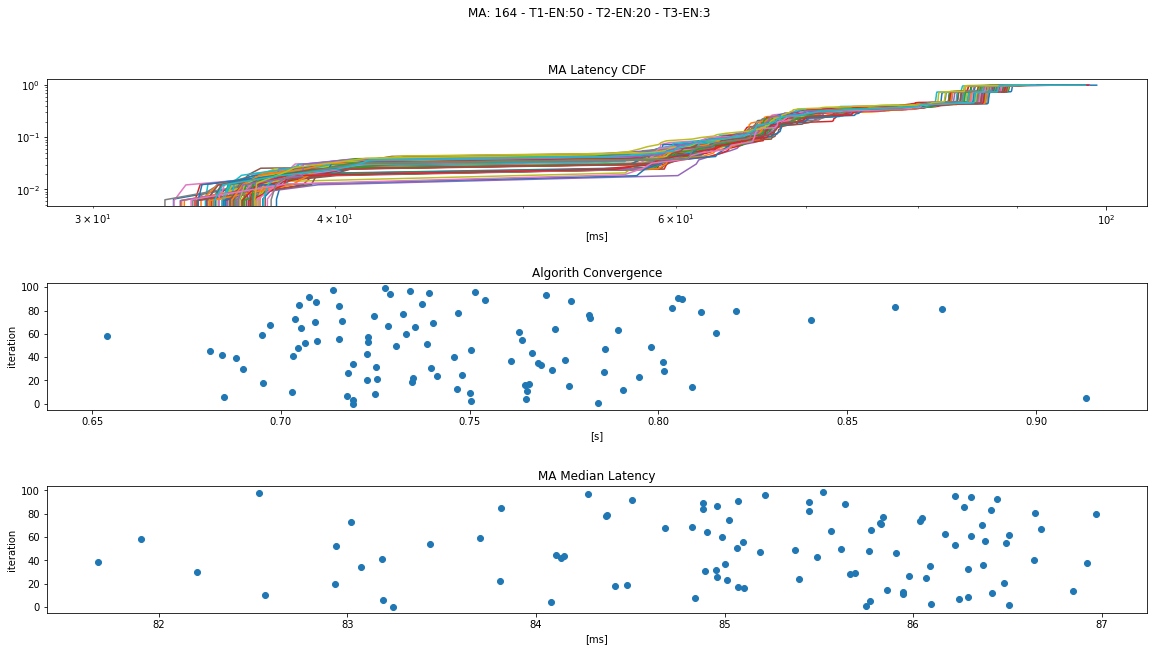

In [17]:
from entities.mobile_agent import Offloaded

n = len(TARGET_MA)
m = 3

fig, ax = plt.subplots(m, n, figsize=(16, 8), constrained_layout=False)
fig.tight_layout()

agents_ls = []
mean_latency= []

## Latency
for i in range(n):
    agents_ls = list(map(lambda x: x[1], RESULTS))
    conv_ls = list(map(lambda x: x[3], RESULTS))

    for idx, agents in enumerate(agents_ls):
        curr_lat = list(map(lambda a: a.total_latency(), filter(lambda a: a.offload_target != Offloaded.Local, agents)))
        #curr_lat = list(map(lambda a: a.current_latency, agents))
        
        #TIER_1_EN = int(round(total_ap * T1_RATIO_VEC_REL[idx]))
        #TIER_2_EN = int(T2_RATIO_VEC_REL[idx] * TARGET_MA[i])
        #TIER_3_EN = int(T3_RATIO_VEC_REL[idx] * TARGET_MA[i])
        
        TIER_1_EN = T1_RATIO_VEC_ABS
        TIER_2_EN = T2_RATIO_VEC_ABS
        TIER_3_EN = T3_RATIO_VEC_ABS

        label="T1-EN:{} - T2-EN:{} - T3-EN:{}".format(TIER_1_EN, TIER_2_EN, TIER_3_EN)
        powerlaw.plot_cdf(data=curr_lat, ax=ax[0])
        #sns.distplot(curr_lat, hist=False, ax=ax[1])
        
        mean_latency.append(np.median(curr_lat))
        
   
    ax[0].set_title("MA Latency CDF")
    ax[0].set_xlabel("[ms]")
    
    ax[1].set_title("Algorith Convergence")
    ax[1].set_ylabel("iteration")
    ax[1].set_xlabel("[s]")
    
    ax[2].set_title("MA Median Latency")
    ax[2].set_ylabel("iteration")
    ax[2].set_xlabel("[ms]")
    
    ax[1].scatter(conv_ls, np.arange(len(mean_latency)))
    ax[2].scatter(mean_latency, np.arange(len(mean_latency)))


    agents_ls = []

fig.subplots_adjust(hspace=0.6)

fig.suptitle("MA: {} - T1-EN:{} - T2-EN:{} - T3-EN:{}".format(MA, TIER_1_EN, TIER_2_EN, TIER_3_EN), fontsize=12, y=1.1)
fig.savefig("../plots/local_minima/feasible_space.pdf", bbox_inches="tight")

#saved_energy = list(map(lambda a: a.get_local_power_drain() - a.current_power_drain, filter(lambda a: a.offload_target == Offloaded.Edge, agents)))
#sns.distplot(saved_energy, ax=ax[1])
#ax[1].grid()
#ax[1].set_xlabel('saved battery [mJ]')

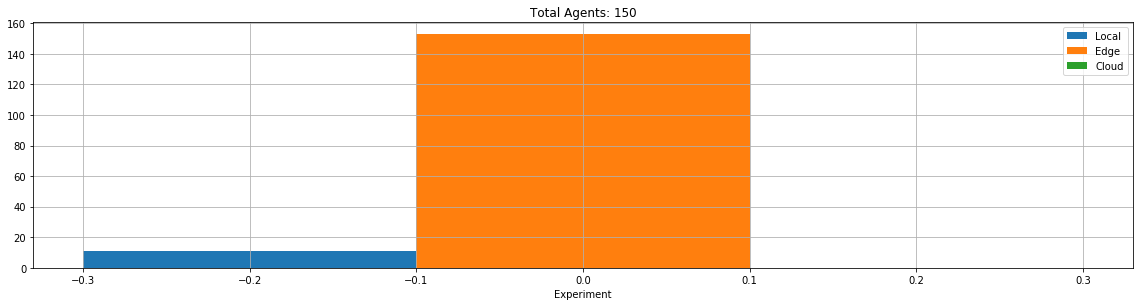

In [8]:
from entities.mobile_agent import Offloaded

n = len(TARGET_MA)
m = 1

fig, ax = plt.subplots(m, n, figsize=(16, 4))
fig.tight_layout()

agents_ls = []
width = 0.2

## Offload distribution
for i in range(n):
    agents_ls = [RESULTS[10][1]]
    
    v1_l = []
    v2_l = []
    v3_l = []
    
    for idx, agents in enumerate(agents_ls):
        v1_l.append(len(list(filter(lambda a: a.offload_target == Offloaded.Local ,agents))))
        v2_l.append(len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))))
        v3_l.append(len(list(filter(lambda a: a.offload_target == Offloaded.Cloud ,agents))))
    
    x = np.arange(n)
    
    rects1 = ax.bar(x - width, v1_l, width, label='Local')
    rects2 = ax.bar(x, v2_l, width, label='Edge')
    rects3 = ax.bar(x + width, v3_l, width, label='Cloud')

    ax.grid()
    ax.set_xlabel('Experiment')
    ax.set_title("Total Agents: {}".format(TARGET_MA[i]))
    ax.legend()

    agents_ls = []

fig.subplots_adjust(hspace=0.4)

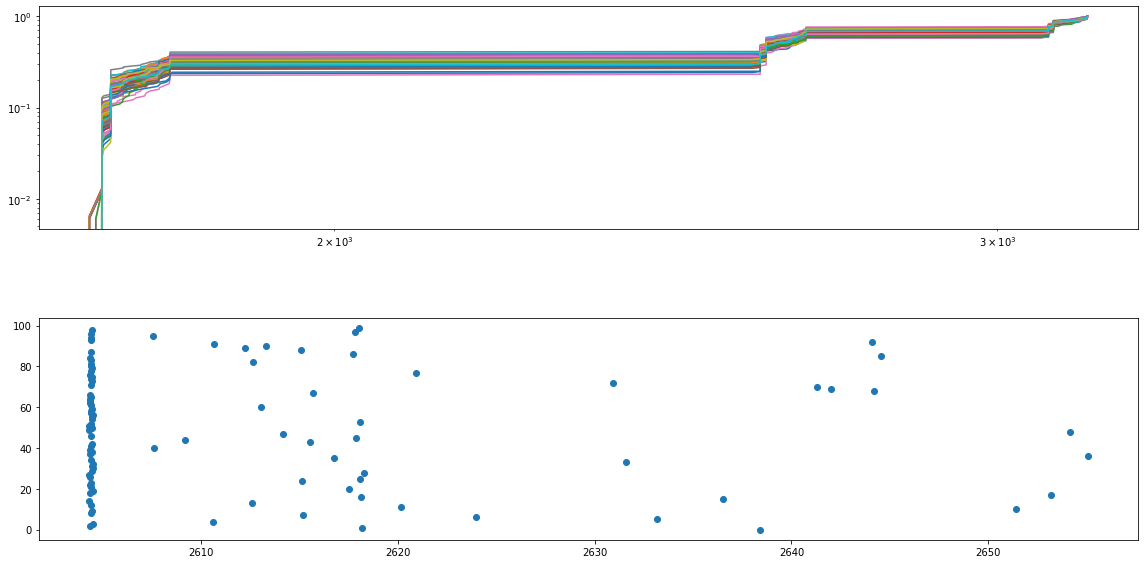

In [5]:
from entities.mobile_agent import Offloaded

n = len(TARGET_MA)
m = 2

fig, ax = plt.subplots(m, n, figsize=(16, 8))
fig.tight_layout()

agents_ls = []
mean_batt = []

## Battery
for i in range(n):
    agents_ls = list(map(lambda x: x[1], RESULTS))

    for idx, agents in enumerate(agents_ls):
        saved_energy = list(map(lambda a: a.get_local_power_drain() - a.current_power_drain, filter(lambda a: a.offload_target == Offloaded.Edge, agents)))
        #saved_energy = list(map(lambda a: a.get_local_power_drain() - a.current_power_drain, agents))
        
        #TIER_1_EN = int(round(total_ap * T1_RATIO_VEC_REL[idx]))
        #TIER_2_EN = int(T2_RATIO_VEC_REL[idx] * TARGET_MA[i])
        #TIER_3_EN = int(T3_RATIO_VEC_REL[idx] * TARGET_MA[i])
        
        TIER_1_EN = T1_RATIO_VEC_ABS
        TIER_2_EN = T2_RATIO_VEC_ABS
        TIER_3_EN = T3_RATIO_VEC_ABS

        label="T1-EN:{} - T2-EN:{} - T3-EN:{}".format(TIER_1_EN, TIER_2_EN, TIER_3_EN)
        powerlaw.plot_cdf(data=saved_energy, ax=ax[0])
        #sns.distplot(curr_lat, hist=False, ax=ax[1])
        
        mean_batt.append(np.median(saved_energy))
        
    ax[1].scatter(mean_batt, np.arange(len(mean_batt)))


    agents_ls = []

fig.subplots_adjust(hspace=0.4)

#saved_energy = list(map(lambda a: a.get_local_power_drain() - a.current_power_drain, filter(lambda a: a.offload_target == Offloaded.Edge, agents)))
#sns.distplot(saved_energy, ax=ax[1])
#ax[1].grid()
#ax[1].set_xlabel('saved battery [mJ]')

In [14]:
list(map(lambda x : x.network_latency, [RESULTS[1][1]][0]))

[20.117153369269502,
 15.003407813622305,
 15.275933639012704,
 23.577467181839694,
 21.203957601181184,
 25.880592907569447,
 20.44273636351824,
 20.38146591085612,
 9.285912833324035,
 12.719680587054949,
 12.070269306299211,
 23.409782462946417,
 13.799985493363353,
 25.72169146166484,
 30.35056844253762,
 15.377066968409437,
 29.81669035443426,
 17.80085848719782,
 34.50790159371167,
 30.35609690033093,
 19.841416715643128,
 18.317381625921517,
 18.226469429364798,
 19.47805972497185,
 17.09365203283612,
 20.248214519747204,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 